In [1]:
%cd ../

/home/zulqarnain/develop/htfatorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils
import htfa_torch.htfa as HTFA

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/utils/deprecation.py

In [151]:
from scipy.spatial import distance
from scipy import stats
import nilearn.plotting as niplot
import statsmodels.stats.multitest as smt
from ordered_set import OrderedSet
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import LeaveOneGroupOut, cross_val_score,StratifiedKFold
from sklearn.feature_selection import SelectPercentile, f_classif,SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_roc_curve

In [4]:
import matplotlib
import matplotlib.pyplot as pl
from matplotlib import cycler
from seaborn.apionly import color_palette
column_width = 3.3
page_width = 6.7
# colorblind-friendly colors 
# source: https://personal.sron.nl/~pault/
colors = {
    'bright': ['4477AA', 
               '66CCEE', 
               '228833', 
               'CCBB44', 
               'EE6677', 
               'AA3377', 
               'BBBBBB'],
    'high_contrast': ['FFFFFF', 
                      'DDAA33', 
                      'BB5566', 
                      '004488', 
                      '00000'],
    'vibrant': ['0077BB', 
                '33BBEE', 
                '0099BB',
                'EE7733',
                'CC3311',
                'EE3377',
                'BBBBBB'],
    'muted': ['332288',
              '88CCEE',
              '44AA99',
              '117733',
              '999933',
              'DDCC77',
              'CC6677',
              '882255',
              'AA4499']
}
pl.rc('legend', frameon=False)
pl.rc('figure', figsize=(column_width, 
                         0.66 * column_width),
                dpi=120)
pl.rc('savefig', dpi=300)
pl.rc('font', size=8)


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/zulqarnain

In [5]:
%matplotlib inline

In [6]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [7]:
lepping_db = niidb.FMriActivationsDb('data/sound_depression.db', mask='/home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz')

In [8]:
dtfa = DTFA.DeepTFA([b for b in lepping_db.all() if 'response' not in b.task and 'tones' not in b.task],
                    mask='/home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz',num_factors=100, embedding_dim=2)

02/03/2020 11:15:32 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control01_run3_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/03/2020 11:15:34 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control01_run2_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/03/2020 11:15:35 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control01_run4_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/03/2020 11:15:36 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control01

02/03/2020 11:16:09 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control08_run3_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/03/2020 11:16:10 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control08_run2_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/03/2020 11:16:12 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control08_run4_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/03/2020 11:16:13 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control08

02/03/2020 11:16:45 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control15_run3_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/03/2020 11:16:47 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control15_run2_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/03/2020 11:16:48 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control15_run4_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/03/2020 11:16:49 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control15

02/03/2020 11:17:22 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd02_run1_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/03/2020 11:17:23 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd02_run2_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/03/2020 11:17:25 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd02_run5_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/03/2020 11:17:26 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd02_run4_music_m

02/03/2020 11:18:00 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd09_run5_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/03/2020 11:18:01 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd09_run4_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/03/2020 11:18:02 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd10_run3_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/03/2020 11:18:04 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd10_run2_music_mc_MNI_

02/03/2020 11:18:37 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd16_run4_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/03/2020 11:18:39 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd17_run1_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/03/2020 11:18:40 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd17_run2_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/03/2020 11:18:41 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd17_run5_music_m

In [9]:
dtfa.load_state('data/lepping_noresponse_restz_k100_n1000_01302020_042320')

In [10]:
htfa = HTFA.HierarchicalTopographicFactorAnalysis([b for b in lepping_db.all() if b.task not in ['response', 'tones']], mask='/home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz', num_factors=100)

02/03/2020 11:23:18 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control01_run3_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/03/2020 11:23:19 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control01_run2_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/03/2020 11:23:20 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control01_run4_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/03/2020 11:23:22 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control01

02/03/2020 11:23:54 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control08_run3_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/03/2020 11:23:55 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control08_run2_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/03/2020 11:23:56 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control08_run4_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/03/2020 11:23:58 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control08

02/03/2020 11:24:30 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control15_run3_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/03/2020 11:24:31 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control15_run2_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/03/2020 11:24:33 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control15_run4_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/03/2020 11:24:34 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control15

02/03/2020 11:25:06 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd02_run1_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/03/2020 11:25:07 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd02_run2_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/03/2020 11:25:09 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd02_run5_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/03/2020 11:25:10 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd02_run4_music_m

02/03/2020 11:25:44 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd09_run5_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/03/2020 11:25:45 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd09_run4_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/03/2020 11:25:46 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd10_run3_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/03/2020 11:25:48 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd10_run2_music_mc_MNI_

02/03/2020 11:26:21 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd16_run4_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/03/2020 11:26:22 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd17_run1_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/03/2020 11:26:24 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd17_run2_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/03/2020 11:26:25 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd17_run5_music_m

In [11]:
htfa.load_state('data/lepping_noresponse_restz_k100_n1000_01302020_233405')

In [12]:
validation_filter = lepping_db.inference_filter(training=False)
validation_blocks = [b for (b, block) in enumerate(dtfa._blocks) if validation_filter(block)]

In [13]:
def task_labeler(task):
    if task == 'negative_music':
        task = 'negative_music'
    elif task == 'positive_music':
        task = 'positive_music'
    elif task == 'negative_nonmusic':
        task = 'negative_sounds'
    elif task == 'positive_nonmusic':
        task = 'positive_sounds'
    else:
        task = task.capitalize()
    return task

def music_sound_labeler(task):
    if 'music' in task_labeler(task):
        return 'music'
    elif 'sounds' in task_labeler(task):
        return 'sounds'
    
def positive_negative_labeler(task):
    if 'negative' in task_labeler(task):
        return 'negative'
    elif 'positive' in task_labeler(task):
        return 'positive'
    
def block_task_labeler(block):
    return task_labeler(block.task)

def block_music_sound_labeler(block):
    return music_sound_labeler(block.task)

def block_positive_negative_labeler(block):
    return positive_negative_labeler(block.task)

In [14]:
def subject_labeler(subject):
    return subject

def block_subject_labeler(block):
    return 'Subject %d' % block.subject

def subject_condition_labeler(subject):
    subject_regex = re.compile("([A-Za-z]+)([0-9]{1,2})")
    m = subject_regex.search(subject)
    condition, sub_num = m.groups()
    if condition == 'mdd':
        condition = 'Major Depressive'
    elif condition == 'control':
        condition = 'Control'
    return '%s Participant %d' % (condition, int(sub_num))

In [146]:
def classification_pipeline(data,targets,session_labels,cv=LeaveOneGroupOut(),
                                 scoring="roc_auc",feature_select=False,
                            feature_selection=SelectPercentile(f_classif, percentile=5),print_all=True):
    categories = np.unique(targets)
    overall_result = []
    overall_result_chance = []
    category_result = {key:None for key in categories}
    for category in categories:
        print("Processing %s" % (category))
        dummy_classifier = DummyClassifier()
        classification_target = [t==category for t in targets]
        svc = SVC(C=1., kernel="linear",probability=True,random_state=42)
        if feature_select:
            classification_target = np.array(classification_target)
            result = []
            result_chance = []
            for train_ind, test_ind in cv.split(data,classification_target,groups=session_labels):
                print("TRAIN:", train_ind, "TEST:", test_ind)
                train_ind = np.array(train_ind).astype(int)
                test_ind = np.array(test_ind).astype(int)
                training_labels = classification_target[train_ind]
                testing_labels = classification_target[test_ind]
                train_feature_classif = feature_selection.fit(data[train_ind],training_labels)
                training_data = train_feature_classif.transform(data[train_ind])
                testing_data = train_feature_classif.transform(data[test_ind])

                train_svc = svc.fit(training_data,training_labels)
                train_dummy = dummy_classifier.fit(training_data,training_labels)
                viz = plot_roc_curve(train_svc,testing_data,testing_labels)
                result.append(viz.roc_auc)
                pl.close()
                viz = plot_roc_curve(train_dummy,testing_data,testing_labels)
                result_chance.append(viz.roc_auc)
                pl.close()
        else:
            classifier = svc
            result = cross_val_score(
                classifier,
                data,
                classification_target,
                cv=cv,
                groups=session_labels,
                scoring="roc_auc",
            )

            result_chance = cross_val_score(
                dummy_classifier,
                data,
                classification_target,
                cv=cv,
                groups=session_labels,
                scoring="roc_auc",
            )
        result = np.array(result)
        result_chance = np.array(result_chance)
        category_result[category] = result
        overall_result.extend(result)
        overall_result_chance.extend(result_chance)
        if print_all:
            print("Scores: %1.4f +- %1.4f" % (
                result.mean(),
                result.std()))

            print("Chance Scores: %1.4f +- %1.4f" % (
                result_chance.mean(),
                result_chance.std()))
    
    if print_all:
        print ('...')
        print("Overall Score: %1.4f +- %1.4f" % (
        np.array(overall_result).mean(),
        np.array(overall_result).std()))

        print("Overall Dummy Score: %1.4f +- %1.4f" % (
        np.array(overall_result_chance).mean(),
        np.array(overall_result_chance).std()))

        print ("\n")
    return overall_result,overall_result_chance,category_result

In [95]:
dtfa_hyperparams = dtfa.variational.hyperparams.state_vardict()
all_weights_dtfa = dtfa_hyperparams['weights']['mu'].data.numpy()
all_weights_htfa = htfa.enc.hyperparams.block__weights__mu.data.numpy()
confidence = 0.95

In [147]:
### task classification using 5Fold CV on NTFA music vs sounds###
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            #if i not in validation_blocks:
            block = dtfa._blocks[i]
            if block.subject == s:
                session_labels.append(block.run)
                data.append(all_weights_dtfa[i,:,:].mean(0))
                targets.append(music_sound_labeler(block.task))
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                   session_labels=None, cv=cv,
                                                                   scoring="roc_auc",
                                                                   print_all=True)
    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())
    summary_subject_chance_means.append(np.array(overall_result_chance).mean())

print ('...')
category_result = {key:[] for key in ['music','sounds']}
for c in ['music','sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("NTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("NTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("NTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

print("Overall Dummy Mean/SE Score: %1.4f +- %1.4f" % (
np.array(summary_subject_chance_means).mean(),
stats.sem(summary_subject_chance_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_chance_means) - 1)))

ntfa_summary_result = summary_result
dummy_summary_result = summary_result_chance
ntfa_summary_means = summary_subject_means
dummy_summary_means = summary_subject_chance_means

ntfa_mus_sounds_summary_means = ntfa_summary_means
dummy_mus_sounds_summary_means = dummy_summary_means

Processing Subject control01
Processing music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4000 +- 0.3000
Processing sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4500 +- 0.3674
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.4250 +- 0.3363


Processing Subject control02
Processing music
Scores: 0.9000 +- 0.2000
Chance Scores: 0.4000 +- 0.4062
Processing sounds
Scores: 0.9000 +- 0.2000
Chance Scores: 0.5500 +- 0.3674
...
Overall Score: 0.9000 +- 0.2000
Overall Dummy Score: 0.4750 +- 0.3945


Processing Subject control03
Processing music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.2739
Processing sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.7500 +- 0.3873
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.6250 +- 0.3579


Processing Subject control04
Processing music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.6500 +- 0.2550
Processing sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.2500 +- 0.2236
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.4

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 1.0000 +- 0.0000
Chance Scores: 0.7500 +- 0.1581
Processing sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4500 +- 0.4000
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.6000 +- 0.3391


Processing Subject control09
Processing music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.3536
Processing sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.6500 +- 0.3742
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.5750 +- 0.3717


Processing Subject control10
Processing music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.3500 +- 0.2550
Processing sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.3500 +- 0.2550
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.3500 +- 0.2550


Processing Subject control11
Processing music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5500 +- 0.2915
Processing sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.6500 +- 0.1225
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.6000 +- 0.2291


Processing Subject control12
P

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 1.0000 +- 0.0000
Chance Scores: 0.3000 +- 0.1871
Processing sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.6000 +- 0.2550
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.4500 +- 0.2693


Processing Subject control16
Processing music
Scores: 0.9000 +- 0.2000
Chance Scores: 0.6000 +- 0.3391
Processing sounds
Scores: 0.9000 +- 0.2000
Chance Scores: 0.3500 +- 0.2000
...
Overall Score: 0.9000 +- 0.2000
Overall Dummy Score: 0.4750 +- 0.3052


Processing Subject control17
Processing music
Scores: 0.7000 +- 0.2449
Chance Scores: 0.4500 +- 0.1871
Processing sounds
Scores: 0.7000 +- 0.2449
Chance Scores: 0.5000 +- 0.2236
...
Overall Score: 0.7000 +- 0.2449
Overall Dummy Score: 0.4750 +- 0.2077


Processing Subject control18
Processing music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.2739
Processing sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.2236
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.5000 +- 0.2500


Processing Subject control19
P

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.9500 +- 0.1000
Chance Scores: 0.2500 +- 0.3162
Processing sounds
Scores: 0.9500 +- 0.1000
Chance Scores: 0.5000 +- 0.2739
...
Overall Score: 0.9500 +- 0.1000
Overall Dummy Score: 0.3750 +- 0.3211


Processing Subject mdd03
Processing music
Scores: 0.8000 +- 0.4000
Chance Scores: 0.3000 +- 0.2915
Processing sounds
Scores: 0.8000 +- 0.4000
Chance Scores: 0.6500 +- 0.3742
...
Overall Score: 0.8000 +- 0.4000
Overall Dummy Score: 0.4750 +- 0.3783


Processing Subject mdd04
Processing music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.7500 +- 0.2236
Processing sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.1581
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.6250 +- 0.2305


Skipping Subject, not enough runs
Processing music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5500 +- 0.1871
Processing sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.2739
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.5250 +- 0.2358


Processing Subject mdd06
Processi

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.9500 +- 0.1000
Chance Scores: 0.1500 +- 0.1225
...
Overall Score: 0.9500 +- 0.1000
Overall Dummy Score: 0.3000 +- 0.1871


Processing Subject mdd10
Processing music
Scores: 0.9000 +- 0.2000
Chance Scores: 0.3500 +- 0.2000
Processing sounds
Scores: 0.9000 +- 0.2000
Chance Scores: 0.5500 +- 0.3317
...
Overall Score: 0.9000 +- 0.2000
Overall Dummy Score: 0.4500 +- 0.2915


Processing Subject mdd11
Processing music
Scores: 0.8000 +- 0.4000
Chance Scores: 0.5500 +- 0.1871
Processing sounds
Scores: 0.8000 +- 0.4000
Chance Scores: 0.8500 +- 0.1225
...
Overall Score: 0.8000 +- 0.4000
Overall Dummy Score: 0.7000 +- 0.2179


Processing Subject mdd12
Processing music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4000 +- 0.3391
Processing sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.6000 +- 0.2550
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.5000 +- 0.3162


Processing Subject mdd13
Processing music
Scores: 0.9000 +- 0.2000
Chance Scores: 0.5000 +- 0.2739
Processing sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 1.0000 +- 0.0000
Chance Scores: 0.4500 +- 0.1871
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.5000 +- 0.2236


Processing Subject mdd17
Processing music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.3500 +- 0.2000
Processing sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.6000 +- 0.2000
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.4750 +- 0.2358


Processing Subject mdd18
Processing music
Scores: 0.8000 +- 0.4000
Chance Scores: 0.6500 +- 0.1225
Processing sounds
Scores: 0.8000 +- 0.4000
Chance Scores: 0.5000 +- 0.1581
...
Overall Score: 0.8000 +- 0.4000
Overall Dummy Score: 0.5750 +- 0.1601


Processing Subject mdd19
Processing music
Scores: 0.9000 +- 0.2000
Chance Scores: 0.6000 +- 0.2000
Processing sounds
Scores: 0.9000 +- 0.2000
Chance Scores: 0.6000 +- 0.2550
...
Overall Score: 0.9000 +- 0.2000
Overall Dummy Score: 0.6000 +- 0.2291


...
NTFA Summary Score Across Subjects, For Category music : 0.9410 +- 0.1938
NTFA Summary Score Across Subjects, For

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

In [148]:
### task classification using 5Fold CV on HTFA music vs sounds###
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
subjects = OrderedSet([b.subject for b in htfa._blocks])
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
#             if i not in validation_blocks:
            block = dtfa._blocks[i]
            if block.subject == s:
                session_labels.append(block.run)
                data.append(all_weights_htfa[i,:,:].mean(0))
                targets.append(block_music_sound_labeler(block))
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                   session_labels=None, cv=cv,
                                                                   scoring="roc_auc",
                                                                   print_all=True)
    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())

print ('...')
category_result = {key:[] for key in ['music','sounds']}
for c in ['music','sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("HTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("HTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("HTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

htfa_summary_result = summary_result
htfa_summary_means = summary_subject_means
htfa_mus_sounds_summary_means = htfa_summary_means

Processing Subject control01
Processing music
Scores: 0.9500 +- 0.1000
Chance Scores: 0.5500 +- 0.2449
Processing sounds
Scores: 0.9500 +- 0.1000
Chance Scores: 0.4500 +- 0.2915
...
Overall Score: 0.9500 +- 0.1000
Overall Dummy Score: 0.5000 +- 0.2739


Processing Subject control02
Processing music
Scores: 0.9000 +- 0.2000
Chance Scores: 0.5500 +- 0.2915
Processing sounds
Scores: 0.9000 +- 0.2000
Chance Scores: 0.5000 +- 0.3536
...
Overall Score: 0.9000 +- 0.2000
Overall Dummy Score: 0.5250 +- 0.3250


Processing Subject control03
Processing music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5500 +- 0.2915
Processing sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.2739
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.5250 +- 0.2839


Processing Subject control04
Processing music
Scores: 0.8500 +- 0.2000
Chance Scores: 0.4500 +- 0.3674
Processing sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.8500 +- 0.2000
Chance Scores: 0.5000 +- 0.2739
...
Overall Score: 0.8500 +- 0.2000
Overall Dummy Score: 0.4750 +- 0.3250


Processing Subject control05
Processing music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4500 +- 0.4000
Processing sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4000 +- 0.4062
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.4250 +- 0.4039


Processing Subject control06
Processing music
Scores: 0.9000 +- 0.2000
Chance Scores: 0.3000 +- 0.2449
Processing sounds
Scores: 0.9000 +- 0.2000
Chance Scores: 0.7000 +- 0.2915
...
Overall Score: 0.9000 +- 0.2000
Overall Dummy Score: 0.5000 +- 0.3354


Processing Subject control07
Processing music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.8000 +- 0.4000
Chance Scores: 0.3000 +- 0.2449
Processing sounds
Scores: 0.8000 +- 0.4000
Chance Scores: 0.4000 +- 0.3000
...
Overall Score: 0.8000 +- 0.4000
Overall Dummy Score: 0.3500 +- 0.2784


Processing Subject control08
Processing music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.1581
Processing sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.6000 +- 0.2000
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.5500 +- 0.1871


Processing Subject control09
Processing music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.2236
Processing sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.3500 +- 0.3391
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.4250 +- 0.2969


Processing Subject control10
Processing music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.3000 +- 0.2449
Processing sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.3500 +- 0.3000
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.3250 +- 0.2750


Processing Subject control11
P

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 1.0000 +- 0.0000
Chance Scores: 0.6500 +- 0.2000
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.6750 +- 0.1953


Processing Subject control15
Processing music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.6500 +- 0.2000
Processing sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4000 +- 0.3000
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.5250 +- 0.2839


Processing Subject control16
Processing music
Scores: 0.9000 +- 0.2000
Chance Scores: 0.6000 +- 0.2550
Processing sounds
Scores: 0.9000 +- 0.2000
Chance Scores: 0.5000 +- 0.1581
...
Overall Score: 0.9000 +- 0.2000
Overall Dummy Score: 0.5500 +- 0.2179


Processing Subject control17
Processing music
Scores: 0.9000 +- 0.2000
Chance Scores: 0.5000 +- 0.3536
Processing sounds
Scores: 0.9000 +- 0.2000
Chance Scores: 0.7000 +- 0.2915
...
Overall Score: 0.9000 +- 0.2000
Overall Dummy Score: 0.6000 +- 0.3391


Processing Subject control18
Processing music
Scores: 0.9500 +- 0.1000
Chance Scores: 0.4500 +- 0.4000
Pr

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 1.0000 +- 0.0000
Chance Scores: 0.6000 +- 0.2550
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.5500 +- 0.2693


Processing Subject mdd02
Processing music
Scores: 0.9000 +- 0.2000
Chance Scores: 0.4500 +- 0.2915
Processing sounds
Scores: 0.9000 +- 0.2000
Chance Scores: 0.7000 +- 0.1871
...
Overall Score: 0.9000 +- 0.2000
Overall Dummy Score: 0.5750 +- 0.2750


Processing Subject mdd03
Processing music
Scores: 0.6000 +- 0.3742
Chance Scores: 0.6000 +- 0.2000
Processing sounds
Scores: 0.6000 +- 0.3742
Chance Scores: 0.1500 +- 0.2000
...
Overall Score: 0.6000 +- 0.3742
Overall Dummy Score: 0.3750 +- 0.3010


Processing Subject mdd04
Processing music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5500 +- 0.2915
Processing sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.3500 +- 0.2000
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.4500 +- 0.2693


Skipping Subject, not enough runs
Processing music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.6000 +- 0.2000
Processin

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.9000 +- 0.2000
Chance Scores: 0.6500 +- 0.2550
Processing sounds
Scores: 0.9000 +- 0.2000
Chance Scores: 0.6500 +- 0.1225
...
Overall Score: 0.9000 +- 0.2000
Overall Dummy Score: 0.6500 +- 0.2000


Processing Subject mdd10
Processing music
Scores: 0.8000 +- 0.2449
Chance Scores: 0.4000 +- 0.2550
Processing sounds
Scores: 0.8000 +- 0.2449
Chance Scores: 0.5500 +- 0.3674
...
Overall Score: 0.8000 +- 0.2449
Overall Dummy Score: 0.4750 +- 0.3250


Processing Subject mdd11
Processing music
Scores: 0.6000 +- 0.4899
Chance Scores: 0.6000 +- 0.3000
Processing sounds
Scores: 0.6000 +- 0.4899
Chance Scores: 0.7500 +- 0.1581
...
Overall Score: 0.6000 +- 0.4899
Overall Dummy Score: 0.6750 +- 0.2512


Processing Subject mdd12
Processing music
Scores: 0.9500 +- 0.1000
Chance Scores: 0.3500 +- 0.3742
Processing sounds
Scores: 0.9500 +- 0.1000
Chance Scores: 0.5000 +- 0.1581
...
Overall Score: 0.9500 +- 0.1000
Overall Dummy Score: 0.4250 +- 0.2969


Processing Subject mdd13
Processing music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 1.0000 +- 0.0000
Chance Scores: 0.4500 +- 0.2915
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.4250 +- 0.2750


Processing Subject mdd17
Processing music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5500 +- 0.2449
Processing sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.3500 +- 0.2550
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.4500 +- 0.2693


Processing Subject mdd18
Processing music
Scores: 0.4500 +- 0.4000
Chance Scores: 0.5000 +- 0.3162
Processing sounds
Scores: 0.4500 +- 0.4000
Chance Scores: 0.7500 +- 0.2739
...
Overall Score: 0.4500 +- 0.4000
Overall Dummy Score: 0.6250 +- 0.3211


Processing Subject mdd19
Processing music
Scores: 0.8500 +- 0.3000
Chance Scores: 0.3000 +- 0.1871
Processing sounds
Scores: 0.8500 +- 0.3000
Chance Scores: 0.5500 +- 0.1871
...
Overall Score: 0.8500 +- 0.3000
Overall Dummy Score: 0.4250 +- 0.2250


...
HTFA Summary Score Across Subjects, For Category music : 0.9141 +- 0.2236
HTFA Summary Score Across Subjects, For

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

In [149]:
### task classification using 5Fold CV on input data music vs sounds###
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
feature_selection = SelectPercentile(f_classif, percentile=5)
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
#             if i not in validation_blocks:
            if block.subject == s:
                session_labels.append(block.run)
                data.append(dtfa.voxel_activations[i].data.numpy().mean(0))
                targets.append(music_sound_labeler(block.task))
        print(targets)
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                 session_labels=None,
                                                                    cv=cv,
                                                                   scoring="roc_auc",
                                                                   feature_select=True,
                                                                   print_all=True)

    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())

print ('...')
category_result = {key:[] for key in ['music','sounds']}
for c in ['music','sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("Voxel Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("Voxel Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("Voxel Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

voxel_summary_result = summary_result
voxel_summary_means = summary_subject_means
voxel_mus_sounds_summary_means = voxel_summary_means

Processing Subject control01
['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 0.9500 +- 0.1000
Chance Scores: 0.4500 +- 0.1000
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 0.9500 +- 0.1000
Chance Scores: 0.3500 +- 0.2550
...
Overall Score: 0.9500 +- 0.1000
Overall Dummy Score: 0.4000 +- 0.2000


Processing Subject control02
['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 0.9000 +- 0.2000
Chance Scores: 0.3000 +- 0.4000
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 0.9000 +- 0.2000
Chance Scores: 0.1500 +- 0.1225
...
Overall Score: 0.9000 +- 0.2000
Overall Dummy Score: 0.2250 +- 0.3052


Processing Subject control03
['sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'music']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.3000 +- 0.2915
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.6500 +- 0.2000
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.4750 +- 0.3052


Processing Subject control04


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


['sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'music']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.9000 +- 0.2000
Chance Scores: 0.5500 +- 0.2915
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Scores: 0.9000 +- 0.2000
Chance Scores: 0.4000 +- 0.2550
...
Overall Score: 0.9000 +- 0.2000
Overall Dummy Score: 0.4750 +- 0.2839


Processing Subject control05
['sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'music']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.3500 +- 0.3000
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.6000 +- 0.3000
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.4750 +- 0.3250


Processing Subject control06
['sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'music']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.6500 +- 0.3391
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.3000 +- 0.2915
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.4750 +- 0.3614


Processing Subject control07
['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.3000 +- 0.1871
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.6000 +- 0.4062
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.4500 +- 0.3500


Processing Subject control08


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
TRAIN: [ 1  3  4  5  6  7  8 10 11 12 13 14] TEST: [0 2 9]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  8  9 10 11 13 14] TEST: [ 1  5 12]
TRAIN: [ 0  1  2  3  4  5  6  8  9 12 13 14] TEST: [ 7 10 11]
TRAIN: [ 0  1  2  4  5  6  7  9 10 11 12 13] TEST: [ 3  8 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 1.0000 +- 0.0000
Chance Scores: 0.2500 +- 0.1581
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8 10 11 12 13 14] TEST: [0 2 9]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  8  9 10 11 13 14] TEST: [ 1  5 12]
TRAIN: [ 0  1  2  3  4  5  6  8  9 12 13 14] TEST: [ 7 10 11]
TRAIN: [ 0  1  2  4  5  6  7  9 10 11 12 13] TEST: [ 3  8 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 1.0000 +- 0.0000
Chance Scores: 0.3500 +- 0.2550
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.3000 +- 0.2179


Processing Subject control09
['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 0.9000 +- 0.2000
Chance Scores: 0.5000 +- 0.1581
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 0.9000 +- 0.2000
Chance Scores: 0.2500 +- 0.2739
...
Overall Score: 0.9000 +- 0.2000
Overall Dummy Score: 0.3750 +- 0.2562


Processing Subject control10
['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.1581
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.6000 +- 0.1225
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.5500 +- 0.1500


Processing Subject control11
['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.3000 +- 0.1871
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.3162
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.4000 +- 0.2784


Processing Subject control12


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


['sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'music']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 1.0000 +- 0.0000
Chance Scores: 0.3500 +- 0.2000
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 1.0000 +- 0.0000
Chance Scores: 0.6000 +- 0.2000
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.4750 +- 0.2358


Processing Subject control13
['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 0.8500 +- 0.2000
Chance Scores: 0.4500 +- 0.2449
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 0.8500 +- 0.2000
Chance Scores: 0.3000 +- 0.3674
...
Overall Score: 0.8500 +- 0.2000
Overall Dummy Score: 0.3750 +- 0.3211


Processing Subject control14
['sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'music']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5500 +- 0.1871
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 1.0000 +- 0.0000
Chance Scores: 0.5500 +- 0.3674
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.5500 +- 0.2915


Processing Subject control15
['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.6500 +- 0.2000
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4500 +- 0.3317
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.5500 +- 0.2915


Processing Subject control16
['sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'music']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 0.9000 +- 0.2000
Chance Scores: 0.5500 +- 0.1871
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 0.9000 +- 0.2000
Chance Scores: 0.7500 +- 0.1581
...
Overall Score: 0.9000 +- 0.2000
Overall Dummy Score: 0.6500 +- 0.2000


Processing Subject control17


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


['sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'music']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.9000 +- 0.2000
Chance Scores: 0.4500 +- 0.2915
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Scores: 0.9000 +- 0.2000
Chance Scores: 0.4500 +- 0.2449
...
Overall Score: 0.9000 +- 0.2000
Overall Dummy Score: 0.4500 +- 0.2693


Processing Subject control18
['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.6000 +- 0.3742
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.6000 +- 0.3391
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.6000 +- 0.3571


Processing Subject control19
['sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'music']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4000 +- 0.4062
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4500 +- 0.3674
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.4250 +- 0.3881


Processing Subject control20
['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.6000 +- 0.2000
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5500 +- 0.3674
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.5750 +- 0.2969


Processing Subject mdd01
['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4500 +- 0.2915
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.6500 +- 0.2550
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.5500 +- 0.2915


Processing Subject mdd02


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


['sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'music']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.9500 +- 0.1000
Chance Scores: 0.4000 +- 0.2550
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.9500 +- 0.1000
Chance Scores: 0.4000 +- 0.3742
...
Overall Score: 0.9500 +- 0.1000
Overall Dummy Score: 0.4000 +- 0.3202


Processing Subject mdd03
['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
TRAIN: [ 1  3  4  5  6  7  8 10 11 12 13 14] TEST: [0 2 9]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  8  9 10 11 13 14] TEST: [ 1  5 12]
TRAIN: [ 0  1  2  3  4  5  6  8  9 12 13 14] TEST: [ 7 10 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  4  5  6  7  9 10 11 12 13] TEST: [ 3  8 14]
Scores: 0.8000 +- 0.4000
Chance Scores: 0.6500 +- 0.2000
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8 10 11 12 13 14] TEST: [0 2 9]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  8  9 10 11 13 14] TEST: [ 1  5 12]
TRAIN: [ 0  1  2  3  4  5  6  8  9 12 13 14] TEST: [ 7 10 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  4  5  6  7  9 10 11 12 13] TEST: [ 3  8 14]
Scores: 0.8000 +- 0.4000
Chance Scores: 0.5500 +- 0.4000
...
Overall Score: 0.8000 +- 0.4000
Overall Dummy Score: 0.6000 +- 0.3202


Processing Subject mdd04
['sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'music']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4000 +- 0.2000
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.6000 +- 0.2550
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.5000 +- 0.2500


Skipping Subject, not enough runs
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.3536
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4000 +- 0.3391
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.4500 +- 0.3500


Processing Subject mdd06
['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 0.9000 +- 0.2000
Chance Scores: 0.6000 +- 0.2000
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 0.9000 +- 0.2000
Chance Scores: 0.5000 +- 0.2739
...
Overall Score: 0.9000 +- 0.2000
Overall Dummy Score: 0.5500 +- 0.2449


Processing Subject mdd07
['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4500 +- 0.2915
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4500 +- 0.2915
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.4500 +- 0.2915


Processing Subject mdd08


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.9000 +- 0.2000
Chance Scores: 0.4500 +- 0.2915
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.9000 +- 0.2000
Chance Scores: 0.4000 +- 0.2000
...
Overall Score: 0.9000 +- 0.2000
Overall Dummy Score: 0.4250 +- 0.2512


Processing Subject mdd09
['sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'music']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 0.9500 +- 0.1000
Chance Scores: 0.5000 +- 0.2739
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 0.9500 +- 0.1000
Chance Scores: 0.7500 +- 0.3162
...
Overall Score: 0.9500 +- 0.1000
Overall Dummy Score: 0.6250 +- 0.3211


Processing Subject mdd10
['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 0.9000 +- 0.2000
Chance Scores: 0.4000 +- 0.3391
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 0.9000 +- 0.2000
Chance Scores: 0.5500 +- 0.3674
...
Overall Score: 0.9000 +- 0.2000
Overall Dummy Score: 0.4750 +- 0.3614


Processing Subject mdd11
['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 0.9000 +- 0.2000
Chance Scores: 0.5000 +- 0.3536
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 0.9000 +- 0.2000
Chance Scores: 0.3500 +- 0.1225
...
Overall Score: 0.9000 +- 0.2000
Overall Dummy Score: 0.4250 +- 0.2750


Processing Subject mdd12
['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.3500 +- 0.2550
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.2236
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.4250 +- 0.2512


Processing Subject mdd13
['sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'music']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 1.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.1581
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 1.0000 +- 0.0000
Chance Scores: 0.3500 +- 0.1225
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.4250 +- 0.1601


Processing Subject mdd14
['sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'music']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.1581
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.6000 +- 0.2000
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.5500 +- 0.1871


Processing Subject mdd15
['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4500 +- 0.3317
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4000 +- 0.2000
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.4250 +- 0.2750


Processing Subject mdd16


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


['sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'music']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 1.0000 +- 0.0000
Chance Scores: 0.3500 +- 0.2550
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 1.0000 +- 0.0000
Chance Scores: 0.5500 +- 0.3317
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.4500 +- 0.3122


Processing Subject mdd17
['sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'music']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 0.9000 +- 0.2000
Chance Scores: 0.5500 +- 0.2915
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 0.9000 +- 0.2000
Chance Scores: 0.7000 +- 0.1000
...
Overall Score: 0.9000 +- 0.2000
Overall Dummy Score: 0.6250 +- 0.2305


Processing Subject mdd18
['sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'music']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.6500 +- 0.2000
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.6500 +- 0.2550
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.6500 +- 0.2291


Processing Subject mdd19
['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 0.9500 +- 0.1000
Chance Scores: 0.3500 +- 0.2000
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 0.9500 +- 0.1000
Chance Scores: 0.5000 +- 0.3536
...
Overall Score: 0.9500 +- 0.1000
Overall Dummy Score: 0.4250 +- 0.2969


...
Voxel Summary Score Across Subjects, For Category music : 0.9603 +- 0.1388
Voxel Summary Score Across Subjects, For Category sounds : 0.9603 +- 0.1388
...
Voxel Summary Score Across Subjects, Across Tasks: 0.9

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

In [153]:
### task classification using 5Fold CV on input data music vs sounds###
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
feature_selection = SelectKBest(f_classif, k=500)
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
#             if i not in validation_blocks:
            if block.subject == s:
                session_labels.append(block.run)
                data.append(dtfa.voxel_activations[i].data.numpy().mean(0))
                targets.append(music_sound_labeler(block.task))
        print(targets)
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                 session_labels=None,
                                                                    cv=cv,
                                                                   scoring="roc_auc",
                                                                   feature_select=True,
                                                                feature_selection=feature_selection,
                                                                   print_all=True)

    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())

print ('...')
category_result = {key:[] for key in ['music','sounds']}
for c in ['music','sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("Voxel Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("Voxel Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("Voxel Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

voxel_summary_result = summary_result
voxel_summary_means = summary_subject_means
voxel_mus_sounds_summary_means = voxel_summary_means

Processing Subject control01
['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 0.8500 +- 0.3000
Chance Scores: 0.4500 +- 0.1871
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 0.8500 +- 0.3000
Chance Scores: 0.7000 +- 0.3674
...
Overall Score: 0.8500 +- 0.3000
Overall Dummy Score: 0.5750 +- 0.3172


Processing Subject control02
['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 0.9000 +- 0.2000
Chance Scores: 0.7000 +- 0.3674
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 0.9000 +- 0.2000
Chance Scores: 0.4500 +- 0.2449
...
Overall Score: 0.9000 +- 0.2000
Overall Dummy Score: 0.5750 +- 0.3363


Processing Subject control03
['sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'music']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 1.0000 +- 0.0000
Chance Scores: 0.4500 +- 0.1871
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Scores: 1.0000 +- 0.0000
Chance Scores: 0.7500 +- 0.1581
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.6000 +- 0.2291


Processing Subject control04
['sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'music']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 0.9000 +- 0.2000
Chance Scores: 0.4500 +- 0.1000
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 0.9000 +- 0.2000
Chance Scores: 0.5500 +- 0.1871
...
Overall Score: 0.9000 +- 0.2000
Overall Dummy Score: 0.5000 +- 0.1581


Processing Subject control05
['sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'music']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.6000 +- 0.3000
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4000 +- 0.2000
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.5000 +- 0.2739


Processing Subject control06
['sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'music']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.3500 +- 0.2000
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.7500 +- 0.1581
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.5500 +- 0.2693


Processing Subject control07


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 1.0000 +- 0.0000
Chance Scores: 0.4500 +- 0.2449
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 1.0000 +- 0.0000
Chance Scores: 0.4000 +- 0.2550
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.4250 +- 0.2512


Processing Subject control08
['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
TRAIN: [ 1  3  4  5  6  7  8 10 11 12 13 14] TEST: [0 2 9]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  8  9 10 11 13 14] TEST: [ 1  5 12]
TRAIN: [ 0  1  2  3  4  5  6  8  9 12 13 14] TEST: [ 7 10 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  4  5  6  7  9 10 11 12 13] TEST: [ 3  8 14]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.2500 +- 0.2236
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8 10 11 12 13 14] TEST: [0 2 9]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  8  9 10 11 13 14] TEST: [ 1  5 12]
TRAIN: [ 0  1  2  3  4  5  6  8  9 12 13 14] TEST: [ 7 10 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  4  5  6  7  9 10 11 12 13] TEST: [ 3  8 14]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4000 +- 0.3000
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.3250 +- 0.2750


Processing Subject control09
['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.8500 +- 0.2000
Chance Scores: 0.8000 +- 0.1871
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Scores: 0.8500 +- 0.2000
Chance Scores: 0.4500 +- 0.2915
...
Overall Score: 0.8500 +- 0.2000
Overall Dummy Score: 0.6250 +- 0.3010


Processing Subject control10
['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.6500 +- 0.1225
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4000 +- 0.3000
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.5250 +- 0.2610


Processing Subject control11
['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4500 +- 0.2449
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.2500 +- 0.1581
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.3500 +- 0.2291


Processing Subject control12
['sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'music']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.6000 +- 0.2550
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.6000 +- 0.4062
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.6000 +- 0.3391


Processing Subject control13
['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 0.6500 +- 0.3742
Chance Scores: 0.4000 +- 0.2550
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 0.6500 +- 0.3742
Chance Scores: 0.5500 +- 0.2915
...
Overall Score: 0.6500 +- 0.3742
Overall Dummy Score: 0.4750 +- 0.2839


Processing Subject control14


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


['sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'music']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 1.0000 +- 0.0000
Chance Scores: 0.4000 +- 0.2000
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 1.0000 +- 0.0000
Chance Scores: 0.3500 +- 0.1225
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.3750 +- 0.1677


Processing Subject control15
['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.7500 +- 0.2236
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4500 +- 0.3317
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.6000 +- 0.3202


Processing Subject control16
['sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'music']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 0.9000 +- 0.2000
Chance Scores: 0.5500 +- 0.4583
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 0.9000 +- 0.2000
Chance Scores: 0.5000 +- 0.2236
...
Overall Score: 0.9000 +- 0.2000
Overall Dummy Score: 0.5250 +- 0.3614


Processing Subject control17
['sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'music']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 0.9000 +- 0.2000
Chance Scores: 0.4000 +- 0.2000
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 0.9000 +- 0.2000
Chance Scores: 0.6500 +- 0.2550
...
Overall Score: 0.9000 +- 0.2000
Overall Dummy Score: 0.5250 +- 0.2610


Processing Subject control18
['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5500 +- 0.3674
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4500 +- 0.2449
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.5000 +- 0.3162


Processing Subject control19
['sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'music']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4500 +- 0.1871
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5500 +- 0.3674
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.5000 +- 0.2958


Processing Subject control20


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 1.0000 +- 0.0000
Chance Scores: 0.5500 +- 0.2449
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 1.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.2739
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.5250 +- 0.2610


Processing Subject mdd01
['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.7000 +- 0.2915
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.2500 +- 0.2236
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.4750 +- 0.3437


Processing Subject mdd02
['sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'music']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 0.9500 +- 0.1000
Chance Scores: 0.6500 +- 0.1225
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 0.9500 +- 0.1000
Chance Scores: 0.4500 +- 0.2915
...
Overall Score: 0.9500 +- 0.1000
Overall Dummy Score: 0.5500 +- 0.2449


Processing Subject mdd03
['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
TRAIN: [ 1  3  4  5  6  7  8 10 11 12 13 14] TEST: [0 2 9]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14] TEST: [ 4  6 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  2  3  4  6  7  8  9 10 11 13 14] TEST: [ 1  5 12]
TRAIN: [ 0  1  2  3  4  5  6  8  9 12 13 14] TEST: [ 7 10 11]
TRAIN: [ 0  1  2  4  5  6  7  9 10 11 12 13] TEST: [ 3  8 14]
Scores: 0.8000 +- 0.4000
Chance Scores: 0.6000 +- 0.2550
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8 10 11 12 13 14] TEST: [0 2 9]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14] TEST: [ 4  6 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  2  3  4  6  7  8  9 10 11 13 14] TEST: [ 1  5 12]
TRAIN: [ 0  1  2  3  4  5  6  8  9 12 13 14] TEST: [ 7 10 11]
TRAIN: [ 0  1  2  4  5  6  7  9 10 11 12 13] TEST: [ 3  8 14]
Scores: 0.8000 +- 0.4000
Chance Scores: 0.5000 +- 0.2236
...
Overall Score: 0.8000 +- 0.4000
Overall Dummy Score: 0.5500 +- 0.2449


Processing Subject mdd04
['sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'music']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.6000 +- 0.1225
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.6500 +- 0.3391
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.6250 +- 0.2562


Skipping Subject, not enough runs
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.6000 +- 0.3000
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.6500 +- 0.2550
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.6250 +- 0.2795


Processing Subject mdd06
['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.3500 +- 0.3000
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.3000 +- 0.1871
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.3250 +- 0.2512


Processing Subject mdd07


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 1.0000 +- 0.0000
Chance Scores: 0.5500 +- 0.1871
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 1.0000 +- 0.0000
Chance Scores: 0.6000 +- 0.2000
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.5750 +- 0.1953


Processing Subject mdd08
['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 0.9000 +- 0.2000
Chance Scores: 0.6000 +- 0.1225
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 0.9000 +- 0.2000
Chance Scores: 0.6500 +- 0.2550
...
Overall Score: 0.9000 +- 0.2000
Overall Dummy Score: 0.6250 +- 0.2016


Processing Subject mdd09
['sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'music']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 0.9500 +- 0.1000
Chance Scores: 0.5000 +- 0.3536
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 0.9500 +- 0.1000
Chance Scores: 0.5000 +- 0.3162
...
Overall Score: 0.9500 +- 0.1000
Overall Dummy Score: 0.5000 +- 0.3354


Processing Subject mdd10
['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 0.9000 +- 0.2000
Chance Scores: 0.6500 +- 0.1225
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 0.9000 +- 0.2000
Chance Scores: 0.6000 +- 0.2000
...
Overall Score: 0.9000 +- 0.2000
Overall Dummy Score: 0.6250 +- 0.1677


Processing Subject mdd11
['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.7500 +- 0.2236
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4500 +- 0.1000
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.6000 +- 0.2291


Processing Subject mdd12
['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 1.0000 +- 0.0000
Chance Scores: 0.5500 +- 0.3317
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 1.0000 +- 0.0000
Chance Scores: 0.6000 +- 0.2550
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.5750 +- 0.2969


Processing Subject mdd13
['sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'music']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4500 +- 0.1871
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.6000 +- 0.2550
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.5250 +- 0.2358


Processing Subject mdd14
['sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'music']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.2500 +- 0.1581
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.6500 +- 0.2550
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.4500 +- 0.2915


Processing Subject mdd15


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.9000 +- 0.2000
Chance Scores: 0.5000 +- 0.3162
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.9000 +- 0.2000
Chance Scores: 0.6000 +- 0.3391
...
Overall Score: 0.9000 +- 0.2000
Overall Dummy Score: 0.5500 +- 0.3317


Processing Subject mdd16
['sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'music']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.2739
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.3000 +- 0.1871
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.4000 +- 0.2550


Processing Subject mdd17
['sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'music']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 0.9000 +- 0.2000
Chance Scores: 0.4000 +- 0.3391
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 0.9000 +- 0.2000
Chance Scores: 0.5500 +- 0.4000
...
Overall Score: 0.9000 +- 0.2000
Overall Dummy Score: 0.4750 +- 0.3783


Processing Subject mdd18
['sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'music']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.3536
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.6000 +- 0.2550
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.5500 +- 0.3122


Processing Subject mdd19
['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.6000 +- 0.4062
Processing sounds
TRAIN: [ 1  3  4  5  6  7  8  9 11 12 13 15] TEST: [ 0  2 10 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15] TEST: [ 4  6 13]
TRAIN: [ 0  2  3  4  6  7  9 10 11 12 13 14 15] TEST: [1 5 8]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15] TEST: [ 7 11 12]
TRAIN: [ 0  1  2  4  5  6  7  8 10 11 12 13 14] TEST: [ 3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4000 +- 0.2000
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.5000 +- 0.3354


...
Voxel Summary Score Across Subjects, For Category music : 0.9551 +- 0.1588
Voxel Summary Score Across Subjects, For Category sounds : 0.9551 +- 0.1588
...
Voxel Summary Score Across Subjects, Across Tasks: 0.9551 +- 0.1588
Overall Dummy Score: 0.52 +- 0.29
...
Voxel Summary Mean/SE, Across Tasks: 0.9551 +- 0.0243


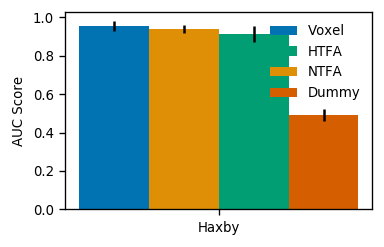

In [154]:
confidence = 0.95
voxel_accuracies = np.mean(voxel_summary_means)
voxel_errs = stats.sem(voxel_summary_means) * stats.t.ppf((1 + confidence) / 2, len(voxel_summary_means) - 1)
htfa_accuracies = np.mean(htfa_summary_means)
htfa_errs = stats.sem(htfa_summary_means) * stats.t.ppf((1 + confidence) / 2, len(htfa_summary_means) - 1)
ntfa_accuracies = np.mean(ntfa_summary_means)
ntfa_errs = stats.sem(ntfa_summary_result) * stats.t.ppf((1 + confidence) / 2, len(ntfa_summary_means) - 1)
dummy_accuracies = np.mean(dummy_summary_means)
dummy_errs = stats.sem(dummy_summary_means) * stats.t.ppf((1 + confidence) / 2, len(dummy_summary_means) - 1)

datasets = ['Haxby'] #, 'Word', 'Rest']

xs = np.arange(len(datasets))

colorblind_cycler = cycler(color=color_palette('colorblind'))
colorblind_colors = [c['color'] for c in colorblind_cycler]
muted_cycler = cycler(color=color_palette('bright'))
muted_colors = [c['color'] for c in muted_cycler]

bar_width = 0.2

fig = pl.figure()
voxel_bar = pl.bar(xs, height=voxel_accuracies, color=colorblind_colors[0], width=bar_width, yerr=voxel_errs)
ntfa_bar = pl.bar(xs + bar_width, height=ntfa_accuracies, color=colorblind_colors[1], width=bar_width, yerr=ntfa_errs)
htfa_bar = pl.bar(xs + 2*bar_width, height=htfa_accuracies, color=colorblind_colors[2], width=bar_width, yerr=htfa_errs)
dummy_bar = pl.bar(xs + 3*bar_width, height=dummy_accuracies, color=colorblind_colors[3], width=bar_width, yerr=dummy_errs)
pl.xticks(xs+1.5*bar_width, datasets)
pl.legend((voxel_bar[0], htfa_bar[0], ntfa_bar[0],dummy_bar[0]), ('Voxel', 'HTFA', 'NTFA','Dummy'))
pl.ylabel('AUC Score')
pl.ylim(bottom=0,)
fig.savefig('affvids_svm_accuracies_ci.pdf')

In [100]:
stats.ttest_ind(ntfa_summary_means,dummy_summary_means)

Ttest_indResult(statistic=22.45892849192982, pvalue=2.7474017153985556e-35)

In [155]:
### task classification using 5Fold CV on NTFA positive vs negative###
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
#             if i not in validation_blocks:
            block = dtfa._blocks[i]
            if block.subject == s:
                session_labels.append(block.run)
                data.append(all_weights_dtfa[i,:,:].mean(0))
                targets.append(positive_negative_labeler(block.task))
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                   session_labels=None, cv=cv,
                                                                   scoring="roc_auc",
                                                                   print_all=True)
    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())
    summary_subject_chance_means.append(np.array(overall_result_chance).mean())

print ('...')
category_result = {key:[] for key in ['positive','negative']}
for c in ['positive','negative']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("NTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("NTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("NTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

print("Overall Dummy Mean/SE Score: %1.4f +- %1.4f" % (
np.array(summary_subject_chance_means).mean(),
stats.sem(summary_subject_chance_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_chance_means) - 1)))

ntfa_summary_result = summary_result
dummy_summary_result = summary_result_chance
ntfa_summary_means = summary_subject_means
dummy_summary_means = summary_subject_chance_means
ntfa_pos_neg_summary_means = ntfa_summary_means
dummy_pos_neg_summary_means = dummy_summary_means

Processing Subject control01
Processing negative
Scores: 0.3500 +- 0.3742
Chance Scores: 0.1500 +- 0.1225
Processing positive
Scores: 0.3500 +- 0.3742
Chance Scores: 0.7500 +- 0.2236
...
Overall Score: 0.3500 +- 0.3742
Overall Dummy Score: 0.4500 +- 0.3500


Processing Subject control02
Processing negative
Scores: 0.9500 +- 0.1000
Chance Scores: 0.4000 +- 0.2000
Processing positive
Scores: 0.9500 +- 0.1000
Chance Scores: 0.4000 +- 0.2550
...
Overall Score: 0.9500 +- 0.1000
Overall Dummy Score: 0.4000 +- 0.2291


Processing Subject control03
Processing negative
Scores: 0.8000 +- 0.2449
Chance Scores: 0.6000 +- 0.2000
Processing positive
Scores: 0.8000 +- 0.2449
Chance Scores: 0.4000 +- 0.2000
...
Overall Score: 0.8000 +- 0.2449
Overall Dummy Score: 0.5000 +- 0.2236


Processing Subject control04
Processing negative
Scores: 0.5000 +- 0.4472
Chance Scores: 0.7500 +- 0.3873
Processing positive
Scores: 0.5000 +- 0.4472
Chance Scores: 0.7000 +- 0.1871
...
Overall Score: 0.5000 +- 0.4472
Over

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.9000 +- 0.2000
Chance Scores: 0.6000 +- 0.4062
...
Overall Score: 0.9000 +- 0.2000
Overall Dummy Score: 0.6750 +- 0.3363


Processing Subject control09
Processing negative
Scores: 0.6500 +- 0.3742
Chance Scores: 0.7000 +- 0.1871
Processing positive
Scores: 0.6500 +- 0.3742
Chance Scores: 0.6500 +- 0.1225
...
Overall Score: 0.6500 +- 0.3742
Overall Dummy Score: 0.6750 +- 0.1601


Processing Subject control10
Processing negative
Scores: 0.2000 +- 0.4000
Chance Scores: 0.6000 +- 0.3000
Processing positive
Scores: 0.2000 +- 0.4000
Chance Scores: 0.5000 +- 0.3162
...
Overall Score: 0.2000 +- 0.4000
Overall Dummy Score: 0.5500 +- 0.3122


Processing Subject control11
Processing negative
Scores: 0.8500 +- 0.3000
Chance Scores: 0.6000 +- 0.1225
Processing positive
Scores: 0.8500 +- 0.3000
Chance Scores: 0.4000 +- 0.2000
...
Overall Score: 0.8500 +- 0.3000
Overall Dummy Score: 0.5000 +- 0.1936


Processing Subject control12
Processing negative
Scores: 0.3500 +- 0.3000
Chance Scores: 0

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.2000 +- 0.2449
Chance Scores: 0.6000 +- 0.2000
...
Overall Score: 0.2000 +- 0.2449
Overall Dummy Score: 0.6250 +- 0.1677


Processing Subject control17
Processing negative
Scores: 0.4500 +- 0.4000
Chance Scores: 0.2000 +- 0.1871
Processing positive
Scores: 0.4500 +- 0.4000
Chance Scores: 0.7000 +- 0.1871
...
Overall Score: 0.4500 +- 0.4000
Overall Dummy Score: 0.4500 +- 0.3122


Processing Subject control18
Processing negative
Scores: 0.3000 +- 0.4000
Chance Scores: 0.4500 +- 0.3317
Processing positive
Scores: 0.3000 +- 0.4000
Chance Scores: 0.6000 +- 0.2000
...
Overall Score: 0.3000 +- 0.4000
Overall Dummy Score: 0.5250 +- 0.2839


Processing Subject control19
Processing negative
Scores: 0.6000 +- 0.2000
Chance Scores: 0.6000 +- 0.3391
Processing positive
Scores: 0.6000 +- 0.2000
Chance Scores: 0.2000 +- 0.2915
...
Overall Score: 0.6000 +- 0.2000
Overall Dummy Score: 0.4000 +- 0.3742


Processing Subject control20
Processing negative
Scores: 0.3000 +- 0.2449
Chance Scores: 0

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.5500 +- 0.4000
Chance Scores: 0.3000 +- 0.2449
Processing positive
Scores: 0.5500 +- 0.4000
Chance Scores: 0.4500 +- 0.1871
...
Overall Score: 0.5500 +- 0.4000
Overall Dummy Score: 0.3750 +- 0.2305


Processing Subject mdd06
Processing negative
Scores: 0.8000 +- 0.4000
Chance Scores: 0.5500 +- 0.1871
Processing positive
Scores: 0.7000 +- 0.4000
Chance Scores: 0.5000 +- 0.2236
...
Overall Score: 0.7500 +- 0.4031
Overall Dummy Score: 0.5250 +- 0.2077


Processing Subject mdd07
Processing negative
Scores: 0.6000 +- 0.3742
Chance Scores: 0.6000 +- 0.1225
Processing positive
Scores: 0.6000 +- 0.3742
Chance Scores: 0.2000 +- 0.1871
...
Overall Score: 0.6000 +- 0.3742
Overall Dummy Score: 0.4000 +- 0.2550


Processing Subject mdd08
Processing negative
Scores: 0.8000 +- 0.2449
Chance Scores: 0.4000 +- 0.2000
Processing positive
Scores: 0.8000 +- 0.2449
Chance Scores: 0.4500 +- 0.2915
...
Overall Score: 0.8000 +- 0.2449
Overall Dummy Score: 0.4250 +- 0.2512


Processing Subject mdd09


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

In [156]:
### task classification using 5Fold CV on HTFA positive vs negative###
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
subjects = OrderedSet([b.subject for b in htfa._blocks])
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
#             if i not in validation_blocks:
            block = dtfa._blocks[i]
            if block.subject == s:
                session_labels.append(block.run)
                data.append(all_weights_htfa[i,:,:].mean(0))
                targets.append(block_positive_negative_labeler(block))
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                   session_labels=None, cv=cv,
                                                                   scoring="roc_auc",
                                                                   print_all=True)
    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())

print ('...')
category_result = {key:[] for key in ['positive','negative']}
for c in ['positive','negative']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("HTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("HTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("HTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

htfa_summary_result = summary_result
htfa_summary_means = summary_subject_means
htfa_pos_neg_summary_means = htfa_summary_means


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Processing Subject control01
Processing negative
Scores: 0.6500 +- 0.3000
Chance Scores: 0.5500 +- 0.2449
Processing positive
Scores: 0.6500 +- 0.3000
Chance Scores: 0.5000 +- 0.1581
...
Overall Score: 0.6500 +- 0.3000
Overall Dummy Score: 0.5250 +- 0.2077


Processing Subject control02
Processing negative
Scores: 0.8000 +- 0.2449
Chance Scores: 0.2000 +- 0.1871
Processing positive
Scores: 0.8000 +- 0.2449
Chance Scores: 0.2500 +- 0.2739
...
Overall Score: 0.8000 +- 0.2449
Overall Dummy Score: 0.2250 +- 0.2358


Processing Subject control03
Processing negative
Scores: 0.6500 +- 0.3742
Chance Scores: 0.6000 +- 0.3742
Processing positive
Scores: 0.6500 +- 0.3742
Chance Scores: 0.5000 +- 0.3536
...
Overall Score: 0.6500 +- 0.3742
Overall Dummy Score: 0.5500 +- 0.3674


Processing Subject control04
Processing negative
Scores: 0.6000 +- 0.3742
Chance Scores: 0.4000 +- 0.2000
Processing positive
Scores: 0.6000 +- 0.3742
Chance Scores: 0.7000 +- 0.1000
...
Overall Score: 0.6000 +- 0.3742
Over

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.5000 +- 0.4472
Chance Scores: 0.6000 +- 0.3391
...
Overall Score: 0.5000 +- 0.4472
Overall Dummy Score: 0.6000 +- 0.3742


Processing Subject control09
Processing negative
Scores: 0.8000 +- 0.4000
Chance Scores: 0.2500 +- 0.3162
Processing positive
Scores: 0.8000 +- 0.4000
Chance Scores: 0.6500 +- 0.2550
...
Overall Score: 0.8000 +- 0.4000
Overall Dummy Score: 0.4500 +- 0.3500


Processing Subject control10
Processing negative
Scores: 0.2000 +- 0.2449
Chance Scores: 0.6000 +- 0.2550
Processing positive
Scores: 0.2000 +- 0.2449
Chance Scores: 0.4500 +- 0.1871
...
Overall Score: 0.2000 +- 0.2449
Overall Dummy Score: 0.5250 +- 0.2358


Processing Subject control11
Processing negative
Scores: 0.4000 +- 0.3742
Chance Scores: 0.7500 +- 0.0000
Processing positive
Scores: 0.4000 +- 0.3742
Chance Scores: 0.3000 +- 0.2449
...
Overall Score: 0.4000 +- 0.3742
Overall Dummy Score: 0.5250 +- 0.2839


Processing Subject control12
Processing negative
Scores: 0.2500 +- 0.2236
Chance Scores: 0

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.6000 +- 0.3742
Chance Scores: 0.4000 +- 0.2550
...
Overall Score: 0.6000 +- 0.3742
Overall Dummy Score: 0.3750 +- 0.2795


Processing Subject control17
Processing negative
Scores: 0.6000 +- 0.3742
Chance Scores: 0.5500 +- 0.1871
Processing positive
Scores: 0.6000 +- 0.3742
Chance Scores: 0.4500 +- 0.4000
...
Overall Score: 0.6000 +- 0.3742
Overall Dummy Score: 0.5000 +- 0.3162


Processing Subject control18
Processing negative
Scores: 0.8000 +- 0.2449
Chance Scores: 0.6000 +- 0.2550
Processing positive
Scores: 0.8000 +- 0.2449
Chance Scores: 0.6000 +- 0.1225
...
Overall Score: 0.8000 +- 0.2449
Overall Dummy Score: 0.6000 +- 0.2000


Processing Subject control19
Processing negative
Scores: 0.6500 +- 0.3742
Chance Scores: 0.5500 +- 0.4000
Processing positive
Scores: 0.6500 +- 0.3742
Chance Scores: 0.4000 +- 0.2550
...
Overall Score: 0.6500 +- 0.3742
Overall Dummy Score: 0.4750 +- 0.3437


Processing Subject control20
Processing negative
Scores: 0.5500 +- 0.4000
Chance Scores: 0

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.5000 +- 0.3162
Chance Scores: 0.4000 +- 0.2000
...
Overall Score: 0.5000 +- 0.3162
Overall Dummy Score: 0.4250 +- 0.1953


Skipping Subject, not enough runs
Processing negative
Scores: 0.5000 +- 0.3162
Chance Scores: 0.6000 +- 0.2550
Processing positive
Scores: 0.5000 +- 0.3162
Chance Scores: 0.7500 +- 0.1581
...
Overall Score: 0.5000 +- 0.3162
Overall Dummy Score: 0.6750 +- 0.2250


Processing Subject mdd06
Processing negative
Scores: 0.7000 +- 0.2449
Chance Scores: 0.6500 +- 0.2550
Processing positive
Scores: 0.7000 +- 0.2449
Chance Scores: 0.6000 +- 0.2000
...
Overall Score: 0.7000 +- 0.2449
Overall Dummy Score: 0.6250 +- 0.2305


Processing Subject mdd07
Processing negative
Scores: 0.6000 +- 0.2000
Chance Scores: 0.5000 +- 0.1581
Processing positive
Scores: 0.6000 +- 0.2000
Chance Scores: 0.4500 +- 0.2449
...
Overall Score: 0.6000 +- 0.2000
Overall Dummy Score: 0.4750 +- 0.2077


Processing Subject mdd08
Processing negative
Scores: 0.8000 +- 0.2449
Chance Scores: 0.6000 +

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.4000 +- 0.4899
Chance Scores: 0.5500 +- 0.2449
...
Overall Score: 0.4500 +- 0.4717
Overall Dummy Score: 0.5750 +- 0.2512


Processing Subject mdd13
Processing negative
Scores: 0.6000 +- 0.3742
Chance Scores: 0.8000 +- 0.1000
Processing positive
Scores: 0.6000 +- 0.3742
Chance Scores: 0.3500 +- 0.2550
...
Overall Score: 0.6000 +- 0.3742
Overall Dummy Score: 0.5750 +- 0.2969


Processing Subject mdd14
Processing negative
Scores: 0.1000 +- 0.2000
Chance Scores: 0.7000 +- 0.1000
Processing positive
Scores: 0.1000 +- 0.2000
Chance Scores: 0.8000 +- 0.2915
...
Overall Score: 0.1000 +- 0.2000
Overall Dummy Score: 0.7500 +- 0.2236


Processing Subject mdd15
Processing negative
Scores: 0.2000 +- 0.4000
Chance Scores: 0.4000 +- 0.3391
Processing positive
Scores: 0.2000 +- 0.4000
Chance Scores: 0.4000 +- 0.1225
...
Overall Score: 0.2000 +- 0.4000
Overall Dummy Score: 0.4000 +- 0.2550


Processing Subject mdd16
Processing negative
Scores: 0.5500 +- 0.4000
Chance Scores: 0.6500 +- 0.3742


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

In [157]:
### task classification using 5Fold CV on input data positive vs negative###
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []

for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
#             if i not in validation_blocks:
            if block.subject == s:
                session_labels.append(block.run)
                data.append(dtfa.voxel_activations[i].data.numpy().mean(0))
                targets.append(positive_negative_labeler(block.task))
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                 session_labels=None,
                                                                    cv=cv,
                                                                   scoring="roc_auc",
                                                                   feature_select=True,
                                                                   print_all=True)

    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())

print ('...')
category_result = {key:[] for key in ['positive','negative']}
for c in ['positive','negative']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("Voxel Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("Voxel Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("Voxel Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

voxel_summary_result = summary_result
voxel_summary_means = summary_subject_means
voxel_pos_neg_summary_means = voxel_summary_means


Processing Subject control01
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.6000 +- 0.3742
Chance Scores: 0.4500 +- 0.2449
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.6000 +- 0.3742
Chance Scores: 0.6000 +- 0.3742
...
Overall Score: 0.6000 +- 0.3742
Overall Dummy Score: 0.5250 +- 0.3250


Processing Subject control02
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.5000 +- 0.3162
Chance Scores: 0.5500 +- 0.2449
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.5000 +- 0.3162
Chance Scores: 0.6000 +- 0.2550
...
Overall Score: 0.5000 +- 0.3162
Overall Dummy Score: 0.5750 +- 0.2512


Processing Subject control03
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]
Scores: 0.6000 +- 0.2000
Chance Scores: 0.5500 +- 0.1000
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]
Scores: 0.6000 +- 0.2000
Chance Scores: 0.7000 +- 0.2449
...
Overall Score: 0.6000 +- 0.2000
Overall Dummy Score: 0.6250 +- 0.2016


Processing Subject control04
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]
Scores: 0.7000 +- 0.4000
Chance Scores: 0.7000 +- 0.2449
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]
Scores: 0.7000 +- 0.4000
Chance Scores: 0.6000 +- 0.3391
...
Overall Score: 0.7000 +- 0.4000
Overall Dummy Score: 0.6500 +- 0.3000


Processing Subject control05


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.9000 +- 0.2000
Chance Scores: 0.4500 +- 0.2915
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.9000 +- 0.2000
Chance Scores: 0.3000 +- 0.2915
...
Overall Score: 0.9000 +- 0.2000
Overall Dummy Score: 0.3750 +- 0.3010


Processing Subject control06
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]
Scores: 0.7500 +- 0.3873
Chance Scores: 0.3500 +- 0.3000
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]
Scores: 0.7500 +- 0.3873
Chance Scores: 0.6000 +- 0.2550
...
Overall Score: 0.7500 +- 0.3873
Overall Dummy Score: 0.4750 +- 0.3052


Processing Subject control07
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.7000 +- 0.4000
Chance Scores: 0.8000 +- 0.1871
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.7000 +- 0.4000
Chance Scores: 0.4500 +- 0.2449
...
Overall Score: 0.7000 +- 0.4000
Overall Dummy Score: 0.6250 +- 0.2795


Processing Subject control08
Processing negative
TRAIN: [ 1  2  4  6  7  8  9 10 11 12 13 14] TEST: [0 3 5]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14] TEST: [ 9 10 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  3  4  5  6  7  9 10 12 13 14] TEST: [ 2  8 11]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 13] TEST: [ 4  6 14]
TRAIN: [ 0  2  3  4  5  6  8  9 10 11 12 14] TEST: [ 1  7 13]
Scores: 0.5000 +- 0.4472
Chance Scores: 0.5500 +- 0.3674
Processing positive
TRAIN: [ 1  2  4  6  7  8  9 10 11 12 13 14] TEST: [0 3 5]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14] TEST: [ 9 10 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  3  4  5  6  7  9 10 12 13 14] TEST: [ 2  8 11]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 13] TEST: [ 4  6 14]
TRAIN: [ 0  2  3  4  5  6  8  9 10 11 12 14] TEST: [ 1  7 13]
Scores: 0.5000 +- 0.4472
Chance Scores: 0.3500 +- 0.1225
...
Overall Score: 0.5000 +- 0.4472
Overall Dummy Score: 0.4500 +- 0.2915


Processing Subject control09
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.8000 +- 0.4000
Chance Scores: 0.4000 +- 0.2000
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.8000 +- 0.4000
Chance Scores: 0.3500 +- 0.2000
...
Overall Score: 0.8000 +- 0.4000
Overall Dummy Score: 0.3750 +- 0.2016


Processing Subject control10


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.2000 +- 0.2449
Chance Scores: 0.4500 +- 0.2915
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.2000 +- 0.2449
Chance Scores: 0.7000 +- 0.2915
...
Overall Score: 0.2000 +- 0.2449
Overall Dummy Score: 0.5750 +- 0.3172


Processing Subject control11
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.7500 +- 0.3873
Chance Scores: 0.3500 +- 0.3000
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.7500 +- 0.3873
Chance Scores: 0.6000 +- 0.3391
...
Overall Score: 0.7500 +- 0.3873
Overall Dummy Score: 0.4750 +- 0.3437


Processing Subject control12
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]
Scores: 0.4500 +- 0.4000
Chance Scores: 0.3500 +- 0.2000
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]
Scores: 0.4500 +- 0.4000
Chance Scores: 0.3500 +- 0.2550
...
Overall Score: 0.4500 +- 0.4000
Overall Dummy Score: 0.3500 +- 0.2291


Processing Subject control13
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.6000 +- 0.4899
Chance Scores: 0.4500 +- 0.1871
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.6000 +- 0.4899
Chance Scores: 0.6500 +- 0.2550
...
Overall Score: 0.6000 +- 0.4899
Overall Dummy Score: 0.5500 +- 0.2449


Processing Subject control14


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.5500 +- 0.4583
Chance Scores: 0.4000 +- 0.2550
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]
Scores: 0.5500 +- 0.4583
Chance Scores: 0.5000 +- 0.3162
...
Overall Score: 0.5500 +- 0.4583
Overall Dummy Score: 0.4500 +- 0.2915


Processing Subject control15
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.5000 +- 0.4472
Chance Scores: 0.6000 +- 0.2000
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.5000 +- 0.4472
Chance Scores: 0.5000 +- 0.2739
...
Overall Score: 0.5000 +- 0.4472
Overall Dummy Score: 0.5500 +- 0.2449


Processing Subject control16
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]
Scores: 0.8000 +- 0.2449
Chance Scores: 0.5000 +- 0.2739
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]
Scores: 0.8000 +- 0.2449
Chance Scores: 0.6000 +- 0.2550
...
Overall Score: 0.8000 +- 0.2449
Overall Dummy Score: 0.5500 +- 0.2693


Processing Subject control17


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.2500 +- 0.3873
Chance Scores: 0.6500 +- 0.1225
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.2500 +- 0.3873
Chance Scores: 0.6000 +- 0.2550
...
Overall Score: 0.2500 +- 0.3873
Overall Dummy Score: 0.6250 +- 0.2016


Processing Subject control18
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.6000 +- 0.3742
Chance Scores: 0.6500 +- 0.2550
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.6000 +- 0.3742
Chance Scores: 0.4000 +- 0.2000
...
Overall Score: 0.6000 +- 0.3742
Overall Dummy Score: 0.5250 +- 0.2610


Processing Subject control19
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]
Scores: 0.6000 +- 0.2000
Chance Scores: 0.4000 +- 0.4899
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]
Scores: 0.6000 +- 0.2000
Chance Scores: 0.5000 +- 0.2739
...
Overall Score: 0.6000 +- 0.2000
Overall Dummy Score: 0.4500 +- 0.4000


Processing Subject control20
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.5000 +- 0.3162
Chance Scores: 0.6500 +- 0.1225
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.5000 +- 0.3162
Chance Scores: 0.4500 +- 0.2915
...
Overall Score: 0.5000 +- 0.3162
Overall Dummy Score: 0.5500 +- 0.2449


Processing Subject mdd01
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.6000 +- 0.3742
Chance Scores: 0.7000 +- 0.3674
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.6000 +- 0.3742
Chance Scores: 0.5000 +- 0.2739
...
Overall Score: 0.6000 +- 0.3742
Overall Dummy Score: 0.6000 +- 0.3391


Processing Subject mdd02


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.5500 +- 0.4583
Chance Scores: 0.5500 +- 0.3317
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.5500 +- 0.4583
Chance Scores: 0.7500 +- 0.1581
...
Overall Score: 0.5500 +- 0.4583
Overall Dummy Score: 0.6500 +- 0.2784


Processing Subject mdd03
Processing negative
TRAIN: [ 1  2  4  6  7  8  9 10 11 12 13 14] TEST: [0 3 5]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14] TEST: [ 9 10 12]
TRAIN: [ 0  1  3  4  5  6  7  9 10 12 13 14] TEST: [ 2  8 11]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 13] TEST: [ 4  6 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  2  3  4  5  6  8  9 10 11 12 14] TEST: [ 1  7 13]
Scores: 0.3000 +- 0.4000
Chance Scores: 0.6000 +- 0.3000
Processing positive
TRAIN: [ 1  2  4  6  7  8  9 10 11 12 13 14] TEST: [0 3 5]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14] TEST: [ 9 10 12]
TRAIN: [ 0  1  3  4  5  6  7  9 10 12 13 14] TEST: [ 2  8 11]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 13] TEST: [ 4  6 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  2  3  4  5  6  8  9 10 11 12 14] TEST: [ 1  7 13]
Scores: 0.3000 +- 0.4000
Chance Scores: 0.6500 +- 0.1225
...
Overall Score: 0.3000 +- 0.4000
Overall Dummy Score: 0.6250 +- 0.2305


Processing Subject mdd04
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]
Scores: 0.5000 +- 0.3162
Chance Scores: 0.4500 +- 0.2449
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]
Scores: 0.5000 +- 0.3162
Chance Scores: 0.5500 +- 0.1000
...
Overall Score: 0.5000 +- 0.3162
Overall Dummy Score: 0.5000 +- 0.1936


Skipping Subject, not enough runs
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]
Scores: 0.5000 +- 0.3162
Chance Scores: 0.5000 +- 0.2739
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]
Scores: 0.5000 +- 0.3162
Chance Scores: 0.4500 +- 0.3674
...
Overall Score: 0.5000 +- 0.3162
Overall Dummy Score: 0.4750 +- 0.3250


Processing Subject mdd06
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.9000 +- 0.2000
Chance Scores: 0.6500 +- 0.2550
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.9000 +- 0.2000
Chance Scores: 0.6000 +- 0.1225
...
Overall Score: 0.9000 +- 0.2000
Overall Dummy Score: 0.6250 +- 0.2016


Processing Subject mdd07
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.7000 +- 0.2449
Chance Scores: 0.4500 +- 0.2915
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.7000 +- 0.2449
Chance Scores: 0.6000 +- 0.1225
...
Overall Score: 0.7000 +- 0.2449
Overall Dummy Score: 0.5250 +- 0.2358


Processing Subject mdd08
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.8000 +- 0.2449
Chance Scores: 0.3500 +- 0.2000
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.8000 +- 0.2449
Chance Scores: 0.5500 +- 0.3674
...
Overall Score: 0.8000 +- 0.2449
Overall Dummy Score: 0.4500 +- 0.3122


Processing Subject mdd09


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.6000 +- 0.3742
Chance Scores: 0.5500 +- 0.1871
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.6000 +- 0.3742
Chance Scores: 0.5500 +- 0.1871
...
Overall Score: 0.6000 +- 0.3742
Overall Dummy Score: 0.5500 +- 0.1871


Processing Subject mdd10
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.8000 +- 0.2449
Chance Scores: 0.6500 +- 0.2550
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.8000 +- 0.2449
Chance Scores: 0.3500 +- 0.2000
...
Overall Score: 0.8000 +- 0.2449
Overall Dummy Score: 0.5000 +- 0.2739


Processing Subject mdd11
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.8000 +- 0.2449
Chance Scores: 0.3500 +- 0.3000
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.8000 +- 0.2449
Chance Scores: 0.7000 +- 0.2915
...
Overall Score: 0.8000 +- 0.2449
Overall Dummy Score: 0.5250 +- 0.3437


Processing Subject mdd12
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.5500 +- 0.2449
Chance Scores: 0.5500 +- 0.3674
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.5500 +- 0.2449
Chance Scores: 0.7000 +- 0.2449
...
Overall Score: 0.5500 +- 0.2449
Overall Dummy Score: 0.6250 +- 0.3211


Processing Subject mdd13
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]
Scores: 0.4500 +- 0.4583
Chance Scores: 0.5500 +- 0.1871
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]
Scores: 0.4500 +- 0.4583
Chance Scores: 0.6000 +- 0.1225
...
Overall Score: 0.4500 +- 0.4583
Overall Dummy Score: 0.5750 +- 0.1601


Processing Subject mdd14
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.3000 +- 0.4000
Chance Scores: 0.6000 +- 0.2000
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.3000 +- 0.4000
Chance Scores: 0.2500 +- 0.2236
...
Overall Score: 0.3000 +- 0.4000
Overall Dummy Score: 0.4250 +- 0.2750


Processing Subject mdd15
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.2000 +- 0.4000
Chance Scores: 0.6000 +- 0.4062
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.2000 +- 0.4000
Chance Scores: 0.3000 +- 0.1871
...
Overall Score: 0.2000 +- 0.4000
Overall Dummy Score: 0.4500 +- 0.3500


Processing Subject mdd16
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]
Scores: 0.2500 +- 0.3873
Chance Scores: 0.4500 +- 0.2915
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]
Scores: 0.2500 +- 0.3873
Chance Scores: 0.5000 +- 0.3162
...
Overall Score: 0.2500 +- 0.3873
Overall Dummy Score: 0.4750 +- 0.3052


Processing Subject mdd17


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.5500 +- 0.1000
Chance Scores: 0.5000 +- 0.3162
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.5500 +- 0.1000
Chance Scores: 0.4500 +- 0.1871
...
Overall Score: 0.5500 +- 0.1000
Overall Dummy Score: 0.4750 +- 0.2610


Processing Subject mdd18
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]
Scores: 0.6000 +- 0.2000
Chance Scores: 0.5500 +- 0.2915
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]
Scores: 0.6000 +- 0.2000
Chance Scores: 0.5500 +- 0.3674
...
Overall Score: 0.6000 +- 0.2000
Overall Dummy Score: 0.5500 +- 0.3317


Processing Subject mdd19
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.2000 +- 0.2449
Chance Scores: 0.6000 +- 0.3000
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.2000 +- 0.2449
Chance Scores: 0.6000 +- 0.2550
...
Overall Score: 0.2000 +- 0.2449
Overall Dummy Score: 0.6000 +- 0.2784


...
Voxel Summary Score Across Subjects, For Category positive : 0.5641 +- 0.3943
Voxel Summary Score Across Subjects, For Category negative : 0.5641 +- 0.3943
...
Voxel Summary Score Across Subjects, Across Tasks: 0.5641 +- 0.3943
Overall Dummy Score: 0.53 +- 0.29
...
Voxel Summary Mean/SE, Across Tasks: 0.5641 +- 0.0628


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

In [158]:
### task classification using 5Fold CV on input data positive vs negative###
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
feature_selection = SelectKBest(f_classif, k=500)

for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
#             if i not in validation_blocks:
            if block.subject == s:
                session_labels.append(block.run)
                data.append(dtfa.voxel_activations[i].data.numpy().mean(0))
                targets.append(positive_negative_labeler(block.task))
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                 session_labels=None,
                                                                    cv=cv,
                                                                   scoring="roc_auc",
                                                                   feature_select=True,
                                                                   feature_selection=feature_selection,
                                                                   print_all=True)

    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())

print ('...')
category_result = {key:[] for key in ['positive','negative']}
for c in ['positive','negative']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("Voxel Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("Voxel Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("Voxel Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

voxel_summary_result = summary_result
voxel_summary_means = summary_subject_means
voxel_pos_neg_summary_means = voxel_summary_means


Processing Subject control01
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.4500 +- 0.3317
Chance Scores: 0.3500 +- 0.2000
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.4500 +- 0.3317
Chance Scores: 0.6000 +- 0.3742
...
Overall Score: 0.4500 +- 0.3317
Overall Dummy Score: 0.4750 +- 0.3250


Processing Subject control02
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.5000 +- 0.3162
Chance Scores: 0.1500 +- 0.2000
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.5000 +- 0.3162
Chance Scores: 0.5500 +- 0.2449
...
Overall Score: 0.5000 +- 0.3162
Overall Dummy Score: 0.3500 +- 0.3000


Processing Subject control03
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.6000 +- 0.3742
Chance Scores: 0.4500 +- 0.1871
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.6000 +- 0.3742
Chance Scores: 0.4500 +- 0.2915
...
Overall Score: 0.6000 +- 0.3742
Overall Dummy Score: 0.4500 +- 0.2449


Processing Subject control04
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]
Scores: 0.8500 +- 0.2000
Chance Scores: 0.2500 +- 0.2739
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]
Scores: 0.8500 +- 0.2000
Chance Scores: 0.6000 +- 0.3000
...
Overall Score: 0.8500 +- 0.2000
Overall Dummy Score: 0.4250 +- 0.3363


Processing Subject control05
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.9000 +- 0.2000
Chance Scores: 0.2500 +- 0.3162
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.9000 +- 0.2000
Chance Scores: 0.6500 +- 0.3000
...
Overall Score: 0.9000 +- 0.2000
Overall Dummy Score: 0.4500 +- 0.3674


Processing Subject control06
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]
Scores: 0.7500 +- 0.3873
Chance Scores: 0.5000 +- 0.1581
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]
Scores: 0.7500 +- 0.3873
Chance Scores: 0.6500 +- 0.4359
...
Overall Score: 0.7500 +- 0.3873
Overall Dummy Score: 0.5750 +- 0.3363


Processing Subject control07
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.7000 +- 0.4000
Chance Scores: 0.6000 +- 0.2550
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.7000 +- 0.4000
Chance Scores: 0.5000 +- 0.2739
...
Overall Score: 0.7000 +- 0.4000
Overall Dummy Score: 0.5500 +- 0.2693


Processing Subject control08
Processing negative
TRAIN: [ 1  2  4  6  7  8  9 10 11 12 13 14] TEST: [0 3 5]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14] TEST: [ 9 10 12]
TRAIN: [ 0  1  3  4  5  6  7  9 10 12 13 14] TEST: [ 2  8 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 13] TEST: [ 4  6 14]
TRAIN: [ 0  2  3  4  5  6  8  9 10 11 12 14] TEST: [ 1  7 13]
Scores: 0.5000 +- 0.4472
Chance Scores: 0.4000 +- 0.1225
Processing positive
TRAIN: [ 1  2  4  6  7  8  9 10 11 12 13 14] TEST: [0 3 5]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14] TEST: [ 9 10 12]
TRAIN: [ 0  1  3  4  5  6  7  9 10 12 13 14] TEST: [ 2  8 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 13] TEST: [ 4  6 14]
TRAIN: [ 0  2  3  4  5  6  8  9 10 11 12 14] TEST: [ 1  7 13]
Scores: 0.5000 +- 0.4472
Chance Scores: 0.7000 +- 0.1000
...
Overall Score: 0.5000 +- 0.4472
Overall Dummy Score: 0.5500 +- 0.1871


Processing Subject control09
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.7500 +- 0.3873
Chance Scores: 0.5500 +- 0.3674
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.7500 +- 0.3873
Chance Scores: 0.5500 +- 0.1000
...
Overall Score: 0.7500 +- 0.3873
Overall Dummy Score: 0.5500 +- 0.2693


Processing Subject control10
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.1000 +- 0.2000
Chance Scores: 0.7000 +- 0.2915
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Scores: 0.1000 +- 0.2000
Chance Scores: 0.3500 +- 0.2550
...
Overall Score: 0.1000 +- 0.2000
Overall Dummy Score: 0.5250 +- 0.3250


Processing Subject control11
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.9500 +- 0.1000
Chance Scores: 0.4000 +- 0.3000
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.9500 +- 0.1000
Chance Scores: 0.5000 +- 0.3162
...
Overall Score: 0.9500 +- 0.1000
Overall Dummy Score: 0.4500 +- 0.3122


Processing Subject control12
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]
Scores: 0.5000 +- 0.3162
Chance Scores: 0.5000 +- 0.2739
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]
Scores: 0.5000 +- 0.3162
Chance Scores: 0.6000 +- 0.4062
...
Overall Score: 0.5000 +- 0.3162
Overall Dummy Score: 0.5500 +- 0.3500


Processing Subject control13
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.6000 +- 0.4899
Chance Scores: 0.4500 +- 0.2915
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.6000 +- 0.4899
Chance Scores: 0.4500 +- 0.2449
...
Overall Score: 0.6000 +- 0.4899
Overall Dummy Score: 0.4500 +- 0.2693


Processing Subject control14
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]
Scores: 0.5750 +- 0.4717
Chance Scores: 0.4000 +- 0.2550
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]
Scores: 0.5500 +- 0.4583
Chance Scores: 0.5500 +- 0.3674
...
Overall Score: 0.5625 +- 0.4652
Overall Dummy Score: 0.4750 +- 0.3250


Processing Subject control15
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.5000 +- 0.4472
Chance Scores: 0.2000 +- 0.1871
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.5000 +- 0.4472
Chance Scores: 0.6000 +- 0.2000
...
Overall Score: 0.5000 +- 0.4472
Overall Dummy Score: 0.4000 +- 0.2784


Processing Subject control16


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.8000 +- 0.2449
Chance Scores: 0.3000 +- 0.1000
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.8000 +- 0.2449
Chance Scores: 0.6500 +- 0.1225
...
Overall Score: 0.8000 +- 0.2449
Overall Dummy Score: 0.4750 +- 0.2077


Processing Subject control17
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]
Scores: 0.2500 +- 0.3873
Chance Scores: 0.5500 +- 0.2915
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]
Scores: 0.2500 +- 0.3873
Chance Scores: 0.3500 +- 0.3000
...
Overall Score: 0.2500 +- 0.3873
Overall Dummy Score: 0.4500 +- 0.3122


Processing Subject control18
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.6000 +- 0.3742
Chance Scores: 0.5500 +- 0.1000
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.6000 +- 0.3742
Chance Scores: 0.6500 +- 0.1225
...
Overall Score: 0.6000 +- 0.3742
Overall Dummy Score: 0.6000 +- 0.1225


Processing Subject control19
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]
Scores: 0.6000 +- 0.2000
Chance Scores: 0.5500 +- 0.2449
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]
Scores: 0.6000 +- 0.2000
Chance Scores: 0.5000 +- 0.2236
...
Overall Score: 0.6000 +- 0.2000
Overall Dummy Score: 0.5250 +- 0.2358


Processing Subject control20
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.6500 +- 0.3742
Chance Scores: 0.5000 +- 0.2739
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.6500 +- 0.3742
Chance Scores: 0.5000 +- 0.2236
...
Overall Score: 0.6500 +- 0.3742
Overall Dummy Score: 0.5000 +- 0.2500


Processing Subject mdd01


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.6000 +- 0.2000
Chance Scores: 0.4500 +- 0.3674
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.6000 +- 0.2000
Chance Scores: 0.6500 +- 0.2550
...
Overall Score: 0.6000 +- 0.2000
Overall Dummy Score: 0.5500 +- 0.3317


Processing Subject mdd02
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]
Scores: 0.4500 +- 0.4000
Chance Scores: 0.8500 +- 0.2000
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]
Scores: 0.4500 +- 0.4000
Chance Scores: 0.2000 +- 0.1871
...
Overall Score: 0.4500 +- 0.4000
Overall Dummy Score: 0.5250 +- 0.3783


Processing Subject mdd03


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Processing negative
TRAIN: [ 1  2  4  6  7  8  9 10 11 12 13 14] TEST: [0 3 5]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14] TEST: [ 9 10 12]
TRAIN: [ 0  1  3  4  5  6  7  9 10 12 13 14] TEST: [ 2  8 11]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 13] TEST: [ 4  6 14]
TRAIN: [ 0  2  3  4  5  6  8  9 10 11 12 14] TEST: [ 1  7 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.3000 +- 0.4000
Chance Scores: 0.4500 +- 0.2449
Processing positive
TRAIN: [ 1  2  4  6  7  8  9 10 11 12 13 14] TEST: [0 3 5]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14] TEST: [ 9 10 12]
TRAIN: [ 0  1  3  4  5  6  7  9 10 12 13 14] TEST: [ 2  8 11]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 13] TEST: [ 4  6 14]
TRAIN: [ 0  2  3  4  5  6  8  9 10 11 12 14] TEST: [ 1  7 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.3000 +- 0.4000
Chance Scores: 0.4000 +- 0.4062
...
Overall Score: 0.3000 +- 0.4000
Overall Dummy Score: 0.4250 +- 0.3363


Processing Subject mdd04
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]
Scores: 0.5000 +- 0.3162
Chance Scores: 0.3000 +- 0.1000
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]
Scores: 0.5000 +- 0.3162
Chance Scores: 0.4500 +- 0.1871
...
Overall Score: 0.5000 +- 0.3162
Overall Dummy Score: 0.3750 +- 0.1677


Skipping Subject, not enough runs
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]
Scores: 0.5000 +- 0.3162
Chance Scores: 0.4500 +- 0.1000
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]
Scores: 0.5000 +- 0.3162
Chance Scores: 0.6000 +- 0.3391
...
Overall Score: 0.5000 +- 0.3162
Overall Dummy Score: 0.5250 +- 0.2610


Processing Subject mdd06
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.9000 +- 0.2000
Chance Scores: 0.5000 +- 0.2236
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.9000 +- 0.2000
Chance Scores: 0.4500 +- 0.2915
...
Overall Score: 0.9000 +- 0.2000
Overall Dummy Score: 0.4750 +- 0.2610


Processing Subject mdd07
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.7000 +- 0.2449
Chance Scores: 0.7000 +- 0.2449
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.7000 +- 0.2449
Chance Scores: 0.3500 +- 0.3391
...
Overall Score: 0.7000 +- 0.2449
Overall Dummy Score: 0.5250 +- 0.3437


Processing Subject mdd08
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.8000 +- 0.2449
Chance Scores: 0.5500 +- 0.2449
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.8000 +- 0.2449
Chance Scores: 0.4000 +- 0.3000
...
Overall Score: 0.8000 +- 0.2449
Overall Dummy Score: 0.4750 +- 0.2839


Processing Subject mdd09
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]
Scores: 0.7000 +- 0.4000
Chance Scores: 0.5500 +- 0.2915
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]
Scores: 0.7000 +- 0.4000
Chance Scores: 0.6500 +- 0.2550
...
Overall Score: 0.7000 +- 0.4000
Overall Dummy Score: 0.6000 +- 0.2784


Processing Subject mdd10
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.9000 +- 0.2000
Chance Scores: 0.4000 +- 0.2000
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.9000 +- 0.2000
Chance Scores: 0.5000 +- 0.1581
...
Overall Score: 0.9000 +- 0.2000
Overall Dummy Score: 0.4500 +- 0.1871


Processing Subject mdd11


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.7500 +- 0.3162
Chance Scores: 0.7500 +- 0.1581
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.7500 +- 0.3162
Chance Scores: 0.6000 +- 0.3000
...
Overall Score: 0.7500 +- 0.3162
Overall Dummy Score: 0.6750 +- 0.2512


Processing Subject mdd12
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.9000 +- 0.2000
Chance Scores: 0.7000 +- 0.2449
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.9000 +- 0.2000
Chance Scores: 0.5500 +- 0.2915
...
Overall Score: 0.9000 +- 0.2000
Overall Dummy Score: 0.6250 +- 0.2795


Processing Subject mdd13
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]
Scores: 0.4500 +- 0.4583
Chance Scores: 0.7000 +- 0.1871
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]
Scores: 0.4500 +- 0.4583
Chance Scores: 0.5500 +- 0.2449
...
Overall Score: 0.4500 +- 0.4583
Overall Dummy Score: 0.6250 +- 0.2305


Processing Subject mdd14
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]
Scores: 0.3000 +- 0.4000
Chance Scores: 0.6500 +- 0.1225
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]
Scores: 0.3000 +- 0.4000
Chance Scores: 0.3500 +- 0.2000
...
Overall Score: 0.3000 +- 0.4000
Overall Dummy Score: 0.5000 +- 0.2236


Processing Subject mdd15
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.5000 +- 0.3162
Chance Scores: 0.5500 +- 0.2915
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.5000 +- 0.3162
Chance Scores: 0.5000 +- 0.1581
...
Overall Score: 0.5000 +- 0.3162
Overall Dummy Score: 0.5250 +- 0.2358


Processing Subject mdd16
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.2000 +- 0.4000
Chance Scores: 0.6500 +- 0.2000
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.2000 +- 0.4000
Chance Scores: 0.4000 +- 0.3000
...
Overall Score: 0.2000 +- 0.4000
Overall Dummy Score: 0.5250 +- 0.2839


Processing Subject mdd17
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]
Scores: 0.4750 +- 0.2784
Chance Scores: 0.5000 +- 0.2739
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]
Scores: 0.4250 +- 0.2179
Chance Scores: 0.3500 +- 0.3391
...
Overall Score: 0.4500 +- 0.2512
Overall Dummy Score: 0.4250 +- 0.3172


Processing Subject mdd18


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.7000 +- 0.2449
Chance Scores: 0.6000 +- 0.1225
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 13 14 15] TEST: [ 0  4  5 12]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 12 14 15] TEST: [ 8 11 13]
TRAIN: [ 0  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [ 1  2 10]
TRAIN: [ 0  1  2  3  4  5  7  8 10 11 12 13 14] TEST: [ 6  9 15]
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 15] TEST: [ 3  7 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.7000 +- 0.2449
Chance Scores: 0.4500 +- 0.4000
...
Overall Score: 0.7000 +- 0.2449
Overall Dummy Score: 0.5250 +- 0.3052


Processing Subject mdd19
Processing negative
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.2000 +- 0.2449
Chance Scores: 0.4500 +- 0.2915
Processing positive
TRAIN: [ 1  2  3  6  7  8  9 10 11 12 14 15] TEST: [ 0  4  5 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 13 14 15] TEST: [ 9 10 12]
TRAIN: [ 0  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [ 1  2 11]
TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 15] TEST: [ 6  8 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 13 14] TEST: [ 3  7 15]
Scores: 0.2000 +- 0.2449
Chance Scores: 0.5000 +- 0.3536
...
Overall Score: 0.2000 +- 0.2449
Overall Dummy Score: 0.4750 +- 0.3250


...
Voxel Summary Score Across Subjects, For Category positive : 0.5865 +- 0.3938
Voxel Summary Score Across Subjects, For Category negative : 0.5885 +- 0.3947
...
Voxel Summary Score Across Subjects, Across Tasks: 0.5875 +- 0.3943
Overall Dummy Score: 0.50 +- 0.29
...
Voxel Summary Mean/SE, Across Tasks: 0.5875 +- 0.0698


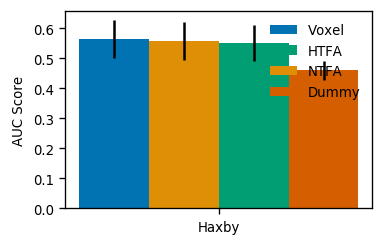

In [104]:
confidence = 0.95
voxel_accuracies = np.mean(voxel_summary_means)
voxel_errs = stats.sem(voxel_summary_means) * stats.t.ppf((1 + confidence) / 2, len(voxel_summary_means) - 1)
htfa_accuracies = np.mean(htfa_summary_means)
htfa_errs = stats.sem(htfa_summary_means) * stats.t.ppf((1 + confidence) / 2, len(htfa_summary_means) - 1)
ntfa_accuracies = np.mean(ntfa_summary_means)
ntfa_errs = stats.sem(ntfa_summary_means) * stats.t.ppf((1 + confidence) / 2, len(ntfa_summary_means) - 1)
dummy_accuracies = np.mean(dummy_summary_means)
dummy_errs = stats.sem(dummy_summary_means) * stats.t.ppf((1 + confidence) / 2, len(dummy_summary_means) - 1)

datasets = ['Haxby'] #, 'Word', 'Rest']

xs = np.arange(len(datasets))

colorblind_cycler = cycler(color=color_palette('colorblind'))
colorblind_colors = [c['color'] for c in colorblind_cycler]
muted_cycler = cycler(color=color_palette('bright'))
muted_colors = [c['color'] for c in muted_cycler]

bar_width = 0.2

fig = pl.figure()
voxel_bar = pl.bar(xs, height=voxel_accuracies, color=colorblind_colors[0], width=bar_width, yerr=voxel_errs)
ntfa_bar = pl.bar(xs + bar_width, height=ntfa_accuracies, color=colorblind_colors[1], width=bar_width, yerr=ntfa_errs)
htfa_bar = pl.bar(xs + 2*bar_width, height=htfa_accuracies, color=colorblind_colors[2], width=bar_width, yerr=htfa_errs)
dummy_bar = pl.bar(xs + 3*bar_width, height=dummy_accuracies, color=colorblind_colors[3], width=bar_width, yerr=dummy_errs)
pl.xticks(xs+1.5*bar_width, datasets)
pl.legend((voxel_bar[0], htfa_bar[0], ntfa_bar[0],dummy_bar[0]), ('Voxel', 'HTFA', 'NTFA','Dummy'))

pl.ylabel('AUC Score')
pl.ylim(bottom=0,)
fig.savefig('affvids_svm_accuracies_ci.pdf')

In [105]:
stats.ttest_ind(ntfa_summary_means,dummy_summary_means)

Ttest_indResult(statistic=2.7606839265322063, pvalue=0.007226623302674149)

In [159]:
### task classification using 3Fold CV on NTFA all tasks###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
#             if i not in validation_blocks:
            block = dtfa._blocks[i]
            if block.subject == s:
                session_labels.append(block.run)
                data.append(all_weights_dtfa[i,:,:].mean(0))
                targets.append(task_labeler(block.task))
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                   session_labels=None, cv=cv,
                                                                   scoring="roc_auc",
                                                                   print_all=True)
    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())
    summary_subject_chance_means.append(np.array(overall_result_chance).mean())

print ('...')
category_result = {key:[] for key in ['negative_music','positive_music','positive_sounds','negative_sounds']}
for c in ['negative_music','positive_music','positive_sounds','negative_sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("NTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("NTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("NTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

print("Overall Dummy Mean/SE Score: %1.4f +- %1.4f" % (
np.array(summary_subject_chance_means).mean(),
stats.sem(summary_subject_chance_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_chance_means) - 1)))

ntfa_summary_result = summary_result
dummy_summary_result = summary_result_chance
ntfa_summary_means = summary_subject_means
dummy_summary_means = summary_subject_chance_means

Processing Subject control01
Processing negative_music
Scores: 0.7500 +- 0.2041
Chance Scores: 0.5417 +- 0.1559
Processing negative_sounds
Scores: 0.2917 +- 0.2125
Chance Scores: 0.2917 +- 0.1179
Processing positive_music
Scores: 0.9583 +- 0.0589
Chance Scores: 0.4167 +- 0.2357
Processing positive_sounds
Scores: 0.5833 +- 0.3118
Chance Scores: 0.2917 +- 0.1179
...
Overall Score: 0.6458 +- 0.3261
Overall Dummy Score: 0.3854 +- 0.1940


Processing Subject control02
Processing negative_music
Scores: 0.7917 +- 0.2125
Chance Scores: 0.3333 +- 0.0589
Processing negative_sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.3750 +- 0.1021
Processing positive_music
Scores: 0.7917 +- 0.1559
Chance Scores: 0.6250 +- 0.2041
Processing positive_sounds
Scores: 0.7500 +- 0.2041
Chance Scores: 0.3750 +- 0.1021
...
Overall Score: 0.8333 +- 0.1932
Overall Dummy Score: 0.4271 +- 0.1727


Processing Subject control03
Processing negative_music
Scores: 0.5833 +- 0.1179
Chance Scores: 0.5417 +- 0.3281
Processing

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.4167 +- 0.4249
Chance Scores: 0.4167 +- 0.2357
Processing positive_music
Scores: 0.3333 +- 0.1179
Chance Scores: 0.5833 +- 0.1559
Processing positive_sounds
Scores: 0.2500 +- 0.2041
Chance Scores: 0.3750 +- 0.1021
...
Overall Score: 0.4792 +- 0.3602
Overall Dummy Score: 0.5833 +- 0.2764


Processing Subject control08
Processing negative_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.7083 +- 0.1559
Processing negative_sounds
Scores: 0.7500 +- 0.2041
Chance Scores: 0.5833 +- 0.2946
Processing positive_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.1768
Processing positive_sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5833 +- 0.3118
...
Overall Score: 0.9375 +- 0.1488
Overall Dummy Score: 0.5938 +- 0.2558


Processing Subject control09
Processing negative_music
Scores: 0.4167 +- 0.3118
Chance Scores: 0.7083 +- 0.1559
Processing negative_sounds
Scores: 0.9167 +- 0.1179
Chance Scores: 0.5417 +- 0.3584
Processing positive_music
Scores: 0.9167 +- 0.1179
Chance Scores:

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.2917 +- 0.2569
Chance Scores: 0.4167 +- 0.2357
...
Overall Score: 0.6771 +- 0.3403
Overall Dummy Score: 0.5000 +- 0.2394


Processing Subject control14
Processing negative_music
Scores: 0.6250 +- 0.3062
Chance Scores: 0.2083 +- 0.0589
Processing negative_sounds
Scores: 0.8750 +- 0.1021
Chance Scores: 0.4167 +- 0.0589
Processing positive_music
Scores: 0.3333 +- 0.1179
Chance Scores: 0.5833 +- 0.1179
Processing positive_sounds
Scores: 0.7500 +- 0.2041
Chance Scores: 0.3750 +- 0.1021
...
Overall Score: 0.6458 +- 0.2834
Overall Dummy Score: 0.3958 +- 0.1600


Processing Subject control15
Processing negative_music
Scores: 0.5833 +- 0.2357
Chance Scores: 0.3750 +- 0.0000
Processing negative_sounds
Scores: 0.6667 +- 0.4714
Chance Scores: 0.3750 +- 0.1021
Processing positive_music
Scores: 0.5000 +- 0.2041
Chance Scores: 0.3750 +- 0.0000
Processing positive_sounds
Scores: 0.6250 +- 0.1021
Chance Scores: 0.4583 +- 0.0589
...
Overall Score: 0.5938 +- 0.2937
Overall Dummy Score: 0.3958 +

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.8750 +- 0.1021
Chance Scores: 0.4583 +- 0.0589
Processing positive_music
Scores: 0.4167 +- 0.4249
Chance Scores: 0.5000 +- 0.2700
Processing positive_sounds
Scores: 0.3750 +- 0.1021
Chance Scores: 0.4583 +- 0.1559
...
Overall Score: 0.6146 +- 0.3246
Overall Dummy Score: 0.5000 +- 0.2104


Processing Subject mdd01
Processing negative_music
Scores: 0.7917 +- 0.1559
Chance Scores: 0.7083 +- 0.2125
Processing negative_sounds
Scores: 0.7500 +- 0.2041
Chance Scores: 0.5000 +- 0.1768
Processing positive_music
Scores: 0.8333 +- 0.1179
Chance Scores: 0.4167 +- 0.1179
Processing positive_sounds
Scores: 0.1667 +- 0.1179
Chance Scores: 0.3750 +- 0.1021
...
Overall Score: 0.6354 +- 0.3123
Overall Dummy Score: 0.5000 +- 0.2041


Processing Subject mdd02
Processing negative_music
Scores: 0.6667 +- 0.3118
Chance Scores: 0.6250 +- 0.1768
Processing negative_sounds
Scores: 0.1667 +- 0.1179
Chance Scores: 0.6667 +- 0.2125
Processing positive_music
Scores: 0.7500 +- 0.2041
Chance Scores: 0.5417 

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.5417 +- 0.2125
Chance Scores: 0.6667 +- 0.2569
Processing negative_sounds
Scores: 0.8333 +- 0.1179
Chance Scores: 0.4167 +- 0.2125
Processing positive_music
Scores: 0.7500 +- 0.0000
Chance Scores: 0.8333 +- 0.1179
Processing positive_sounds
Scores: 0.6250 +- 0.1021
Chance Scores: 0.6250 +- 0.2700
...
Overall Score: 0.6875 +- 0.1731
Overall Dummy Score: 0.6354 +- 0.2674


Processing Subject mdd08
Processing negative_music
Scores: 0.9167 +- 0.1179
Chance Scores: 0.7500 +- 0.2700
Processing negative_sounds
Scores: 0.4167 +- 0.1179
Chance Scores: 0.3750 +- 0.1021
Processing positive_music
Scores: 0.7083 +- 0.3281
Chance Scores: 0.5417 +- 0.1559
Processing positive_sounds
Scores: 0.3333 +- 0.4714
Chance Scores: 0.5417 +- 0.1559
...
Overall Score: 0.5938 +- 0.3789
Overall Dummy Score: 0.5521 +- 0.2251


Processing Subject mdd09
Processing negative_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.7083 +- 0.0589
Processing negative_sounds
Scores: 0.2500 +- 0.2041
Chance Scores: 0.3750

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.5833 +- 0.1179
Chance Scores: 0.5000 +- 0.2041
...
Overall Score: 0.7292 +- 0.2594
Overall Dummy Score: 0.5521 +- 0.2472


Processing Subject mdd14
Processing negative_music
Scores: 0.3333 +- 0.1179
Chance Scores: 0.3333 +- 0.0589
Processing negative_sounds
Scores: 0.7917 +- 0.1559
Chance Scores: 0.5833 +- 0.1179
Processing positive_music
Scores: 0.5000 +- 0.2041
Chance Scores: 0.2500 +- 0.1021
Processing positive_sounds
Scores: 0.6667 +- 0.3118
Chance Scores: 0.4583 +- 0.2946
...
Overall Score: 0.5729 +- 0.2722
Overall Dummy Score: 0.4062 +- 0.2112


Processing Subject mdd15
Processing negative_music
Scores: 0.8333 +- 0.1179
Chance Scores: 0.4583 +- 0.0589
Processing negative_sounds
Scores: 0.7500 +- 0.2041
Chance Scores: 0.2500 +- 0.1021
Processing positive_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.4583 +- 0.1179
Processing positive_sounds
Scores: 0.7500 +- 0.2041
Chance Scores: 0.3750 +- 0.1021
...
Overall Score: 0.7917 +- 0.1998
Overall Dummy Score: 0.3854 +- 0.1297

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

In [160]:
### task classification using 3Fold CV on HTFA all tasks###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
subjects = OrderedSet([b.subject for b in htfa._blocks])
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
#             if i not in validation_blocks:
            block = dtfa._blocks[i]
            if block.subject == s:
                session_labels.append(block.run)
                data.append(all_weights_htfa[i,:,:].mean(0))
                targets.append(block_task_labeler(block))
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                   session_labels=None, cv=cv,
                                                                   scoring="roc_auc",
                                                                   print_all=True)
    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())

print ('...')
category_result = {key:[] for key in ['negative_music','positive_music','positive_sounds','negative_sounds']}
for c in ['negative_music','positive_music','positive_sounds','negative_sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("HTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("HTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("HTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

htfa_summary_result = summary_result
htfa_summary_means = summary_subject_means

Processing Subject control01
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Scores: 0.9583 +- 0.0589
Chance Scores: 0.5000 +- 0.1021
Processing negative_sounds
Scores: 0.3750 +- 0.2700
Chance Scores: 0.3333 +- 0.0589
Processing positive_music
Scores: 0.9167 +- 0.1179
Chance Scores: 0.4583 +- 0.1179
Processing positive_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5000 +- 0.1768
...
Overall Score: 0.7708 +- 0.3012
Overall Dummy Score: 0.4479 +- 0.1394


Processing Subject control02
Processing negative_music
Scores: 0.6667 +- 0.3118
Chance Scores: 0.4167 +- 0.1179
Processing negative_sounds
Scores: 0.9167 +- 0.1179
Chance Scores: 0.7083 +- 0.2569
Processing positive_music
Scores: 0.7083 +- 0.2125
Chance Scores: 0.4583 +- 0.2569
Processing positive_sounds
Scores: 0.5833 +- 0.2357
Chance Scores: 0.5833 +- 0.2125
...
Overall Score: 0.7188 +- 0.2608
Overall Dummy Score: 0.5417 +- 0.2465


Processing Subject control03
Processing negative_music
Scores: 0.7083 +- 0.2125
Chance Scores: 0.4583 +- 0.0589
Processing negative_sounds
Scores: 0.8333 +- 0.1179
Chance Scores

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.5000 +- 0.2041
Chance Scores: 0.5000 +- 0.1768
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.1667 +- 0.2357
Chance Scores: 0.5833 +- 0.3118
...
Overall Score: 0.4896 +- 0.3552
Overall Dummy Score: 0.5208 +- 0.2491


Processing Subject control08
Processing negative_music
Scores: 0.6667 +- 0.1179
Chance Scores: 0.6111 +- 0.2051
Processing negative_sounds
Scores: 0.9167 +- 0.1179
Chance Scores: 0.6667 +- 0.2357
Processing positive_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4861 +- 0.2771
Processing positive_sounds
Scores: 0.9167 +- 0.1179
Chance Scores: 0.4444 +- 0.0982
...
Overall Score: 0.8750 +- 0.1614
Overall Dummy Score: 0.5521 +- 0.2327


Processing Subject control09
Processing negative_music
Scores: 0.7500 +- 0.0000
Chance Scores: 0.2917 +- 0.0589
Processing negative_sounds
Scores: 0.9167 +- 0.1179
Chance Scores: 0.5417 +- 0.2946
Processing positive_music
Scores: 0.8750 +- 0.1021
Chance Scores: 0.6250 +- 0.2700
Processing positive_sounds
Scores: 0.5833 +- 0.2357
Chance Scores: 0.7500 +- 0.1768
...
Overall Score: 0.7812 +- 0.1918
Overall Dummy Score: 0.5521 +

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.4583 +- 0.1559
Chance Scores: 0.5000 +- 0.2041
Processing positive_music
Scores: 0.4167 +- 0.1179
Chance Scores: 0.3750 +- 0.0000
Processing positive_sounds
Scores: 0.8750 +- 0.1768
Chance Scores: 0.3750 +- 0.1021
...
Overall Score: 0.6042 +- 0.2543
Overall Dummy Score: 0.4479 +- 0.2251


Processing Subject control15
Processing negative_music
Scores: 0.5833 +- 0.1179
Chance Scores: 0.4167 +- 0.0589
Processing negative_sounds
Scores: 0.7917 +- 0.2946
Chance Scores: 0.3750 +- 0.1021
Processing positive_music
Scores: 0.0833 +- 0.1179
Chance Scores: 0.4583 +- 0.0589
Processing positive_sounds
Scores: 0.8750 +- 0.1768
Chance Scores: 0.5000 +- 0.2041
...
Overall Score: 0.5833 +- 0.3620
Overall Dummy Score: 0.4375 +- 0.1301


Processing Subject control16
Processing negative_music
Scores: 0.8750 +- 0.1021
Chance Scores: 0.7083 +- 0.2125
Processing negative_sounds
Scores: 0.8333 +- 0.1179
Chance Scores: 0.2917 +- 0.0589
Processing positive_music
Scores: 0.5000 +- 0.4082
Chance Scores:

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk


Overall Dummy Score: 0.4479 +- 0.2575


Processing Subject mdd01
Processing negative_music
Scores: 0.6667 +- 0.1179
Chance Scores: 0.7083 +- 0.2569
Processing negative_sounds
Scores: 0.6667 +- 0.3118
Chance Scores: 0.2917 +- 0.1559
Processing positive_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.3333 +- 0.1559
Processing positive_sounds
Scores: 0.1667 +- 0.1179
Chance Scores: 0.4583 +- 0.1179
...
Overall Score: 0.6250 +- 0.3461
Overall Dummy Score: 0.4479 +- 0.2418


Processing Subject mdd02
Processing negative_music
Scores: 0.6667 +- 0.4714
Chance Scores: 0.5833 +- 0.3118
Processing negative_sounds
Scores: 0.4167 +- 0.2357
Chance Scores: 0.3333 +- 0.0589
Processing positive_music
Scores: 0.7917 +- 0.2946
Chance Scores: 0.5833 +- 0.2357
Processing positive_sounds
Scores: 0.7083 +- 0.0589
Chance Scores: 0.4167 +- 0.0589
...
Overall Score: 0.6458 +- 0.3340
Overall Dummy Score: 0.4792 +- 0.2273


Processing Subject mdd03
Processing negative_music
Scores: 0.1944 +- 0.1416
Chance Scores

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.7083 +- 0.0589
Chance Scores: 0.4583 +- 0.3118
Processing positive_sounds
Scores: 0.4167 +- 0.3118
Chance Scores: 0.4583 +- 0.1559
...
Overall Score: 0.5833 +- 0.2062
Overall Dummy Score: 0.4583 +- 0.1932


Processing Subject mdd08
Processing negative_music
Scores: 0.8750 +- 0.1021
Chance Scores: 0.3333 +- 0.0589
Processing negative_sounds
Scores: 0.5417 +- 0.2569
Chance Scores: 0.5833 +- 0.2125
Processing positive_music
Scores: 0.8333 +- 0.1179
Chance Scores: 0.7083 +- 0.1559
Processing positive_sounds
Scores: 0.3333 +- 0.4714
Chance Scores: 0.5000 +- 0.2041
...
Overall Score: 0.6458 +- 0.3566
Overall Dummy Score: 0.5312 +- 0.2173


Processing Subject mdd09
Processing negative_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.2041
Processing negative_sounds
Scores: 0.2917 +- 0.3281
Chance Scores: 0.2917 +- 0.1179
Processing positive_music
Scores: 0.7500 +- 0.2041
Chance Scores: 0.4583 +- 0.2125
Processing positive_sounds
Scores: 0.8333 +- 0.1179
Chance Scores: 0.5417

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.6250 +- 0.1021
Chance Scores: 0.5833 +- 0.3118
Processing positive_music
Scores: 0.6667 +- 0.1179
Chance Scores: 0.4583 +- 0.2569
Processing positive_sounds
Scores: 0.5833 +- 0.2357
Chance Scores: 0.5833 +- 0.1559
...
Overall Score: 0.5625 +- 0.1875
Overall Dummy Score: 0.5104 +- 0.2308


Processing Subject mdd15
Processing negative_music
Scores: 0.5833 +- 0.3118
Chance Scores: 0.4167 +- 0.0589
Processing negative_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.4167 +- 0.0589
Processing positive_music
Scores: 0.7917 +- 0.2125
Chance Scores: 0.4167 +- 0.0589
Processing positive_sounds
Scores: 0.6667 +- 0.1179
Chance Scores: 0.4583 +- 0.2125
...
Overall Score: 0.6354 +- 0.3039
Overall Dummy Score: 0.4271 +- 0.1192


Processing Subject mdd16
Processing negative_music
Scores: 0.9583 +- 0.0589
Chance Scores: 0.7500 +- 0.2041
Processing negative_sounds
Scores: 0.6250 +- 0.3062
Chance Scores: 0.4583 +- 0.0589
Processing positive_music
Scores: 0.4167 +- 0.2357
Chance Scores: 0.3750 

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

In [161]:
### task classification using 3Fold CV on input data all tasks###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
#             if i not in validation_blocks:
            if block.subject == s:
                session_labels.append(block.run)
                data.append(dtfa.voxel_activations[i].data.numpy().mean(0))
                targets.append(task_labeler(block.task))
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                 session_labels=None,
                                                                    cv=cv,
                                                                   scoring="roc_auc",
                                                                   feature_select=True,
                                                                   print_all=True)

    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())

print ('...')
category_result = {key:[] for key in ['negative_music','positive_music','positive_sounds','negative_sounds']}
for c in ['negative_music','positive_music','positive_sounds','negative_sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("Voxel Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("Voxel Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("Voxel Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

voxel_summary_result = summary_result
voxel_summary_means = summary_subject_means

Processing Subject control01
Processing negative_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.7500 +- 0.2041
Chance Scores: 0.4583 +- 0.0589
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.5000 +- 0.4082
Chance Scores: 0.6667 +- 0.2569
Processing positive_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.6250 +- 0.2700
Chance Scores: 0.5000 +- 0.2041
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.7083 +- 0.2569
Chance Scores: 0.3750 +- 0.2041
...
Overall Score: 0.6458 +- 0.3097
Overall Dummy Score: 0.5000 +- 0.2224


Processing Subject control02
Processing negative_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.7083 +- 0.1559
Chance Scores: 0.3333 +- 0.0589
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.9583 +- 0.0589
Chance Scores: 0.3750 +- 0.1021
Processing positive_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.9167 +- 0.1179
Chance Scores: 0.5000 +- 0.1021
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.3333 +- 0.1179
Chance Scores: 0.3750 +- 0.1021
...
Overall Score: 0.7292 +- 0.2740
Overall Dummy Score: 0.3958 +- 0.1122


Processing Subject control03
Processing negative_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.2083 +- 0.2125
Chance Scores: 0.5833 +- 0.3118
Processing negative_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.8750 +- 0.1021
Chance Scores: 0.4583 +- 0.0589
Processing positive_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.6667 +- 0.2357
Chance Scores: 0.4167 +- 0.2569
Processing positive_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.2917 +- 0.2125
Chance Scores: 0.6667 +- 0.2125
...
Overall Score: 0.5104 +- 0.3364
Overall Dummy Score: 0.5312 +- 0.2507


Processing Subject control04
Processing negative_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.8750 +- 0.1768
Chance Scores: 0.5833 +- 0.2125
Processing negative_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.8750 +- 0.1021
Chance Scores: 0.3333 +- 0.0589
Processing positive_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.5417 +- 0.1559
Chance Scores: 0.5833 +- 0.2125
Processing positive_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.5833 +- 0.1179
Chance Scores: 0.5417 +- 0.1559
...
Overall Score: 0.7188 +- 0.2112
Overall Dummy Score: 0.5104 +- 0.2006


Processing Subject control05
Processing negative_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.7500 +- 0.2041
Chance Scores: 0.7917 +- 0.2125
Processing negative_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.6250 +- 0.3062
Chance Scores: 0.4167 +- 0.0589
Processing positive_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.4167 +- 0.0589
Processing positive_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.6667 +- 0.1179
Chance Scores: 0.3750 +- 0.1021
...
Overall Score: 0.7188 +- 0.2400
Overall Dummy Score: 0.5000 +- 0.2104


Processing Subject control06


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Processing negative_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.5000 +- 0.4082
Chance Scores: 0.2917 +- 0.0589
Processing negative_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.7917 +- 0.1559
Chance Scores: 0.3750 +- 0.1021
Processing positive_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.6667 +- 0.2357
Chance Scores: 0.6250 +- 0.3062
Processing positive_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.3750 +- 0.1021
...
Overall Score: 0.6979 +- 0.3039
Overall Dummy Score: 0.4167 +- 0.2125


Processing Subject control07
Processing negative_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.8750 +- 0.1021
Chance Scores: 0.5833 +- 0.3118
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.5000 +- 0.3536
Chance Scores: 0.6667 +- 0.2357
Processing positive_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.3750 +- 0.1768
Chance Scores: 0.4167 +- 0.3118
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.5000 +- 0.2041
Chance Scores: 0.5417 +- 0.0589
...
Overall Score: 0.5625 +- 0.2954
Overall Dummy Score: 0.5521 +- 0.2674


Processing Subject control08


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Processing negative_music
TRAIN: [ 0  1  3  5  6  7 10 11 12 14] TEST: [ 2  4  8  9 13]
TRAIN: [ 1  2  4  5  6  7  8  9 10 13] TEST: [ 0  3 11 12 14]
TRAIN: [ 0  2  3  4  8  9 11 12 13 14] TEST: [ 1  5  6  7 10]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4167 +- 0.0589
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  9 10 11 13 14] TEST: [ 2  5  6  8 12]
TRAIN: [ 0  1  2  3  5  6  7  8 12 13] TEST: [ 4  9 10 11 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 2  4  5  6  8  9 10 11 12 14] TEST: [ 0  1  3  7 13]
Scores: 0.8333 +- 0.1179
Chance Scores: 0.5000 +- 0.2700
Processing positive_music
TRAIN: [ 1  2  3  6  7  8 11 12 13 14] TEST: [ 0  4  5  9 10]
TRAIN: [ 0  2  3  4  5  6  9 10 13 14] TEST: [ 1  7  8 11 12]
TRAIN: [ 0  1  4  5  7  8  9 10 11 12] TEST: [ 2  3  6 13 14]
Scores: 0.8611 +- 0.1039
Chance Scores: 0.5417 +- 0.2569
Processing positive_sounds
TRAIN: [ 0  2  3  6  7  8  9 11 13 14] TEST: [ 1  4  5 10 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 1  2  3  4  5  6  9 10 12 14] TEST: [ 0  7  8 11 13]
TRAIN: [ 0  1  4  5  7  8 10 11 12 13] TEST: [ 2  3  6  9 14]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.2361 +- 0.0856
...
Overall Score: 0.8819 +- 0.1576
Overall Dummy Score: 0.4236 +- 0.2262


Processing Subject control09
Processing negative_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.5833 +- 0.1179
Chance Scores: 0.3333 +- 0.0589
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.2917 +- 0.0589
Processing positive_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.4167 +- 0.2357
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.5833 +- 0.1179
Chance Scores: 0.2500 +- 0.1021
...
Overall Score: 0.7500 +- 0.2282
Overall Dummy Score: 0.3229 +- 0.1484


Processing Subject control10
Processing negative_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.7083 +- 0.2125
Chance Scores: 0.6667 +- 0.2357
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.8333 +- 0.1179
Chance Scores: 0.7917 +- 0.2125
Processing positive_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.5833 +- 0.1179
Chance Scores: 0.4167 +- 0.0589
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.2500 +- 0.2041
Chance Scores: 0.7500 +- 0.2700
...
Overall Score: 0.5938 +- 0.2754
Overall Dummy Score: 0.6562 +- 0.2558


Processing Subject control11
Processing negative_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.3750 +- 0.1021
Chance Scores: 0.5417 +- 0.2357
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.9167 +- 0.1179
Chance Scores: 0.5000 +- 0.1021
Processing positive_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.5417 +- 0.0589
Chance Scores: 0.3750 +- 0.0000
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4583 +- 0.0589
...
Overall Score: 0.7083 +- 0.2716
Overall Dummy Score: 0.4688 +- 0.1455


Processing Subject control12
Processing negative_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Scores: 0.5833 +- 0.3118
Chance Scores: 0.2500 +- 0.0000
Processing negative_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.7917 +- 0.1559
Chance Scores: 0.7500 +- 0.2041
Processing positive_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.8750 +- 0.1021
Chance Scores: 0.4167 +- 0.1559
Processing positive_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.7917 +- 0.1559
Chance Scores: 0.5417 +- 0.1559
...
Overall Score: 0.7604 +- 0.2251
Overall Dummy Score: 0.4896 +- 0.2364


Processing Subject control13


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Processing negative_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.7917 +- 0.1559
Chance Scores: 0.5417 +- 0.3281
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.4583 +- 0.2569
Chance Scores: 0.4583 +- 0.0589
Processing positive_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.8750 +- 0.1021
Chance Scores: 0.5417 +- 0.2357
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.2500 +- 0.2041
Chance Scores: 0.4583 +- 0.0589
...
Overall Score: 0.5938 +- 0.3151
Overall Dummy Score: 0.5000 +- 0.2104


Processing Subject control14
Processing negative_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.7083 +- 0.2125
Chance Scores: 0.5833 +- 0.2125
Processing negative_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.6667 +- 0.3118
Chance Scores: 0.5000 +- 0.0000
Processing positive_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.3333 +- 0.1179
Chance Scores: 0.5833 +- 0.1179
Processing positive_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.8333 +- 0.1179
Chance Scores: 0.4167 +- 0.0589
...
Overall Score: 0.6354 +- 0.2770
Overall Dummy Score: 0.5208 +- 0.1428


Processing Subject control15
Processing negative_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Scores: 0.5833 +- 0.2357
Chance Scores: 0.7500 +- 0.3536
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.8750 +- 0.1768
Chance Scores: 0.6250 +- 0.2041
Processing positive_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.5833 +- 0.3118
Chance Scores: 0.5417 +- 0.2946
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.9167 +- 0.1179
Chance Scores: 0.7083 +- 0.0589
...
Overall Score: 0.7396 +- 0.2722
Overall Dummy Score: 0.6562 +- 0.2658


Processing Subject control16


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Processing negative_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.8750 +- 0.1768
Chance Scores: 0.5833 +- 0.1559
Processing negative_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.7917 +- 0.2125
Chance Scores: 0.4167 +- 0.2569
Processing positive_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.3750 +- 0.1768
Chance Scores: 0.5000 +- 0.2700
Processing positive_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.5833 +- 0.3118
Chance Scores: 0.4583 +- 0.1179
...
Overall Score: 0.6562 +- 0.2981
Overall Dummy Score: 0.4896 +- 0.2192


Processing Subject control17
Processing negative_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.6667 +- 0.3118
Chance Scores: 0.7083 +- 0.1559
Processing negative_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.4167 +- 0.3118
Chance Scores: 0.6250 +- 0.2700
Processing positive_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.8333 +- 0.1179
Chance Scores: 0.3333 +- 0.0589
Processing positive_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.6250 +- 0.1021
Chance Scores: 0.5000 +- 0.2700
...
Overall Score: 0.6354 +- 0.2770
Overall Dummy Score: 0.5417 +- 0.2517


Processing Subject control18
Processing negative_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.7083 +- 0.2125
Chance Scores: 0.4583 +- 0.0589
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.7500 +- 0.2041
Chance Scores: 0.5417 +- 0.3584
Processing positive_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.8333 +- 0.1179
Chance Scores: 0.2500 +- 0.1021
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.7500 +- 0.2041
Chance Scores: 0.3750 +- 0.1021
...
Overall Score: 0.7604 +- 0.1940
Overall Dummy Score: 0.4062 +- 0.2232


Processing Subject control19
Processing negative_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.9167 +- 0.1179
Chance Scores: 0.3333 +- 0.1559
Processing negative_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.8750 +- 0.1021
Chance Scores: 0.5833 +- 0.2946
Processing positive_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.5417 +- 0.3584
Chance Scores: 0.4167 +- 0.0589
Processing positive_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.9167 +- 0.1179
Chance Scores: 0.5833 +- 0.2125
...
Overall Score: 0.8125 +- 0.2577
Overall Dummy Score: 0.4792 +- 0.2273


Processing Subject control20
Processing negative_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.8750 +- 0.1768
Chance Scores: 0.5833 +- 0.1179
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Scores: 0.9167 +- 0.1179
Chance Scores: 0.5417 +- 0.1559
Processing positive_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.5000 +- 0.3536
Chance Scores: 0.3750 +- 0.2041
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.5833 +- 0.1179
Chance Scores: 0.5833 +- 0.2125
...
Overall Score: 0.7188 +- 0.2801
Overall Dummy Score: 0.5208 +- 0.1965


Processing Subject mdd01
Processing negative_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Scores: 0.6667 +- 0.3118
Chance Scores: 0.6667 +- 0.1559
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.7500 +- 0.2041
Chance Scores: 0.4167 +- 0.1179
Processing positive_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.8333 +- 0.1179
Chance Scores: 0.4583 +- 0.0589
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.0000 +- 0.0000
Chance Scores: 0.3750 +- 0.3062
...
Overall Score: 0.5625 +- 0.3836
Overall Dummy Score: 0.4792 +- 0.2155


Processing Subject mdd02
Processing negative_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.6667 +- 0.2357
Chance Scores: 0.4167 +- 0.2569
Processing negative_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.2500 +- 0.0000
Chance Scores: 0.5833 +- 0.2125
Processing positive_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.6250 +- 0.2700
Processing positive_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.7917 +- 0.1559
Chance Scores: 0.6250 +- 0.1768
...
Overall Score: 0.6354 +- 0.2952
Overall Dummy Score: 0.5625 +- 0.2474


Processing Subject mdd03
Processing negative_music
TRAIN: [ 1  2  3  6  7  8 11 12 13 14] TEST: [ 0  4  5  9 10]
TRAIN: [ 0  2  3  4  5  6  9 10 13 14] TEST: [ 1  7  8 11 12]
TRAIN: [ 0  1  4  5  7  8  9 10 11 12] TEST: [ 2  3  6 13 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.1111 +- 0.1571
Chance Scores: 0.4028 +- 0.0708
Processing negative_sounds
TRAIN: [ 0  2  3  6  7  8  9 11 13 14] TEST: [ 1  4  5 10 12]
TRAIN: [ 1  2  3  4  5  6  9 10 12 14] TEST: [ 0  7  8 11 13]
TRAIN: [ 0  1  4  5  7  8 10 11 12 13] TEST: [ 2  3  6  9 14]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5139 +- 0.2893
Processing positive_music
TRAIN: [ 0  1  3  5  6  7 10 11 12 14] TEST: [ 2  4  8  9 13]
TRAIN: [ 1  2  4  5  6  7  8  9 10 13] TEST: [ 0  3 11 12 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  2  3  4  8  9 11 12 13 14] TEST: [ 1  5  6  7 10]
Scores: 0.5000 +- 0.4082
Chance Scores: 0.3194 +- 0.0520
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  9 10 11 13 14] TEST: [ 2  5  6  8 12]
TRAIN: [ 0  1  2  3  5  6  7  8 12 13] TEST: [ 4  9 10 11 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 14] TEST: [ 0  1  3  7 13]
Scores: 0.3333 +- 0.3118
Chance Scores: 0.4583 +- 0.0589
...
Overall Score: 0.4861 +- 0.4233
Overall Dummy Score: 0.4236 +- 0.1700


Processing Subject mdd04
Processing negative_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.8750 +- 0.1768
Chance Scores: 0.5000 +- 0.2700
Processing negative_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.6250 +- 0.1021
Chance Scores: 0.4167 +- 0.0589
Processing positive_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.6667 +- 0.1179
Chance Scores: 0.3750 +- 0.1021
Processing positive_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.8333 +- 0.1179
Chance Scores: 0.4583 +- 0.1179
...
Overall Score: 0.7500 +- 0.1693
Overall Dummy Score: 0.4375 +- 0.1654


Skipping Subject, not enough runs
Processing negative_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.8750 +- 0.1768
Chance Scores: 0.5417 +- 0.2569
Processing negative_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.6250 +- 0.1021
Chance Scores: 0.5000 +- 0.1021
Processing positive_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Scores: 0.6667 +- 0.1179
Chance Scores: 0.3333 +- 0.0589
Processing positive_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.8333 +- 0.1179
Chance Scores: 0.5417 +- 0.3118
...
Overall Score: 0.7500 +- 0.1693
Overall Dummy Score: 0.4792 +- 0.2273


Processing Subject mdd06
Processing negative_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.6667 +- 0.3118
Chance Scores: 0.6667 +- 0.3864
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.3333 +- 0.3118
Chance Scores: 0.4167 +- 0.0589
Processing positive_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.6667 +- 0.3118
Chance Scores: 0.4167 +- 0.0589
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.9583 +- 0.0589
Chance Scores: 0.3333 +- 0.0589
...
Overall Score: 0.6562 +- 0.3503
Overall Dummy Score: 0.4583 +- 0.2357


Processing Subject mdd07
Processing negative_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.5000 +- 0.2041
Chance Scores: 0.7083 +- 0.2357
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.7917 +- 0.1559
Chance Scores: 0.4583 +- 0.2125
Processing positive_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.4583 +- 0.1559
Chance Scores: 0.3750 +- 0.0000
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.5833 +- 0.3118
Chance Scores: 0.5833 +- 0.2569
...
Overall Score: 0.5833 +- 0.2517
Overall Dummy Score: 0.5312 +- 0.2400


Processing Subject mdd08
Processing negative_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Scores: 0.8333 +- 0.1179
Chance Scores: 0.4167 +- 0.2357
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.5417 +- 0.3281
Chance Scores: 0.8333 +- 0.0589
Processing positive_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.7083 +- 0.3281
Chance Scores: 0.6250 +- 0.2700
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.4167 +- 0.3118
Chance Scores: 0.3333 +- 0.1559
...
Overall Score: 0.6250 +- 0.3268
Overall Dummy Score: 0.5521 +- 0.2770


Processing Subject mdd09


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Processing negative_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.8333 +- 0.2357
Processing negative_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.5833 +- 0.1179
Chance Scores: 0.5000 +- 0.1021
Processing positive_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.7917 +- 0.1559
Chance Scores: 0.2917 +- 0.0589
Processing positive_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.9167 +- 0.1179
Chance Scores: 0.7500 +- 0.1768
...
Overall Score: 0.8229 +- 0.1940
Overall Dummy Score: 0.5938 +- 0.2658


Processing Subject mdd10
Processing negative_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4583 +- 0.1559
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.8750 +- 0.1768
Chance Scores: 0.7500 +- 0.1021
Processing positive_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.8333 +- 0.2357
Chance Scores: 0.7917 +- 0.2125
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.5417 +- 0.0589
Chance Scores: 0.4583 +- 0.2125
...
Overall Score: 0.8125 +- 0.2253
Overall Dummy Score: 0.6146 +- 0.2364


Processing Subject mdd11
Processing negative_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.6667 +- 0.1179
Chance Scores: 0.5833 +- 0.2125
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.6667 +- 0.1179
Chance Scores: 0.4167 +- 0.0589
Processing positive_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.7917 +- 0.2125
Chance Scores: 0.5000 +- 0.2700
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.8333 +- 0.1179
Chance Scores: 0.6667 +- 0.2357
...
Overall Score: 0.7396 +- 0.1650
Overall Dummy Score: 0.5417 +- 0.2301


Processing Subject mdd12
Processing negative_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.8333 +- 0.2357
Chance Scores: 0.4583 +- 0.0589
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.4583 +- 0.0589
Chance Scores: 0.7083 +- 0.1559
Processing positive_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.6667 +- 0.1179
Chance Scores: 0.5417 +- 0.1559
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.7917 +- 0.1559
Chance Scores: 0.5000 +- 0.1768
...
Overall Score: 0.6875 +- 0.2135
Overall Dummy Score: 0.5521 +- 0.1727


Processing Subject mdd13
Processing negative_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.6667 +- 0.3118
Chance Scores: 0.6667 +- 0.2125
Processing negative_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.9167 +- 0.1179
Chance Scores: 0.3750 +- 0.1021
Processing positive_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.5000 +- 0.2041
Chance Scores: 0.4167 +- 0.0589
Processing positive_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.6667 +- 0.1179
Chance Scores: 0.4167 +- 0.0589
...
Overall Score: 0.6875 +- 0.2526
Overall Dummy Score: 0.4688 +- 0.1702


Processing Subject mdd14
Processing negative_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.6667 +- 0.3118
Chance Scores: 0.6250 +- 0.1768
Processing negative_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.7500 +- 0.2041
Chance Scores: 0.3333 +- 0.0589
Processing positive_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.7083 +- 0.2125
Chance Scores: 0.6250 +- 0.2700
Processing positive_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.5833 +- 0.1179
Chance Scores: 0.4167 +- 0.0589
...
Overall Score: 0.6771 +- 0.2308
Overall Dummy Score: 0.5000 +- 0.2104


Processing Subject mdd15
Processing negative_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Scores: 1.0000 +- 0.0000
Chance Scores: 0.4167 +- 0.2569
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.6667 +- 0.3118
Chance Scores: 0.5000 +- 0.0000
Processing positive_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.5833 +- 0.3118
Chance Scores: 0.7500 +- 0.0000
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.6667 +- 0.1179
Chance Scores: 0.4583 +- 0.0589
...
Overall Score: 0.7292 +- 0.2787
Overall Dummy Score: 0.5312 +- 0.1849


Processing Subject mdd16


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Processing negative_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.3333 +- 0.1179
Processing negative_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.5417 +- 0.3281
Chance Scores: 0.4167 +- 0.1179
Processing positive_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.5000 +- 0.2041
Chance Scores: 0.4167 +- 0.0589
Processing positive_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.3750 +- 0.1021
Chance Scores: 0.7083 +- 0.2569
...
Overall Score: 0.6042 +- 0.3097
Overall Dummy Score: 0.4688 +- 0.2112


Processing Subject mdd17
Processing negative_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.2917 +- 0.1179
Processing negative_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.5000 +- 0.3536
Chance Scores: 0.5417 +- 0.1559
Processing positive_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.6667 +- 0.2357
Chance Scores: 0.4167 +- 0.2357
Processing positive_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.8333 +- 0.1179
Chance Scores: 0.4583 +- 0.0589
...
Overall Score: 0.7500 +- 0.2887
Overall Dummy Score: 0.4271 +- 0.1801


Processing Subject mdd18
Processing negative_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5833 +- 0.2125
Processing negative_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4583 +- 0.2125
Processing positive_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.7500 +- 0.0000
Chance Scores: 0.5833 +- 0.2125
Processing positive_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.9167 +- 0.1179
Chance Scores: 0.2917 +- 0.2125
...
Overall Score: 0.8750 +- 0.1614
Overall Dummy Score: 0.4792 +- 0.2438


Processing Subject mdd19
Processing negative_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.8333 +- 0.1179
Chance Scores: 0.4167 +- 0.1559
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.5417 +- 0.1559
Chance Scores: 0.5000 +- 0.3536
Processing positive_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.5417 +- 0.2946
Chance Scores: 0.4583 +- 0.3118
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.9167 +- 0.1179
Chance Scores: 0.5000 +- 0.2700
...
Overall Score: 0.7083 +- 0.2517
Overall Dummy Score: 0.4688 +- 0.2847


...
Voxel Summary Score Across Subjects, For Category negative_music : 0.7368 +- 0.2875
Voxel Summary Score Across Subjects, For Category positive_music : 0.6631 +- 0.2670
Voxel Summary Score Across Subjects, For Category positive_sounds : 0.6571 +- 0.2897
Voxel Summary Score Across Subjects, For Category neg

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

In [162]:
### task classification using 3Fold CV on input data all tasks###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
feature_selection = SelectKBest(f_classif, k=500)

for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
#             if i not in validation_blocks:
            if block.subject == s:
                session_labels.append(block.run)
                data.append(dtfa.voxel_activations[i].data.numpy().mean(0))
                targets.append(task_labeler(block.task))
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                 session_labels=None,
                                                                    cv=cv,
                                                                   scoring="roc_auc",
                                                                   feature_select=True,
                                                                   feature_selection=feature_selection,
                                                                   print_all=True)

    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())

print ('...')
category_result = {key:[] for key in ['negative_music','positive_music','positive_sounds','negative_sounds']}
for c in ['negative_music','positive_music','positive_sounds','negative_sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("Voxel Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("Voxel Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("Voxel Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

voxel_summary_result = summary_result
voxel_summary_means = summary_subject_means

Processing Subject control01
Processing negative_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.7500 +- 0.2041
Chance Scores: 0.4583 +- 0.2946
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.4167 +- 0.4249
Chance Scores: 0.3333 +- 0.0589
Processing positive_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.5833 +- 0.2357
Chance Scores: 0.7917 +- 0.1179
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.7917 +- 0.2946
Chance Scores: 0.3750 +- 0.1768
...
Overall Score: 0.6354 +- 0.3364
Overall Dummy Score: 0.4896 +- 0.2575


Processing Subject control02
Processing negative_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.6250 +- 0.2700
Chance Scores: 0.6250 +- 0.2041
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.9167 +- 0.1179
Chance Scores: 0.5833 +- 0.2125
Processing positive_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.9167 +- 0.1179
Chance Scores: 0.2917 +- 0.1559
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.5417 +- 0.0589
Chance Scores: 0.6667 +- 0.2357
...
Overall Score: 0.7500 +- 0.2339
Overall Dummy Score: 0.5417 +- 0.2517


Processing Subject control03
Processing negative_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.1250 +- 0.1021
Chance Scores: 0.7083 +- 0.1559
Processing negative_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.5417 +- 0.2946
Chance Scores: 0.5000 +- 0.2041
Processing positive_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.7083 +- 0.2125
Chance Scores: 0.6250 +- 0.1021
Processing positive_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.2917 +- 0.2125
Chance Scores: 0.6250 +- 0.2700
...
Overall Score: 0.4167 +- 0.3118
Overall Dummy Score: 0.6146 +- 0.2070


Processing Subject control04


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Processing negative_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.7917 +- 0.1559
Chance Scores: 0.4583 +- 0.3118
Processing negative_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.7917 +- 0.1559
Chance Scores: 0.4583 +- 0.0589
Processing positive_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.6667 +- 0.1179
Chance Scores: 0.5000 +- 0.2041
Processing positive_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.6667 +- 0.1179
Chance Scores: 0.2917 +- 0.0589
...
Overall Score: 0.7292 +- 0.1517
Overall Dummy Score: 0.4271 +- 0.2070


Processing Subject control05
Processing negative_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.7083 +- 0.2569
Chance Scores: 0.5417 +- 0.1559
Processing negative_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.5417 +- 0.3281
Chance Scores: 0.3750 +- 0.1021
Processing positive_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5417 +- 0.2569
Processing positive_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Scores: 0.6250 +- 0.1021
Chance Scores: 0.4583 +- 0.0589
...
Overall Score: 0.6771 +- 0.2674
Overall Dummy Score: 0.4792 +- 0.1755


Processing Subject control06
Processing negative_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.5000 +- 0.4082
Chance Scores: 0.4167 +- 0.1179
Processing negative_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.7917 +- 0.1559
Chance Scores: 0.5000 +- 0.2700
Processing positive_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.6667 +- 0.2357
Chance Scores: 0.4583 +- 0.1179
Processing positive_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5417 +- 0.3281
...
Overall Score: 0.6979 +- 0.3039
Overall Dummy Score: 0.4792 +- 0.2329


Processing Subject control07
Processing negative_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.7917 +- 0.1559
Chance Scores: 0.5417 +- 0.0589
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.4167 +- 0.4249
Chance Scores: 0.7083 +- 0.3281
Processing positive_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.5833 +- 0.1179
Chance Scores: 0.5000 +- 0.2041
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.5000 +- 0.2041
Chance Scores: 0.5833 +- 0.2125
...
Overall Score: 0.5729 +- 0.2907
Overall Dummy Score: 0.5833 +- 0.2357


Processing Subject control08
Processing negative_music
TRAIN: [ 0  1  3  5  6  7 10 11 12 14] TEST: [ 2  4  8  9 13]
TRAIN: [ 1  2  4  5  6  7  8  9 10 13] TEST: [ 0  3 11 12 14]
TRAIN: [ 0  2  3  4  8  9 11 12 13 14] TEST: [ 1  5  6  7 10]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5833 +- 0.1179
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  9 10 11 13 14] TEST: [ 2  5  6  8 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  6  7  8 12 13] TEST: [ 4  9 10 11 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 14] TEST: [ 0  1  3  7 13]
Scores: 0.8333 +- 0.1179
Chance Scores: 0.7917 +- 0.2946
Processing positive_music
TRAIN: [ 1  2  3  6  7  8 11 12 13 14] TEST: [ 0  4  5  9 10]
TRAIN: [ 0  2  3  4  5  6  9 10 13 14] TEST: [ 1  7  8 11 12]
TRAIN: [ 0  1  4  5  7  8  9 10 11 12] TEST: [ 2  3  6 13 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.8611 +- 0.1039
Chance Scores: 0.5417 +- 0.1559
Processing positive_sounds
TRAIN: [ 0  2  3  6  7  8  9 11 13 14] TEST: [ 1  4  5 10 12]
TRAIN: [ 1  2  3  4  5  6  9 10 12 14] TEST: [ 0  7  8 11 13]
TRAIN: [ 0  1  4  5  7  8 10 11 12 13] TEST: [ 2  3  6  9 14]
Scores: 0.7500 +- 0.2041
Chance Scores: 0.7917 +- 0.0589
...
Overall Score: 0.8611 +- 0.1571
Overall Dummy Score: 0.6771 +- 0.2132


Processing Subject control09
Processing negative_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.5833 +- 0.1179
Chance Scores: 0.6667 +- 0.2569
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.9583 +- 0.0589
Chance Scores: 0.3750 +- 0.1768
Processing positive_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.7083 +- 0.2125
Chance Scores: 0.5833 +- 0.2946
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.5000 +- 0.0000
Chance Scores: 0.5000 +- 0.1768
...
Overall Score: 0.6875 +- 0.2135
Overall Dummy Score: 0.5312 +- 0.2558


Processing Subject control10
Processing negative_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.6250 +- 0.3062
Chance Scores: 0.6250 +- 0.1768
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.8750 +- 0.1021
Chance Scores: 0.8333 +- 0.1179
Processing positive_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.3750 +- 0.1021
Chance Scores: 0.3750 +- 0.1021
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.1667 +- 0.1179
Chance Scores: 0.5417 +- 0.1559
...
Overall Score: 0.5104 +- 0.3206
Overall Dummy Score: 0.5938 +- 0.2173


Processing Subject control11
Processing negative_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.4583 +- 0.2125
Chance Scores: 0.5000 +- 0.2700
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.8750 +- 0.1768
Chance Scores: 0.5417 +- 0.2946
Processing positive_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.5417 +- 0.1559
Chance Scores: 0.4583 +- 0.2946
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5417 +- 0.1559
...
Overall Score: 0.7188 +- 0.2754
Overall Dummy Score: 0.5104 +- 0.2625


Processing Subject control12
Processing negative_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.8333 +- 0.1179
Chance Scores: 0.5000 +- 0.0000
Processing negative_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.6667 +- 0.2357
Chance Scores: 0.5417 +- 0.1559
Processing positive_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.8750 +- 0.1021
Chance Scores: 0.5417 +- 0.1559
Processing positive_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.9167 +- 0.1179
Chance Scores: 0.4583 +- 0.1179
...
Overall Score: 0.8229 +- 0.1801
Overall Dummy Score: 0.5104 +- 0.1297


Processing Subject control13
Processing negative_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Scores: 0.7083 +- 0.2569
Chance Scores: 0.5000 +- 0.1768
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.6667 +- 0.3118
Chance Scores: 0.4583 +- 0.2125
Processing positive_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.9167 +- 0.1179
Chance Scores: 0.5417 +- 0.3584
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.2917 +- 0.2569
Chance Scores: 0.7500 +- 0.2041
...
Overall Score: 0.6458 +- 0.3340
Overall Dummy Score: 0.5625 +- 0.2724


Processing Subject control14


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Processing negative_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.5833 +- 0.3118
Chance Scores: 0.3333 +- 0.1179
Processing negative_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.6667 +- 0.3118
Chance Scores: 0.6667 +- 0.2569
Processing positive_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.3333 +- 0.1179
Chance Scores: 0.4167 +- 0.1179
Processing positive_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.8333 +- 0.1179
Chance Scores: 0.4583 +- 0.2125
...
Overall Score: 0.6042 +- 0.2968
Overall Dummy Score: 0.4688 +- 0.2232


Processing Subject control15
Processing negative_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.6250 +- 0.1768
Chance Scores: 0.4583 +- 0.1179
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.8750 +- 0.1768
Chance Scores: 0.7500 +- 0.2700
Processing positive_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.5833 +- 0.3118
Chance Scores: 0.6250 +- 0.2700
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.9167 +- 0.1179
Chance Scores: 0.3333 +- 0.0589
...
Overall Score: 0.7500 +- 0.2552
Overall Dummy Score: 0.5417 +- 0.2569


Processing Subject control16
Processing negative_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.8750 +- 0.1768
Chance Scores: 0.7917 +- 0.2946
Processing negative_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.7917 +- 0.2125
Chance Scores: 0.5417 +- 0.1559
Processing positive_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.4583 +- 0.1559
Chance Scores: 0.4167 +- 0.0589
Processing positive_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.5833 +- 0.3118
Chance Scores: 0.7500 +- 0.1768
...
Overall Score: 0.6771 +- 0.2770
Overall Dummy Score: 0.6250 +- 0.2447


Processing Subject control17
Processing negative_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.6667 +- 0.3118
Chance Scores: 0.3333 +- 0.1559
Processing negative_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.2500 +- 0.2041
Chance Scores: 0.7083 +- 0.2125
Processing positive_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.7917 +- 0.1559
Chance Scores: 0.2500 +- 0.0000
Processing positive_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.6250 +- 0.1021
Chance Scores: 0.3750 +- 0.1021
...
Overall Score: 0.5833 +- 0.2902
Overall Dummy Score: 0.4167 +- 0.2244


Processing Subject control18
Processing negative_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.7083 +- 0.2125
Chance Scores: 0.5417 +- 0.2357
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.6250 +- 0.3680
Chance Scores: 0.5417 +- 0.2569
Processing positive_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.8333 +- 0.1179
Chance Scores: 0.5417 +- 0.2569
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.8333 +- 0.1179
Chance Scores: 0.5000 +- 0.3680
...
Overall Score: 0.7500 +- 0.2447
Overall Dummy Score: 0.5312 +- 0.2847


Processing Subject control19
Processing negative_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.8750 +- 0.1021
Chance Scores: 0.7500 +- 0.1768
Processing negative_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 1.0000 +- 0.0000
Chance Scores: 0.6250 +- 0.3536
Processing positive_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.5417 +- 0.3584
Chance Scores: 0.4583 +- 0.0589
Processing positive_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.9167 +- 0.1179
Chance Scores: 0.5417 +- 0.2357
...
Overall Score: 0.8333 +- 0.2619
Overall Dummy Score: 0.5938 +- 0.2558


Processing Subject control20
Processing negative_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.8333 +- 0.2357
Chance Scores: 0.6667 +- 0.2569
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.8333 +- 0.1179
Chance Scores: 0.6667 +- 0.1179
Processing positive_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.5417 +- 0.3281
Chance Scores: 0.5417 +- 0.2125
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.5000 +- 0.0000
Chance Scores: 0.5417 +- 0.3281
...
Overall Score: 0.6771 +- 0.2625
Overall Dummy Score: 0.6042 +- 0.2491


Processing Subject mdd01


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Processing negative_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.5417 +- 0.3584
Chance Scores: 0.3333 +- 0.1179
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.7500 +- 0.2041
Chance Scores: 0.7500 +- 0.2700
Processing positive_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.8333 +- 0.1179
Chance Scores: 0.7083 +- 0.2569
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.0833 +- 0.1179
Chance Scores: 0.5000 +- 0.1021
...
Overall Score: 0.5521 +- 0.3661
Overall Dummy Score: 0.5729 +- 0.2625


Processing Subject mdd02
Processing negative_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.6667 +- 0.2357
Chance Scores: 0.4583 +- 0.0589
Processing negative_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.2500 +- 0.0000
Chance Scores: 0.5833 +- 0.2125
Processing positive_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.9167 +- 0.0589
Processing positive_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Scores: 0.6667 +- 0.3118
Chance Scores: 0.7500 +- 0.1768
...
Overall Score: 0.6042 +- 0.3139
Overall Dummy Score: 0.6771 +- 0.2251


Processing Subject mdd03
Processing negative_music
TRAIN: [ 1  2  3  6  7  8 11 12 13 14] TEST: [ 0  4  5  9 10]
TRAIN: [ 0  2  3  4  5  6  9 10 13 14] TEST: [ 1  7  8 11 12]
TRAIN: [ 0  1  4  5  7  8  9 10 11 12] TEST: [ 2  3  6 13 14]
Scores: 0.1111 +- 0.1571
Chance Scores: 0.5417 +- 0.2569
Processing negative_sounds
TRAIN: [ 0  2  3  6  7  8  9 11 13 14] TEST: [ 1  4  5 10 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 1  2  3  4  5  6  9 10 12 14] TEST: [ 0  7  8 11 13]
TRAIN: [ 0  1  4  5  7  8 10 11 12 13] TEST: [ 2  3  6  9 14]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.6250 +- 0.1768
Processing positive_music
TRAIN: [ 0  1  3  5  6  7 10 11 12 14] TEST: [ 2  4  8  9 13]
TRAIN: [ 1  2  4  5  6  7  8  9 10 13] TEST: [ 0  3 11 12 14]
TRAIN: [ 0  2  3  4  8  9 11 12 13 14] TEST: [ 1  5  6  7 10]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Scores: 0.5833 +- 0.3118
Chance Scores: 0.5694 +- 0.2265
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  9 10 11 13 14] TEST: [ 2  5  6  8 12]
TRAIN: [ 0  1  2  3  5  6  7  8 12 13] TEST: [ 4  9 10 11 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 14] TEST: [ 0  1  3  7 13]
Scores: 0.2500 +- 0.3536
Chance Scores: 0.7500 +- 0.3536
...
Overall Score: 0.4861 +- 0.4233
Overall Dummy Score: 0.6215 +- 0.2735


Processing Subject mdd04
Processing negative_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Scores: 0.7917 +- 0.1559
Chance Scores: 0.5833 +- 0.2569
Processing negative_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.6250 +- 0.1021
Chance Scores: 0.4167 +- 0.0589
Processing positive_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.7500 +- 0.2041
Chance Scores: 0.3750 +- 0.2041
Processing positive_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.8333 +- 0.1179
Chance Scores: 0.5833 +- 0.3118
...
Overall Score: 0.7500 +- 0.1693
Overall Dummy Score: 0.4896 +- 0.2472


Skipping Subject, not enough runs
Processing negative_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.7917 +- 0.1559
Chance Scores: 0.6250 +- 0.2700
Processing negative_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.6250 +- 0.1021
Chance Scores: 0.3333 +- 0.1559
Processing positive_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.7500 +- 0.2041
Chance Scores: 0.6667 +- 0.2125
Processing positive_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.8333 +- 0.1179
Chance Scores: 0.6667 +- 0.2125
...
Overall Score: 0.7500 +- 0.1693
Overall Dummy Score: 0.5729 +- 0.2575


Processing Subject mdd06
Processing negative_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Scores: 0.6667 +- 0.3118
Chance Scores: 0.2917 +- 0.1559
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.5833 +- 0.4249
Chance Scores: 0.6250 +- 0.2700
Processing positive_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.8750 +- 0.1021
Chance Scores: 0.4167 +- 0.1179
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.9167 +- 0.1179
Chance Scores: 0.7083 +- 0.2569
...
Overall Score: 0.7604 +- 0.3081
Overall Dummy Score: 0.5104 +- 0.2674


Processing Subject mdd07


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Processing negative_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.5417 +- 0.1559
Chance Scores: 0.6250 +- 0.1021
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.7917 +- 0.1559
Chance Scores: 0.4583 +- 0.0589
Processing positive_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.4167 +- 0.3118
Chance Scores: 0.5000 +- 0.2700
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.5833 +- 0.3118
Chance Scores: 0.6250 +- 0.2700
...
Overall Score: 0.5833 +- 0.2811
Overall Dummy Score: 0.5521 +- 0.2132


Processing Subject mdd08
Processing negative_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.8333 +- 0.1179
Chance Scores: 0.5000 +- 0.2041
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.5833 +- 0.3118
Chance Scores: 0.5000 +- 0.1768
Processing positive_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.7917 +- 0.2125
Chance Scores: 0.3333 +- 0.1179
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.4167 +- 0.3118
Chance Scores: 0.6667 +- 0.0589
...
Overall Score: 0.6562 +- 0.3024
Overall Dummy Score: 0.5000 +- 0.1909


Processing Subject mdd09
Processing negative_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5833 +- 0.2125
Processing negative_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.6667 +- 0.1179
Chance Scores: 0.5417 +- 0.0589
Processing positive_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.8750 +- 0.1768
Chance Scores: 0.5000 +- 0.1021
Processing positive_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.9583 +- 0.0589
Chance Scores: 0.4583 +- 0.2125
...
Overall Score: 0.8750 +- 0.1693
Overall Dummy Score: 0.5208 +- 0.1680


Processing Subject mdd10
Processing negative_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4167 +- 0.0589
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.8750 +- 0.1768
Chance Scores: 0.2500 +- 0.0000
Processing positive_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.7083 +- 0.2125
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.5833 +- 0.1179
Chance Scores: 0.3333 +- 0.1559
...
Overall Score: 0.8229 +- 0.2192
Overall Dummy Score: 0.4271 +- 0.2192


Processing Subject mdd11
Processing negative_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Scores: 0.6250 +- 0.1021
Chance Scores: 0.6667 +- 0.2125
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.6667 +- 0.1179
Chance Scores: 0.3333 +- 0.1179
Processing positive_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.7917 +- 0.2125
Chance Scores: 0.3750 +- 0.2041
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.8333 +- 0.1179
Chance Scores: 0.3750 +- 0.1021
...
Overall Score: 0.7292 +- 0.1680
Overall Dummy Score: 0.4375 +- 0.2135


Processing Subject mdd12


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Processing negative_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.4167 +- 0.1179
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.4167 +- 0.1179
Chance Scores: 0.5833 +- 0.3118
Processing positive_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.5833 +- 0.1179
Chance Scores: 0.5000 +- 0.1768
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.7917 +- 0.1559
Chance Scores: 0.2917 +- 0.0589
...
Overall Score: 0.6562 +- 0.2345
Overall Dummy Score: 0.4479 +- 0.2192


Processing Subject mdd13
Processing negative_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.6667 +- 0.3118
Chance Scores: 0.5000 +- 0.1021
Processing negative_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.7083 +- 0.2569
Chance Scores: 0.3333 +- 0.0589
Processing positive_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.2500 +- 0.0000
Chance Scores: 0.4583 +- 0.2125
Processing positive_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.5833 +- 0.1179
Chance Scores: 0.3750 +- 0.1021
...
Overall Score: 0.5521 +- 0.2770
Overall Dummy Score: 0.4167 +- 0.1473


Processing Subject mdd14
Processing negative_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.5833 +- 0.2357
Chance Scores: 0.6667 +- 0.2357
Processing negative_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.8333 +- 0.1179
Chance Scores: 0.6667 +- 0.2357
Processing positive_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.5833 +- 0.3118
Chance Scores: 0.5000 +- 0.1768
Processing positive_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.5833 +- 0.1179
Chance Scores: 0.4167 +- 0.0589
...
Overall Score: 0.6458 +- 0.2384
Overall Dummy Score: 0.5625 +- 0.2195


Processing Subject mdd15
Processing negative_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.2700
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.5833 +- 0.2357
Chance Scores: 0.5000 +- 0.1021
Processing positive_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.7500 +- 0.2041
Chance Scores: 0.5000 +- 0.1768
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.5833 +- 0.1179
Chance Scores: 0.4583 +- 0.2125
...
Overall Score: 0.7292 +- 0.2384
Overall Dummy Score: 0.4896 +- 0.2006


Processing Subject mdd16
Processing negative_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.9167 +- 0.1179
Chance Scores: 0.3750 +- 0.0000
Processing negative_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.4583 +- 0.3864
Chance Scores: 0.4583 +- 0.2946
Processing positive_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.2917 +- 0.2569
Chance Scores: 0.7917 +- 0.2125
Processing positive_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.3750 +- 0.1021
Chance Scores: 0.5417 +- 0.0589
...
Overall Score: 0.5104 +- 0.3441
Overall Dummy Score: 0.5417 +- 0.2412


Processing Subject mdd17


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Processing negative_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.6667 +- 0.2569
Processing negative_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.2083 +- 0.0589
Chance Scores: 0.8750 +- 0.1021
Processing positive_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.6667 +- 0.2357
Chance Scores: 0.5833 +- 0.2569
Processing positive_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.7500 +- 0.2041
Chance Scores: 0.3333 +- 0.0589
...
Overall Score: 0.6562 +- 0.3273
Overall Dummy Score: 0.6146 +- 0.2722


Processing Subject mdd18
Processing negative_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.6667 +- 0.2125
Processing negative_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.3750 +- 0.1021
Processing positive_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.7500 +- 0.0000
Chance Scores: 0.5000 +- 0.1021
Processing positive_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Scores: 0.9167 +- 0.1179
Chance Scores: 0.6250 +- 0.1768
...
Overall Score: 0.8750 +- 0.1614
Overall Dummy Score: 0.5417 +- 0.1932


Processing Subject mdd19
Processing negative_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.7500 +- 0.0000
Chance Scores: 0.3333 +- 0.0589
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.6250 +- 0.1768
Chance Scores: 0.5000 +- 0.1768
Processing positive_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.5833 +- 0.2357
Chance Scores: 0.6250 +- 0.2700
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.9167 +- 0.1179
Chance Scores: 0.5000 +- 0.1021
...
Overall Score: 0.7188 +- 0.2049
Overall Dummy Score: 0.4896 +- 0.2006


...
Voxel Summary Score Across Subjects, For Category negative_music : 0.7133 +- 0.2891
Voxel Summary Score Across Subjects, For Category positive_music : 0.6695 +- 0.2710
Voxel Summary Score Across Subjects, For Category positive_sounds : 0.6549 +- 0.2917
Voxel Summary Score Across Subjects, For Category negative_sounds : 0.6816 +- 0.3038
...
Voxel Summary Score Across Subjects, Across Tasks: 0.6798 +- 0.2900
Overall Dummy Score: 0.53 +- 0.24
...
Voxel Summary Mean/SE, Across Tasks: 0.6798 +- 0.0357


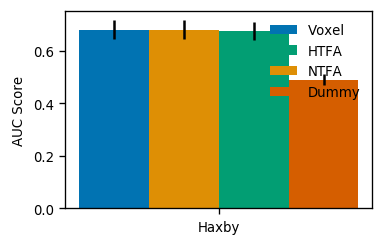

In [163]:
confidence = 0.95
voxel_accuracies = np.mean(voxel_summary_means)
voxel_errs = stats.sem(voxel_summary_means) * stats.t.ppf((1 + confidence) / 2, len(voxel_summary_means) - 1)
htfa_accuracies = np.mean(htfa_summary_means)
htfa_errs = stats.sem(htfa_summary_means) * stats.t.ppf((1 + confidence) / 2, len(htfa_summary_means) - 1)
ntfa_accuracies = np.mean(ntfa_summary_means)
ntfa_errs = stats.sem(ntfa_summary_means) * stats.t.ppf((1 + confidence) / 2, len(ntfa_summary_means) - 1)
dummy_accuracies = np.mean(dummy_summary_means)
dummy_errs = stats.sem(dummy_summary_means) * stats.t.ppf((1 + confidence) / 2, len(dummy_summary_means) - 1)

datasets = ['Haxby'] #, 'Word', 'Rest']

xs = np.arange(len(datasets))

colorblind_cycler = cycler(color=color_palette('colorblind'))
colorblind_colors = [c['color'] for c in colorblind_cycler]
muted_cycler = cycler(color=color_palette('bright'))
muted_colors = [c['color'] for c in muted_cycler]

bar_width = 0.2

fig = pl.figure()
voxel_bar = pl.bar(xs, height=voxel_accuracies, color=colorblind_colors[0], width=bar_width, yerr=voxel_errs)
ntfa_bar = pl.bar(xs + bar_width, height=ntfa_accuracies, color=colorblind_colors[1], width=bar_width, yerr=ntfa_errs)
htfa_bar = pl.bar(xs + 2*bar_width, height=htfa_accuracies, color=colorblind_colors[2], width=bar_width, yerr=htfa_errs)
dummy_bar = pl.bar(xs + 3*bar_width, height=dummy_accuracies, color=colorblind_colors[3], width=bar_width, yerr=dummy_errs)
pl.xticks(xs+1.5*bar_width, datasets)
pl.legend((voxel_bar[0], htfa_bar[0], ntfa_bar[0],dummy_bar[0]), ('Voxel', 'HTFA', 'NTFA','Dummy'))

pl.ylabel('AUC Score')
pl.ylim(bottom=0,)
fig.savefig('affvids_svm_accuracies_ci.pdf')

In [164]:
### task classification using 3Fold CV on NTFA music, negative vs positive###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
            if (block.subject == s) and ('music' in music_sound_labeler(block.task)):
                session_labels.append(block.run)
                data.append(all_weights_dtfa[i,:,:].mean(0))
                targets.append(task_labeler(block.task))
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                   session_labels=None, cv=cv,
                                                                   scoring="roc_auc",
                                                                   print_all=True)
    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())
    summary_subject_chance_means.append(np.array(overall_result_chance).mean())

print ('...')
category_result = {key:[] for key in ['negative_music','positive_music']}
for c in ['negative_music','positive_music']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("NTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("NTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("NTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

print("Overall Dummy Mean/SE Score: %1.4f +- %1.4f" % (
np.array(summary_subject_chance_means).mean(),
stats.sem(summary_subject_chance_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_chance_means) - 1)))

ntfa_summary_result = summary_result
dummy_summary_result = summary_result_chance
ntfa_mus_summary_means = summary_subject_means

Processing Subject control01
Processing negative_music
Scores: 0.6667 +- 0.2357
Chance Scores: 0.9167 +- 0.1179
Processing positive_music
Scores: 0.6667 +- 0.2357
Chance Scores: 0.6667 +- 0.1179
...
Overall Score: 0.6667 +- 0.2357
Overall Dummy Score: 0.7917 +- 0.1718


Processing Subject control02
Processing negative_music
Scores: 0.6667 +- 0.4714
Chance Scores: 0.6667 +- 0.2357
Processing positive_music
Scores: 0.6667 +- 0.4714
Chance Scores: 0.3333 +- 0.3118
...
Overall Score: 0.6667 +- 0.4714
Overall Dummy Score: 0.5000 +- 0.3227


Processing Subject control03
Processing negative_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5833 +- 0.4249
Processing positive_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.2041
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.5417 +- 0.3359


Processing Subject control04
Processing negative_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.0000 +- 0.0000
Processing positive_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.2500 +-

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.6667 +- 0.4714
Chance Scores: 0.4167 +- 0.4249
...
Overall Score: 0.6667 +- 0.4714
Overall Dummy Score: 0.4167 +- 0.4249


Processing Subject control14
Processing negative_music
Scores: 0.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.2041
Processing positive_music
Scores: 0.0000 +- 0.0000
Chance Scores: 0.4167 +- 0.3118
...
Overall Score: 0.0000 +- 0.0000
Overall Dummy Score: 0.4583 +- 0.2668


Processing Subject control15
Processing negative_music
Scores: 0.0000 +- 0.0000
Chance Scores: 0.2500 +- 0.2041
Processing positive_music
Scores: 0.0000 +- 0.0000
Chance Scores: 0.4167 +- 0.1179
...
Overall Score: 0.0000 +- 0.0000
Overall Dummy Score: 0.3333 +- 0.1863


Processing Subject control16
Processing negative_music
Scores: 0.6667 +- 0.4714
Chance Scores: 0.7500 +- 0.2041
Processing positive_music
Scores: 0.6667 +- 0.4714
Chance Scores: 0.4167 +- 0.1179
...
Overall Score: 0.6667 +- 0.4714
Overall Dummy Score: 0.5833 +- 0.2357


Processing Subject control17
Processing negative_music

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.6667 +- 0.4714
Chance Scores: 0.4167 +- 0.3118
...
Overall Score: 0.6667 +- 0.4714
Overall Dummy Score: 0.4583 +- 0.2668


Processing Subject mdd07
Processing negative_music
Scores: 0.0000 +- 0.0000
Chance Scores: 0.2500 +- 0.2041
Processing positive_music
Scores: 0.0000 +- 0.0000
Chance Scores: 0.7500 +- 0.3536
...
Overall Score: 0.0000 +- 0.0000
Overall Dummy Score: 0.5000 +- 0.3819


Processing Subject mdd08
Processing negative_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.0000
Processing positive_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.3333 +- 0.2357
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.4167 +- 0.1863


Processing Subject mdd09
Processing negative_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.6667 +- 0.2357
Processing positive_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4167 +- 0.1179
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.5417 +- 0.2244


Processing Subject mdd10
Processing negative_music
Scores: 1.0000 

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

In [165]:
### task classification using 3Fold CV on HTFA music, negative vs positive###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
            if (block.subject == s) and ('music' in music_sound_labeler(block.task)):
                session_labels.append(block.run)
                data.append(all_weights_htfa[i,:,:].mean(0))
                targets.append(task_labeler(block.task))
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                   session_labels=None, cv=cv,
                                                                   scoring="roc_auc",
                                                                   print_all=True)
    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())
    summary_subject_chance_means.append(np.array(overall_result_chance).mean())

print ('...')
category_result = {key:[] for key in ['negative_music','positive_music']}
for c in ['negative_music','positive_music']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("HTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("HTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("HTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

print("Overall Dummy Mean/SE Score: %1.4f +- %1.4f" % (
np.array(summary_subject_chance_means).mean(),
stats.sem(summary_subject_chance_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_chance_means) - 1)))

htfa_summary_result = summary_result
dummy_summary_result = summary_result_chance
htfa_mus_summary_means = summary_subject_means
dummy_mus_summary_means = summary_subject_chance_means

Processing Subject control01
Processing negative_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5000 +- 0.4082
Processing positive_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.4167 +- 0.3118
...
Overall Score: 0.8333 +- 0.2357
Overall Dummy Score: 0.4583 +- 0.3656


Processing Subject control02
Processing negative_music
Scores: 0.6667 +- 0.4714
Chance Scores: 0.2500 +- 0.2041
Processing positive_music
Scores: 0.6667 +- 0.4714
Chance Scores: 0.3333 +- 0.2357
...
Overall Score: 0.6667 +- 0.4714
Overall Dummy Score: 0.2917 +- 0.2244


Processing Subject control03
Processing negative_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.4167 +- 0.1179
Processing positive_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.6667 +- 0.1179
...
Overall Score: 0.8333 +- 0.2357
Overall Dummy Score: 0.5417 +- 0.1718


Processing Subject control04
Processing negative_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.9167 +- 0.1179
Processing positive_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.4167 +-

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.3333 +- 0.4714
Chance Scores: 0.5000 +- 0.3536
Processing positive_music
Scores: 0.3333 +- 0.4714
Chance Scores: 0.4167 +- 0.3118
...
Overall Score: 0.3333 +- 0.4714
Overall Dummy Score: 0.4583 +- 0.3359


Processing Subject control15
Processing negative_music
Scores: 0.0000 +- 0.0000
Chance Scores: 0.3333 +- 0.2357
Processing positive_music
Scores: 0.0000 +- 0.0000
Chance Scores: 0.3333 +- 0.1179
...
Overall Score: 0.0000 +- 0.0000
Overall Dummy Score: 0.3333 +- 0.1863


Processing Subject control16
Processing negative_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.3333 +- 0.2357
Processing positive_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5833 +- 0.4249
...
Overall Score: 0.8333 +- 0.2357
Overall Dummy Score: 0.4583 +- 0.3656


Processing Subject control17
Processing negative_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.6667 +- 0.3118
Processing positive_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.3536
...
Overall Score: 1.0000 +- 0.0000
Overall Dum

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.0000 +- 0.0000
Chance Scores: 0.6667 +- 0.2357
...
Overall Score: 0.0000 +- 0.0000
Overall Dummy Score: 0.4167 +- 0.3436


Processing Subject mdd08
Processing negative_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.3536
Processing positive_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5833 +- 0.1179
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.5417 +- 0.2668


Processing Subject mdd09
Processing negative_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4167 +- 0.4249
Processing positive_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.3333 +- 0.3118
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.3750 +- 0.3750


Processing Subject mdd10
Processing negative_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4167 +- 0.3118
Processing positive_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.6667 +- 0.1179
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.5417 +- 0.2668


Processing Subject mdd11
Processing negative_music
Scores: 0.3333 

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

In [166]:
### task classification using 3Fold CV on Input data music, negative vs positive###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
            if (block.subject == s) and ('music' in music_sound_labeler(block.task)):
                session_labels.append(block.run)
                data.append(dtfa.voxel_activations[i].data.numpy().mean(0))
                targets.append(task_labeler(block.task))
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                   session_labels=None, cv=cv,
                                                                   scoring="roc_auc",
                                                                   feature_select = True,
                                                                   print_all=True)
    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())
    summary_subject_chance_means.append(np.array(overall_result_chance).mean())

print ('...')
category_result = {key:[] for key in ['negative_music','positive_music']}
for c in ['negative_music','positive_music']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("Voxel Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("VoxelSummary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("Voxel Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

print("Overall Dummy Mean/SE Score: %1.4f +- %1.4f" % (
np.array(summary_subject_chance_means).mean(),
stats.sem(summary_subject_chance_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_chance_means) - 1)))

voxel_summary_result = summary_result
dummy_summary_result = summary_result_chance
voxel_mus_summary_means = summary_subject_means

Processing Subject control01
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.6667 +- 0.4714
Chance Scores: 0.4167 +- 0.3118
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.6667 +- 0.4714
Chance Scores: 0.7500 +- 0.2041
...
Overall Score: 0.6667 +- 0.4714
Overall Dummy Score: 0.5833 +- 0.3118


Processing Subject control02
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.6667 +- 0.4714
Chance Scores: 0.5000 +- 0.3536
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.6667 +- 0.4714
Chance Scores: 0.8333 +- 0.1179
...
Overall Score: 0.6667 +- 0.4714
Overall Dummy Score: 0.6667 +- 0.3118


Processing Subject control03
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.4082
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.7500 +- 0.2041
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.6250 +- 0.3461


Processing Subject control04
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.2500 +- 0.2041
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5000 +- 0.3536
...
Overall Score: 0.8333 +- 0.2357
Overall Dummy Score: 0.3750 +- 0.3146


Processing Subject control05


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.8333 +- 0.1179
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5000 +- 0.0000
...
Overall Score: 0.8333 +- 0.2357
Overall Dummy Score: 0.6667 +- 0.1863


Processing Subject control06
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.1667 +- 0.2357
Chance Scores: 0.3333 +- 0.2357
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.1667 +- 0.2357
Chance Scores: 0.4167 +- 0.3118
...
Overall Score: 0.1667 +- 0.2357
Overall Dummy Score: 0.3750 +- 0.2795


Processing Subject control07
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5000 +- 0.0000
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.4167 +- 0.4249
...
Overall Score: 0.8333 +- 0.2357
Overall Dummy Score: 0.4583 +- 0.3033


Processing Subject control08
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.3333 +- 0.4714
Chance Scores: 0.8333 +- 0.2357
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.3333 +- 0.4714
Chance Scores: 0.5833 +- 0.3118
...
Overall Score: 0.3333 +- 0.4714
Overall Dummy Score: 0.7083 +- 0.3033


Processing Subject control09


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.6667 +- 0.4714
Chance Scores: 0.5833 +- 0.3118
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.6667 +- 0.4714
Chance Scores: 0.4167 +- 0.3118
...
Overall Score: 0.6667 +- 0.4714
Overall Dummy Score: 0.5000 +- 0.3227


Processing Subject control10
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.0000 +- 0.0000
Chance Scores: 0.6667 +- 0.4714
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.0000
...
Overall Score: 0.0000 +- 0.0000
Overall Dummy Score: 0.5833 +- 0.3436


Processing Subject control11
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.1667 +- 0.2357
Chance Scores: 0.5000 +- 0.2041
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.1667 +- 0.2357
Chance Scores: 0.4167 +- 0.1179
...
Overall Score: 0.1667 +- 0.2357
Overall Dummy Score: 0.4583 +- 0.1718


Processing Subject control12
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5833 +- 0.4249
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.3333 +- 0.3118
...
Overall Score: 0.8333 +- 0.2357
Overall Dummy Score: 0.4583 +- 0.3931


Processing Subject control13
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.2500 +- 0.2041
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.4167 +- 0.3118
...
Overall Score: 0.8333 +- 0.2357
Overall Dummy Score: 0.3333 +- 0.2764


Processing Subject control14


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.1667 +- 0.2357
Chance Scores: 0.5000 +- 0.3536
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.1667 +- 0.2357
Chance Scores: 0.7500 +- 0.2041
...
Overall Score: 0.1667 +- 0.2357
Overall Dummy Score: 0.6250 +- 0.3146


Processing Subject control15
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.2041
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.0000 +- 0.0000
Chance Scores: 0.1667 +- 0.2357
...
Overall Score: 0.0000 +- 0.0000
Overall Dummy Score: 0.3333 +- 0.2764


Processing Subject control16
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.6667 +- 0.2357
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.2500 +- 0.2041
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.4583 +- 0.3033


Processing Subject control17


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.2041
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 1.0000 +- 0.0000
Chance Scores: 0.4167 +- 0.1179
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.4583 +- 0.1718


Processing Subject control18
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.0000 +- 0.0000
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4167 +- 0.3118
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.2083 +- 0.3033


Processing Subject control19
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.3333 +- 0.3118
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.6667 +- 0.1179
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.5000 +- 0.2887


Processing Subject control20
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.5000 +- 0.4082
Chance Scores: 0.5000 +- 0.3536
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.5000 +- 0.4082
Chance Scores: 0.3333 +- 0.3118
...
Overall Score: 0.5000 +- 0.4082
Overall Dummy Score: 0.4167 +- 0.3436


Processing Subject mdd01
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.3536
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.1667 +- 0.2357
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.3333 +- 0.3436


Processing Subject mdd02
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.5000 +- 0.4082
Chance Scores: 0.3333 +- 0.3118
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.5000 +- 0.4082
Chance Scores: 0.2500 +- 0.2041
...
Overall Score: 0.5000 +- 0.4082
Overall Dummy Score: 0.2917 +- 0.2668


Processing Subject mdd03
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.0000
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.0000 +- 0.0000
Chance Scores: 0.5833 +- 0.3118
...
Overall Score: 0.0000 +- 0.0000
Overall Dummy Score: 0.5417 +- 0.2244


Processing Subject mdd04
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.3333 +- 0.3118
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4167 +- 0.1179
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.3750 +- 0.2394


Skipping Subject, not enough runs
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4167 +- 0.3118
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.6667 +- 0.3118
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.5417 +- 0.3359


Processing Subject mdd06
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.4167 +- 0.3118
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.8333 +- 0.2357
Chance Scores: 0.5833 +- 0.1179
...
Overall Score: 0.8333 +- 0.2357
Overall Dummy Score: 0.5000 +- 0.2500


Processing Subject mdd07
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.0000 +- 0.0000
Chance Scores: 0.4167 +- 0.1179
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.0000 +- 0.0000
Chance Scores: 0.5833 +- 0.3118
...
Overall Score: 0.0000 +- 0.0000
Overall Dummy Score: 0.5000 +- 0.2500


Processing Subject mdd08
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.7500 +- 0.2041
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.2500 +- 0.2041
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.5000 +- 0.3227


Processing Subject mdd09
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 1.0000 +- 0.0000
Chance Scores: 0.6667 +- 0.2357
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.4082
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.5833 +- 0.3436


Processing Subject mdd10
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 1.0000 +- 0.0000
Chance Scores: 0.6667 +- 0.1179
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.4082
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.5833 +- 0.3118


Processing Subject mdd11
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.1667 +- 0.2357
Chance Scores: 0.6667 +- 0.3118
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.1667 +- 0.2357
Chance Scores: 0.5833 +- 0.1179
...
Overall Score: 0.1667 +- 0.2357
Overall Dummy Score: 0.6250 +- 0.2394


Processing Subject mdd12


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.0000 +- 0.0000
Chance Scores: 0.2500 +- 0.2041
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.0000 +- 0.0000
Chance Scores: 0.4167 +- 0.3118
...
Overall Score: 0.0000 +- 0.0000
Overall Dummy Score: 0.3333 +- 0.2764


Processing Subject mdd13
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.8333 +- 0.1179
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5000 +- 0.2041
...
Overall Score: 0.8333 +- 0.2357
Overall Dummy Score: 0.6667 +- 0.2357


Processing Subject mdd14
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.0000 +- 0.0000
Chance Scores: 0.5833 +- 0.1179
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.0000 +- 0.0000
Chance Scores: 0.2500 +- 0.2041
...
Overall Score: 0.0000 +- 0.0000
Overall Dummy Score: 0.4167 +- 0.2357


Processing Subject mdd15
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 1.0000 +- 0.0000
Chance Scores: 0.4167 +- 0.1179
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.7500 +- 0.2041
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.5833 +- 0.2357


Processing Subject mdd16
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.3333 +- 0.4714
Chance Scores: 0.8333 +- 0.2357
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.3333 +- 0.4714
Chance Scores: 0.5000 +- 0.4082
...
Overall Score: 0.3333 +- 0.4714
Overall Dummy Score: 0.6667 +- 0.3727


Processing Subject mdd17
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.6667 +- 0.2357
Chance Scores: 0.5000 +- 0.4082
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.6667 +- 0.2357
Chance Scores: 0.5000 +- 0.4082
...
Overall Score: 0.6667 +- 0.2357
Overall Dummy Score: 0.5000 +- 0.4082


Processing Subject mdd18
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5000 +- 0.4082
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.8333 +- 0.2357
Chance Scores: 0.5000 +- 0.2041
...
Overall Score: 0.8333 +- 0.2357
Overall Dummy Score: 0.5000 +- 0.3227


Processing Subject mdd19
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.6667 +- 0.4714
Chance Scores: 0.3333 +- 0.3118
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.6667 +- 0.4714
Chance Scores: 0.6667 +- 0.2357
...
Overall Score: 0.6667 +- 0.4714
Overall Dummy Score: 0.5000 +- 0.3227


...
Voxel Summary Score Across Subjects, For Category negative_music : 0.6239 +- 0.4477
Voxel Summary Score Across Subjects, For Category positive_music : 0.6239 +- 0.4477
...
VoxelSummary Score Across Subjects, Across Tasks: 0.6239 +- 0.4477
Overall Dummy Score: 0.4957 +- 0.3202
...
Voxel Summary Mean/SE, Across Tasks: 0.6239 +- 0.1225
Overall Dummy Mean/SE Score: 0.4957 +- 0.0389


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

In [167]:
### task classification using 3Fold CV on Input data music, negative vs positive###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
feature_selection = SelectKBest(f_classif, k=500)

for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
            if (block.subject == s) and ('music' in music_sound_labeler(block.task)):
                session_labels.append(block.run)
                data.append(dtfa.voxel_activations[i].data.numpy().mean(0))
                targets.append(task_labeler(block.task))
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                   session_labels=None, cv=cv,
                                                                   scoring="roc_auc",
                                                                   feature_select = True,
                                                                   feature_selection=feature_selection,
                                                                   print_all=True)
    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())
    summary_subject_chance_means.append(np.array(overall_result_chance).mean())

print ('...')
category_result = {key:[] for key in ['negative_music','positive_music']}
for c in ['negative_music','positive_music']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("Voxel Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("VoxelSummary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("Voxel Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

print("Overall Dummy Mean/SE Score: %1.4f +- %1.4f" % (
np.array(summary_subject_chance_means).mean(),
stats.sem(summary_subject_chance_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_chance_means) - 1)))

voxel_summary_result = summary_result
dummy_summary_result = summary_result_chance
voxel_mus_summary_means = summary_subject_means

Processing Subject control01
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.6667 +- 0.4714
Chance Scores: 0.5833 +- 0.1179
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.6667 +- 0.4714
Chance Scores: 0.5000 +- 0.3536
...
Overall Score: 0.6667 +- 0.4714
Overall Dummy Score: 0.5417 +- 0.2668


Processing Subject control02
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.6667 +- 0.4714
Chance Scores: 0.3333 +- 0.1179
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Scores: 0.6667 +- 0.4714
Chance Scores: 0.5000 +- 0.4082
...
Overall Score: 0.6667 +- 0.4714
Overall Dummy Score: 0.4167 +- 0.3118


Processing Subject control03
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5000 +- 0.3536
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.7500 +- 0.3536
...
Overall Score: 0.8333 +- 0.2357
Overall Dummy Score: 0.6250 +- 0.3750


Processing Subject control04
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.8333 +- 0.2357
Chance Scores: 0.5000 +- 0.2041
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.7500 +- 0.2041
...
Overall Score: 0.8333 +- 0.2357
Overall Dummy Score: 0.6250 +- 0.2394


Processing Subject control05
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5000 +- 0.0000
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.4167 +- 0.3118
...
Overall Score: 0.8333 +- 0.2357
Overall Dummy Score: 0.4583 +- 0.2244


Processing Subject control06


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.1667 +- 0.2357
Chance Scores: 0.8333 +- 0.2357
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.1667 +- 0.2357
Chance Scores: 0.4167 +- 0.3118
...
Overall Score: 0.1667 +- 0.2357
Overall Dummy Score: 0.6250 +- 0.3461


Processing Subject control07
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.5000 +- 0.4082
Chance Scores: 0.5000 +- 0.3536
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.5000 +- 0.4082
Chance Scores: 0.6667 +- 0.2357
...
Overall Score: 0.5000 +- 0.4082
Overall Dummy Score: 0.5833 +- 0.3118


Processing Subject control08
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.3333 +- 0.4714
Chance Scores: 0.2500 +- 0.2041
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.3333 +- 0.4714
Chance Scores: 0.5833 +- 0.1179
...
Overall Score: 0.3333 +- 0.4714
Overall Dummy Score: 0.4167 +- 0.2357


Processing Subject control09
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.6667 +- 0.4714
Chance Scores: 0.5000 +- 0.2041
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.6667 +- 0.4714
Chance Scores: 0.3333 +- 0.1179
...
Overall Score: 0.6667 +- 0.4714
Overall Dummy Score: 0.4167 +- 0.1863


Processing Subject control10


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.4082
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.0000 +- 0.0000
Chance Scores: 0.3333 +- 0.2357
...
Overall Score: 0.0000 +- 0.0000
Overall Dummy Score: 0.4167 +- 0.3436


Processing Subject control11
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.1667 +- 0.2357
Chance Scores: 0.5833 +- 0.4249
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.1667 +- 0.2357
Chance Scores: 0.6667 +- 0.2357
...
Overall Score: 0.1667 +- 0.2357
Overall Dummy Score: 0.6250 +- 0.3461


Processing Subject control12
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.8333 +- 0.2357
Chance Scores: 0.5833 +- 0.4249
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5000 +- 0.4082
...
Overall Score: 0.8333 +- 0.2357
Overall Dummy Score: 0.5417 +- 0.4187


Processing Subject control13
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.6667 +- 0.2357
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.6667 +- 0.3118
...
Overall Score: 0.8333 +- 0.2357
Overall Dummy Score: 0.6667 +- 0.2764


Processing Subject control14
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.1667 +- 0.2357
Chance Scores: 0.5833 +- 0.3118
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.1667 +- 0.2357
Chance Scores: 0.4167 +- 0.3118
...
Overall Score: 0.1667 +- 0.2357
Overall Dummy Score: 0.5000 +- 0.3227


Processing Subject control15
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.0000 +- 0.0000
Chance Scores: 0.6667 +- 0.2357
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.0000 +- 0.0000
Chance Scores: 0.8333 +- 0.2357
...
Overall Score: 0.0000 +- 0.0000
Overall Dummy Score: 0.7500 +- 0.2500


Processing Subject control16
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5000 +- 0.2041
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.7500 +- 0.2041
...
Overall Score: 0.8333 +- 0.2357
Overall Dummy Score: 0.6250 +- 0.2394


Processing Subject control17
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.0000
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.7500 +- 0.2041
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.6250 +- 0.1909


Processing Subject control18
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Scores: 1.0000 +- 0.0000
Chance Scores: 0.5833 +- 0.1179
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.7500 +- 0.2041
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.6667 +- 0.1863


Processing Subject control19
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.8333 +- 0.2357
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.2500 +- 0.3536
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.5417 +- 0.4187


Processing Subject control20
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.5000 +- 0.4082
Chance Scores: 0.7500 +- 0.2041
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.5000 +- 0.4082
Chance Scores: 0.5000 +- 0.2041
...
Overall Score: 0.5000 +- 0.4082
Overall Dummy Score: 0.6250 +- 0.2394


Processing Subject mdd01
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5833 +- 0.4249
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 1.0000 +- 0.0000
Chance Scores: 1.0000 +- 0.0000
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.7917 +- 0.3656


Processing Subject mdd02
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.5000 +- 0.4082
Chance Scores: 0.5833 +- 0.4249
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.5000 +- 0.4082
Chance Scores: 0.5833 +- 0.3118
...
Overall Score: 0.5000 +- 0.4082
Overall Dummy Score: 0.5833 +- 0.3727


Processing Subject mdd03
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.3333 +- 0.4714
Chance Scores: 0.5000 +- 0.4082
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.3333 +- 0.4714
Chance Scores: 0.3333 +- 0.2357
...
Overall Score: 0.3333 +- 0.4714
Overall Dummy Score: 0.4167 +- 0.3436


Processing Subject mdd04
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.0833 +- 0.1179
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 1.0000 +- 0.0000
Chance Scores: 0.6667 +- 0.1179
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.3750 +- 0.3146


Skipping Subject, not enough runs
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.6667 +- 0.3118
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.6667 +- 0.3118
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.6667 +- 0.3118


Processing Subject mdd06
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.5000 +- 0.4082
Chance Scores: 0.3333 +- 0.1179
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.5000 +- 0.4082
Chance Scores: 0.5000 +- 0.3536
...
Overall Score: 0.5000 +- 0.4082
Overall Dummy Score: 0.4167 +- 0.2764


Processing Subject mdd07
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.0000 +- 0.0000
Chance Scores: 0.3333 +- 0.2357
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.2041
...
Overall Score: 0.0000 +- 0.0000
Overall Dummy Score: 0.4167 +- 0.2357


Processing Subject mdd08
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5833 +- 0.3118
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.2500 +- 0.2041
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.4167 +- 0.3118


Processing Subject mdd09
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 1.0000 +- 0.0000
Chance Scores: 0.7500 +- 0.2041
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.7500 +- 0.2041
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.7500 +- 0.2041


Processing Subject mdd10
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4167 +- 0.3118
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.3333 +- 0.3118
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.3750 +- 0.3146


Processing Subject mdd11
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.1667 +- 0.2357
Chance Scores: 0.4167 +- 0.4249
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.1667 +- 0.2357
Chance Scores: 0.5000 +- 0.4082
...
Overall Score: 0.1667 +- 0.2357
Overall Dummy Score: 0.4583 +- 0.4187


Processing Subject mdd12
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.0000 +- 0.0000
Chance Scores: 0.5833 +- 0.1179
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.0000 +- 0.0000
Chance Scores: 0.1667 +- 0.1179
...
Overall Score: 0.0000 +- 0.0000
Overall Dummy Score: 0.3750 +- 0.2394


Processing Subject mdd13
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.6667 +- 0.4714
Chance Scores: 0.5000 +- 0.2041
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.7500 +- 0.2041
...
Overall Score: 0.7500 +- 0.3819
Overall Dummy Score: 0.6250 +- 0.2394


Processing Subject mdd14
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.0000 +- 0.0000
Chance Scores: 0.5833 +- 0.4249
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.0000 +- 0.0000
Chance Scores: 0.3333 +- 0.3118
...
Overall Score: 0.0000 +- 0.0000
Overall Dummy Score: 0.4583 +- 0.3931


Processing Subject mdd15
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4167 +- 0.3118
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4167 +- 0.3118
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.4167 +- 0.3118


Processing Subject mdd16
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.3333 +- 0.4714
Chance Scores: 0.6667 +- 0.3118
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.3333 +- 0.4714
Chance Scores: 0.5833 +- 0.1179
...
Overall Score: 0.3333 +- 0.4714
Overall Dummy Score: 0.6250 +- 0.2394


Processing Subject mdd17
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.3333 +- 0.2357
Chance Scores: 0.0833 +- 0.1179
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.3333 +- 0.2357
Chance Scores: 0.4167 +- 0.1179
...
Overall Score: 0.3333 +- 0.2357
Overall Dummy Score: 0.2500 +- 0.2041


Processing Subject mdd18


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.2500 +- 0.2041
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.7500 +- 0.2041
...
Overall Score: 0.8333 +- 0.2357
Overall Dummy Score: 0.5000 +- 0.3227


Processing Subject mdd19
Processing negative_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.6667 +- 0.4714
Chance Scores: 0.6667 +- 0.1179
Processing positive_music
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.6667 +- 0.4714
Chance Scores: 0.2500 +- 0.3536
...
Overall Score: 0.6667 +- 0.4714
Overall Dummy Score: 0.4583 +- 0.3359


...
Voxel Summary Score Across Subjects, For Category negative_music : 0.5940 +- 0.4526
Voxel Summary Score Across Subjects, For Category positive_music : 0.5983 +- 0.4493
...
VoxelSummary Score Across Subjects, Across Tasks: 0.5962 +- 0.4510
Overall Dummy Score: 0.5299 +- 0.3263
...
Voxel Summary Mean/SE, Across Tasks: 0.5962 +- 0.1164
Overall Dummy Mean/SE Score: 0.5299 +- 0.0406


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [168]:
### task classification using 3Fold CV on NTFA sounds, negative vs positive###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
            if (block.subject == s) and ('sounds' in music_sound_labeler(block.task)):
                session_labels.append(block.run)
                data.append(all_weights_dtfa[i,:,:].mean(0))
                targets.append(task_labeler(block.task))
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                   session_labels=None, cv=cv,
                                                                   scoring="roc_auc",
                                                                   print_all=True)
    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())
    summary_subject_chance_means.append(np.array(overall_result_chance).mean())

print ('...')
category_result = {key:[] for key in ['negative_sounds','positive_sounds']}
for c in ['negative_sounds','positive_sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("NTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("NTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("NTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

print("Overall Dummy Mean/SE Score: %1.4f +- %1.4f" % (
np.array(summary_subject_chance_means).mean(),
stats.sem(summary_subject_chance_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_chance_means) - 1)))

ntfa_summary_result = summary_result
dummy_summary_result = summary_result_chance
ntfa_sounds_summary_means = summary_subject_means
dummy_sounds_summary_means = summary_subject_chance_means

Processing Subject control01
Processing negative_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0.6667 +- 0.1179
Processing positive_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0.7500 +- 0.2041
...
Overall Score: 0.8333 +- 0.2357
Overall Dummy Score: 0.7083 +- 0.1718


Processing Subject control02
Processing negative_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5833 +- 0.3118
Processing positive_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0.4167 +- 0.1179
...
Overall Score: 0.8333 +- 0.2357
Overall Dummy Score: 0.5000 +- 0.2500


Processing Subject control03
Processing negative_sounds
Scores: 0.3333 +- 0.4714
Chance Scores: 0.4167 +- 0.1179
Processing positive_sounds
Scores: 0.3333 +- 0.4714
Chance Scores: 0.4167 +- 0.4249
...
Overall Score: 0.3333 +- 0.4714
Overall Dummy Score: 0.4167 +- 0.3118


Processing Subject control04
Processing negative_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.5000 +- 0.3536
Processing positive_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.5000 +- 0.4082
Chance Scores: 0.6667 +- 0.3118
...
Overall Score: 0.5000 +- 0.4082
Overall Dummy Score: 0.5833 +- 0.2764


Processing Subject control14
Processing negative_sounds
Scores: 0.1667 +- 0.2357
Chance Scores: 0.5000 +- 0.4082
Processing positive_sounds
Scores: 0.1667 +- 0.2357
Chance Scores: 0.5833 +- 0.3118
...
Overall Score: 0.1667 +- 0.2357
Overall Dummy Score: 0.5417 +- 0.3656


Processing Subject control15
Processing negative_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0.6667 +- 0.2357
Processing positive_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0.7500 +- 0.2041
...
Overall Score: 0.8333 +- 0.2357
Overall Dummy Score: 0.7083 +- 0.2244


Processing Subject control16
Processing negative_sounds
Scores: 0.6667 +- 0.2357
Chance Scores: 0.5000 +- 0.0000
Processing positive_sounds
Scores: 0.6667 +- 0.2357
Chance Scores: 0.6667 +- 0.2357
...
Overall Score: 0.6667 +- 0.2357
Overall Dummy Score: 0.5833 +- 0.1863


Processing Subject control17
Processing negative

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.8333 +- 0.2357
Chance Scores: 0.5833 +- 0.3118
...
Overall Score: 0.8333 +- 0.2357
Overall Dummy Score: 0.4583 +- 0.3033


Processing Subject mdd07
Processing negative_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.5833 +- 0.1179
Processing positive_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.4167 +- 0.4249
...
Overall Score: 0.5000 +- 0.4082
Overall Dummy Score: 0.5000 +- 0.3227


Processing Subject mdd08
Processing negative_sounds
Scores: 0.6667 +- 0.4714
Chance Scores: 0.7500 +- 0.2041
Processing positive_sounds
Scores: 0.6667 +- 0.4714
Chance Scores: 0.4167 +- 0.3118
...
Overall Score: 0.6667 +- 0.4714
Overall Dummy Score: 0.5833 +- 0.3118


Processing Subject mdd09
Processing negative_sounds
Scores: 0.3333 +- 0.4714
Chance Scores: 0.4167 +- 0.1179
Processing positive_sounds
Scores: 0.3333 +- 0.4714
Chance Scores: 0.4167 +- 0.3118
...
Overall Score: 0.3333 +- 0.4714
Overall Dummy Score: 0.4167 +- 0.2357


Processing Subject mdd10
Processing negative_sounds
Scores: 

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

In [169]:
### task classification using 3Fold CV on HTFA sounds, negative vs positive###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
            if (block.subject == s) and ('sounds' in music_sound_labeler(block.task)):
                session_labels.append(block.run)
                data.append(all_weights_htfa[i,:,:].mean(0))
                targets.append(task_labeler(block.task))
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                   session_labels=None, cv=cv,
                                                                   scoring="roc_auc",
                                                                   print_all=True)
    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())
    summary_subject_chance_means.append(np.array(overall_result_chance).mean())

print ('...')
category_result = {key:[] for key in ['negative_sounds','positive_sounds']}
for c in ['negative_sounds','positive_sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("HTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("HTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("HTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

print("Overall Dummy Mean/SE Score: %1.4f +- %1.4f" % (
np.array(summary_subject_chance_means).mean(),
stats.sem(summary_subject_chance_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_chance_means) - 1)))

htfa_summary_result = summary_result
dummy_summary_result = summary_result_chance
htfa_sounds_summary_means = summary_subject_means

Processing Subject control01
Processing negative_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0.3333 +- 0.2357
Processing positive_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0.3333 +- 0.2357
...
Overall Score: 0.8333 +- 0.2357
Overall Dummy Score: 0.3333 +- 0.2357


Processing Subject control02
Processing negative_sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.1667 +- 0.2357
Processing positive_sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.4082
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.3333 +- 0.3727


Processing Subject control03
Processing negative_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.3333 +- 0.2357
Processing positive_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.5833 +- 0.1179
...
Overall Score: 0.5000 +- 0.4082
Overall Dummy Score: 0.4583 +- 0.2244


Processing Subject control04
Processing negative_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.6667 +- 0.3118
Processing positive_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.5000 +- 0.4082
Chance Scores: 0.6667 +- 0.3118
Processing positive_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.5833 +- 0.4249
...
Overall Score: 0.5000 +- 0.4082
Overall Dummy Score: 0.6250 +- 0.3750


Processing Subject control15
Processing negative_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5833 +- 0.1179
Processing positive_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0.6667 +- 0.3118
...
Overall Score: 0.8333 +- 0.2357
Overall Dummy Score: 0.6250 +- 0.2394


Processing Subject control16
Processing negative_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5000 +- 0.4082
Processing positive_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0.7500 +- 0.2041
...
Overall Score: 0.8333 +- 0.2357
Overall Dummy Score: 0.6250 +- 0.3461


Processing Subject control17
Processing negative_sounds
Scores: 0.3333 +- 0.2357
Chance Scores: 0.3333 +- 0.2357
Processing positive_sounds
Scores: 0.3333 +- 0.2357
Chance Scores: 0.4167 +- 0.3118
...
Overall Score: 0.3333 +- 0.2357
Over

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.3333 +- 0.4714
Chance Scores: 0.5833 +- 0.3118
Processing positive_sounds
Scores: 0.3333 +- 0.4714
Chance Scores: 0.3333 +- 0.4714
...
Overall Score: 0.3333 +- 0.4714
Overall Dummy Score: 0.4583 +- 0.4187


Processing Subject mdd08
Processing negative_sounds
Scores: 0.6667 +- 0.2357
Chance Scores: 0.5833 +- 0.1179
Processing positive_sounds
Scores: 0.6667 +- 0.2357
Chance Scores: 0.4167 +- 0.3118
...
Overall Score: 0.6667 +- 0.2357
Overall Dummy Score: 0.5000 +- 0.2500


Processing Subject mdd09
Processing negative_sounds
Scores: 0.3333 +- 0.4714
Chance Scores: 0.2500 +- 0.2041
Processing positive_sounds
Scores: 0.3333 +- 0.4714
Chance Scores: 0.7500 +- 0.3536
...
Overall Score: 0.3333 +- 0.4714
Overall Dummy Score: 0.5000 +- 0.3819


Processing Subject mdd10
Processing negative_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.1667 +- 0.2357
Processing positive_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.4167 +- 0.3118
...
Overall Score: 0.5000 +- 0.4082
Overall Dummy Sc

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

In [170]:
### task classification using 3Fold CV on Input data sounds, negative vs positive###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
            if (block.subject == s) and ('sounds' in music_sound_labeler(block.task)):
                session_labels.append(block.run)
                data.append(dtfa.voxel_activations[i].data.numpy().mean(0))
                targets.append(task_labeler(block.task))
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                   session_labels=None, cv=cv,
                                                                   scoring="roc_auc",
                                                                   feature_select = True,
                                                                   print_all=True)
    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())
    summary_subject_chance_means.append(np.array(overall_result_chance).mean())

print ('...')
category_result = {key:[] for key in ['negative_sounds','positive_sounds']}
for c in ['negative_sounds','positive_sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("Voxel Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("VoxelSummary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("Voxel Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

print("Overall Dummy Mean/SE Score: %1.4f +- %1.4f" % (
np.array(summary_subject_chance_means).mean(),
stats.sem(summary_subject_chance_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_chance_means) - 1)))

voxel_summary_result = summary_result
dummy_summary_result = summary_result_chance
voxel_sounds_summary_means = summary_subject_means

Processing Subject control01
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.1667 +- 0.2357
Chance Scores: 1.0000 +- 0.0000
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.1667 +- 0.2357
Chance Scores: 0.5000 +- 0.2041
...
Overall Score: 0.1667 +- 0.2357
Overall Dummy Score: 0.7500 +- 0.2887


Processing Subject control02
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5833 +- 0.1179
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5833 +- 0.1179
...
Overall Score: 0.8333 +- 0.2357
Overall Dummy Score: 0.5833 +- 0.1179


Processing Subject control03
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.3333 +- 0.2357
Chance Scores: 0.2500 +- 0.2041
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.3333 +- 0.2357
Chance Scores: 0.5000 +- 0.3536
...
Overall Score: 0.3333 +- 0.2357
Overall Dummy Score: 0.3750 +- 0.3146


Processing Subject control04
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.6667 +- 0.4714
Chance Scores: 0.4167 +- 0.3118
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.6667 +- 0.4714
Chance Scores: 0.6667 +- 0.2357
...
Overall Score: 0.6667 +- 0.4714
Overall Dummy Score: 0.5417 +- 0.3033


Processing Subject control05
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.6667 +- 0.2357
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5000 +- 0.2041
...
Overall Score: 0.8333 +- 0.2357
Overall Dummy Score: 0.5833 +- 0.2357


Processing Subject control06
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.9167 +- 0.1179
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 1.0000 +- 0.0000
Chance Scores: 0.3333 +- 0.2357
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.6250 +- 0.3461


Processing Subject control07
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.0000 +- 0.0000
Chance Scores: 0.2500 +- 0.2041
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.0000 +- 0.0000
Chance Scores: 0.5833 +- 0.4249
...
Overall Score: 0.0000 +- 0.0000
Overall Dummy Score: 0.4167 +- 0.3727


Processing Subject control08
Processing negative_sounds
TRAIN: [2 3 4 5] TEST: [0 1 6]
TRAIN: [0 1 3 5 6] TEST: [2 4]
TRAIN: [0 1 2 4 6] TEST: [3 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.6667 +- 0.4714
Chance Scores: 0.6667 +- 0.2357
Processing positive_sounds
TRAIN: [2 3 4 5] TEST: [0 1 6]
TRAIN: [0 1 3 5 6] TEST: [2 4]
TRAIN: [0 1 2 4 6] TEST: [3 5]
Scores: 0.6667 +- 0.4714
Chance Scores: 0.2500 +- 0.2041
...
Overall Score: 0.6667 +- 0.4714
Overall Dummy Score: 0.4583 +- 0.3033


Processing Subject control09
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.6667 +- 0.2357
Chance Scores: 0.6667 +- 0.2357
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.6667 +- 0.2357
Chance Scores: 0.5000 +- 0.4082
...
Overall Score: 0.6667 +- 0.2357
Overall Dummy Score: 0.5833 +- 0.3436


Processing Subject control10
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.1667 +- 0.2357
Chance Scores: 0.3333 +- 0.2357
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.1667 +- 0.2357
Chance Scores: 0.6667 +- 0.2357
...
Overall Score: 0.1667 +- 0.2357
Overall Dummy Score: 0.5000 +- 0.2887


Processing Subject control11


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.7500 +- 0.2041
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 1.0000 +- 0.0000
Chance Scores: 0.4167 +- 0.1179
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.5833 +- 0.2357


Processing Subject control12
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.1667 +- 0.2357
Chance Scores: 0.5833 +- 0.4249
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.1667 +- 0.2357
Chance Scores: 0.3333 +- 0.3118
...
Overall Score: 0.1667 +- 0.2357
Overall Dummy Score: 0.4583 +- 0.3931


Processing Subject control13
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.8333 +- 0.2357
Chance Scores: 0.2500 +- 0.3536
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5833 +- 0.1179
...
Overall Score: 0.8333 +- 0.2357
Overall Dummy Score: 0.4167 +- 0.3118


Processing Subject control14
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.5000 +- 0.4082
Chance Scores: 0.4167 +- 0.4249
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.5000 +- 0.4082
Chance Scores: 0.2500 +- 0.2041
...
Overall Score: 0.5000 +- 0.4082
Overall Dummy Score: 0.3333 +- 0.3436


Processing Subject control15
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.6667 +- 0.4714
Chance Scores: 0.4167 +- 0.1179
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.6667 +- 0.4714
Chance Scores: 0.2500 +- 0.2041
...
Overall Score: 0.6667 +- 0.4714
Overall Dummy Score: 0.3333 +- 0.1863


Processing Subject control16


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.2500 +- 0.2041
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 1.0000 +- 0.0000
Chance Scores: 0.4167 +- 0.3118
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.3333 +- 0.2764


Processing Subject control17
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.3333 +- 0.4714
Chance Scores: 0.7500 +- 0.3536
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.3333 +- 0.4714
Chance Scores: 0.3333 +- 0.1179
...
Overall Score: 0.3333 +- 0.4714
Overall Dummy Score: 0.5417 +- 0.3359


Processing Subject control18
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.5000 +- 0.4082
Chance Scores: 0.6667 +- 0.1179
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.5000 +- 0.4082
Chance Scores: 0.7500 +- 0.2041
...
Overall Score: 0.5000 +- 0.4082
Overall Dummy Score: 0.7083 +- 0.1718


Processing Subject control19
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5833 +- 0.1179
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.9167 +- 0.1179
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.7500 +- 0.2041


Processing Subject control20
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.1667 +- 0.2357
Chance Scores: 0.3333 +- 0.2357
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.1667 +- 0.2357
Chance Scores: 0.2500 +- 0.2041
...
Overall Score: 0.1667 +- 0.2357
Overall Dummy Score: 0.2917 +- 0.2244


Processing Subject mdd01
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.5000 +- 0.4082
Chance Scores: 0.6667 +- 0.1179
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.5000 +- 0.4082
Chance Scores: 0.4167 +- 0.3118
...
Overall Score: 0.5000 +- 0.4082
Overall Dummy Score: 0.5417 +- 0.2668


Processing Subject mdd02
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.1667 +- 0.2357
Chance Scores: 0.4167 +- 0.4249
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.1667 +- 0.2357
Chance Scores: 0.8333 +- 0.2357
...
Overall Score: 0.1667 +- 0.2357
Overall Dummy Score: 0.6250 +- 0.4018


Processing Subject mdd03
Processing negative_sounds
TRAIN: [2 3 4 5] TEST: [0 1 6]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 1 3 5 6] TEST: [2 4]
TRAIN: [0 1 2 4 6] TEST: [3 5]
Scores: 0.0000 +- 0.0000
Chance Scores: 0.5833 +- 0.3118
Processing positive_sounds
TRAIN: [2 3 4 5] TEST: [0 1 6]
TRAIN: [0 1 3 5 6] TEST: [2 4]
TRAIN: [0 1 2 4 6] TEST: [3 5]
Scores: 0.0000 +- 0.0000
Chance Scores: 0.3333 +- 0.2357
...
Overall Score: 0.0000 +- 0.0000
Overall Dummy Score: 0.4583 +- 0.3033


Processing Subject mdd04
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.5000 +- 0.4082
Chance Scores: 0.5833 +- 0.4249
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.5000 +- 0.4082
Chance Scores: 0.0000 +- 0.0000
...
Overall Score: 0.5000 +- 0.4082
Overall Dummy Score: 0.2917 +- 0.4187


Skipping Subject, not enough runs
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.5000 +- 0.4082
Chance Scores: 0.1667 +- 0.1179
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.5000 +- 0.4082
Chance Scores: 1.0000 +- 0.0000
...
Overall Score: 0.5000 +- 0.4082
Overall Dummy Score: 0.5833 +- 0.4249


Processing Subject mdd06
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.6667 +- 0.2357
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.1667 +- 0.2357
...
Overall Score: 0.8333 +- 0.2357
Overall Dummy Score: 0.4167 +- 0.3436


Processing Subject mdd07
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.6667 +- 0.4714
Chance Scores: 0.4167 +- 0.3118
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.6667 +- 0.4714
Chance Scores: 0.4167 +- 0.3118
...
Overall Score: 0.6667 +- 0.4714
Overall Dummy Score: 0.4167 +- 0.3118


Processing Subject mdd08
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.6667 +- 0.4714
Chance Scores: 0.5000 +- 0.3536
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.6667 +- 0.4714
Chance Scores: 0.6667 +- 0.1179
...
Overall Score: 0.6667 +- 0.4714
Overall Dummy Score: 0.5833 +- 0.2764


Processing Subject mdd09
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.6667 +- 0.4714
Chance Scores: 0.5000 +- 0.2041
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.6667 +- 0.4714
Chance Scores: 0.3333 +- 0.2357
...
Overall Score: 0.6667 +- 0.4714
Overall Dummy Score: 0.4167 +- 0.2357


Processing Subject mdd10
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.6667 +- 0.2357
Chance Scores: 0.5833 +- 0.3118
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.6667 +- 0.2357
Chance Scores: 0.5000 +- 0.2041
...
Overall Score: 0.6667 +- 0.2357
Overall Dummy Score: 0.5417 +- 0.2668


Processing Subject mdd11
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.6667 +- 0.4714
Chance Scores: 0.5000 +- 0.4082
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.6667 +- 0.4714
Chance Scores: 0.6667 +- 0.1179
...
Overall Score: 0.6667 +- 0.4714
Overall Dummy Score: 0.5833 +- 0.3118


Processing Subject mdd12
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.0000 +- 0.0000
Chance Scores: 0.4167 +- 0.3118
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.0000 +- 0.0000
Chance Scores: 0.8333 +- 0.2357
...
Overall Score: 0.0000 +- 0.0000
Overall Dummy Score: 0.6250 +- 0.3461


Processing Subject mdd13
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.5000 +- 0.4082
Chance Scores: 0.6667 +- 0.4714
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.5000 +- 0.4082
Chance Scores: 0.5833 +- 0.3118
...
Overall Score: 0.5000 +- 0.4082
Overall Dummy Score: 0.6250 +- 0.4018


Processing Subject mdd14
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.5000 +- 0.4082
Chance Scores: 0.5833 +- 0.4249
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.5000 +- 0.4082
Chance Scores: 0.5833 +- 0.1179
...
Overall Score: 0.5000 +- 0.4082
Overall Dummy Score: 0.5833 +- 0.3118


Processing Subject mdd15
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.5000 +- 0.4082
Chance Scores: 0.3333 +- 0.2357
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.5000 +- 0.4082
Chance Scores: 0.6667 +- 0.2357
...
Overall Score: 0.5000 +- 0.4082
Overall Dummy Score: 0.5000 +- 0.2887


Processing Subject mdd16
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.0000 +- 0.0000
Chance Scores: 0.4167 +- 0.3118
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.0000 +- 0.0000
Chance Scores: 0.2500 +- 0.2041
...
Overall Score: 0.0000 +- 0.0000
Overall Dummy Score: 0.3333 +- 0.2764


Processing Subject mdd17
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.5000 +- 0.4082
Chance Scores: 0.3333 +- 0.2357
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.5000 +- 0.4082
Chance Scores: 0.6667 +- 0.2357
...
Overall Score: 0.5000 +- 0.4082
Overall Dummy Score: 0.5000 +- 0.2887


Processing Subject mdd18
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 1.0000 +- 0.0000
Chance Scores: 0.2500 +- 0.2041
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.2500 +- 0.3536
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.2500 +- 0.2887


Processing Subject mdd19
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.3333 +- 0.4714
Chance Scores: 0.6667 +- 0.3118
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.3333 +- 0.4714
Chance Scores: 0.3333 +- 0.1179
...
Overall Score: 0.3333 +- 0.4714
Overall Dummy Score: 0.5000 +- 0.2887


...
Voxel Summary Score Across Subjects, For Category negative_sounds : 0.5299 +- 0.4448
Voxel Summary Score Across Subjects, For Category positive_sounds : 0.5299 +- 0.4448
...
VoxelSummary Score Across Subjects, Across Tasks: 0.5299 +- 0.4448
Overall Dummy Score: 0.5011 +- 0.3305
...
Voxel Summary Mean/SE, Across Tasks: 0.5299 +- 0.0991
Overall Dummy Mean/SE Score: 0.5011 +- 0.0410


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [171]:
### task classification using 3Fold CV on Input data sounds, negative vs positive###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
feature_selection = SelectKBest(f_classif, k=500)

for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
            if (block.subject == s) and ('sounds' in music_sound_labeler(block.task)):
                session_labels.append(block.run)
                data.append(dtfa.voxel_activations[i].data.numpy().mean(0))
                targets.append(task_labeler(block.task))
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                   session_labels=None, cv=cv,
                                                                   scoring="roc_auc",
                                                                   feature_select = True,
                                                                    feature_selection=feature_selection,
                                                                   print_all=True)
    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())
    summary_subject_chance_means.append(np.array(overall_result_chance).mean())

print ('...')
category_result = {key:[] for key in ['negative_sounds','positive_sounds']}
for c in ['negative_sounds','positive_sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("Voxel Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("VoxelSummary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("Voxel Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

print("Overall Dummy Mean/SE Score: %1.4f +- %1.4f" % (
np.array(summary_subject_chance_means).mean(),
stats.sem(summary_subject_chance_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_chance_means) - 1)))

voxel_summary_result = summary_result
dummy_summary_result = summary_result_chance
voxel_sounds_summary_means = summary_subject_means

Processing Subject control01
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.1667 +- 0.2357
Chance Scores: 0.8333 +- 0.2357
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.1667 +- 0.2357
Chance Scores: 0.3333 +- 0.1179
...
Overall Score: 0.1667 +- 0.2357
Overall Dummy Score: 0.5833 +- 0.3118


Processing Subject control02
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5833 +- 0.3118
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.3333 +- 0.3118
...
Overall Score: 0.8333 +- 0.2357
Overall Dummy Score: 0.4583 +- 0.3359


Processing Subject control03
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.6667 +- 0.2357
Chance Scores: 0.6667 +- 0.1179
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.6667 +- 0.2357
Chance Scores: 0.2500 +- 0.2041
...
Overall Score: 0.6667 +- 0.2357
Overall Dummy Score: 0.4583 +- 0.2668


Processing Subject control04
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.5000 +- 0.4082
Chance Scores: 0.4167 +- 0.3118
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.5000 +- 0.4082
Chance Scores: 0.5833 +- 0.1179
...
Overall Score: 0.5000 +- 0.4082
Overall Dummy Score: 0.5000 +- 0.2500


Processing Subject control05
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.6667 +- 0.4714
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 1.0000 +- 0.0000
Chance Scores: 0.5833 +- 0.4249
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.6250 +- 0.4507


Processing Subject control06
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5833 +- 0.3118
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4167 +- 0.3118
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.5000 +- 0.3227


Processing Subject control07
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.0000 +- 0.0000
Chance Scores: 0.7500 +- 0.2041
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.0000 +- 0.0000
Chance Scores: 0.5833 +- 0.3118
...
Overall Score: 0.0000 +- 0.0000
Overall Dummy Score: 0.6667 +- 0.2764


Processing Subject control08
Processing negative_sounds
TRAIN: [2 3 4 5] TEST: [0 1 6]
TRAIN: [0 1 3 5 6] TEST: [2 4]
TRAIN: [0 1 2 4 6] TEST: [3 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.6667 +- 0.4714
Chance Scores: 0.5000 +- 0.0000
Processing positive_sounds
TRAIN: [2 3 4 5] TEST: [0 1 6]
TRAIN: [0 1 3 5 6] TEST: [2 4]
TRAIN: [0 1 2 4 6] TEST: [3 5]
Scores: 0.6667 +- 0.4714
Chance Scores: 0.2500 +- 0.2041
...
Overall Score: 0.6667 +- 0.4714
Overall Dummy Score: 0.3750 +- 0.1909


Processing Subject control09
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.6667 +- 0.2357
Chance Scores: 0.6667 +- 0.2357
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.6667 +- 0.2357
Chance Scores: 0.5000 +- 0.3536
...
Overall Score: 0.6667 +- 0.2357
Overall Dummy Score: 0.5833 +- 0.3118


Processing Subject control10
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.1667 +- 0.2357
Chance Scores: 0.4167 +- 0.1179
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.1667 +- 0.2357
Chance Scores: 0.5833 +- 0.1179
...
Overall Score: 0.1667 +- 0.2357
Overall Dummy Score: 0.5000 +- 0.1443


Processing Subject control11
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5833 +- 0.1179
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4167 +- 0.1179
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.5000 +- 0.1443


Processing Subject control12
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.1667 +- 0.2357
Chance Scores: 0.3333 +- 0.1179
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.1667 +- 0.2357
Chance Scores: 0.4167 +- 0.3118
...
Overall Score: 0.1667 +- 0.2357
Overall Dummy Score: 0.3750 +- 0.2394


Processing Subject control13


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.8333 +- 0.1179
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.2500 +- 0.2041
...
Overall Score: 0.8333 +- 0.2357
Overall Dummy Score: 0.5417 +- 0.3359


Processing Subject control14
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.6667 +- 0.4714
Chance Scores: 0.5833 +- 0.1179
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.6667 +- 0.4714
Chance Scores: 0.4167 +- 0.3118
...
Overall Score: 0.6667 +- 0.4714
Overall Dummy Score: 0.5000 +- 0.2500


Processing Subject control15
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.6667 +- 0.4714
Chance Scores: 0.3333 +- 0.2357
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.6667 +- 0.4714
Chance Scores: 0.9167 +- 0.1179
...
Overall Score: 0.6667 +- 0.4714
Overall Dummy Score: 0.6250 +- 0.3461


Processing Subject control16
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 1.0000 +- 0.0000
Chance Scores: 0.9167 +- 0.1179
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.7500 +- 0.2041
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.8333 +- 0.1863


Processing Subject control17
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.3333 +- 0.4714
Chance Scores: 0.5833 +- 0.4249
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.3333 +- 0.4714
Chance Scores: 0.3333 +- 0.2357
...
Overall Score: 0.3333 +- 0.4714
Overall Dummy Score: 0.4583 +- 0.3656


Processing Subject control18
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.5000 +- 0.4082
Chance Scores: 0.4167 +- 0.1179
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.5000 +- 0.4082
Chance Scores: 0.2500 +- 0.2041
...
Overall Score: 0.5000 +- 0.4082
Overall Dummy Score: 0.3333 +- 0.1863


Processing Subject control19
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.3333 +- 0.1179
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5833 +- 0.1179
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.4583 +- 0.1718


Processing Subject control20
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.3333 +- 0.4714
Chance Scores: 0.5833 +- 0.3118
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.3333 +- 0.4714
Chance Scores: 0.5000 +- 0.0000
...
Overall Score: 0.3333 +- 0.4714
Overall Dummy Score: 0.5417 +- 0.2244


Processing Subject mdd01
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.5000 +- 0.4082
Chance Scores: 0.5000 +- 0.4082
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.5000 +- 0.4082
Chance Scores: 0.5833 +- 0.4249
...
Overall Score: 0.5000 +- 0.4082
Overall Dummy Score: 0.5417 +- 0.4187


Processing Subject mdd02
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.2500 +- 0.3536
Chance Scores: 0.7500 +- 0.2041
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.2500 +- 0.3536
Chance Scores: 0.5833 +- 0.1179
...
Overall Score: 0.2500 +- 0.3536
Overall Dummy Score: 0.6667 +- 0.1863


Processing Subject mdd03
Processing negative_sounds
TRAIN: [2 3 4 5] TEST: [0 1 6]
TRAIN: [0 1 3 5 6] TEST: [2 4]
TRAIN: [0 1 2 4 6] TEST: [3 5]
Scores: 0.0000 +- 0.0000
Chance Scores: 0.5833 +- 0.3118
Processing positive_sounds
TRAIN: [2 3 4 5] TEST: [0 1 6]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 1 3 5 6] TEST: [2 4]
TRAIN: [0 1 2 4 6] TEST: [3 5]
Scores: 0.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.4082
...
Overall Score: 0.0000 +- 0.0000
Overall Dummy Score: 0.5417 +- 0.3656


Processing Subject mdd04
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.5000 +- 0.4082
Chance Scores: 0.6667 +- 0.2357
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.5000 +- 0.4082
Chance Scores: 0.4167 +- 0.3118
...
Overall Score: 0.5000 +- 0.4082
Overall Dummy Score: 0.5417 +- 0.3033


Skipping Subject, not enough runs
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.5000 +- 0.4082
Chance Scores: 0.6667 +- 0.2357
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.5000 +- 0.4082
Chance Scores: 0.7500 +- 0.2041
...
Overall Score: 0.5000 +- 0.4082
Overall Dummy Score: 0.7083 +- 0.2244


Processing Subject mdd06
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.6667 +- 0.1179
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.8333 +- 0.2357
Chance Scores: 0.8333 +- 0.2357
...
Overall Score: 0.8333 +- 0.2357
Overall Dummy Score: 0.7500 +- 0.2041


Processing Subject mdd07
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.6667 +- 0.4714
Chance Scores: 0.5000 +- 0.2041
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.6667 +- 0.4714
Chance Scores: 0.7500 +- 0.2041
...
Overall Score: 0.6667 +- 0.4714
Overall Dummy Score: 0.6250 +- 0.2394


Processing Subject mdd08
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.6667 +- 0.4714
Chance Scores: 0.2500 +- 0.3536
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.6667 +- 0.4714
Chance Scores: 0.2500 +- 0.3536
...
Overall Score: 0.6667 +- 0.4714
Overall Dummy Score: 0.2500 +- 0.3536


Processing Subject mdd09
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.6667 +- 0.4714
Chance Scores: 0.3333 +- 0.2357
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.6667 +- 0.4714
Chance Scores: 0.2500 +- 0.2041
...
Overall Score: 0.6667 +- 0.4714
Overall Dummy Score: 0.2917 +- 0.2244


Processing Subject mdd10
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.5000 +- 0.4082
Chance Scores: 0.3333 +- 0.2357
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.5000 +- 0.4082
Chance Scores: 0.0000 +- 0.0000
...
Overall Score: 0.5000 +- 0.4082
Overall Dummy Score: 0.1667 +- 0.2357


Processing Subject mdd11
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.6667 +- 0.4714
Chance Scores: 0.5000 +- 0.2041
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.6667 +- 0.4714
Chance Scores: 0.3333 +- 0.1179
...
Overall Score: 0.6667 +- 0.4714
Overall Dummy Score: 0.4167 +- 0.1863


Processing Subject mdd12
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.0000
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.4082
...
Overall Score: 0.0000 +- 0.0000
Overall Dummy Score: 0.5000 +- 0.2887


Processing Subject mdd13
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.6667 +- 0.2357
Chance Scores: 0.6667 +- 0.1179
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.6667 +- 0.2357
Chance Scores: 0.5000 +- 0.4082
...
Overall Score: 0.6667 +- 0.2357
Overall Dummy Score: 0.5833 +- 0.3118


Processing Subject mdd14
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.5000 +- 0.4082
Chance Scores: 0.5833 +- 0.1179
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.5000 +- 0.4082
Chance Scores: 0.5000 +- 0.2041
...
Overall Score: 0.5000 +- 0.4082
Overall Dummy Score: 0.5417 +- 0.1718


Processing Subject mdd15
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.5000 +- 0.4082
Chance Scores: 0.3333 +- 0.3118
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.5000 +- 0.4082
Chance Scores: 0.4167 +- 0.1179
...
Overall Score: 0.5000 +- 0.4082
Overall Dummy Score: 0.3750 +- 0.2394


Processing Subject mdd16
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.0000 +- 0.0000
Chance Scores: 0.3333 +- 0.1179
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.0000 +- 0.0000
Chance Scores: 0.4167 +- 0.1179
...
Overall Score: 0.0000 +- 0.0000
Overall Dummy Score: 0.3750 +- 0.1250


Processing Subject mdd17
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.5000 +- 0.4082
Chance Scores: 0.6667 +- 0.3118
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.5000 +- 0.4082
Chance Scores: 1.0000 +- 0.0000
...
Overall Score: 0.5000 +- 0.4082
Overall Dummy Score: 0.8333 +- 0.2764


Processing Subject mdd18
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.0000
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.6667 +- 0.1179
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.5833 +- 0.1179


Processing Subject mdd19
Processing negative_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.5000 +- 0.4082
Chance Scores: 0.6667 +- 0.3118
Processing positive_sounds
TRAIN: [1 2 3 6 7] TEST: [0 4 5]
TRAIN: [0 2 3 4 5] TEST: [1 6 7]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
Scores: 0.5000 +- 0.4082
Chance Scores: 0.1667 +- 0.2357
...
Overall Score: 0.5000 +- 0.4082
Overall Dummy Score: 0.4167 +- 0.3727


...
Voxel Summary Score Across Subjects, For Category negative_sounds : 0.5534 +- 0.4456
Voxel Summary Score Across Subjects, For Category positive_sounds : 0.5534 +- 0.4456
...
VoxelSummary Score Across Subjects, Across Tasks: 0.5534 +- 0.4456
Overall Dummy Score: 0.5160 +- 0.3075
...
Voxel Summary Mean/SE, Across Tasks: 0.5534 +- 0.0977
Overall Dummy Mean/SE Score: 0.5160 +- 0.0466


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

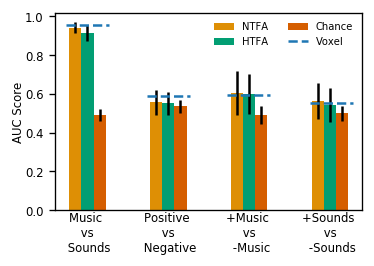

In [196]:
pl.rc('legend', frameon=False)
pl.rc('figure', figsize=( 1 * column_width, 
                          0.66 * column_width),
                dpi=120)
pl.rc('savefig', dpi=300)
pl.rc('font', size=7)

confidence = 0.95
voxel_mus_sounds_accuracies = np.mean(voxel_mus_sounds_summary_means)
voxel_mus_sounds_errs = stats.sem(voxel_mus_sounds_summary_means) * stats.t.ppf((1 + confidence) / 2, 
                                                                     len(voxel_mus_sounds_summary_means) - 1)
htfa_mus_sounds_accuracies = np.mean(htfa_mus_sounds_summary_means)
htfa_mus_sounds_errs = stats.sem(htfa_mus_sounds_summary_means) * stats.t.ppf((1 + confidence) / 2,
                                                                        len(htfa_mus_sounds_summary_means) - 1)
ntfa_mus_sounds_accuracies = np.mean(ntfa_mus_sounds_summary_means)
ntfa_mus_sounds_errs = stats.sem(ntfa_mus_sounds_summary_means) * stats.t.ppf((1 + confidence) / 2,
                                                                        len(ntfa_mus_sounds_summary_means) - 1)
dummy_mus_sounds_accuracies = np.mean(dummy_mus_sounds_summary_means)
dummy_mus_sounds_errs = stats.sem(dummy_mus_sounds_summary_means) * stats.t.ppf((1 + confidence) / 2,
                                                                        len(dummy_mus_sounds_summary_means) - 1)

voxel_pos_neg_accuracies = np.mean(voxel_pos_neg_summary_means)
voxel_pos_neg_errs = stats.sem(voxel_pos_neg_summary_means) * stats.t.ppf((1 + confidence) / 2, 
                                                                     len(voxel_pos_neg_summary_means) - 1)
htfa_pos_neg_accuracies = np.mean(htfa_pos_neg_summary_means)
htfa_pos_neg_errs = stats.sem(htfa_pos_neg_summary_means) * stats.t.ppf((1 + confidence) / 2,
                                                                        len(htfa_pos_neg_summary_means) - 1)
ntfa_pos_neg_accuracies = np.mean(ntfa_pos_neg_summary_means)
ntfa_pos_neg_errs = stats.sem(ntfa_pos_neg_summary_means) * stats.t.ppf((1 + confidence) / 2,
                                                                        len(ntfa_pos_neg_summary_means) - 1)
dummy_pos_neg_accuracies = np.mean(dummy_pos_neg_summary_means)
dummy_pos_neg_errs = stats.sem(dummy_pos_neg_summary_means) * stats.t.ppf((1 + confidence) / 2, 
                                                                          len(dummy_pos_neg_summary_means) - 1)
voxel_mus_accuracies = np.mean(voxel_mus_summary_means)
voxel_mus_errs = stats.sem(voxel_mus_summary_means) * stats.t.ppf((1 + confidence) / 2, 
                                                                     len(voxel_mus_summary_means) - 1)
htfa_mus_accuracies = np.mean(htfa_mus_summary_means)
htfa_mus_errs = stats.sem(htfa_mus_summary_means) * stats.t.ppf((1 + confidence) / 2,
                                                                        len(htfa_mus_summary_means) - 1)
ntfa_mus_accuracies = np.mean(ntfa_mus_summary_means)
ntfa_mus_errs = stats.sem(ntfa_mus_summary_means) * stats.t.ppf((1 + confidence) / 2,
                                                                        len(ntfa_mus_summary_means) - 1)
dummy_mus_accuracies = np.mean(dummy_mus_summary_means)
dummy_mus_errs = stats.sem(dummy_mus_summary_means) * stats.t.ppf((1 + confidence) / 2,
                                                                        len(dummy_mus_summary_means) - 1)

voxel_sounds_accuracies = np.mean(voxel_sounds_summary_means)
voxel_sounds_errs = stats.sem(voxel_sounds_summary_means) * stats.t.ppf((1 + confidence) / 2, 
                                                                     len(voxel_sounds_summary_means) - 1)
htfa_sounds_accuracies = np.mean(htfa_sounds_summary_means)
htfa_sounds_errs = stats.sem(htfa_sounds_summary_means) * stats.t.ppf((1 + confidence) / 2,
                                                                        len(htfa_sounds_summary_means) - 1)
ntfa_sounds_accuracies = np.mean(ntfa_sounds_summary_means)
ntfa_sounds_errs = stats.sem(ntfa_sounds_summary_means) * stats.t.ppf((1 + confidence) / 2,
                                                                        len(ntfa_sounds_summary_means) - 1)
dummy_sounds_accuracies = np.mean(dummy_sounds_summary_means)
dummy_sounds_errs = stats.sem(dummy_sounds_summary_means) * stats.t.ppf((1 + confidence) / 2,
                                                                        len(dummy_sounds_summary_means) - 1)

datasets = ['Music \n vs \n Sounds','Positive \n vs \n Negative',
            '+Music \n vs \n -Music','+Sounds \n vs \n -Sounds'] 

# datasets = ['Music v Sound','Positive v Negative',
#             '+Music v -Music','+Sounds v -Sounds'] 

voxel_accuracies = [voxel_mus_sounds_accuracies,voxel_pos_neg_accuracies,
                    voxel_mus_accuracies,voxel_sounds_accuracies]
voxel_errs = [voxel_mus_sounds_errs, voxel_pos_neg_errs, 
              voxel_mus_errs, voxel_sounds_errs]
htfa_accuracies = [htfa_mus_sounds_accuracies,htfa_pos_neg_accuracies,
                    htfa_mus_accuracies,htfa_sounds_accuracies]
htfa_errs = [htfa_mus_sounds_errs, htfa_pos_neg_errs, 
              htfa_mus_errs, htfa_sounds_errs]
ntfa_accuracies = [ntfa_mus_sounds_accuracies,ntfa_pos_neg_accuracies,
                    ntfa_mus_accuracies,ntfa_sounds_accuracies]
ntfa_errs = [ntfa_mus_sounds_errs, ntfa_pos_neg_errs, 
             ntfa_mus_errs, ntfa_sounds_errs]
dummy_accuracies = [dummy_mus_sounds_accuracies,dummy_pos_neg_accuracies,
                    dummy_mus_accuracies,dummy_sounds_accuracies] 
dummy_errs = [dummy_mus_sounds_errs, dummy_pos_neg_errs, 
             dummy_mus_errs, dummy_sounds_errs]
xs = np.arange(len(datasets))

colorblind_cycler = cycler(color=color_palette('colorblind'))
colorblind_colors = [c['color'] for c in colorblind_cycler]
muted_cycler = cycler(color=color_palette('bright'))
muted_colors = [c['color'] for c in muted_cycler]

bar_width = 0.15
fig = pl.figure()
ax = fig.add_subplot(111)
# voxel_bar = pl.bar(xs, height=voxel_accuracies, color=colorblind_colors[0], width=bar_width, yerr=voxel_errs)
ntfa_bar = pl.bar(xs + 0*bar_width, height=ntfa_accuracies, color=colorblind_colors[1], 
                  width=bar_width, yerr=ntfa_errs,label='NTFA')
htfa_bar = pl.bar(xs + 1*bar_width, height=htfa_accuracies, color=colorblind_colors[2], 
                  width=bar_width, yerr=htfa_errs,label='HTFA')
dummy_bar = pl.bar(xs + 2*bar_width, height=dummy_accuracies, color=colorblind_colors[3], 
                   width=bar_width, yerr=dummy_errs,label='Chance')
ax.axhline(voxel_accuracies[0],xmin=0.035,xmax=0.175,linestyle='dashed',label='Voxel')
ax.axhline(voxel_accuracies[1],xmin=0.30,xmax=0.44,linestyle='dashed')
ax.axhline(voxel_accuracies[2],xmin=0.56,xmax=0.70,linestyle='dashed')
ax.axhline(voxel_accuracies[3],xmin=0.83,xmax=0.97,linestyle='dashed')
handles, labels = ax.get_legend_handles_labels()
# labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
new_labels = ['NTFA','HTFA','Chance','Voxel']
new_handles = [handles[1],handles[2],handles[3],handles[0]]
# ax.set_xticks(xs+bar_width)
# pl.xticks(xs+0*bar_width, datasets)
# pl.xticks([0,1+bar_width,2+bar_width,3+bar_width], datasets)
ax.set_xticks(xs+1*bar_width)
ax.tick_params(axis='x',bottom=False,pad=-3)
ax.set_xticklabels(datasets)
pl.legend(new_handles, new_labels,ncol=2, prop={'size': 6})

pl.ylabel('AUC Score',labelpad=0)
pl.ylim(bottom=0,)
fig.savefig('lepping_svm_accuracies_ci.pdf')

In [173]:
from scipy.stats import pearsonr
from scipy.special import betainc
def corrcoef(matrix):
    r = np.corrcoef(matrix)
    rf = r[np.triu_indices(r.shape[0], 1)]
    df = matrix.shape[1] - 2
    ts = rf * rf * (df / (1 - rf * rf))
    pf = betainc(0.5 * df, 0.5, df / (df + ts))
    p = np.zeros(shape=r.shape)
    p[np.triu_indices(p.shape[0], 1)] = pf
    p[np.tril_indices(p.shape[0], -1)] = p.T[np.tril_indices(p.shape[0], -1)]
    p[np.diag_indices(p.shape[0])] = np.ones(p.shape[0])
    return r, p


In [174]:
### functional connectivity using NTFA ###

all_factor_centers = dtfa_hyperparams['factor_centers']['mu'].data.numpy()
all_factor_widths = np.exp(dtfa_hyperparams['factor_log_widths']['mu'].data.numpy())

negative_music_matrix = []
positive_music_matrix = []
negative_sounds_matrix = []
positive_sounds_matrix = []

all_matrix = []

negative_music_matrix_p = []
positive_music_matrix_p = []
negative_sounds_matrix_p = []
positive_sounds_matrix_p = []
all_matrix_p = []

for i in range(dtfa.num_blocks):
    r,p = corrcoef(all_weights_dtfa[i,:,:].T)
    p = p < 0.05
    all_matrix.append(r)
    all_matrix_p.append(p)
    if block_task_labeler(dtfa._blocks[i]) == 'negative_music':
        r,p = corrcoef(all_weights_dtfa[i,:,:].T)
        p = p < 0.05
        negative_music_matrix.append(r)
        negative_music_matrix_p.append(p)
    elif  block_task_labeler(dtfa._blocks[i]) == 'positive_music':
        r,p = corrcoef(all_weights_dtfa[i,:,:].T)
        p = p < 0.05
        positive_music_matrix.append(r)
        positive_music_matrix_p.append(p)
    elif  block_task_labeler(dtfa._blocks[i]) == 'negative_sounds':
        r,p = corrcoef(all_weights_dtfa[i,:,:].T)
        p = p < 0.05
        negative_sounds_matrix.append(r)
        negative_sounds_matrix_p.append(p)
    elif  block_task_labeler(dtfa._blocks[i]) == 'positive_sounds':
        r,p = corrcoef(all_weights_dtfa[i,:,:].T)
        p = p < 0.05
        positive_sounds_matrix.append(r)
        positive_sounds_matrix_p.append(p)
    else:
        print ('Something is WRONG!!!')

        
negative_music_matrix = np.array(negative_music_matrix)
positive_music_matrix = np.array(positive_music_matrix)
negative_sounds_matrix = np.array(negative_sounds_matrix)
positive_sounds_matrix = np.array(positive_sounds_matrix)

all_matrix = np.array(all_matrix)
        
negative_music_matrix_p = np.array(negative_music_matrix_p)
positive_music_matrix_p = np.array(positive_music_matrix_p)
negative_sounds_matrix_p = np.array(negative_sounds_matrix_p)
positive_sounds_matrix_p = np.array(positive_sounds_matrix_p)
all_matrix_p = np.array(all_matrix_p)

negative_music_matrix = negative_music_matrix * negative_music_matrix_p
positive_music_matrix = positive_music_matrix * positive_music_matrix_p
negative_sounds_matrix = negative_sounds_matrix * negative_sounds_matrix_p
positive_sounds_matrix = positive_sounds_matrix * positive_sounds_matrix_p

all_matrix = all_matrix  * all_matrix_p


all_vectors = np.zeros(shape=(all_matrix.shape[0],4950))
all_vectors_p = np.zeros(shape=(all_matrix_p.shape[0],4950))

for i in range(all_matrix.shape[0]):
    all_vectors[i,:] = distance.squareform(all_matrix[i,:,:],checks=False)
    all_vectors_p[i,:] = distance.squareform(all_matrix_p[i,:,:],checks=False)

negative_music_vectors = np.zeros(shape=(negative_music_matrix.shape[0],4950))
negative_music_vectors_p = np.zeros(shape=(negative_music_matrix_p.shape[0],4950))

for i in range(negative_music_matrix.shape[0]):
    negative_music_vectors[i,:] = distance.squareform(negative_music_matrix[i,:,:],checks=False)
    negative_music_vectors_p[i,:] = distance.squareform(negative_music_matrix_p[i,:,:],checks=False)

positive_music_vectors = np.zeros(shape=(positive_music_matrix.shape[0],4950))
positive_music_vectors_p = np.zeros(shape=(positive_music_matrix_p.shape[0],4950))

for i in range(positive_music_matrix.shape[0]):
    positive_music_vectors[i,:] = distance.squareform(positive_music_matrix[i,:,:],checks=False)
    positive_music_vectors_p[i,:] = distance.squareform(positive_music_matrix_p[i,:,:],checks=False)

    
negative_sounds_vectors = np.zeros(shape=(negative_sounds_matrix.shape[0],4950))
negative_sounds_vectors_p = np.zeros(shape=(negative_sounds_matrix_p.shape[0],4950))

for i in range(negative_sounds_matrix.shape[0]):
    negative_sounds_vectors[i,:] = distance.squareform(negative_sounds_matrix[i,:,:],checks=False)
    negative_sounds_vectors_p[i,:] = distance.squareform(negative_sounds_matrix_p[i,:,:],checks=False)
    
positive_sounds_vectors = np.zeros(shape=(positive_sounds_matrix.shape[0],4950))
positive_sounds_vectors_p = np.zeros(shape=(positive_sounds_matrix_p.shape[0],4950))

for i in range(negative_sounds_matrix.shape[0]):
    positive_sounds_vectors[i,:] = distance.squareform(positive_sounds_matrix[i,:,:],checks=False)
    positive_sounds_vectors_p[i,:] = distance.squareform(positive_sounds_matrix_p[i,:,:],checks=False)

    
negative_music_vectors_mean = negative_music_vectors.mean(0)
negative_music_vectors_std = negative_music_vectors.std(0)
positive_music_vectors_mean = positive_music_vectors.mean(0)
positive_music_vectors_std = positive_music_vectors.std(0)
negative_sounds_vectors_mean = negative_sounds_vectors.mean(0)
negative_sounds_vectors_std = negative_sounds_vectors.std(0)
positive_sounds_vectors_mean = positive_sounds_vectors.mean(0)
positive_sounds_vectors_std = positive_sounds_vectors.std(0)

In [175]:
### task classification using 3Fold CV on NTFA all tasks with FC###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
#             if i not in validation_blocks:
            block = dtfa._blocks[i]
            if block.subject == s:
                session_labels.append(block.run)
                data.append((all_vectors[i]))
                targets.append(task_labeler(block.task))
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                   session_labels=None, cv=cv,
                                                                   scoring="roc_auc",
                                                                   print_all=True)
    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())
    summary_subject_chance_means.append(np.array(overall_result_chance).mean())

print ('...')
category_result = {key:[] for key in ['negative_music','positive_music','positive_sounds','negative_sounds']}
for c in ['negative_music','positive_music','positive_sounds','negative_sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("NTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("NTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("NTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

print("Overall Dummy Mean/SE Score: %1.4f +- %1.4f" % (
np.array(summary_subject_chance_means).mean(),
stats.sem(summary_subject_chance_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_chance_means) - 1)))

ntfa_summary_result = summary_result
dummy_summary_result = summary_result_chance
ntfa_summary_means = summary_subject_means
dummy_summary_means = summary_subject_chance_means

Processing Subject control01
Processing negative_music
Scores: 0.1667 +- 0.2357
Chance Scores: 0.3750 +- 0.1021
Processing negative_sounds
Scores: 0.4583 +- 0.2125
Chance Scores: 0.5417 +- 0.1559
Processing positive_music
Scores: 0.4583 +- 0.1559
Chance Scores: 0.4583 +- 0.2125
Processing positive_sounds
Scores: 0.5833 +- 0.2357
Chance Scores: 0.6667 +- 0.2125
...
Overall Score: 0.4167 +- 0.2619
Overall Dummy Score: 0.5104 +- 0.2070


Processing Subject control02
Processing negative_music
Scores: 0.5417 +- 0.4125
Chance Scores: 0.5000 +- 0.1768
Processing negative_sounds
Scores: 0.9167 +- 0.1179
Chance Scores: 0.6667 +- 0.2357
Processing positive_music
Scores: 0.8750 +- 0.1768
Chance Scores: 0.5000 +- 0.1768
Processing positive_sounds
Scores: 0.5417 +- 0.4125
Chance Scores: 0.5833 +- 0.1179
...
Overall Score: 0.7188 +- 0.3577
Overall Dummy Score: 0.5625 +- 0.1943


Processing Subject control03
Processing negative_music
Scores: 0.0833 +- 0.1179
Chance Scores: 0.5000 +- 0.1021
Processing

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.5000 +- 0.4082
Chance Scores: 0.5833 +- 0.2357
Processing negative_sounds
Scores: 0.5000 +- 0.2041
Chance Scores: 0.6667 +- 0.2357
Processing positive_music
Scores: 0.7500 +- 0.2041
Chance Scores: 0.5000 +- 0.0000
Processing positive_sounds
Scores: 0.1250 +- 0.1768
Chance Scores: 0.5000 +- 0.1021
...
Overall Score: 0.4688 +- 0.3466
Overall Dummy Score: 0.5625 +- 0.1875


Processing Subject control05
Processing negative_music
Scores: 0.5417 +- 0.0589
Chance Scores: 0.6250 +- 0.2700
Processing negative_sounds
Scores: 0.4167 +- 0.1179
Chance Scores: 0.5000 +- 0.3062
Processing positive_music
Scores: 0.6250 +- 0.3062
Chance Scores: 0.3333 +- 0.1179
Processing positive_sounds
Scores: 0.2083 +- 0.1559
Chance Scores: 0.5417 +- 0.2357
...
Overall Score: 0.4479 +- 0.2418
Overall Dummy Score: 0.5000 +- 0.2652


Processing Subject control06
Processing negative_music
Scores: 0.6250 +- 0.1021
Chance Scores: 0.2917 +- 0.1559
Processing negative_sounds
Scores: 0.8750 +- 0.1768
Chance Scores

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.5000 +- 0.2041
Chance Scores: 0.7083 +- 0.1559
Processing positive_music
Scores: 0.5833 +- 0.1179
Chance Scores: 0.7083 +- 0.1559
Processing positive_sounds
Scores: 0.5000 +- 0.2041
Chance Scores: 0.6250 +- 0.2700
...
Overall Score: 0.5625 +- 0.1804
Overall Dummy Score: 0.6146 +- 0.2132


Processing Subject control08
Processing negative_music
Scores: 0.6111 +- 0.1964
Chance Scores: 0.3889 +- 0.0196
Processing negative_sounds
Scores: 0.0833 +- 0.1179
Chance Scores: 0.6667 +- 0.2125
Processing positive_music
Scores: 0.5000 +- 0.0000
Chance Scores: 0.4861 +- 0.2771
Processing positive_sounds
Scores: 0.5833 +- 0.1179
Chance Scores: 0.2778 +- 0.0393
...
Overall Score: 0.4444 +- 0.2485
Overall Dummy Score: 0.4549 +- 0.2266


Processing Subject control09
Processing negative_music
Scores: 0.1667 +- 0.1179
Chance Scores: 0.4167 +- 0.0589
Processing negative_sounds
Scores: 0.9167 +- 0.1179
Chance Scores: 0.4583 +- 0.0589
Processing positive_music
Scores: 0.8750 +- 0.1768
Chance Scores:

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.9583 +- 0.0589
Chance Scores: 0.6250 +- 0.1768
...
Overall Score: 0.7500 +- 0.2447
Overall Dummy Score: 0.5208 +- 0.1680


Processing Subject control11
Processing negative_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.4583 +- 0.2569
Processing negative_sounds
Scores: 0.8750 +- 0.1021
Chance Scores: 0.7083 +- 0.2357
Processing positive_music
Scores: 0.4583 +- 0.3281
Chance Scores: 0.3750 +- 0.1021
Processing positive_sounds
Scores: 0.8333 +- 0.1179
Chance Scores: 0.7083 +- 0.3281
...
Overall Score: 0.7500 +- 0.2748
Overall Dummy Score: 0.5625 +- 0.2864


Processing Subject control12
Processing negative_music
Scores: 0.2083 +- 0.1559
Chance Scores: 0.7083 +- 0.2569
Processing negative_sounds
Scores: 0.5417 +- 0.1559
Chance Scores: 0.7917 +- 0.2946
Processing positive_music
Scores: 0.3333 +- 0.3118
Chance Scores: 0.3750 +- 0.0000
Processing positive_sounds
Scores: 0.2500 +- 0.2041
Chance Scores: 0.3333 +- 0.0589
...
Overall Score: 0.3333 +- 0.2517
Overall Dummy Score: 0.5521 +

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.5833 +- 0.3118
Chance Scores: 0.7500 +- 0.1021
Processing negative_sounds
Scores: 0.7917 +- 0.2125
Chance Scores: 0.5417 +- 0.2569
Processing positive_music
Scores: 0.8333 +- 0.1179
Chance Scores: 0.4583 +- 0.1559
Processing positive_sounds
Scores: 0.7917 +- 0.2125
Chance Scores: 0.5000 +- 0.0000
...
Overall Score: 0.7500 +- 0.2447
Overall Dummy Score: 0.5625 +- 0.1943


Processing Subject control15
Processing negative_music
Scores: 0.5417 +- 0.4125
Chance Scores: 0.5417 +- 0.3281
Processing negative_sounds
Scores: 0.7083 +- 0.2125
Chance Scores: 0.8333 +- 0.0589
Processing positive_music
Scores: 0.7500 +- 0.0000
Chance Scores: 0.3333 +- 0.1179
Processing positive_sounds
Scores: 0.5833 +- 0.1179
Chance Scores: 0.5833 +- 0.2946
...
Overall Score: 0.6458 +- 0.2543
Overall Dummy Score: 0.5729 +- 0.2907


Processing Subject control16
Processing negative_music
Scores: 0.7917 +- 0.1559
Chance Scores: 0.2500 +- 0.1021
Processing negative_sounds
Scores: 0.8333 +- 0.1179
Chance Scores

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.6250 +- 0.3062
Chance Scores: 0.7083 +- 0.1559
Processing negative_sounds
Scores: 0.7500 +- 0.0000
Chance Scores: 0.7500 +- 0.2700
Processing positive_music
Scores: 0.5417 +- 0.3281
Chance Scores: 0.4583 +- 0.0589
Processing positive_sounds
Scores: 0.8750 +- 0.1021
Chance Scores: 0.6250 +- 0.1021
...
Overall Score: 0.6979 +- 0.2625
Overall Dummy Score: 0.6354 +- 0.2006


Processing Subject control18
Processing negative_music
Scores: 0.5000 +- 0.4082
Chance Scores: 0.5417 +- 0.2125
Processing negative_sounds
Scores: 0.7083 +- 0.2125
Chance Scores: 0.3750 +- 0.0000
Processing positive_music
Scores: 0.5417 +- 0.1559
Chance Scores: 0.4167 +- 0.1559
Processing positive_sounds
Scores: 0.6667 +- 0.2357
Chance Scores: 0.5417 +- 0.1559
...
Overall Score: 0.6042 +- 0.2834
Overall Dummy Score: 0.4688 +- 0.1702


Processing Subject control19
Processing negative_music
Scores: 0.5833 +- 0.1179
Chance Scores: 0.6250 +- 0.1021
Processing negative_sounds
Scores: 0.4583 +- 0.1559
Chance Scores

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.8333 +- 0.1179
Chance Scores: 0.4167 +- 0.0589
Processing negative_sounds
Scores: 0.7500 +- 0.2041
Chance Scores: 0.5000 +- 0.2041
Processing positive_music
Scores: 0.5833 +- 0.3118
Chance Scores: 0.5000 +- 0.3062
Processing positive_sounds
Scores: 0.7500 +- 0.2041
Chance Scores: 0.4583 +- 0.0589
...
Overall Score: 0.7292 +- 0.2384
Overall Dummy Score: 0.4688 +- 0.1918


Processing Subject mdd01
Processing negative_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.3750 +- 0.0000
Processing negative_sounds
Scores: 0.5833 +- 0.3118
Chance Scores: 0.3333 +- 0.1559
Processing positive_music
Scores: 0.7500 +- 0.3536
Chance Scores: 0.4167 +- 0.1559
Processing positive_sounds
Scores: 0.7500 +- 0.2041
Chance Scores: 0.5833 +- 0.3118
...
Overall Score: 0.7708 +- 0.2968
Overall Dummy Score: 0.4271 +- 0.2132


Processing Subject mdd02
Processing negative_music
Scores: 0.7083 +- 0.3281
Chance Scores: 0.4167 +- 0.0589
Processing negative_sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5833

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.3889 +- 0.4374
Chance Scores: 0.5417 +- 0.1559
Processing positive_music
Scores: 0.3611 +- 0.3492
Chance Scores: 0.4861 +- 0.1874
Processing positive_sounds
Scores: 0.4167 +- 0.3118
Chance Scores: 0.5833 +- 0.2125
...
Overall Score: 0.4583 +- 0.4160
Overall Dummy Score: 0.5590 +- 0.1772


Processing Subject mdd04
Processing negative_music
Scores: 0.2500 +- 0.2041
Chance Scores: 0.5833 +- 0.2125
Processing negative_sounds
Scores: 0.9167 +- 0.1179
Chance Scores: 0.5417 +- 0.0589
Processing positive_music
Scores: 0.7917 +- 0.2946
Chance Scores: 0.3750 +- 0.1021
Processing positive_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5833 +- 0.3118
...
Overall Score: 0.6979 +- 0.3441
Overall Dummy Score: 0.5208 +- 0.2155


Skipping Subject, not enough runs
Processing negative_music
Scores: 0.2500 +- 0.2041
Chance Scores: 0.4583 +- 0.1559
Processing negative_sounds
Scores: 0.9167 +- 0.1179
Chance Scores: 0.5417 +- 0.2357
Processing positive_music
Scores: 0.7917 +- 0.2946
Chance Scores

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.8333 +- 0.2357
Chance Scores: 0.5833 +- 0.2125
Processing positive_sounds
Scores: 0.6250 +- 0.1021
Chance Scores: 0.7500 +- 0.2041
...
Overall Score: 0.7396 +- 0.2524
Overall Dummy Score: 0.6042 +- 0.2215


Processing Subject mdd07
Processing negative_music
Scores: 0.5833 +- 0.1179
Chance Scores: 0.7083 +- 0.2569
Processing negative_sounds
Scores: 0.3333 +- 0.3118
Chance Scores: 0.5833 +- 0.2946
Processing positive_music
Scores: 0.3333 +- 0.3118
Chance Scores: 0.4583 +- 0.0589
Processing positive_sounds
Scores: 0.4167 +- 0.2357
Chance Scores: 0.4583 +- 0.2125
...
Overall Score: 0.4167 +- 0.2764
Overall Dummy Score: 0.5521 +- 0.2472


Processing Subject mdd08
Processing negative_music
Scores: 0.5417 +- 0.2125
Chance Scores: 0.4583 +- 0.0589
Processing negative_sounds
Scores: 0.5000 +- 0.0000
Chance Scores: 0.3333 +- 0.0589
Processing positive_music
Scores: 0.3333 +- 0.1179
Chance Scores: 0.2500 +- 0.1021
Processing positive_sounds
Scores: 0.2083 +- 0.0589
Chance Scores: 0.3750

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.9167 +- 0.1179
Chance Scores: 0.7500 +- 0.2041
...
Overall Score: 0.7917 +- 0.2062
Overall Dummy Score: 0.4583 +- 0.2301


Processing Subject mdd10
Processing negative_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.8333 +- 0.0589
Processing negative_sounds
Scores: 0.6250 +- 0.2700
Chance Scores: 0.3750 +- 0.0000
Processing positive_music
Scores: 0.6667 +- 0.1179
Chance Scores: 0.5000 +- 0.1768
Processing positive_sounds
Scores: 0.5000 +- 0.0000
Chance Scores: 0.4167 +- 0.0589
...
Overall Score: 0.6979 +- 0.2364
Overall Dummy Score: 0.5312 +- 0.2049


Processing Subject mdd11
Processing negative_music
Scores: 0.3333 +- 0.3118
Chance Scores: 0.6250 +- 0.1021
Processing negative_sounds
Scores: 0.4167 +- 0.3118
Chance Scores: 0.6250 +- 0.2700
Processing positive_music
Scores: 0.9167 +- 0.1179
Chance Scores: 0.5417 +- 0.2569
Processing positive_sounds
Scores: 0.1667 +- 0.1179
Chance Scores: 0.6667 +- 0.2357
...
Overall Score: 0.4583 +- 0.3656
Overall Dummy Score: 0.6146 +- 0.2308

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.7500 +- 0.3536
Chance Scores: 0.4583 +- 0.1559
Processing negative_sounds
Scores: 0.2500 +- 0.2041
Chance Scores: 0.3333 +- 0.1559
Processing positive_music
Scores: 0.3333 +- 0.2357
Chance Scores: 0.5417 +- 0.2569
Processing positive_sounds
Scores: 0.7500 +- 0.2041
Chance Scores: 0.4167 +- 0.0589
...
Overall Score: 0.5208 +- 0.3455
Overall Dummy Score: 0.4375 +- 0.1875


Processing Subject mdd14
Processing negative_music
Scores: 0.9167 +- 0.1179
Chance Scores: 0.4583 +- 0.0589
Processing negative_sounds
Scores: 0.4167 +- 0.1179
Chance Scores: 0.4167 +- 0.0589
Processing positive_music
Scores: 0.6667 +- 0.2357
Chance Scores: 0.7083 +- 0.2125
Processing positive_sounds
Scores: 0.5833 +- 0.3118
Chance Scores: 0.3750 +- 0.1021
...
Overall Score: 0.6458 +- 0.2787
Overall Dummy Score: 0.4896 +- 0.1801


Processing Subject mdd15
Processing negative_music
Scores: 0.9167 +- 0.1179
Chance Scores: 0.5417 +- 0.2569
Processing negative_sounds
Scores: 0.3333 +- 0.1179
Chance Scores: 0.4167

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.5833 +- 0.2357
Chance Scores: 0.4583 +- 0.1559
Processing positive_music
Scores: 0.1667 +- 0.1179
Chance Scores: 0.5000 +- 0.1021
Processing positive_sounds
Scores: 0.7083 +- 0.1559
Chance Scores: 0.5000 +- 0.1768
...
Overall Score: 0.5000 +- 0.3019
Overall Dummy Score: 0.4583 +- 0.1640


Processing Subject mdd17
Processing negative_music
Scores: 0.4583 +- 0.0589
Chance Scores: 0.4167 +- 0.0589
Processing negative_sounds
Scores: 0.6250 +- 0.1768
Chance Scores: 0.4583 +- 0.0589
Processing positive_music
Scores: 0.7917 +- 0.2946
Chance Scores: 0.4167 +- 0.1179
Processing positive_sounds
Scores: 0.7500 +- 0.2041
Chance Scores: 0.4583 +- 0.2125
...
Overall Score: 0.6562 +- 0.2400
Overall Dummy Score: 0.4375 +- 0.1301


Processing Subject mdd18
Processing negative_music
Scores: 0.9167 +- 0.1179
Chance Scores: 0.7500 +- 0.2700
Processing negative_sounds
Scores: 0.8333 +- 0.1179
Chance Scores: 0.5833 +- 0.2125
Processing positive_music
Scores: 0.5833 +- 0.3118
Chance Scores: 0.4583 

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.7083 +- 0.0589
Chance Scores: 0.3750 +- 0.1021
Processing positive_sounds
Scores: 0.8333 +- 0.1179
Chance Scores: 0.4583 +- 0.0589
...
Overall Score: 0.7500 +- 0.2932
Overall Dummy Score: 0.5312 +- 0.2400


...
NTFA Summary Score Across Subjects, For Category negative_music : 0.6011 +- 0.3316
NTFA Summary Score Across Subjects, For Category positive_music : 0.6278 +- 0.3017
NTFA Summary Score Across Subjects, For Category positive_sounds : 0.6453 +- 0.2996
NTFA Summary Score Across Subjects, For Category negative_sounds : 0.6328 +- 0.3049
...
NTFA Summary Score Across Subjects, Across Tasks: 0.6268 +- 0.3101
Overall Dummy Score: 0.5113 +- 0.2255
...
NTFA Summary Mean/SE, Across Tasks: 0.6268 +- 0.0448
Overall Dummy Mean/SE Score: 0.5113 +- 0.0200


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [176]:
### task classification using 3Fold CV on NTFA all tasks with FC with feature selection###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
feature_selection = SelectKBest(f_classif, k=500)
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
#             if i not in validation_blocks:
            block = dtfa._blocks[i]
            if block.subject == s:
                session_labels.append(block.run)
                data.append(np.arctanh(all_vectors[i]))
                targets.append(task_labeler(block.task))
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                   session_labels=None, cv=cv,
                                                                   scoring="roc_auc",feature_select=True,
                                                                   feature_selection=feature_selection,
                                                                   print_all=True)
    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())
    summary_subject_chance_means.append(np.array(overall_result_chance).mean())

print ('...')
category_result = {key:[] for key in ['negative_music','positive_music','positive_sounds','negative_sounds']}
for c in ['negative_music','positive_music','positive_sounds','negative_sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("NTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("NTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("NTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

print("Overall Dummy Mean/SE Score: %1.4f +- %1.4f" % (
np.array(summary_subject_chance_means).mean(),
stats.sem(summary_subject_chance_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_chance_means) - 1)))

ntfa_summary_result = summary_result
dummy_summary_result = summary_result_chance
ntfa_summary_means = summary_subject_means
dummy_summary_means = summary_subject_chance_means

Processing Subject control01
Processing negative_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.7500 +- 0.2041
Chance Scores: 0.6667 +- 0.2125
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.5833 +- 0.3118
Chance Scores: 0.4167 +- 0.1559
Processing positive_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    2 ... 4945 4946 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    2 ... 4939 4941 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

Scores: 0.5000 +- 0.0000
Chance Scores: 0.3750 +- 0.0000
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.5000 +- 0.2041
Chance Scores: 0.6250 +- 0.1768
...
Overall Score: 0.5833 +- 0.2357
Overall Dummy Score: 0.5208 +- 0.2031


Processing Subject control02
Processing negative_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    2 ... 4945 4946 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    2 ... 4939 4944 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.5833 +- 0.4249
Chance Scores: 0.6250 +- 0.1768
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.7083 +- 0.2125
Chance Scores: 0.5000 +- 0.2041
Processing positive_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.7083 +- 0.4125
Chance Scores: 0.2500 +- 0.1021
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    4    5 ... 4939 4941 4945] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    2    4 ... 4945 4946 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.3750 +- 0.1021
Chance Scores: 0.5833 +- 0.2125
...
Overall Score: 0.5938 +- 0.3466
Overall Dummy Score: 0.4896 +- 0.2308


Processing Subject control03
Processing negative_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.5833 +- 0.4249
Chance Scores: 0.3333 +- 0.0589
Processing negative_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.6667 +- 0.2357
Chance Scores: 0.5000 +- 0.1768
Processing positive_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    4    6 ... 4939 4941 4945] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    5   17 ... 4942 4944 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

Scores: 0.5833 +- 0.3118
Chance Scores: 0.3333 +- 0.1559
Processing positive_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.5000 +- 0.3536
Chance Scores: 0.5833 +- 0.2357
...
Overall Score: 0.5833 +- 0.3436
Overall Dummy Score: 0.4375 +- 0.2009


Processing Subject control04
Processing negative_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.5833 +- 0.4249
Chance Scores: 0.5000 +- 0.3680
Processing negative_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.6667 +- 0.2357
Chance Scores: 0.4167 +- 0.0589
Pr

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    4    5 ... 4940 4944 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    3    4 ... 4936 4938 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.5417 +- 0.2569
Chance Scores: 0.6250 +- 0.2041
...
Overall Score: 0.5729 +- 0.2816
Overall Dummy Score: 0.4792 +- 0.2384


Processing Subject control05
Processing negative_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.6667 +- 0.2357
Chance Scores: 0.5417 +- 0.2357
Processing negative_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.5417 +- 0.0589
Chance Scores: 0.5833 +- 0.2125
Processing positive_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    3    4 ... 4940 4941 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   6   12   14 ... 4941 4942 4944] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

Scores: 0.6667 +- 0.2357
Chance Scores: 0.4167 +- 0.1179
Processing positive_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.0833 +- 0.1179
Chance Scores: 0.4583 +- 0.0589
...
Overall Score: 0.4896 +- 0.2996
Overall Dummy Score: 0.5000 +- 0.1840


Processing Subject control06
Processing negative_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.4167 +- 0.2357
Chance Scores: 0.4167 +- 0.0589
Processing negative_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.4167 +- 0.1179
Pr

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   6   17   22 ... 4941 4942 4944] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    3    4 ... 4943 4944 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.5000 +- 0.2041
Chance Scores: 0.5417 +- 0.2569
Processing positive_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    7   10 ... 4937 4938 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2    7 ... 4946 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.2917 +- 0.1559
Chance Scores: 0.2917 +- 0.0589
...
Overall Score: 0.5104 +- 0.2907
Overall Dummy Score: 0.4167 +- 0.1718


Processing Subject control07
Processing negative_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.5000 +- 0.0000
Chance Scores: 0.6667 +- 0.1179
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.5000 +- 0.3536
Chance Scores: 0.6250 +- 0.2700
Processing positive_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    7 ... 4945 4946 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    3    4 ... 4939 4945 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.4167 +- 0.2357
Chance Scores: 0.4583 +- 0.0589
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.4583 +- 0.4125
Chance Scores: 0.6250 +- 0.1768
...
Overall Score: 0.4688 +- 0.2981
Overall Dummy Score: 0.5938 +- 0.1918


Processing Subject control08
Processing negative_music
TRAIN: [ 0  1  3  5  6  7 10 11 12 14] TEST: [ 2  4  8  9 13]
TRAIN: [ 1  2  4  5  6  7  8  9 10 13] TEST: [ 0  3 11 12 14]
TRAIN: [ 0  2  3  4  8  9 11 12 13 14] TEST: [ 1  5  6  7 10]
Scores: 0.4722 +- 0.3356
Chance Scores: 0.8750 +- 0.1021
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  9 10 11 13 14] TEST: [ 2  5  6  8 12]
TRAIN: [ 0  1  2  3  5  6  7  8 12 13] TEST: [ 4  9 10 11 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 14] TEST: [ 0  1  3  7 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    3    7 ... 4945 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    3    7 ... 4939 4945 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

Scores: 0.8333 +- 0.1179
Chance Scores: 0.6250 +- 0.2700
Processing positive_music
TRAIN: [ 1  2  3  6  7  8 11 12 13 14] TEST: [ 0  4  5  9 10]
TRAIN: [ 0  2  3  4  5  6  9 10 13 14] TEST: [ 1  7  8 11 12]
TRAIN: [ 0  1  4  5  7  8  9 10 11 12] TEST: [ 2  3  6 13 14]
Scores: 0.4167 +- 0.1179
Chance Scores: 0.5000 +- 0.3062
Processing positive_sounds
TRAIN: [ 0  2  3  6  7  8  9 11 13 14] TEST: [ 1  4  5 10 12]
TRAIN: [ 1  2  3  4  5  6  9 10 12 14] TEST: [ 0  7  8 11 13]
TRAIN: [ 0  1  4  5  7  8 10 11 12 13] TEST: [ 2  3  6  9 14]
Scores: 0.6667 +- 0.1179
Chance Scores: 0.3472 +- 0.0708
...
Overall Score: 0.5972 +- 0.2565
Overall Dummy Score: 0.5868 +- 0.2879


Processing Subject control09
Processing negative_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.5833 +- 0.3118
Chance Scores: 0.4167 +- 0.1559
Processing negative_s

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    6   12 ... 4938 4939 4943] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    4   13 ... 4938 4939 4943] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.5833 +- 0.2357
Chance Scores: 0.4167 +- 0.0589
Processing positive_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2   15 ... 4942 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    2 ... 4946 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

Scores: 0.7083 +- 0.4125
Chance Scores: 0.6250 +- 0.2700
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.5000 +- 0.4082
Chance Scores: 0.3750 +- 0.1021
...
Overall Score: 0.5938 +- 0.3577
Overall Dummy Score: 0.4583 +- 0.1932


Processing Subject control10
Processing negative_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.3333 +- 0.1179
Chance Scores: 0.7083 +- 0.2569
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.4583 +- 0.1559
Chance Scores: 0.6250 +- 0.2700
Pr

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2   15 ... 4942 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2   14 ... 4943 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.5417 +- 0.3584
Chance Scores: 0.4167 +- 0.1559
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.8750 +- 0.1021
Chance Scores: 0.5000 +- 0.1768
...
Overall Score: 0.5521 +- 0.2907
Overall Dummy Score: 0.5625 +- 0.2474


Processing Subject control11
Processing negative_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.6667 +- 0.4714
Chance Scores: 0.5833 +- 0.2125
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 1

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    4    8 ... 4942 4946 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2   29   32 ... 4946 4947 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.7500 +- 0.3536
Chance Scores: 0.5000 +- 0.2041
Processing positive_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.2917 +- 0.0589
Chance Scores: 0.3750 +- 0.1021
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.7500 +- 0.2041
Chance Scores: 0.5417 +- 0.2569
...
Overall Score: 0.6146 +- 0.3661
Overall Dummy Score: 0.5000 +- 0.2165


Processing Subject control12
Processing negative_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    4   11 ... 4941 4942 4945] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    3    7 ... 4937 4940 4941] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

Scores: 0.4167 +- 0.4249
Chance Scores: 0.5000 +- 0.2700
Processing negative_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.7500 +- 0.2041
Chance Scores: 0.3750 +- 0.0000
Processing positive_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.5417 +- 0.4125
Chance Scores: 0.4167 +- 0.0589
Processing positive_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.1667 +- 0.1179
Chance Scores: 0.5417 +- 0.2569
...
Overall Score: 0.4688 +- 0.3823
Overall Dummy Score: 0.4583 +- 0.1998


Processing Subject control13
Pr

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   5   12   13 ... 4943 4946 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  13   16   18 ... 4927 4936 4938] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.6667 +- 0.2357
Chance Scores: 0.2917 +- 0.1559
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.3750 +- 0.1021
Chance Scores: 0.4167 +- 0.3281
Processing positive_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   5    9   12 ... 4936 4937 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   9   14   37 ... 4929 4944 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.5833 +- 0.4249
Chance Scores: 0.2917 +- 0.1559
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.4583 +- 0.2569
Chance Scores: 0.3750 +- 0.1021
...
Overall Score: 0.5208 +- 0.3012
Overall Dummy Score: 0.3438 +- 0.2112


Processing Subject control14
Processing negative_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.5417 +- 0.2125
Chance Scores: 0.2917 +- 0.1559
Processing negative_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   7    9   14 ... 4921 4938 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   9   14   17 ... 4921 4944 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

Scores: 0.4167 +- 0.4249
Chance Scores: 0.4167 +- 0.1179
Processing positive_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.3333 +- 0.1179
Chance Scores: 0.5000 +- 0.1768
Processing positive_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.4167 +- 0.4249
Chance Scores: 0.3750 +- 0.1021
...
Overall Score: 0.4271 +- 0.3325
Overall Dummy Score: 0.3958 +- 0.1600


Processing Subject control15
Processing negative_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    4 ... 4934 4939 4942] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    4    5 ... 4939 4942 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

Scores: 0.5417 +- 0.3281
Chance Scores: 0.3333 +- 0.1559
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.5833 +- 0.3118
Chance Scores: 0.5000 +- 0.0000
Processing positive_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.5833 +- 0.2357
Chance Scores: 0.4167 +- 0.1559
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    2 ... 4937 4939 4942] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0   10   25 ... 4934 4935 4943] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

Scores: 0.5833 +- 0.1179
Chance Scores: 0.4167 +- 0.1179
...
Overall Score: 0.5729 +- 0.2625
Overall Dummy Score: 0.4167 +- 0.1382


Processing Subject control16
Processing negative_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.7083 +- 0.0589
Chance Scores: 0.7083 +- 0.1559
Processing negative_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.4167 +- 0.0589
Processing positive_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    3   15 ... 4934 4935 4943] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  10   25   36 ... 4935 4940 4943] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

Scores: 0.3750 +- 0.1021
Chance Scores: 0.4167 +- 0.0589
Processing positive_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.5417 +- 0.3584
Chance Scores: 0.6250 +- 0.3062
...
Overall Score: 0.6146 +- 0.2816
Overall Dummy Score: 0.5417 +- 0.2185


Processing Subject control17
Processing negative_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.5000 +- 0.4082
Chance Scores: 0.5000 +- 0.1021
Processing negative_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   4    6   18 ... 4942 4945 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   4    6   18 ... 4942 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

Scores: 0.6250 +- 0.3680
Chance Scores: 0.4167 +- 0.2125
Processing positive_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.6250 +- 0.3062
Chance Scores: 0.5000 +- 0.3680
Processing positive_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.7500 +- 0.3536
Chance Scores: 0.3750 +- 0.1021
...
Overall Score: 0.6250 +- 0.3715
Overall Dummy Score: 0.4479 +- 0.2308


Processing Subject control18
Processing negative_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    2    3 ... 4937 4939 4943] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    2 ... 4937 4939 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

Scores: 0.3333 +- 0.3118
Chance Scores: 0.8333 +- 0.2357
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.4583 +- 0.2569
Chance Scores: 0.4167 +- 0.2569
Processing positive_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.7083 +- 0.0589
Chance Scores: 0.3750 +- 0.1021
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.7083 +- 0.2357
...
Overall Score: 0.5833 +- 0.3076
Overall Dummy Score: 0.5833 +- 0.2902


Processing Subject control19
Pr

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    2    3 ... 4939 4942 4944] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2    3 ... 4937 4939 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

Scores: 0.7917 +- 0.2946
Chance Scores: 0.6250 +- 0.3062
Processing negative_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.4583 +- 0.2569
Chance Scores: 0.3750 +- 0.2041
Processing positive_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.9167 +- 0.1179
Chance Scores: 0.4167 +- 0.2357
Processing positive_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   6   16   18 ... 4944 4945 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    4    8 ... 4937 4938 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

Scores: 0.7917 +- 0.2946
Chance Scores: 0.6250 +- 0.2700
...
Overall Score: 0.7396 +- 0.3039
Overall Dummy Score: 0.5104 +- 0.2816


Processing Subject control20
Processing negative_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.4167 +- 0.2357
Chance Scores: 0.5000 +- 0.0000
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.5417 +- 0.1559
Chance Scores: 0.4583 +- 0.0589
Processing positive_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    5    6 ... 4941 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    3    5 ... 4939 4945 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

Scores: 0.4583 +- 0.2569
Chance Scores: 0.5000 +- 0.1768
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.5000 +- 0.3536
Chance Scores: 0.4167 +- 0.0589
...
Overall Score: 0.4792 +- 0.2643
Overall Dummy Score: 0.4688 +- 0.1036


Processing Subject mdd01
Processing negative_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.6667 +- 0.4714
Chance Scores: 0.8333 +- 0.1179
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.3333 +- 0.1179
Chance Scores: 0.4583 +- 0.0589
Proces

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2    3 ... 4939 4942 4945] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2    3 ... 4942 4945 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The

TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.8750 +- 0.1021
Chance Scores: 0.3333 +- 0.1559
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.5000 +- 0.4082
Chance Scores: 0.5417 +- 0.3281
...
Overall Score: 0.5938 +- 0.3789
Overall Dummy Score: 0.5417 +- 0.2668


Processing Subject mdd02
Processing negative_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.5000 +- 0.3536
Chance Scores: 0.5833 +- 0.2125
Processing negative_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   6   18   23 ... 4944 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  10   15   17 ... 4942 4944 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.5833 +- 0.3118
Chance Scores: 0.5417 +- 0.2569
Processing positive_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.2500 +- 0.2041
Chance Scores: 0.6667 +- 0.2357
Processing positive_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.6667 +- 0.3118
Chance Scores: 0.5417 +- 0.0589
...
Overall Score: 0.5000 +- 0.3385
Overall Dummy Score: 0.5833 +- 0.2125


Processing Subject mdd03
Processing negative_music
TRAIN: [ 1  2  3  6  7  8 11 12 13 14] TEST: [ 0  4  5  9 10]
TRAIN: [ 0  2  3  4  5  6  9 10 13 14] TEST: [ 1  7  8 11 12]
TRAIN: [ 0  1  4  5  7  8  9 10 11 12] TEST: [ 2  3  6 13 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   5    9   13 ... 4937 4942 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   5    7   12 ... 4942 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

Scores: 0.3333 +- 0.4714
Chance Scores: 0.5000 +- 0.2041
Processing negative_sounds
TRAIN: [ 0  2  3  6  7  8  9 11 13 14] TEST: [ 1  4  5 10 12]
TRAIN: [ 1  2  3  4  5  6  9 10 12 14] TEST: [ 0  7  8 11 13]
TRAIN: [ 0  1  4  5  7  8 10 11 12 13] TEST: [ 2  3  6  9 14]
Scores: 0.5556 +- 0.4157
Chance Scores: 0.3611 +- 0.0196
Processing positive_music
TRAIN: [ 0  1  3  5  6  7 10 11 12 14] TEST: [ 2  4  8  9 13]
TRAIN: [ 1  2  4  5  6  7  8  9 10 13] TEST: [ 0  3 11 12 14]
TRAIN: [ 0  2  3  4  8  9 11 12 13 14] TEST: [ 1  5  6  7 10]
Scores: 0.2500 +- 0.2041
Chance Scores: 0.6944 +- 0.2187
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  9 10 11 13 14] TEST: [ 2  5  6  8 12]
TRAIN: [ 0  1  2  3  5  6  7  8 12 13] TEST: [ 4  9 10 11 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 14] TEST: [ 0  1  3  7 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    4    5 ... 4945 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    5    7 ... 4927 4942 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

Scores: 0.4167 +- 0.4249
Chance Scores: 0.5833 +- 0.3118
...
Overall Score: 0.3889 +- 0.4087
Overall Dummy Score: 0.5347 +- 0.2482


Processing Subject mdd04
Processing negative_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.6667 +- 0.1179
Chance Scores: 0.3333 +- 0.0589
Processing negative_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.1250 +- 0.1021
Chance Scores: 0.5000 +- 0.1768
Processing positive_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.8750 +- 0.1768
Chance Scores: 0.7083 +- 0.1559
Process

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    5    8 ... 4941 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    3    5 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.1250 +- 0.1021
Chance Scores: 0.5417 +- 0.2569
Processing positive_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.8750 +- 0.1768
Chance Scores: 0.5833 +- 0.2946
Processing positive_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.5000 +- 0.4082
Chance Scores: 0.7500 +- 0.1768
...
Overall Score: 0.5417 +- 0.3620
Overall Dummy Score: 0.5833 +- 0.2465


Processing Subject mdd06
Processing negative_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    5    8 ... 4945 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    5    6 ... 4942 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.3333 +- 0.3118
Chance Scores: 0.6250 +- 0.2700
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.3333 +- 0.2357
Chance Scores: 0.3333 +- 0.0589
Processing positive_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.6250 +- 0.3680
Chance Scores: 0.7500 +- 0.2700
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   7    8    9 ... 4944 4947 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   7    9   14 ... 4942 4947 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

Scores: 0.4167 +- 0.2357
Chance Scores: 0.7083 +- 0.0589
...
Overall Score: 0.4271 +- 0.3165
Overall Dummy Score: 0.6042 +- 0.2543


Processing Subject mdd07
Processing negative_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.3750 +- 0.3062
Chance Scores: 0.3750 +- 0.1768
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.7500 +- 0.2041
Chance Scores: 0.6250 +- 0.1768
Processing positive_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.5833 +- 0.2357
Chance Scores: 0.2500 +- 0.1021
Process

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    7   11 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    2    3 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.8750 +- 0.1021
Chance Scores: 0.3750 +- 0.0000
...
Overall Score: 0.6458 +- 0.2924
Overall Dummy Score: 0.4062 +- 0.1918


Processing Subject mdd08
Processing negative_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.5833 +- 0.1179
Chance Scores: 0.3333 +- 0.0589
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.8333 +- 0.1179
Chance Scores: 0.6250 +- 0.2700
Processing positive_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    2 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    3    7 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.6250 +- 0.2700
Chance Scores: 0.4583 +- 0.1559
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.3333 +- 0.3118
Chance Scores: 0.4583 +- 0.0589
...
Overall Score: 0.5938 +- 0.2847
Overall Dummy Score: 0.4688 +- 0.1918


Processing Subject mdd09
Processing negative_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.4167 +- 0.2357
Chance Scores: 0.4167 +- 0.1559
Processing negative_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   7    8   20 ... 4940 4942 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    3    8 ... 4942 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

Scores: 0.5417 +- 0.3584
Chance Scores: 0.3750 +- 0.1021
Processing positive_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.7083 +- 0.4125
Chance Scores: 0.2917 +- 0.0589
Processing positive_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.6667 +- 0.3118
Chance Scores: 0.4583 +- 0.2125
...
Overall Score: 0.5833 +- 0.3548
Overall Dummy Score: 0.3854 +- 0.1569


Processing Subject mdd10
Processing negative_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.6667 +- 0.4714
Chance Scores: 0.3333 +- 0.1559
Process

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    8   10 ... 4944 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    3    5 ... 4944 4945 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.5417 +- 0.4125
Chance Scores: 0.4583 +- 0.3584
Processing positive_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.6250 +- 0.2700
Chance Scores: 0.5417 +- 0.3281
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.6250 +- 0.2700
Chance Scores: 0.4167 +- 0.0589
...
Overall Score: 0.6146 +- 0.3696
Overall Dummy Score: 0.4375 +- 0.2676


Processing Subject mdd11
Processing negative_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    6 ... 4943 4944 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    6   10 ... 4944 4946 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.1667 +- 0.1179
Chance Scores: 0.2917 +- 0.1179
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.5833 +- 0.1179
Chance Scores: 0.6667 +- 0.2125
Processing positive_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.5833 +- 0.4249
Chance Scores: 0.5000 +- 0.1768
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3   10   11 ... 4927 4929 4934] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  10   11   24 ... 4927 4929 4944] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

Scores: 0.5833 +- 0.3118
Chance Scores: 0.6250 +- 0.2700
...
Overall Score: 0.4792 +- 0.3301
Overall Dummy Score: 0.5208 +- 0.2491


Processing Subject mdd12
Processing negative_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    3    4 ... 4940 4945 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.4167 +- 0.1179
Chance Scores: 0.3750 +- 0.1021
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.5417 +- 0.3584
Chance Scores: 0.5833 +- 0.2125
Processing positive_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.2500 +- 0.2041
Chance Scores: 0.5417 +- 0.2569
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    3    6 ... 4943 4945 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    3    6 ... 4942 4944 4945] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.5000 +- 0.3536
Chance Scores: 0.5000 +- 0.1768
...
Overall Score: 0.4271 +- 0.2996
Overall Dummy Score: 0.5000 +- 0.2104


Processing Subject mdd13
Processing negative_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.5000 +- 0.4082
Chance Scores: 0.5833 +- 0.3118
Processing negative_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.7500 +- 0.2041
Chance Scores: 0.2500 +- 0.1021
Processing positive_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    3    6 ... 4942 4945 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    5    6 ... 4941 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

Scores: 0.2917 +- 0.3281
Chance Scores: 0.3333 +- 0.0589
Processing positive_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.5833 +- 0.1179
Chance Scores: 0.6667 +- 0.1179
...
Overall Score: 0.5312 +- 0.3312
Overall Dummy Score: 0.4583 +- 0.2465


Processing Subject mdd14
Processing negative_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.6250 +- 0.3680
Chance Scores: 0.4167 +- 0.1179
Processing negative_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.7083 +- 0.2125
Chance Scores: 0.4583 +- 0.2125
Proces

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    2    3 ... 4944 4945 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2    4 ... 4945 4946 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.7083 +- 0.2125
Chance Scores: 0.5417 +- 0.3281
Processing positive_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.5833 +- 0.3118
Chance Scores: 0.4583 +- 0.0589
...
Overall Score: 0.6562 +- 0.2892
Overall Dummy Score: 0.4688 +- 0.2112


Processing Subject mdd15
Processing negative_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.7917 +- 0.2946
Chance Scores: 0.7500 +- 0.2041
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  22   24   29 ... 4939 4940 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    6   12 ... 4946 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.1667 +- 0.2357
Chance Scores: 0.5000 +- 0.3536
Processing positive_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.5417 +- 0.3584
Chance Scores: 0.3333 +- 0.0589
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.2500 +- 0.2041
Chance Scores: 0.6250 +- 0.2700
...
Overall Score: 0.4375 +- 0.3733
Overall Dummy Score: 0.5521 +- 0.2907


Processing Subject mdd16
Processing negative_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   8   10   11 ... 4943 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   8   11   17 ... 4946 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.6667 +- 0.2357
Chance Scores: 0.4583 +- 0.1179
Processing negative_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.4167 +- 0.3118
Chance Scores: 0.4167 +- 0.2357
Processing positive_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.2083 +- 0.2946
Chance Scores: 0.6667 +- 0.2357
Processing positive_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    8   10 ... 4943 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   8   11   17 ... 4944 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.4583 +- 0.4125
Chance Scores: 0.5417 +- 0.0589
...
Overall Score: 0.4375 +- 0.3590
Overall Dummy Score: 0.5208 +- 0.2031


Processing Subject mdd17
Processing negative_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.3750 +- 0.1768
Chance Scores: 0.5417 +- 0.2569
Processing negative_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.5000 +- 0.2041
Chance Scores: 0.5000 +- 0.3062
Processing positive_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    6   10 ... 4940 4942 4945] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   5   14   23 ... 4942 4946 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The

TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.7500 +- 0.3536
Chance Scores: 0.6250 +- 0.2700
...
Overall Score: 0.6042 +- 0.3180
Overall Dummy Score: 0.5521 +- 0.2575


Processing Subject mdd18
Processing negative_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.2500 +- 0.3536
Chance Scores: 0.5000 +- 0.3536
Processing negative_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.2917 +- 0.1559
Processing positive_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    7    9 ... 4941 4942 4945] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    3   16 ... 4942 4945 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.6250 +- 0.4449
Chance Scores: 0.5417 +- 0.2125
Processing positive_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.4167 +- 0.4249
Chance Scores: 0.5417 +- 0.2569
...
Overall Score: 0.5312 +- 0.4334
Overall Dummy Score: 0.4688 +- 0.2754


Processing Subject mdd19
Processing negative_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.5833 +- 0.4249
Chance Scores: 0.6250 +- 0.2700
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2   10 ... 4944 4946 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2    7 ... 4944 4946 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

Scores: 0.5000 +- 0.4082
Chance Scores: 0.3333 +- 0.1179
Processing positive_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.5000 +- 0.2041
Chance Scores: 0.2917 +- 0.0589
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.5833 +- 0.3118
Chance Scores: 0.4167 +- 0.0589
...
Overall Score: 0.5417 +- 0.3511
Overall Dummy Score: 0.4167 +- 0.1998


...
NTFA Summary Score Across Subjects, For Category negative_music : 0.5292 +- 0.3473
NTFA Summary Score Across Subjects, For Category positive_music : 0.5577 +- 0.3303
NTFA Summary Score Across Subjects, For Category positive_sounds : 0.5331 +- 0.3495
NTFA Summary Score Across Subjects, For Category negativ

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [179]:
### functional connectivity using HTFA ###
negative_music_matrix = []
positive_music_matrix = []
negative_sounds_matrix = []
positive_sounds_matrix = []

all_matrix = []

negative_music_matrix_p = []
positive_music_matrix_p = []
negative_sounds_matrix_p = []
positive_sounds_matrix_p = []
all_matrix_p = []

for i in range(htfa.num_blocks):
    r,p = corrcoef(all_weights_htfa[i,:,:].T)
    p = p < 0.05
    all_matrix.append(r)
    all_matrix_p.append(p)
    if block_task_labeler(htfa._blocks[i]) == 'negative_music':
        r,p = corrcoef(all_weights_htfa[i,:,:].T)
        p = p < 0.05
        negative_music_matrix.append(r)
        negative_music_matrix_p.append(p)
    elif  block_task_labeler(htfa._blocks[i]) == 'positive_music':
        r,p = corrcoef(all_weights_htfa[i,:,:].T)
        p = p < 0.05
        positive_music_matrix.append(r)
        positive_music_matrix_p.append(p)
    elif  block_task_labeler(htfa._blocks[i]) == 'negative_sounds':
        r,p = corrcoef(all_weights_htfa[i,:,:].T)
        p = p < 0.05
        negative_sounds_matrix.append(r)
        negative_sounds_matrix_p.append(p)
    elif  block_task_labeler(htfa._blocks[i]) == 'positive_sounds':
        r,p = corrcoef(all_weights_htfa[i,:,:].T)
        p = p < 0.05
        positive_sounds_matrix.append(r)
        positive_sounds_matrix_p.append(p)
    else:
        print ('Something is WRONG!!!')

        
negative_music_matrix = np.array(negative_music_matrix)
positive_music_matrix = np.array(positive_music_matrix)
negative_sounds_matrix = np.array(negative_sounds_matrix)
positive_sounds_matrix = np.array(positive_sounds_matrix)

all_matrix = np.array(all_matrix)
        
negative_music_matrix_p = np.array(negative_music_matrix_p)
positive_music_matrix_p = np.array(positive_music_matrix_p)
negative_sounds_matrix_p = np.array(negative_sounds_matrix_p)
positive_sounds_matrix_p = np.array(positive_sounds_matrix_p)
all_matrix_p = np.array(all_matrix_p)

negative_music_matrix = negative_music_matrix * negative_music_matrix_p
positive_music_matrix = positive_music_matrix * positive_music_matrix_p
negative_sounds_matrix = negative_sounds_matrix * negative_sounds_matrix_p
positive_sounds_matrix = positive_sounds_matrix * positive_sounds_matrix_p

all_matrix = all_matrix * all_matrix_p


all_vectors = np.zeros(shape=(all_matrix.shape[0],4950))
all_vectors_p = np.zeros(shape=(all_matrix_p.shape[0],4950))

for i in range(all_matrix.shape[0]):
    all_vectors[i,:] = distance.squareform(all_matrix[i,:,:],checks=False)
    all_vectors_p[i,:] = distance.squareform(all_matrix_p[i,:,:],checks=False)

negative_music_vectors = np.zeros(shape=(negative_music_matrix.shape[0],4950))
negative_music_vectors_p = np.zeros(shape=(negative_music_matrix_p.shape[0],4950))

for i in range(negative_music_matrix.shape[0]):
    negative_music_vectors[i,:] = distance.squareform(negative_music_matrix[i,:,:],checks=False)
    negative_music_vectors_p[i,:] = distance.squareform(negative_music_matrix_p[i,:,:],checks=False)

positive_music_vectors = np.zeros(shape=(positive_music_matrix.shape[0],4950))
positive_music_vectors_p = np.zeros(shape=(positive_music_matrix_p.shape[0],4950))

for i in range(positive_music_matrix.shape[0]):
    positive_music_vectors[i,:] = distance.squareform(positive_music_matrix[i,:,:],checks=False)
    positive_music_vectors_p[i,:] = distance.squareform(positive_music_matrix_p[i,:,:],checks=False)

    
negative_sounds_vectors = np.zeros(shape=(negative_sounds_matrix.shape[0],4950))
negative_sounds_vectors_p = np.zeros(shape=(negative_sounds_matrix_p.shape[0],4950))

for i in range(negative_sounds_matrix.shape[0]):
    negative_sounds_vectors[i,:] = distance.squareform(negative_sounds_matrix[i,:,:],checks=False)
    negative_sounds_vectors_p[i,:] = distance.squareform(negative_sounds_matrix_p[i,:,:],checks=False)
    
positive_sounds_vectors = np.zeros(shape=(positive_sounds_matrix.shape[0],4950))
positive_sounds_vectors_p = np.zeros(shape=(positive_sounds_matrix_p.shape[0],4950))

for i in range(negative_sounds_matrix.shape[0]):
    positive_sounds_vectors[i,:] = distance.squareform(positive_sounds_matrix[i,:,:],checks=False)
    positive_sounds_vectors_p[i,:] = distance.squareform(positive_sounds_matrix_p[i,:,:],checks=False)

    
negative_music_vectors_mean = negative_music_vectors.mean(0)
negative_music_vectors_std = negative_music_vectors.std(0)
positive_music_vectors_mean = positive_music_vectors.mean(0)
positive_music_vectors_std = positive_music_vectors.std(0)
negative_sounds_vectors_mean = negative_sounds_vectors.mean(0)
negative_sounds_vectors_std = negative_sounds_vectors.std(0)
positive_sounds_vectors_mean = positive_sounds_vectors.mean(0)
positive_sounds_vectors_std = positive_sounds_vectors.std(0)

In [180]:
### task classification using 3Fold CV on HTFA all tasks###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
subjects = OrderedSet([b.subject for b in htfa._blocks])
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(htfa.num_blocks):
#             if i not in validation_blocks:
            block = htfa._blocks[i]
            if block.subject == s:
                session_labels.append(block.run)
                data.append(all_vectors[i])
                targets.append(block_task_labeler(block))
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                   session_labels=None, cv=cv,
                                                                   scoring="roc_auc",
                                                                   print_all=True)
    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())

print ('...')
category_result = {key:[] for key in ['negative_music','positive_music','positive_sounds','negative_sounds']}
for c in ['negative_music','positive_music','positive_sounds','negative_sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("HTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("HTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("HTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

htfa_summary_result = summary_result
htfa_summary_means = summary_subject_means

Processing Subject control01
Processing negative_music
Scores: 0.0833 +- 0.1179
Chance Scores: 0.7083 +- 0.2569
Processing negative_sounds
Scores: 0.7500 +- 0.0000
Chance Scores: 0.7083 +- 0.3281
Processing positive_music
Scores: 0.7500 +- 0.2041
Chance Scores: 0.6250 +- 0.3680
Processing positive_sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5833 +- 0.1179
...
Overall Score: 0.6458 +- 0.3602
Overall Dummy Score: 0.6562 +- 0.2892


Processing Subject control02
Processing negative_music
Scores: 0.0833 +- 0.1179
Chance Scores: 0.5000 +- 0.3062
Processing negative_sounds
Scores: 0.4167 +- 0.1179
Chance Scores: 0.4167 +- 0.1559
Processing positive_music
Scores: 0.7500 +- 0.2041
Chance Scores: 0.3750 +- 0.1021
Processing positive_sounds
Scores: 0.4167 +- 0.1179
Chance Scores: 0.4583 +- 0.0589
...
Overall Score: 0.4167 +- 0.2764
Overall Dummy Score: 0.4375 +- 0.1875


Processing Subject control03
Processing negative_music
Scores: 0.8750 +- 0.1021
Chance Scores: 0.4583 +- 0.2946
Processing

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.8750 +- 0.1768
Chance Scores: 0.5833 +- 0.2125
Processing negative_sounds
Scores: 0.6667 +- 0.2357
Chance Scores: 0.4167 +- 0.0589
Processing positive_music
Scores: 0.6250 +- 0.2700
Chance Scores: 0.6667 +- 0.2569
Processing positive_sounds
Scores: 0.2500 +- 0.2041
Chance Scores: 0.5000 +- 0.1021
...
Overall Score: 0.6042 +- 0.3180
Overall Dummy Score: 0.5417 +- 0.1998


Processing Subject control05
Processing negative_music
Scores: 0.5000 +- 0.4082
Chance Scores: 0.4167 +- 0.1559
Processing negative_sounds
Scores: 0.4583 +- 0.2125
Chance Scores: 0.4583 +- 0.1179
Processing positive_music
Scores: 0.6667 +- 0.3118
Chance Scores: 0.4167 +- 0.0589
Processing positive_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0.6667 +- 0.2569
...
Overall Score: 0.6146 +- 0.3364
Overall Dummy Score: 0.4896 +- 0.1940


Processing Subject control06
Processing negative_music
Scores: 0.6667 +- 0.1179
Chance Scores: 0.5417 +- 0.1559
Processing negative_sounds
Scores: 0.9167 +- 0.1179
Chance Scores

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.8333 +- 0.1179
Chance Scores: 0.5000 +- 0.1021
Processing positive_music
Scores: 0.5000 +- 0.4082
Chance Scores: 0.2917 +- 0.0589
Processing positive_sounds
Scores: 0.0833 +- 0.1179
Chance Scores: 0.6250 +- 0.2700
...
Overall Score: 0.3542 +- 0.4013
Overall Dummy Score: 0.4688 +- 0.2289


Processing Subject control08
Processing negative_music
Scores: 0.8889 +- 0.1571
Chance Scores: 0.4583 +- 0.3864
Processing negative_sounds
Scores: 0.0000 +- 0.0000
Chance Scores: 0.4167 +- 0.1179
Processing positive_music
Scores: 0.6944 +- 0.3216
Chance Scores: 0.6250 +- 0.1768
Processing positive_sounds
Scores: 0.5278 +- 0.3747
Chance Scores: 0.4861 +- 0.1195
...
Overall Score: 0.5278 +- 0.4199
Overall Dummy Score: 0.4965 +- 0.2414


Processing Subject control09
Processing negative_music
Scores: 0.8750 +- 0.1768
Chance Scores: 0.5417 +- 0.2357
Processing negative_sounds
Scores: 0.5833 +- 0.3118
Chance Scores: 0.4167 +- 0.0589
Processing positive_music
Scores: 0.2917 +- 0.0589
Chance Scores:

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.9583 +- 0.0589
Chance Scores: 0.5417 +- 0.1559
...
Overall Score: 0.7396 +- 0.2996
Overall Dummy Score: 0.5104 +- 0.1940


Processing Subject control11
Processing negative_music
Scores: 0.4167 +- 0.3118
Chance Scores: 0.5000 +- 0.0000
Processing negative_sounds
Scores: 0.8333 +- 0.1179
Chance Scores: 0.3750 +- 0.1021
Processing positive_music
Scores: 0.2083 +- 0.1559
Chance Scores: 0.2500 +- 0.0000
Processing positive_sounds
Scores: 0.9167 +- 0.1179
Chance Scores: 0.4583 +- 0.0589
...
Overall Score: 0.5938 +- 0.3503
Overall Dummy Score: 0.3958 +- 0.1122


Processing Subject control12
Processing negative_music
Scores: 0.6250 +- 0.2700
Chance Scores: 0.6667 +- 0.2125
Processing negative_sounds
Scores: 0.9167 +- 0.1179
Chance Scores: 0.4583 +- 0.1179
Processing positive_music
Scores: 0.6667 +- 0.3118
Chance Scores: 0.5417 +- 0.1559
Processing positive_sounds
Scores: 0.9167 +- 0.1179
Chance Scores: 0.4583 +- 0.2946
...
Overall Score: 0.7812 +- 0.2608
Overall Dummy Score: 0.5312 +

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.8333 +- 0.1179
Chance Scores: 0.4583 +- 0.0589
Processing negative_sounds
Scores: 0.7083 +- 0.2125
Chance Scores: 0.3750 +- 0.1021
Processing positive_music
Scores: 0.5000 +- 0.0000
Chance Scores: 0.6250 +- 0.2041
Processing positive_sounds
Scores: 0.2500 +- 0.0000
Chance Scores: 0.5417 +- 0.2125
...
Overall Score: 0.5729 +- 0.2524
Overall Dummy Score: 0.5000 +- 0.1840


Processing Subject control15
Processing negative_music
Scores: 0.5417 +- 0.4125
Chance Scores: 0.4167 +- 0.0589
Processing negative_sounds
Scores: 0.1250 +- 0.1021
Chance Scores: 0.6250 +- 0.2700
Processing positive_music
Scores: 0.7500 +- 0.0000
Chance Scores: 0.4583 +- 0.2125
Processing positive_sounds
Scores: 0.1667 +- 0.1179
Chance Scores: 0.4583 +- 0.1559
...
Overall Score: 0.3958 +- 0.3417
Overall Dummy Score: 0.4896 +- 0.2070


Processing Subject control16
Processing negative_music
Scores: 0.8333 +- 0.1179
Chance Scores: 0.5833 +- 0.2125
Processing negative_sounds
Scores: 1.0000 +- 0.0000
Chance Scores

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.5417 +- 0.3281
Chance Scores: 0.3333 +- 0.0589
Processing positive_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5000 +- 0.1021
Processing positive_sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.3750 +- 0.1021
...
Overall Score: 0.6146 +- 0.4065
Overall Dummy Score: 0.3542 +- 0.1334


Processing Subject control18
Processing negative_music
Scores: 0.7917 +- 0.2946
Chance Scores: 0.5000 +- 0.1768
Processing negative_sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.3536
Processing positive_music
Scores: 0.5833 +- 0.1179
Chance Scores: 0.4167 +- 0.1179
Processing positive_sounds
Scores: 0.5417 +- 0.2125
Chance Scores: 0.5417 +- 0.3281
...
Overall Score: 0.7292 +- 0.2643
Overall Dummy Score: 0.4896 +- 0.2674


Processing Subject control19
Processing negative_music
Scores: 0.6250 +- 0.1021
Chance Scores: 0.3750 +- 0.1021
Processing negative_sounds
Scores: 0.7917 +- 0.0589
Chance Scores: 0.4167 +- 0.0589
Processing positive_music
Scores: 0.5000 +- 0.2041
Chance Scores:

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.2500 +- 0.2041
Chance Scores: 0.5833 +- 0.1179
Processing positive_sounds
Scores: 0.4167 +- 0.1179
Chance Scores: 0.5833 +- 0.2125
...
Overall Score: 0.4583 +- 0.2619
Overall Dummy Score: 0.5312 +- 0.2232


Processing Subject mdd01
Processing negative_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.7083 +- 0.2569
Processing negative_sounds
Scores: 0.9167 +- 0.1179
Chance Scores: 0.7917 +- 0.1179
Processing positive_music
Scores: 0.8750 +- 0.1768
Chance Scores: 0.3333 +- 0.0589
Processing positive_sounds
Scores: 0.6667 +- 0.1179
Chance Scores: 0.2917 +- 0.1559
...
Overall Score: 0.8646 +- 0.1727
Overall Dummy Score: 0.5312 +- 0.2754


Processing Subject mdd02
Processing negative_music
Scores: 0.5000 +- 0.2041
Chance Scores: 0.5833 +- 0.2125
Processing negative_sounds
Scores: 0.4167 +- 0.3118
Chance Scores: 0.6250 +- 0.1021
Processing positive_music
Scores: 0.9167 +- 0.1179
Chance Scores: 0.5417 +- 0.2569
Processing positive_sounds
Scores: 0.9583 +- 0.0589
Chance Scores: 0.4167

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Processing negative_music
Scores: 0.3750 +- 0.2700
Chance Scores: 0.6250 +- 0.2700
Processing negative_sounds
Scores: 0.6667 +- 0.2357
Chance Scores: 0.6250 +- 0.2041
Processing positive_music
Scores: 0.7917 +- 0.1559
Chance Scores: 0.3333 +- 0.1179
Processing positive_sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.3333 +- 0.1559
...
Overall Score: 0.7083 +- 0.2990
Overall Dummy Score: 0.4792 +- 0.2438


Skipping Subject, not enough runs
Processing negative_music
Scores: 0.3750 +- 0.2700
Chance Scores: 0.6667 +- 0.2125
Processing negative_sounds
Scores: 0.6667 +- 0.2357
Chance Scores: 0.3750 +- 0.1768
Processing positive_music
Scores: 0.7917 +- 0.1559
Chance Scores: 0.6250 +- 0.2700
Processing positive_sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.1021
...
Overall Score: 0.7083 +- 0.2990
Overall Dummy Score: 0.5417 +- 0.2301


Processing Subject mdd06
Processing negative_music
Scores: 0.3750 +- 0.1021
Chance Scores: 0.6250 +- 0.2700
Processing negative_sounds
Scores: 0.6

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.9583 +- 0.0589
Chance Scores: 0.5417 +- 0.2569
Processing negative_sounds
Scores: 0.4583 +- 0.2125
Chance Scores: 0.5833 +- 0.1179
Processing positive_music
Scores: 0.3750 +- 0.3680
Chance Scores: 0.5833 +- 0.1179
Processing positive_sounds
Scores: 0.2500 +- 0.2041
Chance Scores: 0.4167 +- 0.2357
...
Overall Score: 0.5104 +- 0.3589
Overall Dummy Score: 0.5312 +- 0.2049


Processing Subject mdd08
Processing negative_music
Scores: 0.3333 +- 0.2357
Chance Scores: 0.4583 +- 0.2946
Processing negative_sounds
Scores: 0.0417 +- 0.0589
Chance Scores: 0.4167 +- 0.0589
Processing positive_music
Scores: 0.7917 +- 0.2125
Chance Scores: 0.4583 +- 0.0589
Processing positive_sounds
Scores: 0.5000 +- 0.0000
Chance Scores: 0.8333 +- 0.1179
...
Overall Score: 0.4167 +- 0.3160
Overall Dummy Score: 0.5417 +- 0.2357


Processing Subject mdd09
Processing negative_music
Scores: 0.9167 +- 0.1179
Chance Scores: 0.4167 +- 0.3281
Processing negative_sounds
Scores: 0.7500 +- 0.3536
Chance Scores: 0.5417

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.9167 +- 0.1179
Chance Scores: 0.5417 +- 0.1559
Processing positive_music
Scores: 0.7083 +- 0.1559
Chance Scores: 0.2917 +- 0.1559
Processing positive_sounds
Scores: 0.3333 +- 0.1179
Chance Scores: 0.4583 +- 0.1179
...
Overall Score: 0.7188 +- 0.2706
Overall Dummy Score: 0.4167 +- 0.1792


Processing Subject mdd11
Processing negative_music
Scores: 0.5833 +- 0.4249
Chance Scores: 0.4583 +- 0.2946
Processing negative_sounds
Scores: 0.4583 +- 0.4125
Chance Scores: 0.3750 +- 0.1021
Processing positive_music
Scores: 0.7083 +- 0.2125
Chance Scores: 0.4167 +- 0.0589
Processing positive_sounds
Scores: 0.2500 +- 0.2041
Chance Scores: 0.5000 +- 0.1768
...
Overall Score: 0.5000 +- 0.3715
Overall Dummy Score: 0.4375 +- 0.1875


Processing Subject mdd12
Processing negative_music
Scores: 0.9167 +- 0.1179
Chance Scores: 0.3333 +- 0.1179
Processing negative_sounds
Scores: 0.7500 +- 0.2041
Chance Scores: 0.5833 +- 0.1179
Processing positive_music
Scores: 0.7500 +- 0.2041
Chance Scores: 0.5000 

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.7917 +- 0.0589
Chance Scores: 0.5417 +- 0.2569
Processing positive_sounds
Scores: 0.7083 +- 0.2125
Chance Scores: 0.5833 +- 0.1179
...
Overall Score: 0.7083 +- 0.2902
Overall Dummy Score: 0.5417 +- 0.1640


Processing Subject mdd14
Processing negative_music
Scores: 0.8333 +- 0.1179
Chance Scores: 0.6250 +- 0.1768
Processing negative_sounds
Scores: 0.9167 +- 0.1179
Chance Scores: 0.3750 +- 0.1021
Processing positive_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4167 +- 0.1179
Processing positive_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0.3750 +- 0.1768
...
Overall Score: 0.8958 +- 0.1600
Overall Dummy Score: 0.4479 +- 0.1801


Processing Subject mdd15
Processing negative_music
Scores: 0.2083 +- 0.2125
Chance Scores: 0.3333 +- 0.1559
Processing negative_sounds
Scores: 0.6667 +- 0.3118
Chance Scores: 0.5000 +- 0.1768
Processing positive_music
Scores: 0.9167 +- 0.1179
Chance Scores: 0.4583 +- 0.1559
Processing positive_sounds
Scores: 0.9583 +- 0.0589
Chance Scores: 0.5833

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.9167 +- 0.1179
Chance Scores: 0.5417 +- 0.2357
...
Overall Score: 0.6146 +- 0.3516
Overall Dummy Score: 0.4688 +- 0.2289


Processing Subject mdd17
Processing negative_music
Scores: 0.6667 +- 0.1179
Chance Scores: 0.6250 +- 0.2700
Processing negative_sounds
Scores: 0.6667 +- 0.1179
Chance Scores: 0.3750 +- 0.1021
Processing positive_music
Scores: 0.7083 +- 0.2125
Chance Scores: 0.7917 +- 0.1559
Processing positive_sounds
Scores: 0.7500 +- 0.2041
Chance Scores: 0.4167 +- 0.0589
...
Overall Score: 0.6979 +- 0.1727
Overall Dummy Score: 0.5521 +- 0.2364


Processing Subject mdd18
Processing negative_music
Scores: 0.7500 +- 0.2041
Chance Scores: 0.5833 +- 0.2125
Processing negative_sounds
Scores: 0.9167 +- 0.1179
Chance Scores: 0.4583 +- 0.0589
Processing positive_music
Scores: 0.7917 +- 0.2125
Chance Scores: 0.2500 +- 0.1768
Processing positive_sounds
Scores: 0.7083 +- 0.2125
Chance Scores: 0.5833 +- 0.2125
...
Overall Score: 0.7917 +- 0.2062
Overall Dummy Score: 0.4688 +- 0.2232

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

In [181]:
### task classification using 3Fold CV on HTFA all tasks with feature selection###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
subjects = OrderedSet([b.subject for b in htfa._blocks])
feature_selection = SelectKBest(f_classif, k=500)

for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(htfa.num_blocks):
#             if i not in validation_blocks:
            block = htfa._blocks[i]
            if block.subject == s:
                session_labels.append(block.run)
                data.append(np.arctanh(all_vectors[i]))
                targets.append(block_task_labeler(block))
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                   session_labels=None, cv=cv,
                                                                   scoring="roc_auc",feature_select=True,
                                                                   feature_selection=feature_selection,
                                                                   print_all=True)
    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())

print ('...')
category_result = {key:[] for key in ['negative_music','positive_music','positive_sounds','negative_sounds']}
for c in ['negative_music','positive_music','positive_sounds','negative_sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("HTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("HTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("HTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

htfa_summary_result = summary_result
htfa_summary_means = summary_subject_means

Processing Subject control01
Processing negative_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.5000 +- 0.4082
Chance Scores: 0.5000 +- 0.2041
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.7500 +- 0.2041
Chance Scores: 0.4167 +- 0.1179
Processing positive_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    5    8 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    3    5 ... 4944 4946 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

Scores: 0.8333 +- 0.1179
Chance Scores: 0.4583 +- 0.1179
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.5833 +- 0.4249
Chance Scores: 0.6667 +- 0.2569
...
Overall Score: 0.6667 +- 0.3436
Overall Dummy Score: 0.5104 +- 0.2070


Processing Subject control02
Processing negative_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.3333 +- 0.3118
Chance Scores: 0.5417 +- 0.2569
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    5    8 ... 4944 4946 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    3    5 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.7500 +- 0.2041
Chance Scores: 0.5417 +- 0.1559
Processing positive_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.7083 +- 0.4125
Chance Scores: 0.7083 +- 0.2569
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.2917 +- 0.1559
Chance Scores: 0.6667 +- 0.2125
...
Overall Score: 0.5208 +- 0.3566
Overall Dummy Score: 0.6146 +- 0.2364


Processing Subject control03
Processing negative_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2   11   12 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    5    7 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.6667 +- 0.3118
Chance Scores: 0.7500 +- 0.2041
Processing negative_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.4583 +- 0.3281
Chance Scores: 0.4583 +- 0.0589
Processing positive_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.4583 +- 0.4125
Chance Scores: 0.6250 +- 0.2700
Processing positive_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    5    6 ... 4943 4945 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    4    6 ... 4941 4943 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

Scores: 0.5000 +- 0.4082
Chance Scores: 0.5417 +- 0.2357
...
Overall Score: 0.5208 +- 0.3779
Overall Dummy Score: 0.5938 +- 0.2345


Processing Subject control04
Processing negative_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.4583 +- 0.0589
Processing negative_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   5    7    9 ... 4946 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    7   10 ... 4938 4942 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

Scores: 0.8333 +- 0.1179
Chance Scores: 0.7083 +- 0.1179
Processing positive_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.6667 +- 0.4714
Chance Scores: 0.4583 +- 0.1179
Processing positive_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.5417 +- 0.3864
Chance Scores: 0.5833 +- 0.3118
...
Overall Score: 0.7188 +- 0.3540
Overall Dummy Score: 0.5521 +- 0.2070


Processing Subject control05
Processing negative_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.3750 +- 0.3062
Chance Scores: 0.3750 +- 0.1021
Pro

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   7   10   11 ... 4946 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   5    7    9 ... 4939 4942 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.4167 +- 0.3118
Chance Scores: 0.3333 +- 0.1179
Processing positive_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.5833 +- 0.2357
Chance Scores: 0.3333 +- 0.1179
Processing positive_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.1667 +- 0.2357
Chance Scores: 0.7083 +- 0.2125
...
Overall Score: 0.3854 +- 0.3123
Overall Dummy Score: 0.4375 +- 0.2135


Processing Subject control06
Processing negative_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    2    4 ... 4942 4943 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    2 ... 4943 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.5833 +- 0.2357
Chance Scores: 0.4583 +- 0.1559
Processing negative_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.9583 +- 0.0589
Chance Scores: 0.5417 +- 0.1559
Processing positive_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.5417 +- 0.3584
Chance Scores: 0.6667 +- 0.2569
Processing positive_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    6    9 ... 4947 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   4   11   19 ... 4945 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.2917 +- 0.1559
Chance Scores: 0.2500 +- 0.0000
...
Overall Score: 0.5938 +- 0.3312
Overall Dummy Score: 0.4792 +- 0.2273


Processing Subject control07
Processing negative_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.3333 +- 0.4714
Chance Scores: 0.4167 +- 0.1179
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   5    8   10 ... 4941 4942 4944] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   5   35   55 ... 4938 4941 4942] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.5417 +- 0.4125
Chance Scores: 0.5833 +- 0.2946
Processing positive_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.5000 +- 0.3536
Chance Scores: 0.5833 +- 0.2125
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.5833 +- 0.3118
Chance Scores: 0.3750 +- 0.1021
...
Overall Score: 0.4896 +- 0.4033
Overall Dummy Score: 0.4896 +- 0.2192


Processing Subject control08
Processing negative_music
TRAIN: [ 0  1  3  5  6  7 10 11 12 14] TEST: [ 2  4  8  9 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    4   12 ... 4935 4941 4943] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   4    8   11 ... 4941 4943 4945] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

TRAIN: [ 1  2  4  5  6  7  8  9 10 13] TEST: [ 0  3 11 12 14]
TRAIN: [ 0  2  3  4  8  9 11 12 13 14] TEST: [ 1  5  6  7 10]
Scores: 0.7778 +- 0.3143
Chance Scores: 0.6111 +- 0.2051
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  9 10 11 13 14] TEST: [ 2  5  6  8 12]
TRAIN: [ 0  1  2  3  5  6  7  8 12 13] TEST: [ 4  9 10 11 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 14] TEST: [ 0  1  3  7 13]
Scores: 0.7500 +- 0.2041
Chance Scores: 0.2917 +- 0.0589
Processing positive_music
TRAIN: [ 1  2  3  6  7  8 11 12 13 14] TEST: [ 0  4  5  9 10]
TRAIN: [ 0  2  3  4  5  6  9 10 13 14] TEST: [ 1  7  8 11 12]
TRAIN: [ 0  1  4  5  7  8  9 10 11 12] TEST: [ 2  3  6 13 14]
Scores: 0.5278 +- 0.3356
Chance Scores: 0.6667 +- 0.3118
Processing positive_sounds
TRAIN: [ 0  2  3  6  7  8  9 11 13 14] TEST: [ 1  4  5 10 12]
TRAIN: [ 1  2  3  4  5  6  9 10 12 14] TEST: [ 0  7  8 11 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    4    8 ... 4941 4943 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   4   10   12 ... 4943 4944 4945] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

TRAIN: [ 0  1  4  5  7  8 10 11 12 13] TEST: [ 2  3  6  9 14]
Scores: 0.8611 +- 0.1039
Chance Scores: 0.6667 +- 0.1179
...
Overall Score: 0.7292 +- 0.2849
Overall Dummy Score: 0.5590 +- 0.2520


Processing Subject control09
Processing negative_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.7500 +- 0.3536
Chance Scores: 0.6667 +- 0.1559
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.2917 +- 0.0589
Chance Scores: 0.5000 +- 0.1021
Processing positive_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2   23   27 ... 4942 4943 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    7 ... 4943 4944 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.7500 +- 0.2041
Chance Scores: 0.6667 +- 0.2569
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.3333 +- 0.3118
Chance Scores: 0.3750 +- 0.1021
...
Overall Score: 0.5312 +- 0.3390
Overall Dummy Score: 0.5521 +- 0.2070


Processing Subject control10
Processing negative_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.6667 +- 0.3118
Chance Scores: 0.4167 +- 0.0589
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   5    9   15 ... 4930 4935 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    5   14 ... 4941 4944 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5000 +- 0.1021
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.4167 +- 0.3118
Chance Scores: 0.5000 +- 0.1768
Processing positive_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.2500 +- 0.2041
Chance Scores: 0.3750 +- 0.1021
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1   10   17 ... 4947 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    3    6 ... 4944 4945 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

Scores: 0.6667 +- 0.4714
Chance Scores: 0.4583 +- 0.0589
...
Overall Score: 0.5417 +- 0.3931
Overall Dummy Score: 0.4583 +- 0.1284


Processing Subject control12
Processing negative_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.4167 +- 0.2357
Chance Scores: 0.5833 +- 0.2946
Processing negative_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.7083 +- 0.4125
Chance Scores: 0.3750 +- 0.1021
Processing positive_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.3750 +- 0.3062
Chance Scores: 0.4583 +- 0.1559
Pro

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    2    5 ... 4940 4941 4944] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    2    5 ... 4940 4944 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.7500 +- 0.3536
Chance Scores: 0.3750 +- 0.1768
...
Overall Score: 0.5625 +- 0.3733
Overall Dummy Score: 0.4479 +- 0.2132


Processing Subject control13
Processing negative_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.7500 +- 0.3536
Chance Scores: 0.3750 +- 0.1021
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.5000 +- 0.0000
Chance Scores: 0.5833 +- 0.1559
Processing positive_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    2    5 ... 4940 4944 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    2    5 ... 4944 4946 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.5000 +- 0.3536
Chance Scores: 0.3750 +- 0.0000
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.4583 +- 0.3281
Chance Scores: 0.5000 +- 0.2041
...
Overall Score: 0.5521 +- 0.3206
Overall Dummy Score: 0.4583 +- 0.1640


Processing Subject control14
Processing negative_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.7083 +- 0.2569
Chance Scores: 0.4583 +- 0.0589
Processing negative_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    8   10 ... 4942 4944 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    5    7 ... 4936 4938 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.2917 +- 0.2125
Chance Scores: 0.4167 +- 0.0589
Processing positive_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.6250 +- 0.3680
Chance Scores: 0.3750 +- 0.1021
Processing positive_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.3750 +- 0.3680
Chance Scores: 0.4167 +- 0.1179
...
Overall Score: 0.5000 +- 0.3536
Overall Dummy Score: 0.4167 +- 0.0932


Processing Subject control15
Processing negative_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    3    5 ... 4944 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    3    5 ... 4942 4943 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.5417 +- 0.3281
Chance Scores: 0.6250 +- 0.2700
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.6667 +- 0.4714
Chance Scores: 0.3750 +- 0.1021
Processing positive_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.7083 +- 0.2569
Chance Scores: 0.6667 +- 0.1559
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    8   10 ... 4946 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0   17   18 ... 4946 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

Scores: 0.4583 +- 0.1559
Chance Scores: 0.4167 +- 0.1179
...
Overall Score: 0.5938 +- 0.3390
Overall Dummy Score: 0.5208 +- 0.2155


Processing Subject control16
Processing negative_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.6250 +- 0.3680
Chance Scores: 0.4583 +- 0.1559
Processing negative_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.5417 +- 0.3584
Chance Scores: 0.3750 +- 0.0000
Processing positive_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    2 ... 4947 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    5   12 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The

Scores: 0.9583 +- 0.0589
Chance Scores: 0.3750 +- 0.1021
Processing positive_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.3750 +- 0.4449
Chance Scores: 0.5417 +- 0.1559
...
Overall Score: 0.6250 +- 0.4018
Overall Dummy Score: 0.4375 +- 0.1398


Processing Subject control17
Processing negative_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.2083 +- 0.2946
Chance Scores: 0.5833 +- 0.2125
Processing negative_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.4167 +- 0.2357
Chance Scores: 0.5417 +- 0.1559
Pr

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   5    7   10 ... 4946 4947 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    2    6 ... 4943 4946 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.4583 +- 0.2125
Chance Scores: 0.3750 +- 0.0000
Processing positive_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.6250 +- 0.3680
Chance Scores: 0.6250 +- 0.2700
...
Overall Score: 0.4271 +- 0.3206
Overall Dummy Score: 0.5312 +- 0.2112


Processing Subject control18
Processing negative_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.7500 +- 0.2041
Chance Scores: 0.7083 +- 0.1559
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 1

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1   17 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1   23 ... 4947 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The

TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.7500 +- 0.3536
Chance Scores: 0.4583 +- 0.2125
Processing positive_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.6250 +- 0.4449
Chance Scores: 0.4583 +- 0.1179
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.4167 +- 0.2357
Chance Scores: 0.4583 +- 0.1179
...
Overall Score: 0.6354 +- 0.3516
Overall Dummy Score: 0.5208 +- 0.1898


Processing Subject control19
Processing negative_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    3    5 ... 4941 4945 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   4    5    6 ... 4942 4945 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

Scores: 0.6667 +- 0.2357
Chance Scores: 0.6250 +- 0.2700
Processing negative_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.4167 +- 0.2357
Chance Scores: 0.6250 +- 0.2700
Processing positive_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.5000 +- 0.3536
Chance Scores: 0.6250 +- 0.2700
Processing positive_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.4167 +- 0.1179
Chance Scores: 0.4167 +- 0.0589
...
Overall Score: 0.5000 +- 0.2700
Overall Dummy Score: 0.5729 +- 0.2524


Processing Subject control20
Pr

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    3    5 ... 4941 4945 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    4    5 ... 4943 4945 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.2500 +- 0.2041
Chance Scores: 0.4167 +- 0.1179
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.6667 +- 0.3118
Chance Scores: 0.3750 +- 0.1021
Processing positive_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.4167 +- 0.4249
Chance Scores: 0.6250 +- 0.1768
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    3 ... 4944 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    2 ... 4944 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.5417 +- 0.2125
Chance Scores: 0.3750 +- 0.2041
...
Overall Score: 0.4688 +- 0.3390
Overall Dummy Score: 0.4479 +- 0.1872


Processing Subject mdd01
Processing negative_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.6667 +- 0.4714
Chance Scores: 0.4167 +- 0.0589
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.3750 +- 0.1768
Chance Scores: 0.4167 +- 0.1179
Processing positive_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    8    9 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    9   10 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

Scores: 0.8333 +- 0.2357
Chance Scores: 0.9583 +- 0.0589
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.7083 +- 0.2125
Chance Scores: 0.4583 +- 0.2125
...
Overall Score: 0.6458 +- 0.3417
Overall Dummy Score: 0.5625 +- 0.2627


Processing Subject mdd02
Processing negative_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.6667 +- 0.3118
Chance Scores: 0.8333 +- 0.0589
Processing negative_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.2500 +- 0.2041
Chance Scores: 0.3750 +- 0.1021
Proces

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    4    5 ... 4942 4945 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    4   15 ... 4941 4942 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.9167 +- 0.1179
Chance Scores: 0.2917 +- 0.0589
Processing positive_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.4167 +- 0.2357
Chance Scores: 0.4583 +- 0.0589
...
Overall Score: 0.5625 +- 0.3404
Overall Dummy Score: 0.4896 +- 0.2192


Processing Subject mdd03
Processing negative_music
TRAIN: [ 1  2  3  6  7  8 11 12 13 14] TEST: [ 0  4  5  9 10]
TRAIN: [ 0  2  3  4  5  6  9 10 13 14] TEST: [ 1  7  8 11 12]
TRAIN: [ 0  1  4  5  7  8  9 10 11 12] TEST: [ 2  3  6 13 14]
Scores: 0.3333 +- 0.4714
Chance Scores: 0.5278 +- 0.1712
Processing negative_sounds
TRAIN: [ 0  2  3  6  7  8  9 11 13 14] TEST: [ 1  4  5 10 12]
TRAIN: [ 1  2  3  4  5  6  9 10 12 14] TEST: [ 0  7  8 11 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   4    5    8 ... 4934 4941 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   4    5    6 ... 4935 4938 4942] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

TRAIN: [ 0  1  4  5  7  8 10 11 12 13] TEST: [ 2  3  6  9 14]
Scores: 0.3056 +- 0.2750
Chance Scores: 0.4861 +- 0.1874
Processing positive_music
TRAIN: [ 0  1  3  5  6  7 10 11 12 14] TEST: [ 2  4  8  9 13]
TRAIN: [ 1  2  4  5  6  7  8  9 10 13] TEST: [ 0  3 11 12 14]
TRAIN: [ 0  2  3  4  8  9 11 12 13 14] TEST: [ 1  5  6  7 10]
Scores: 0.2778 +- 0.2079
Chance Scores: 0.3333 +- 0.1179
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  9 10 11 13 14] TEST: [ 2  5  6  8 12]
TRAIN: [ 0  1  2  3  5  6  7  8 12 13] TEST: [ 4  9 10 11 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 14] TEST: [ 0  1  3  7 13]
Scores: 0.5000 +- 0.2041
Chance Scores: 0.3333 +- 0.0589
...
Overall Score: 0.3542 +- 0.3212
Overall Dummy Score: 0.4201 +- 0.1679


Processing Subject mdd04
Processing negative_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    5 ... 4944 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1   10 ... 4944 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

Scores: 0.6667 +- 0.3118
Chance Scores: 0.4583 +- 0.2125
Processing negative_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.4167 +- 0.3118
Chance Scores: 0.3750 +- 0.1021
Processing positive_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.9167 +- 0.1179
Chance Scores: 0.3750 +- 0.0000
Processing positive_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.7083 +- 0.4125
Chance Scores: 0.5417 +- 0.3281
...
Overall Score: 0.6771 +- 0.3552
Overall Dummy Score: 0.4375 +- 0.2135


Skipping Subject, not enough ru

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1   10   16 ... 4944 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1   10   15 ... 4944 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.6667 +- 0.3118
Chance Scores: 0.7917 +- 0.1559
Processing negative_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.4167 +- 0.3118
Chance Scores: 0.3333 +- 0.0589
Processing positive_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.9167 +- 0.1179
Chance Scores: 0.5000 +- 0.1021
Processing positive_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.7083 +- 0.4125
Chance Sc

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1   10   16 ... 4946 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    5   10 ... 4944 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.0833 +- 0.1179
Chance Scores: 0.5833 +- 0.2357
Processing positive_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.6667 +- 0.3118
Chance Scores: 0.3333 +- 0.0589
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.3333 +- 0.1179
Chance Scores: 0.7083 +- 0.2125
...
Overall Score: 0.3542 +- 0.2787
Overall Dummy Score: 0.6146 +- 0.2722


Processing Subject mdd07
Processing negative_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    3    5 ... 4945 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    5 ... 4943 4945 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

Scores: 0.5417 +- 0.3281
Chance Scores: 0.2917 +- 0.0589
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.5000 +- 0.2041
Chance Scores: 0.5417 +- 0.2569
Processing positive_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.2500 +- 0.2041
Chance Scores: 0.7083 +- 0.3281
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.3333 +- 0.2357
Chance Scores: 0.5000 +- 0.2700
...
Overall Score: 0.4062 +- 0.2754
Overall Dummy Score: 0.5104 +- 0.2907


Processing Subject mdd08
Proces

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    4    5 ... 4942 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    4    5 ... 4940 4941 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.4167 +- 0.3118
Chance Scores: 0.6250 +- 0.1768
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.3750 +- 0.1021
Chance Scores: 0.3750 +- 0.0000
Processing positive_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.3333 +- 0.3118
Chance Scores: 0.6250 +- 0.1768
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    5   12 ... 4940 4941 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  11   15   18 ... 4922 4926 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.6667 +- 0.3118
Chance Scores: 0.3750 +- 0.1021
...
Overall Score: 0.4479 +- 0.3039
Overall Dummy Score: 0.5000 +- 0.1840


Processing Subject mdd09
Processing negative_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.5000 +- 0.2041
Chance Scores: 0.6667 +- 0.2569
Processing negative_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.2500 +- 0.0000
Chance Scores: 0.4167 +- 0.0589
Processing positive_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   4   11   15 ... 4934 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    6    9 ... 4944 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

Scores: 0.7500 +- 0.3536
Chance Scores: 0.6250 +- 0.1021
Processing positive_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.7500 +- 0.3536
Chance Scores: 0.5000 +- 0.1768
...
Overall Score: 0.5625 +- 0.3404
Overall Dummy Score: 0.5521 +- 0.1940


Processing Subject mdd10
Processing negative_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.7500 +- 0.3536
Chance Scores: 0.6667 +- 0.2125
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5833 +- 0.2946
Proces

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   6    8   10 ... 4942 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   6    9   10 ... 4942 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.4167 +- 0.3118
Chance Scores: 0.5417 +- 0.1559
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.2917 +- 0.4125
Chance Scores: 0.7083 +- 0.1559
...
Overall Score: 0.5729 +- 0.4033
Overall Dummy Score: 0.6250 +- 0.2224


Processing Subject mdd11
Processing negative_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.4167 +- 0.1179
Chance Scores: 0.2917 +- 0.0589
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    5   10 ... 4936 4941 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   5   16   26   37   40   43   49   52   57   67   69   77   87   94
  104  106  107  114  120  122  128  129  132  136  146  149  151  152
  153  154  156  159  160  162  168  169  174  175  177  178  179  182
  185  192  193  214  215  219  220  225  237  239  246  247  251  256
  258  259  262  265  266  267  269  271  277  279  283  289  295  296
  299  300  302  308  309  312  319  320  321  324  

TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.6250 +- 0.2700
Chance Scores: 0.7083 +- 0.0589
Processing positive_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.4167 +- 0.4249
Chance Scores: 0.6250 +- 0.3062
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.4583 +- 0.3281
Chance Scores: 0.4583 +- 0.1179
...
Overall Score: 0.4792 +- 0.3180
Overall Dummy Score: 0.5208 +- 0.2329


Processing Subject mdd12
Processing negative_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    6 ... 4942 4944 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   8   11   16 ... 4946 4947 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

Scores: 0.4167 +- 0.4249
Chance Scores: 0.7083 +- 0.0589
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.8333 +- 0.1179
Chance Scores: 0.8333 +- 0.1559
Processing positive_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.3750 +- 0.1021
Chance Scores: 0.3333 +- 0.0589
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.5833 +- 0.1179
Chance Scores: 0.3333 +- 0.1559
...
Overall Score: 0.5521 +- 0.2952
Overall Dummy Score: 0.5521 +- 0.2524


Processing Subject mdd13
Proces

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2    3 ... 4944 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2    3 ... 4942 4944 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.6667 +- 0.4714
Chance Scores: 0.5833 +- 0.2125
Processing negative_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.4167 +- 0.1179
Chance Scores: 0.4583 +- 0.1179
Processing positive_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.4583 +- 0.2125
Chance Scores: 0.4583 +- 0.2125
Processing positive_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.7083 +- 0.2125
Chance Sc

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2    3 ... 4942 4944 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2    3 ... 4944 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.7500 +- 0.2041
Chance Scores: 0.3750 +- 0.1021
Processing negative_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.7083 +- 0.2569
Chance Scores: 0.5833 +- 0.1559
Processing positive_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.6667 +- 0.4714
Chance Scores: 0.2500 +- 0.2041
Processing positive_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3   16   26 ... 4945 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3   16   19 ... 4945 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.3333 +- 0.3118
Chance Scores: 0.4167 +- 0.0589
...
Overall Score: 0.6146 +- 0.3661
Overall Dummy Score: 0.4062 +- 0.1849


Processing Subject mdd15
Processing negative_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.4583 +- 0.3281
Chance Scores: 0.3750 +- 0.1021
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.2917 +- 0.0589
Chance Scores: 0.4583 +- 0.2569
Processing positive_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2    3 ... 4941 4943 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    3    4 ... 4947 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.0833 +- 0.1179
Chance Scores: 0.3750 +- 0.1021
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.9167 +- 0.1179
Chance Scores: 0.7083 +- 0.2357
...
Overall Score: 0.4375 +- 0.3590
Overall Dummy Score: 0.4792 +- 0.2329


Processing Subject mdd16
Processing negative_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.8333 +- 0.1179
Chance Scores: 0.4583 +- 0.2125
Processing negative_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    2 ... 4940 4942 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    3 ... 4943 4944 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.7083 +- 0.4125
Chance Scores: 0.4167 +- 0.0589
Processing positive_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.3333 +- 0.3118
Chance Scores: 0.4167 +- 0.1179
Processing positive_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.7083 +- 0.2569
Chance Scores: 0.7500 +- 0.2041
...
Overall Score: 0.6458 +- 0.3492
Overall Dummy Score: 0.5104 +- 0.2132


Processing Subject mdd17
Processing negative_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    4    5 ... 4943 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    4    5 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.7083 +- 0.2569
Chance Scores: 0.3750 +- 0.0000
Processing negative_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.5417 +- 0.1559
Chance Scores: 0.5833 +- 0.2125
Processing positive_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.8333 +- 0.1179
Chance Scores: 0.5833 +- 0.1559
Processing positive_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    4    5 ... 4947 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    3    4 ... 4945 4946 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The

Scores: 0.4167 +- 0.3118
Chance Scores: 0.4583 +- 0.2569
...
Overall Score: 0.6250 +- 0.2748
Overall Dummy Score: 0.5000 +- 0.2041


Processing Subject mdd18
Processing negative_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.3333 +- 0.4714
Chance Scores: 0.2917 +- 0.0589
Processing negative_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.7917 +- 0.2946
Chance Scores: 0.3333 +- 0.0589
Processing positive_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.7083 +- 0.1559
Chance Scores: 0.4583 +- 0.0589
Process

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    4    7 ... 4945 4946 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    4    7 ... 4945 4946 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_se

TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.5417 +- 0.3281
Chance Scores: 0.4583 +- 0.2569
...
Overall Score: 0.5938 +- 0.3754
Overall Dummy Score: 0.3854 +- 0.1569


Processing Subject mdd19
Processing negative_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.4167 +- 0.4249
Chance Scores: 0.5417 +- 0.0589
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.4167 +- 0.2357
Chance Scores: 0.6667 +- 0.3118
Processing positive_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    2 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2    7 ... 4942 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The

In [182]:
parcellation_file = '/home/zulqarnain/fmri_data/parcellation_masks/lepping_parcellation_180.nii.gz'

In [183]:
from nilearn.input_data import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure

all_matrix = []
all_matrix_p = []
for i in range(dtfa.num_blocks):
    activations = dtfa.voxel_activations[i].data.numpy()
    locations = dtfa.voxel_locations.data.numpy()
    block_img = utils.cmu2nii(activations,locations,dtfa._templates[i])
    masker = NiftiLabelsMasker(labels_img=parcellation_file)
    time_series = masker.fit_transform(block_img)
    r,p = corrcoef(time_series.T)
    p = p < 0.05
    all_matrix.append(r)
    all_matrix_p.append(p)
all_matrix = np.array(all_matrix)
all_matrix_p = np.array(all_matrix_p)
all_matrix = all_matrix  * all_matrix_p
all_vectors = np.zeros(shape=(all_matrix.shape[0],16110))
all_vectors_p = np.zeros(shape=(all_matrix_p.shape[0],16110))

for i in range(all_matrix.shape[0]):
    all_vectors[i,:] = distance.squareform(all_matrix[i,:,:],checks=False)
    all_vectors_p[i,:] = distance.squareform(all_matrix_p[i,:,:],checks=False)

In [184]:
### task classification using 3Fold CV on input data all tasks###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []

for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
#             if i not in validation_blocks:
            if block.subject == s:
                session_labels.append(block.run)
                data.append(all_vectors[i])
                targets.append(task_labeler(block.task))
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                 session_labels=None,
                                                                    cv=cv,
                                                                   scoring="roc_auc",
                                                                   feature_select=False,
                                                                   print_all=True)

    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())

print ('...')
category_result = {key:[] for key in ['negative_music','positive_music','positive_sounds','negative_sounds']}
for c in ['negative_music','positive_music','positive_sounds','negative_sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("Voxel Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("Voxel Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("Voxel Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

voxel_summary_result = summary_result
voxel_summary_means = summary_subject_means

Processing Subject control01
Processing negative_music
Scores: 0.0833 +- 0.1179
Chance Scores: 0.5417 +- 0.1559
Processing negative_sounds
Scores: 0.2500 +- 0.2041
Chance Scores: 0.6250 +- 0.2700
Processing positive_music
Scores: 0.9583 +- 0.0589
Chance Scores: 0.4167 +- 0.0589
Processing positive_sounds
Scores: 0.3750 +- 0.3062
Chance Scores: 0.5833 +- 0.2125
...
Overall Score: 0.4167 +- 0.3830
Overall Dummy Score: 0.5417 +- 0.2062


Processing Subject control02
Processing negative_music
Scores: 0.5833 +- 0.4249
Chance Scores: 0.6250 +- 0.2700
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.5833 +- 0.3118
Chance Scores: 0.3750 +- 0.0000
Processing positive_music
Scores: 0.5833 +- 0.1179
Chance Scores: 0.4167 +- 0.0589
Processing positive_sounds
Scores: 0.7083 +- 0.2569
Chance Scores: 0.8333 +- 0.1179
...
Overall Score: 0.6146 +- 0.3039
Overall Dummy Score: 0.5625 +- 0.2366


Processing Subject control03
Processing negative_music
Scores: 0.2500 +- 0.2041
Chance Scores: 0.2917 +- 0.1559
Processing negative_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0.4167 +- 0.0589
Processing positive_music
Scores: 0.7083 +- 0.2569
Chance Scores: 0.4583 +- 0.2125
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.6667 +- 0.3118
Chance Scores: 0.5417 +- 0.1559
...
Overall Score: 0.6146 +- 0.3364
Overall Dummy Score: 0.4271 +- 0.1801


Processing Subject control04
Processing negative_music
Scores: 0.2500 +- 0.2041
Chance Scores: 0.7917 +- 0.2125
Processing negative_sounds
Scores: 0.6250 +- 0.1021
Chance Scores: 0.7917 +- 0.2125
Processing positive_music
Scores: 0.5000 +- 0.2041
Chance Scores: 0.7083 +- 0.3281
Processing positive_sounds
Scores: 0.5000 +- 0.2041
Chance Scores: 0.5833 +- 0.2946
...
Overall Score: 0.4688 +- 0.2289
Overall Dummy Score: 0.7188 +- 0.2801


Processing Subject control05
Processing negative_music
Scores: 0.4167 +- 0.2357
Chance Scores: 0.6250 +- 0.1768
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.7917 +- 0.2125
Chance Scores: 0.4167 +- 0.1559
Processing positive_music
Scores: 0.5417 +- 0.2125
Chance Scores: 0.3750 +- 0.2700
Processing positive_sounds
Scores: 0.4167 +- 0.4249
Chance Scores: 0.4167 +- 0.1559
...
Overall Score: 0.5417 +- 0.3241
Overall Dummy Score: 0.4583 +- 0.2185


Processing Subject control06
Processing negative_music
Scores: 0.4167 +- 0.1179
Chance Scores: 0.5000 +- 0.1021
Processing negative_sounds
Scores: 0.9583 +- 0.0589
Chance Scores: 0.4167 +- 0.0589
Processing positive_music
Scores: 0.7917 +- 0.1559
Chance Scores: 0.5833 +- 0.1559
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.8750 +- 0.1021
Chance Scores: 0.8750 +- 0.1768
...
Overall Score: 0.7604 +- 0.2364
Overall Dummy Score: 0.5938 +- 0.2173


Processing Subject control07
Processing negative_music
Scores: 0.7917 +- 0.1559
Chance Scores: 0.3333 +- 0.0589
Processing negative_sounds
Scores: 0.3333 +- 0.3118
Chance Scores: 0.5833 +- 0.2125
Processing positive_music
Scores: 0.8750 +- 0.1021
Chance Scores: 0.3750 +- 0.1768
Processing positive_sounds
Scores: 0.5417 +- 0.3864
Chance Scores: 0.6667 +- 0.3118
...
Overall Score: 0.6354 +- 0.3403
Overall Dummy Score: 0.4896 +- 0.2524


Processing Subject control08
Processing negative_music
Scores: 0.7500 +- 0.2041
Chance Scores: 0.5000 +- 0.1768
Processing negative_sounds
Scores: 0.1667 +- 0.1179
Chance Scores: 0.5000 +- 0.2700
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.1667 +- 0.2357
Chance Scores: 0.5833 +- 0.1179
Processing positive_sounds
Scores: 0.2778 +- 0.2079
Chance Scores: 0.4028 +- 0.1993
...
Overall Score: 0.3403 +- 0.3108
Overall Dummy Score: 0.4965 +- 0.2087


Processing Subject control09
Processing negative_music
Scores: 0.2083 +- 0.2125
Chance Scores: 0.5833 +- 0.2946
Processing negative_sounds
Scores: 0.6667 +- 0.2357
Chance Scores: 0.6667 +- 0.2569
Processing positive_music
Scores: 0.7500 +- 0.2041
Chance Scores: 0.4583 +- 0.0589
Processing positive_sounds
Scores: 0.3750 +- 0.1768
Chance Scores: 0.7083 +- 0.2125
...
Overall Score: 0.5000 +- 0.3019
Overall Dummy Score: 0.6042 +- 0.2438


Processing Subject control10
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.9583 +- 0.0589
Chance Scores: 0.4583 +- 0.0589
Processing negative_sounds
Scores: 0.7500 +- 0.2041
Chance Scores: 0.4583 +- 0.3118
Processing positive_music
Scores: 0.4167 +- 0.2357
Chance Scores: 0.5417 +- 0.2357
Processing positive_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0.6250 +- 0.2041
...
Overall Score: 0.7396 +- 0.2816
Overall Dummy Score: 0.5208 +- 0.2329


Processing Subject control11
Processing negative_music
Scores: 0.8333 +- 0.1179
Chance Scores: 0.5000 +- 0.1768
Processing negative_sounds
Scores: 0.9583 +- 0.0589
Chance Scores: 0.5833 +- 0.3118
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.8333 +- 0.1179
Chance Scores: 0.5000 +- 0.1021
Processing positive_sounds
Scores: 0.5417 +- 0.2125
Chance Scores: 0.6250 +- 0.2700
...
Overall Score: 0.7917 +- 0.2062
Overall Dummy Score: 0.5521 +- 0.2364


Processing Subject control12
Processing negative_music
Scores: 0.6250 +- 0.2700
Chance Scores: 0.3333 +- 0.0589
Processing negative_sounds
Scores: 0.5417 +- 0.0589
Chance Scores: 0.3750 +- 0.1021
Processing positive_music
Scores: 0.2500 +- 0.2041
Chance Scores: 0.3333 +- 0.1559
Processing positive_sounds
Scores: 0.0833 +- 0.1179
Chance Scores: 0.5417 +- 0.1559
...
Overall Score: 0.3750 +- 0.2841
Overall Dummy Score: 0.3958 +- 0.1517


Processing Subject control13
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.6250 +- 0.1021
Chance Scores: 0.5833 +- 0.2125
Processing negative_sounds
Scores: 0.4583 +- 0.2946
Chance Scores: 0.2917 +- 0.0589
Processing positive_music
Scores: 0.8750 +- 0.1768
Chance Scores: 0.5833 +- 0.2946
Processing positive_sounds
Scores: 0.7500 +- 0.3536
Chance Scores: 0.4583 +- 0.0589
...
Overall Score: 0.6771 +- 0.2952
Overall Dummy Score: 0.4792 +- 0.2215


Processing Subject control14
Processing negative_music
Scores: 0.5000 +- 0.3536
Chance Scores: 0.5000 +- 0.1768
Processing negative_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.3750 +- 0.1768
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.7500 +- 0.2041
Chance Scores: 0.3750 +- 0.0000
Processing positive_sounds
Scores: 0.7500 +- 0.0000
Chance Scores: 0.5417 +- 0.3281
...
Overall Score: 0.6250 +- 0.3146
Overall Dummy Score: 0.4479 +- 0.2192


Processing Subject control15
Processing negative_music
Scores: 0.3333 +- 0.2357
Chance Scores: 0.6250 +- 0.1021
Processing negative_sounds
Scores: 0.7083 +- 0.0589
Chance Scores: 0.5417 +- 0.1559
Processing positive_music
Scores: 0.9167 +- 0.1179
Chance Scores: 0.4583 +- 0.2125
Processing positive_sounds
Scores: 0.8333 +- 0.1179
Chance Scores: 0.5000 +- 0.1768
...
Overall Score: 0.6979 +- 0.2674
Overall Dummy Score: 0.5312 +- 0.1777


Processing Subject control16
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.4583 +- 0.2946
Chance Scores: 0.6250 +- 0.1768
Processing negative_sounds
Scores: 0.9583 +- 0.0589
Chance Scores: 0.4167 +- 0.1559
Processing positive_music
Scores: 0.5417 +- 0.2125
Chance Scores: 0.5000 +- 0.2041
Processing positive_sounds
Scores: 0.6667 +- 0.1179
Chance Scores: 0.5000 +- 0.1021
...
Overall Score: 0.6562 +- 0.2706
Overall Dummy Score: 0.5104 +- 0.1801


Processing Subject control17
Processing negative_music
Scores: 0.5417 +- 0.3281
Chance Scores: 0.4583 +- 0.0589
Processing negative_sounds
Scores: 0.5417 +- 0.0589
Chance Scores: 0.7083 +- 0.1559
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 1.0000 +- 0.0000
Chance Scores: 0.3333 +- 0.1559
Processing positive_sounds
Scores: 0.7917 +- 0.0589
Chance Scores: 0.2917 +- 0.2357
...
Overall Score: 0.7188 +- 0.2558
Overall Dummy Score: 0.4479 +- 0.2308


Processing Subject control18
Processing negative_music
Scores: 0.7917 +- 0.1559
Chance Scores: 0.6250 +- 0.1768
Processing negative_sounds
Scores: 0.7500 +- 0.3536
Chance Scores: 0.5417 +- 0.1559
Processing positive_music
Scores: 0.5833 +- 0.3118
Chance Scores: 0.3333 +- 0.1559
Processing positive_sounds
Scores: 0.5833 +- 0.3118
Chance Scores: 0.4583 +- 0.0589
...
Overall Score: 0.6771 +- 0.3081
Overall Dummy Score: 0.4896 +- 0.1801


Processing Subject control19
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.6250 +- 0.1021
Chance Scores: 0.5417 +- 0.1559
Processing negative_sounds
Scores: 0.5833 +- 0.1179
Chance Scores: 0.5417 +- 0.2569
Processing positive_music
Scores: 0.5417 +- 0.3281
Chance Scores: 0.4583 +- 0.1179
Processing positive_sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.6667 +- 0.2125
...
Overall Score: 0.6875 +- 0.2577
Overall Dummy Score: 0.5521 +- 0.2070


Processing Subject control20
Processing negative_music
Scores: 0.6667 +- 0.1179
Chance Scores: 0.4583 +- 0.2125
Processing negative_sounds
Scores: 0.5000 +- 0.2041
Chance Scores: 0.5000 +- 0.2041
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.6667 +- 0.1179
Chance Scores: 0.2500 +- 0.1021
Processing positive_sounds
Scores: 0.7083 +- 0.2569
Chance Scores: 0.5417 +- 0.2569
...
Overall Score: 0.6354 +- 0.2006
Overall Dummy Score: 0.4375 +- 0.2311


Processing Subject mdd01
Processing negative_music
Scores: 0.7917 +- 0.2125
Chance Scores: 0.5000 +- 0.1768
Processing negative_sounds
Scores: 0.3750 +- 0.1021
Chance Scores: 0.4583 +- 0.0589
Processing positive_music
Scores: 0.5417 +- 0.3584
Chance Scores: 0.7083 +- 0.2569
Processing positive_sounds
Scores: 0.6667 +- 0.3118
Chance Scores: 0.5833 +- 0.2946
...
Overall Score: 0.5938 +- 0.3067
Overall Dummy Score: 0.5625 +- 0.2366


Processing Subject mdd02
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.3750 +- 0.1768
Chance Scores: 0.3750 +- 0.0000
Processing negative_sounds
Scores: 0.6250 +- 0.1768
Chance Scores: 0.3750 +- 0.1768
Processing positive_music
Scores: 0.8333 +- 0.1179
Chance Scores: 0.3750 +- 0.2700
Processing positive_sounds
Scores: 0.4167 +- 0.1179
Chance Scores: 0.3750 +- 0.1021
...
Overall Score: 0.5625 +- 0.2366
Overall Dummy Score: 0.3750 +- 0.1693


Processing Subject mdd03
Processing negative_music
Scores: 0.6389 +- 0.3068
Chance Scores: 0.3611 +- 0.1039
Processing negative_sounds
Scores: 0.7222 +- 0.2079
Chance Scores: 0.4583 +- 0.0589
Processing positive_music
Scores: 0.4722 +- 0.1712
Chance Scores: 0.2639 +- 0.0856
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.3333 +- 0.1179
Chance Scores: 0.7917 +- 0.2125
...
Overall Score: 0.5417 +- 0.2602
Overall Dummy Score: 0.4688 +- 0.2370


Processing Subject mdd04
Processing negative_music
Scores: 0.2083 +- 0.1559
Chance Scores: 0.5000 +- 0.3062
Processing negative_sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.3333 +- 0.0589
Processing positive_music
Scores: 0.6667 +- 0.1179
Chance Scores: 0.3333 +- 0.0589
Processing positive_sounds
Scores: 0.5000 +- 0.0000
Chance Scores: 0.4583 +- 0.2125
...
Overall Score: 0.5938 +- 0.3024
Overall Dummy Score: 0.4062 +- 0.2049


Skipping Subject, not enough runs
Processing negative_music
Scores: 0.2083 +- 0.1559
Chance Scores: 0.6667 +- 0.2357
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 1.0000 +- 0.0000
Chance Scores: 0.4167 +- 0.0589
Processing positive_music
Scores: 0.6667 +- 0.1179
Chance Scores: 0.6250 +- 0.2041
Processing positive_sounds
Scores: 0.5000 +- 0.0000
Chance Scores: 0.4583 +- 0.2125
...
Overall Score: 0.5938 +- 0.3024
Overall Dummy Score: 0.5417 +- 0.2185


Processing Subject mdd06
Processing negative_music
Scores: 0.7917 +- 0.1559
Chance Scores: 0.3750 +- 0.1021
Processing negative_sounds
Scores: 0.8333 +- 0.1179
Chance Scores: 0.3750 +- 0.1021
Processing positive_music
Scores: 0.2500 +- 0.0000
Chance Scores: 0.4167 +- 0.0589
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.4583 +- 0.1559
Chance Scores: 0.6667 +- 0.2569
...
Overall Score: 0.5833 +- 0.2716
Overall Dummy Score: 0.4583 +- 0.1932


Processing Subject mdd07
Processing negative_music
Scores: 0.7917 +- 0.1559
Chance Scores: 0.5417 +- 0.2357
Processing negative_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0.3750 +- 0.1021
Processing positive_music
Scores: 0.4167 +- 0.3118
Chance Scores: 0.7083 +- 0.3281
Processing positive_sounds
Scores: 0.6667 +- 0.1179
Chance Scores: 0.5417 +- 0.2569
...
Overall Score: 0.6771 +- 0.2722
Overall Dummy Score: 0.5417 +- 0.2716


Processing Subject mdd08
Processing negative_music
Scores: 0.7500 +- 0.2041
Chance Scores: 0.3333 +- 0.1179
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.6667 +- 0.1179
Chance Scores: 0.7083 +- 0.1559
Processing positive_music
Scores: 0.5000 +- 0.2041
Chance Scores: 0.6250 +- 0.1768
Processing positive_sounds
Scores: 0.2500 +- 0.0000
Chance Scores: 0.4583 +- 0.2125
...
Overall Score: 0.5417 +- 0.2465
Overall Dummy Score: 0.5312 +- 0.2232


Processing Subject mdd09
Processing negative_music
Scores: 0.5000 +- 0.4082
Chance Scores: 0.5417 +- 0.1559
Processing negative_sounds
Scores: 0.7500 +- 0.2041
Chance Scores: 0.7500 +- 0.1768
Processing positive_music
Scores: 0.7500 +- 0.3536
Chance Scores: 0.5833 +- 0.2125
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.5833 +- 0.4249
Chance Scores: 0.4167 +- 0.2357
...
Overall Score: 0.6458 +- 0.3744
Overall Dummy Score: 0.5729 +- 0.2308


Processing Subject mdd10
Processing negative_music
Scores: 0.6250 +- 0.1021
Chance Scores: 0.4167 +- 0.2357
Processing negative_sounds
Scores: 0.0417 +- 0.0589
Chance Scores: 0.5417 +- 0.1559
Processing positive_music
Scores: 0.7083 +- 0.3281
Chance Scores: 0.7917 +- 0.2125
Processing positive_sounds
Scores: 0.2083 +- 0.2125
Chance Scores: 0.4583 +- 0.1179
...
Overall Score: 0.3958 +- 0.3455
Overall Dummy Score: 0.5521 +- 0.2364


Processing Subject mdd11
Processing negative_music
Scores: 0.2917 +- 0.2125
Chance Scores: 0.3333 +- 0.0589
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.2500 +- 0.2041
Chance Scores: 0.5000 +- 0.1768
Processing positive_music
Scores: 0.6667 +- 0.2357
Chance Scores: 0.6250 +- 0.2700
Processing positive_sounds
Scores: 0.1667 +- 0.2357
Chance Scores: 0.3750 +- 0.1768
...
Overall Score: 0.3438 +- 0.2937
Overall Dummy Score: 0.4583 +- 0.2185


Processing Subject mdd12
Processing negative_music
Scores: 0.4167 +- 0.3118
Chance Scores: 0.4583 +- 0.0589
Processing negative_sounds
Scores: 0.4583 +- 0.2125
Chance Scores: 0.6250 +- 0.2700
Processing positive_music
Scores: 0.3750 +- 0.1021
Chance Scores: 0.4583 +- 0.2946
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.2500 +- 0.2041
Chance Scores: 0.4167 +- 0.2357
...
Overall Score: 0.3750 +- 0.2339
Overall Dummy Score: 0.4896 +- 0.2472


Processing Subject mdd13
Processing negative_music
Scores: 0.9167 +- 0.1179
Chance Scores: 0.4583 +- 0.0589
Processing negative_sounds
Scores: 0.2500 +- 0.0000
Chance Scores: 0.5833 +- 0.2125
Processing positive_music
Scores: 0.2500 +- 0.2041
Chance Scores: 0.3333 +- 0.1179
Processing positive_sounds
Scores: 0.7500 +- 0.2041
Chance Scores: 0.4583 +- 0.1179
...
Overall Score: 0.5417 +- 0.3359
Overall Dummy Score: 0.4583 +- 0.1640


Processing Subject mdd14
Processing negative_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.3333 +- 0.0589
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.8333 +- 0.1179
Chance Scores: 0.5833 +- 0.2125
Processing positive_music
Scores: 0.0417 +- 0.0589
Chance Scores: 0.7500 +- 0.2700
Processing positive_sounds
Scores: 0.5833 +- 0.3118
Chance Scores: 0.3750 +- 0.1021
...
Overall Score: 0.5729 +- 0.3834
Overall Dummy Score: 0.5104 +- 0.2472


Processing Subject mdd15
Processing negative_music
Scores: 0.6250 +- 0.3062
Chance Scores: 0.3333 +- 0.1559
Processing negative_sounds
Scores: 0.7917 +- 0.1559
Chance Scores: 0.7500 +- 0.1021
Processing positive_music
Scores: 0.5417 +- 0.4125
Chance Scores: 0.5417 +- 0.3118
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.3333 +- 0.2357
Chance Scores: 0.3750 +- 0.0000
...
Overall Score: 0.5729 +- 0.3364
Overall Dummy Score: 0.5000 +- 0.2447


Processing Subject mdd16
Processing negative_music
Scores: 0.6667 +- 0.2357
Chance Scores: 0.5833 +- 0.2357
Processing negative_sounds
Scores: 0.6250 +- 0.3062
Chance Scores: 0.7500 +- 0.1021
Processing positive_music
Scores: 0.5833 +- 0.3118
Chance Scores: 0.4167 +- 0.0589
Processing positive_sounds
Scores: 0.9583 +- 0.0589
Chance Scores: 0.5833 +- 0.2125
...
Overall Score: 0.7083 +- 0.2902
Overall Dummy Score: 0.5833 +- 0.2062


Processing Subject mdd17
Processing negative_music
Scores: 0.3750 +- 0.1021
Chance Scores: 0.4583 +- 0.1559
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.7083 +- 0.1559
Chance Scores: 0.5833 +- 0.1179
Processing positive_music
Scores: 0.7083 +- 0.0589
Chance Scores: 0.7083 +- 0.2569
Processing positive_sounds
Scores: 0.5417 +- 0.0589
Chance Scores: 0.4167 +- 0.1559
...
Overall Score: 0.5833 +- 0.1718
Overall Dummy Score: 0.5417 +- 0.2125


Processing Subject mdd18
Processing negative_music
Scores: 0.9167 +- 0.1179
Chance Scores: 0.5417 +- 0.1559
Processing negative_sounds
Scores: 0.8333 +- 0.1179
Chance Scores: 0.3750 +- 0.1021
Processing positive_music
Scores: 0.2500 +- 0.0000
Chance Scores: 0.4583 +- 0.2125
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.3750 +- 0.2700
Chance Scores: 0.3750 +- 0.0000
...
Overall Score: 0.5938 +- 0.3273
Overall Dummy Score: 0.4375 +- 0.1573


Processing Subject mdd19
Processing negative_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.2500 +- 0.2041
Processing negative_sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.6667 +- 0.2357
Processing positive_music
Scores: 0.7500 +- 0.2041
Chance Scores: 0.5417 +- 0.2357
Processing positive_sounds
Scores: 0.6667 +- 0.1179
Chance Scores: 0.5000 +- 0.1021
...
Overall Score: 0.8542 +- 0.1898
Overall Dummy Score: 0.4896 +- 0.2524


...
Voxel Summary Score Across Subjects, For Category negative_music : 0.5751 +- 0.3224
Voxel Summary Score Across Subjects, For Category positive_music : 0.5954 +- 0.3100
Voxel Summary Score Across Subjects, For Category positive_sounds : 0.5509 +- 0.3134
Voxel Summary Score Across Subjects, For Category negative_sounds : 0.6425 +- 0.3079
...
Voxel Summary Score Across Subjects, Across Tasks: 0.5910 +- 0.3153
Overall Dummy Scor

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

In [185]:
### task classification using 3Fold CV on input data all tasks with feature selection###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
feature_selection = SelectKBest(f_classif, k=500)

for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
#             if i not in validation_blocks:
            if block.subject == s:
                session_labels.append(block.run)
                data.append(np.arctanh(all_vectors[i]))
                targets.append(task_labeler(block.task))
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                 session_labels=None,
                                                                    cv=cv,
                                                                   scoring="roc_auc",
                                                                   feature_select=True,
                                                                   feature_selection=feature_selection,
                                                                   print_all=True)

    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())

print ('...')
category_result = {key:[] for key in ['negative_music','positive_music','positive_sounds','negative_sounds']}
for c in ['negative_music','positive_music','positive_sounds','negative_sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("Voxel Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("Voxel Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("Voxel Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

voxel_summary_result = summary_result
voxel_summary_means = summary_subject_means

Processing Subject control01
Processing negative_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   45    47    54 ... 16078 16098 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6     7    45 ... 16056 16059 16096] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_u

TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.2083 +- 0.0589
Chance Scores: 0.5000 +- 0.3062
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.5417 +- 0.4125
Chance Scores: 0.3750 +- 0.1021
Processing positive_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   13    29    31 ... 16093 16098 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   45    47    54 ... 16059 16078 16081] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_u

TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   45    47    54 ... 16056 16059 16081] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6     7    13 ... 16091 16098 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_u

Scores: 0.7500 +- 0.2041
Chance Scores: 0.4167 +- 0.1179
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.5833 +- 0.2357
Chance Scores: 0.5417 +- 0.2357
...
Overall Score: 0.5208 +- 0.3261
Overall Dummy Score: 0.4583 +- 0.2185


Processing Subject control02
Processing negative_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   34    37    38 ... 16056 16059 16098] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6     7    45 ... 16013 16017 16059] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_u

Scores: 0.4167 +- 0.2357
Chance Scores: 0.3333 +- 0.1179
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  114   607   618   619   621   677   780   781   782   785   793   794
   795   796   798   802   810   811   820   852   877   879   959   968
  1132  1226  1236  1304  1348  1402  1471  1475  1519  1573  1625  1629
  1652  1653  1671  1743  1798  1821  1823  1908  1989  1991  2096  2097
  2124  2129  2146  2147  2149  2157  2158  2159  2162  2168  2170  2174
  2180  2184  2216  2218  2219  2489  2506  2515  2636  2639  2644  2652
  2653  2669  2670  2688  2736  2738  2803  2807  2816  2901  2978  3126
  3130  3299  3445  3449  3458  3603  3616  4238  4389  4656  4980  4984
  4993  5080  5081  5712  5714  5715

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   90   267   269 ... 16059 16080 16087] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  618   619   621   677   782   793   794   795   796   810   811   820
   852   877   878  1292  1402  1455  1471  1475  1573  1652  1743  1821
  1908  1989  1991  2096  2097  2100  2124  2129  2147  2152  2157  2162
  2167  2168  2170  2173  2177  2178  2179  2180  2185  2192  2198  2205
  2213  2217  2218  2219  2229  2232  2234  2241  2243  2247  2489  2515
  2639  2644  2652  2653  2669  2803

TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.5833 +- 0.3118
Chance Scores: 0.3750 +- 0.1021
Processing positive_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.5833 +- 0.3118
Chance Scores: 0.4167 +- 0.0589
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  606   618   619   621   635   781   793   794   795   796   810   811
   820   879   968  1054  1226  1348  1402  1458  1519  1573  1625  1628
  1743  1798  1821  1966  1989  1991  2076  2096  2129  2141  2144  2145
  2147  2148  2149  2157  2160  2162  2166  2170  2180  2217  2218  2219
  2246  2247  2489  2506  2515  2574  2636  2639  2644  2652  2653  2669
  2688  2738  2741  2742  2803  2807  2816  2978  3126  3130  3299  3449
  3458  3603  3616  4389  4656  4980  4993  5036  5079  5080  5081  5713
  5714  5716  5766  5853  5857  5859  5901  5906  5909  5951  5953  5955
  5995  5999  6051  6135  6139  6140  6142  6276  6280  6282  6378  6418
  6419  6421  6463  6517  6552  6556  6557  6559  6565  6655  6674  6738
  6953  6954  6957  6964  6965  6967  6973  6995  7009  7017  7053  7059
  7060  7087  7095  7099  7143  7212  7220  7228 

TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.6667 +- 0.3118
Chance Scores: 0.4167 +- 0.1179
...
Overall Score: 0.5625 +- 0.3083
Overall Dummy Score: 0.3854 +- 0.1078


Processing Subject control03
Processing negative_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.3333 +- 0.3118
Chance Scores: 0.3750 +- 0.1021
Processing negative_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  937   983   984  1057  1151  1152  1159  1164  1241  1254  1255  1256
  1313  1315  1316  1344  1356  1378  1387  1393  1399  1400  1527  1564
  1570  1571  1840  1846  2007  2008  2014  2067  2176  2334  2339  2340
  2382  2439  2498  2499  2501  2504  2507  2512  2514  2711  3010  3036
  3065  3171  3226  3331  3386  3589  3703  3860  3861  4016  4160  4203
  4248  4272  4273  4296  4434  4478  4561  4854  4862  4869  4876  4931
  5025  5051  5106  5298  5332  5346  5375  5444  5452  5459  5637  5666
  5705  5766  5810  5848  5909  5946  5952  5953  5955  6131  6192  6236
  6289  6291  6320  6321  6331  6332

TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.3333 +- 0.3118
Chance Scores: 0.3333 +- 0.1559
Processing positive_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  100   883   937   978   984  1057  1241  1245  1254  1256  1284  1285
  1287  1288  1292  1295  1309  1334  1335  1378  1393  1399  1403  1564
  1570  2334  2500  2501  2504  2512  2514  3226  3860  4273  4434  4478
  4854  4862  4869  4876  4902  4931  5069  5298  5346  5375  5452  5492
  5666  5705  5810  5848  5952  5953  5955  5990  6051  6131  6236  6291
  6320  6331  6375  6376  6430  6470  6471  6514  6515  6601  6609  6652
  6653  6738  6746  6789  6825  6874  6882  6919  6926  6956  7050  7054
  7061  7080  7087  7090  7105  7184  7330  7462  7539  7593  7609  7613
  7669  7720  7721  7723  7734  7737  7741  7742  7759  7798  7850  7852
  7926  7978  8053  8105  8179  8231  8240  8269  8271  8272  8311  8356
  8357  8358  8359  8428  8480  8602  8603  8794  8797  8802  8846  8914
  8922  8923  8966  9243  9257  9318  9350  9407 

TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.8333 +- 0.1179
Chance Scores: 0.7500 +- 0.2700
Processing positive_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.7500 +- 0.3536
Chance Scores: 0.4583 +- 0.0589
...
Overall Score: 0.5625 +- 0.3698
Overall Dummy Score: 0.4792 +- 0.2329


Processing Subject control04
Processing negative_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  585   937   940   984  1057  1102  1110  1151  1152  1157  1159  1164
  1241  1247  1248  1254  1255  1256  1282  1301  1313  1315  1316  1332
  1341  1342  1345  1347  1356  1359  1378  1396  1399  1400  1402  1486
  1516  1527  1531  1564  1570  1571  1670  1678  1686  1823  1826  1991
  2008  2015  2067  2176  2285  2334  2340  2345  2439  2442  2453  2456
  2498  2499  2501  2504  2505  2507  2512  2513  2514  2521  2669  2990
  3010  3171  3226  3228  3268  3310  3315  3322  3331  3388  3474  3481
  3503  3589  3703  3773  3789  3791  3796  3805  3860  3861  3862  4056
  4057  4066  4071  4072  4073  4075  4076  4077  4082  4083  4088  4116
  4160  4164  4203  4220  4247  4248  4249  4250  4253  4261  4262  4270
  4273  4285  4296  4308  4323  4373  4384  4386  4478  4511  4524  4536
  4547  4550  4561  4568  4572  4647  4712  4796 

TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   23    24    41 ... 16078 16096 16102] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   66    79    89 ... 16091 16096 16102] are constant.
  UserWarning)


Scores: 0.3750 +- 0.3062
Chance Scores: 0.5417 +- 0.0589
Processing negative_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.6250 +- 0.1021
Chance Scores: 0.3333 +- 0.1179
Processing positive_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    9    26    33 ... 16091 16096 16102] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   50    56    57 ... 16096 16102 16108] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: Future

TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.4583 +- 0.1559
Chance Scores: 0.3750 +- 0.1021
Processing positive_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   66    74    75 ... 16080 16096 16102] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   27    49    61 ... 16091 16096 16102] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: Future

Scores: 0.6250 +- 0.1768
Chance Scores: 0.4583 +- 0.2125
...
Overall Score: 0.5208 +- 0.2273
Overall Dummy Score: 0.4271 +- 0.1569


Processing Subject control05
Processing negative_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.7500 +- 0.2041
Chance Scores: 0.7500 +- 0.1768
Processing negative_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.6667 +- 0.1179
Chance Scores: 0.6667 +- 0.2357
Processing positive_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   38    50    52 ... 16028 16051 16078] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   38    57    58    59   111   114   175   414   622   642   644   664
   694   695   708   709   797   819   826   827   870   883   971   979
   985  1044  1051  1057  1083  1238  1253  1282  1312  1328  1336  1339
  1370  1371  1372  1399  1400  1466  1483  1567  1570  1571  1574  1636
  1654  1655  1671  1846  1910  1916  1933  1941  1958  2024  2100  2101
  2168  2175  2191  2241  2288  2289

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   38    50    52 ... 16013 16028 16051] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   38    50    53 ... 16028 16051 16093] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.7083 +- 0.0589
Chance Scores: 0.3750 +- 0.1021
Processing positive_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.4583 +- 0.4125
Chance Scores: 0.5417 +- 0.1559
...
Overall Score: 0.6458 +- 0.2643
Overall Dummy Score: 0.5833 +- 0.2244


Processing Subject control06
Processing negative_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.5417 +- 0.0589
Chance Scores: 0.6667 +- 0.2569
Processing negative_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   37    38    42 ... 16016 16028 16051] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   30    32    38    58    59   175   230   414   586   588   592   605
   618   620   622   623   637   642   652   664   694   695   708   738
   761   797   826   827   870   883   912   935   971   979   983   991
  1001  1042  1044  1051  1057  1085  1253  1282  1328  1336  1339  1370
  1372  1399  1400  1425  1483  1567  1654  1655  1665  1765  1846  1910
  1916  1941  1958  2100  2101  2102

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6    27    62    63    67    68    70    74    85    87    89    95
   132   148   149   160   537   538   564   581   590   593   594   596
   598   599   600   601   605   616   618   620   621   622   679   699
   712   738   739   756   765   768   769   771   773   774   776   780
   789   790   791   793   794   795   797   853   874   881   903   906
   907   912   913   941   942   943   945   947   948   949   950   951
   964   965   967   968   969   970   971   976  1011  1013  1027  1029
  1040  1054  1055  1086  1115  1116  1118  1120  1123  1136  1138  1140
  1141  1142  1143  1144  1200  1228

TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.7083 +- 0.4125
Chance Scores: 0.6667 +- 0.2946
Processing positive_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.4583 +- 0.2569
Chance Scores: 0.4167 +- 0.2569
Processing positive_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   67    70    87    88   414   417   425   581   598   618   619   756
   765   766   768   769   771   773   776   780   785   787   791   793
   794   795   797   838   874   883   939   942   943   947   950   951
   954   955   959   961   967   968   969   971  1012  1050  1112  1115
  1116  1123  1127  1140  1141  1144  1221  1288  1295  1299  1312  1313
  1393  1425  1466  1470  1471  1483  1564  1625  1628  1629  1652  1653
  1654  1822  1989  1990  1991  1994  2129  2132  2133  2137  2140  2144
  2149  2151  2154  2155  2156  2157  2158  2159  2161  2238  2239  2247
  2421  2460  2461  2463  2464  2471  2473  2474  2475  2476  2477  2478
  2479  2480  2481  2482  2485  2486  2488  2490  2492  2507  2508  2510
  2511  2565  2568  2569  2570  2579  2624  2627  2628  2638  2639  2640
  2644  2646  2652  2653  2655  2656  2733  2734 

TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6     8    36    38    39    49    50    51    52    53    54    56
    59    62    63    65    66    67    68    70    89    99   100   104
   108   111   112   113   114   168   175   537   538   565   566   569
   570   579   580   582   583   584   588   591   593   597   606   614
   615   620   621   623   632   635   637   644   645   666   699   700
   706   740   744   745   757   758   763   766   788   789   790   795
   796   812   814   820   853   877   881   884   904   929   940   941
   963   964   969   988   989  1011  1051  1057  1144  1237  1286  1300
  1309  1314  1357  1358  1360  1375

Scores: 0.8750 +- 0.1021
Chance Scores: 0.3750 +- 0.1768
...
Overall Score: 0.6458 +- 0.2968
Overall Dummy Score: 0.5312 +- 0.2847


Processing Subject control07
Processing negative_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.7917 +- 0.1559
Chance Scores: 0.7083 +- 0.2357
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6     8    30    36    38    49    50    51    52    53    54    59
    62    63    65    66    67    68    70    88    89   111   114   168
   591   606   618   620   621   622   634   636   678   695   708   766
   767   790   793   795   796   797   853   881   883   940   941   962
   963   964   969   988   989  1011  1053  1057  1312  1313  1356  1396
  1403  1484  1485  1527  1567  1573  1574  1654  1826  2130  2131  2175
  2243  2506  2572  2573  2578  2626  2787  3067  3112  3226  3295  3300
  3320  3333  3388  3460  3541  3543  3610  3612  3617  3619  3699  3701
  4514  4632  4779  4845  4861  4927  4928  4930  4933  4934  4965  4992
  4994  5036  5078  5082  5083  5144  5596  5695  5722  5838  5980  6010
  6051  6121  6122  6149  6292  6332  6682  6684  6746  6776  6882  6946
  6951  6952  6955  6974  6976  7079  7677  7763 

Scores: 0.5833 +- 0.1179
Chance Scores: 0.3750 +- 0.0000
Processing positive_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.5417 +- 0.3584
Chance Scores: 0.5000 +- 0.2041
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.5000 +- 0.3536
Chance Scores: 0.6250 +- 0.2041
...
Overall Score: 0.6042 +- 0.2924
Overall Dummy Score: 0.5521 +- 0.2251


Processing Subject control08
Processing negative_music
TRAIN: [ 0  1  3  5  6  7 10 11 12 14] TEST: [ 2  4  8  9 13]
TRAIN: [ 1  2  4  5  6  7  8  9 10 13] TEST: [ 0  3 11 12 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6     8     9    24    30    36    38    39    42    49    50    51
    52    53    54    56    59    60    62    63    65    66    67    68
    70    76    77    80    89    90    94    96    97   100   111   112
   114   118   120   121   122   160   165   168   169   173   176   537
   538   539   565   566   567   569   570   572   573   577   580   582
   583   584   585   588   589   591   593   606   613   614   615   620
   621   623   630   631   632   634   635   636   637   638   639   642
   644   645   678   696   697   699   700   704   706   707   708   712
   713   740   741   742   745   746   747   748   755   757   758   759
   760   761   763   764   766   767   788   789   790   795   796   810
   811   812   813   814   820   853   871   879   881   883   884   917
   919   920   921   931   932   933   938   940 

TRAIN: [ 0  2  3  4  8  9 11 12 13 14] TEST: [ 1  5  6  7 10]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.6250 +- 0.2700
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  9 10 11 13 14] TEST: [ 2  5  6  8 12]
TRAIN: [ 0  1  2  3  5  6  7  8 12 13] TEST: [ 4  9 10 11 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 14] TEST: [ 0  1  3  7 13]
Scores: 0.5833 +- 0.2357
Chance Scores: 0.6250 +- 0.2041
Processing positive_music
TRAIN: [ 1  2  3  6  7  8 11 12 13 14] TEST: [ 0  4  5  9 10]
TRAIN: [ 0  2  3  4  5  6  9 10 13 14] TEST: [ 1  7  8 11 12]
TRAIN: [ 0  1  4  5  7  8  9 10 11 12] TEST: [ 2  3  6 13 14]
Scores: 0.1944 +- 0.1416
Chance Scores: 0.5278 +- 0.2461
Processing positive_sounds
TRAIN: [ 0  2  3  6  7  8  9 11 13 14] TEST: [ 1  4  5 10 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  175   342   586   589   608   620   628   634   646   698   795   803
   881   969   970  1142  1314  1485  1655  1821  1824  1826  1899  1989
  2067  2071  2411  2462  2490  2491  2531  2576  2817  3300  3459  3617
  3930  4392  4695  4810  4854  4859  4970  4987  4995  4999  5002  5033
  5070  5072  5080  5172  5215  5306  5378  5435  5465  5580  5867  5905
  6009  6290  6429  6567  6704  6840  6975  7109  7242  7329  7359  7374
  7461  7505  7592  7635  7764  7851  7892  7893  7979  7989  8019  8145
  8186  8232  8311  8357  8391  8396  8425  8436  8469  8638  8639  8641
  8681  8760  8762  8802  8880  8882  8922  8955  8999  9046  9116  9117
  9119  9234  9309  9465  9654  9665  9692  9767  9776  9804  9879  9915
 10025 10100 10242 10424 10664 10752 11267 11363 11460 11593 11649 11826
 11838 11839 11845 11846 11860 11861 12020 12021 

TRAIN: [ 1  2  3  4  5  6  9 10 12 14] TEST: [ 0  7  8 11 13]
TRAIN: [ 0  1  4  5  7  8 10 11 12 13] TEST: [ 2  3  6  9 14]
Scores: 0.7222 +- 0.2079
Chance Scores: 0.5000 +- 0.3062
...
Overall Score: 0.5833 +- 0.3191
Overall Dummy Score: 0.5694 +- 0.2653


Processing Subject control09
Processing negative_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.2083 +- 0.2125
Chance Scores: 0.3750 +- 0.2041
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.6667 +- 0.2357
Chance Scores: 0.4583 +- 0.1179
Processing positive_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   39    44    55    56    59    63    64    80    93    98   100   101
   103   104   105   108   110   111   112   113   116   132   146   166
   175   342   540   541   544   557   558   562   566   570   575   577
   588   590   594   598   602   603   605   607   608   609   610   611
   612   613   624   630   631   632   633   634   636   637   638   639
   643   646   647   651   656   658   662   663   666   674   676   677
   679   680   681   684   695   696   697   698   702   716   719   733
   741   742   759   761   773   777   778   780   782   783   784   785
   786   787   788   794   797   803   805   806   807   808   809   810
   811   812   813   814   818   819   821   826   833   834   837   838
   848   850   851   852   854   855   870   871   872   881   886   887
   893   909   915   916   917   918   919   935 

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   89   443   620   795   874   969  1141  1142  1484  2161  2489  2978
  2979  3459  3617  4391  5141  5288  6008  6149  6289  6428  6566  6703
  6839  6974  7108  7241  7373  7504  7634  7763  8018  8144  8269  8393
  8638  8759  9349 10868 10969 11554 12018 12023 12024 12025 12026 12027
 12028 12029 12030 12031 12033 12034 12036 12037 12038 12039 12040 12042
 12043 12046 12047 12050 12052 12055 12056 12057 12058 12059 12061 12062
 12064 12065 12068 12069 12070 12071 12072 12073 12074 12075 12076 12077
 12078 12079 12084 12085 12087 12090 12091 12098 12100 12101 12103 12169
 12176 12188 12363] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", Fu

TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.3750 +- 0.3062
Chance Scores: 0.5417 +- 0.3281
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.5000 +- 0.0000
Chance Scores: 0.6250 +- 0.2700
...
Overall Score: 0.4375 +- 0.2772
Overall Dummy Score: 0.5000 +- 0.2602


Processing Subject control10
Processing negative_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   42    49    52 ... 16021 16096 16098] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   24    30    59 ... 16028 16060 16106] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: Future

Scores: 0.9583 +- 0.0589
Chance Scores: 0.3750 +- 0.1021
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.7500 +- 0.2041
Chance Scores: 0.5000 +- 0.0000
Processing positive_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.1667 +- 0.1179
Chance Scores: 0.7500 +- 0.0000
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.7917 +- 0.2946
Chance Scores: 0.4167 +- 0.0589
...
Overall Score: 0.6667 +- 0.3548
Overall Dummy Score: 0.5104 +- 0.1569


Processing Subject control11
Pr

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   42    49    50 ... 16014 16015 16028] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   24    30    59 ... 16014 16059 16060] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_u

Scores: 0.9583 +- 0.0589
Chance Scores: 0.4167 +- 0.1179
Processing positive_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5417 +- 0.2569
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.7500 +- 0.2041
Chance Scores: 0.6667 +- 0.1559
...
Overall Score: 0.8333 +- 0.2062
Overall Dummy Score: 0.5625 +- 0.2311


Processing Subject control12
Processing negative_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   59    62    63    90    91    92    98   100   113   132   264   268
   269   270   353   441   445   446   447   530   590   594   617   622
   623   629   664   706   776   792   797   798   839   881   943   967
   970   971   972  1012  1055  1116  1139  1142  1143  1145  1185  1228
  1284  1292  1314  1315  1316  1317  1358  1395  1400  1402  1455  1463
  1485  1486  1487  1571  1633  1655  1656  1657  1736  1741  1821  1825
  1826  1827  1910  1962  1992  1993  1994  2078  2129  2145  2156  2159
  2160  2161  2162  2173  2174  2202  2203  2245  2310  2322  2326  2327
  2328  2339  2347  2411  2488  2489  2490  2491  2492  2493  2504  2506
  2512  2533  2576  2651  2654  2655  2656  2657  2691  2740  2814  2815
  2818  2819  2820  2826  2833  2949  2950  2951  2952  2953  2957  2980
  2981  2987  2988  2994  2995  3016  3050  3054 

TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.6667 +- 0.3118
Chance Scores: 0.2917 +- 0.1559
Processing negative_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.5833 +- 0.1179
Chance Scores: 0.5417 +- 0.3281
Processing positive_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.2500 +- 0.2041
Chance Scores: 0.5000 +- 0.2041
Processing positive_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6    50    59 ... 16051 16061 16096] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   32    59    75    86    87    90    91    92   132   133   175   268
   269   270   446   447   617   622   623   706   792   793   797   798
   881   943   970   971   972  1012  1116  1139  1143  1145  1284  1287
  1314  1315  1316  1317  1455  1458  1485  1486  1487  1625  1633  1655
  1656  1657  1736  1741  1821  1822  1824  1825  1827  1899  1962  1992
  1993  1994  2078  2145  2156  2157

TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.0833 +- 0.1179
Chance Scores: 0.3333 +- 0.0589
...
Overall Score: 0.3958 +- 0.3139
Overall Dummy Score: 0.4167 +- 0.2357


Processing Subject control13
Processing negative_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.4167 +- 0.1179
Chance Scores: 0.4167 +- 0.0589
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  132   133   422   594   598   618   664   773   793   939   943   948
   954   955   967   968   969   971  1116  1140  1141  1142  1144  1292
  1313  1315  1316  1463  1487  1633  1653  1654  1657  1826  1910  1912
  1994  2137  2323  2324  2327  2488  2492  2565  2656  2795  2947  2948
  2951  2952  2954  2956  2957  2958  2964  2965  2969  2976  2978  2979
  2981  3053  3054  3065  3067  3286  3299  3300  3428  3431  3437  3445
  3461  3474  3534  3547  3585  3589  3590  3595  3600  3603  3614  3615
  3616  3617  3619  3634  3705  3743  3752  3849  3862  3932  4087  4238
  4964  4992  5287  5288  5364  5434  5480  5655  5694  5702  5721  5722
  5723  5837  5845  5865  5866  5869  5942  5953  6006  6007  6008  6011
  6084  6095  6128  6148  6149  6152  6225  6268  6287  6288  6289  6290
  6292  6376  6427  6428  6429  6431  6467  6515 

Scores: 0.3333 +- 0.1179
Chance Scores: 0.5417 +- 0.0589
Processing positive_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.6250 +- 0.2041
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.4167 +- 0.4249
Chance Scores: 0.4583 +- 0.0589
...
Overall Score: 0.5000 +- 0.3227
Overall Dummy Score: 0.5104 +- 0.1394


Processing Subject control14
Processing negative_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   54    56    57 ... 16098 16102 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6    38    42 ... 15999 16059 16102] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_u

TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.5417 +- 0.3281
Chance Scores: 0.4167 +- 0.0589
Processing negative_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.5000 +- 0.2041
Chance Scores: 0.7917 +- 0.2946
Processing positive_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.5417 +- 0.3584
Chance Scores: 0.4167 +- 0.1179
Processing positive_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   54    56    97 ... 16036 16039 16102] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   31    42    52 ... 16076 16098 16102] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: Future

TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.5417 +- 0.1559
Chance Scores: 0.3333 +- 0.1559
...
Overall Score: 0.5312 +- 0.2754
Overall Dummy Score: 0.4896 +- 0.2524


Processing Subject control15
Processing negative_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.5833 +- 0.3118
Chance Scores: 0.5417 +- 0.2357
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.7083 +- 0.2125
Chance Scores: 0.7083 +- 0.3281
Processing positive_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   13    24    25 ... 16087 16102 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   13    24    25 ... 16080 16087 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_u

TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.7083 +- 0.2569
Chance Scores: 0.6667 +- 0.2946
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.6667 +- 0.3118
Chance Scores: 0.4167 +- 0.0589
...
Overall Score: 0.6667 +- 0.2811
Overall Dummy Score: 0.5833 +- 0.2764


Processing Subject control16
Processing negative_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6     7    50   748   794   968   969  1142  1284  1285  1286  1293
  1294  1312  1314  1316  1331  1385  1393  1397  1401  1457  1485  1569
  1573  1574  1824  2076  2159  2325  2490  2654  3140  3589  3617  3618
  3627  3632  3633  3634  3635  4994  6150  7109  7242  7330  7374  7505
  7723  7734  7735  7736  7852  8145  8270  9065 12082 12112 12130 12149
 12156 12166 12171 12173 12176] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratifi

TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.4167 +- 0.2357
Chance Scores: 0.6250 +- 0.1021
Processing negative_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.6667 +- 0.3118
Chance Scores: 0.3333 +- 0.0589
Processing positive_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.4167 +- 0.3118
Chance Scores: 0.4583 +- 0.0589
Processing positive_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6     7    50   969  1293  1314  1316  1330  1401  1485  1501  1908
  2490  3543  3547  3589  3617  3618  3701  4695  5289  5724  7109  7193
  7242  7326  7330  7331  7719  7723  7774  7780  7848  7852  7853  7908
  7976  7980  8035  8103  8107  8145  8161  8229  8233  8270  8286  8358
  8359  8410  8478  9300 10109 10953 11850 12112 12113 12121 12130 12135
 12151 12156 12157 12159 12160 12170 12171 12173 12174 12176 12188 12192
 15851 15855] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: 

TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.7917 +- 0.0589
Chance Scores: 0.3750 +- 0.1021
...
Overall Score: 0.5729 +- 0.2996
Overall Dummy Score: 0.4479 +- 0.1394


Processing Subject control17
Processing negative_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.7083 +- 0.2125
Chance Scores: 0.3333 +- 0.1179
Processing negative_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    8    23    26 ... 16105 16106 16107] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   19    23    26 ... 16105 16106 16107] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_u

Scores: 0.7500 +- 0.2041
Chance Scores: 0.3333 +- 0.2569
Processing positive_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.9167 +- 0.1179
Chance Scores: 0.7500 +- 0.1768
Processing positive_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.7917 +- 0.2946
Chance Scores: 0.5000 +- 0.2041
...
Overall Score: 0.7917 +- 0.2301
Overall Dummy Score: 0.4792 +- 0.2594


Processing Subject control18
Processing negative_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    9    10    21 ... 16098 16102 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6     9    21 ... 16096 16098 16102] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: Future

TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.7083 +- 0.2569
Chance Scores: 0.5417 +- 0.1559
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.2083 +- 0.2125
Chance Scores: 0.4167 +- 0.0589
Processing positive_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    0     8     9 ... 16098 16102 16106] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6     9    17 ... 16102 16105 16107] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: Future

TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.4167 +- 0.1179
Chance Scores: 0.4167 +- 0.0589
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.8750 +- 0.1768
Chance Scores: 0.7917 +- 0.2946
...
Overall Score: 0.5521 +- 0.3246
Overall Dummy Score: 0.5417 +- 0.2301


Processing Subject control19
Processing negative_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    0    10    21 ... 16091 16096 16107] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    0     6     8 ... 16091 16096 16107] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_u

Scores: 0.6250 +- 0.1021
Chance Scores: 0.4583 +- 0.0589
Processing negative_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.4167 +- 0.3118
Chance Scores: 0.4583 +- 0.1559
Processing positive_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.5833 +- 0.3118
Chance Scores: 0.7083 +- 0.2569
Processing positive_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    0    12    21 ... 16091 16096 16107] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    0     9    21 ... 16098 16102 16107] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: Future

TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.5833 +- 0.3118
Chance Scores: 0.3333 +- 0.0589
...
Overall Score: 0.5521 +- 0.2862
Overall Dummy Score: 0.4896 +- 0.2070


Processing Subject control20
Processing negative_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   16    24    25 ... 16068 16075 16098] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.5417 +- 0.2125
Chance Scores: 0.3750 +- 0.1021
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.6250 +- 0.1768
Chance Scores: 0.5417 +- 0.1559
Processing positive_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   16    24    25 ... 16105 16106 16107] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   16    24    25 ... 16100 16102 16107] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_u

Scores: 0.6250 +- 0.1768
Chance Scores: 0.3333 +- 0.1559
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.6250 +- 0.2700
Chance Scores: 0.3333 +- 0.0589
...
Overall Score: 0.6042 +- 0.2155
Overall Dummy Score: 0.3958 +- 0.1517


Processing Subject mdd01
Processing negative_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.5833 +- 0.3118
Chance Scores: 0.4167 +- 0.0589
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   16    24    25 ... 16098 16102 16107] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   16    24    25 ... 16075 16091 16098] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_u

TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.4583 +- 0.0589
Chance Scores: 0.3333 +- 0.1179
Processing positive_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.2083 +- 0.0589
Chance Scores: 0.9167 +- 0.0589
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   86    88    91    95   342   443   444   519   597   617   618   622
   626   706   707   772   774   792   793   794   797   798   801   802
   837   838   853   854   881   882   893   946   966   967   968   971
   975   976  1027  1028  1044  1139  1141  1144  1313  1462  1487  1560
  1652  1657  1697  1769  1826  1962  1989  1994  2067  2078  2136  2158
  2161  2234  2325  2327  2400  2421  2442  2469  2478  2487  2491  2500
  2522  2523  2527  2528  2532  2538  2563  2564  2572  2573  2574  2654
  2656  2729  2892  2978  3137  3302  3303  3306  3386  3614  3616  3619
  3623  3692  3771  3849  3927  3929  3930  4082  4085  4241  4389  4391
  4392  4478  4517  4518  4541  4544  4545  4547  4630  4692  4770  4798
  4832  4844  4845  4846  4847  4855  4856  4879  4929  4970  4973  4978
  4991  4992  4996  5132  5144  5176  5217  5434 

Scores: 0.3750 +- 0.3062
Chance Scores: 0.4583 +- 0.0589
...
Overall Score: 0.4062 +- 0.2608
Overall Dummy Score: 0.5312 +- 0.2400


Processing Subject mdd02
Processing negative_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.4167 +- 0.1179
Chance Scores: 0.5000 +- 0.1021
Processing negative_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.5833 +- 0.1179
Chance Scores: 0.3750 +- 0.0000
Processing positive_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6     7     9 ... 16078 16091 16096] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6     7     9 ... 16058 16076 16098] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_u

TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.6667 +- 0.3118
Chance Scores: 0.4167 +- 0.0589
Processing positive_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.5000 +- 0.2041
Chance Scores: 0.3750 +- 0.1021
...
Overall Score: 0.5417 +- 0.2244
Overall Dummy Score: 0.4167 +- 0.0932


Processing Subject mdd03
Processing negative_music
TRAIN: [ 1  2  3  6  7  8 11 12 13 14] TEST: [ 0  4  5  9 10]
TRAIN: [ 0  2  3  4  5  6  9 10 13 14] TEST: [ 1  7  8 11 12]
TRAIN: [ 0  1  4  5  7  8  9 10 11 12] TEST: [ 2  3  6 13 14]
Scores: 0.5278 +- 0.3356
Chance Scores: 0.5000 +- 0.3062
Processing negative_sounds
TRAIN: [ 0  2  3  6  7  8  9 11 13 14] TEST: [ 1  4  5 10 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   58    84    91 ... 16077 16078 16096] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  117   118   136   177   178   416   532   573   588   589   615   634
   636   648   649   653   655   656   657   658   659   664   665   684
   708   709   763   764   765   790   812   822   823   824   829   830
   831   832   833   834   838   842   883   884   937   964   986  1003
  1004  1057  1110  1111  1112  1113  1114  1137  1169  1177  1185  1186
  1231  1285  1286  1316  1341  1345

TRAIN: [ 1  2  3  4  5  6  9 10 12 14] TEST: [ 0  7  8 11 13]
TRAIN: [ 0  1  4  5  7  8 10 11 12 13] TEST: [ 2  3  6  9 14]
Scores: 0.5833 +- 0.3118
Chance Scores: 0.5417 +- 0.1559
Processing positive_music
TRAIN: [ 0  1  3  5  6  7 10 11 12 14] TEST: [ 2  4  8  9 13]
TRAIN: [ 1  2  4  5  6  7  8  9 10 13] TEST: [ 0  3 11 12 14]
TRAIN: [ 0  2  3  4  8  9 11 12 13 14] TEST: [ 1  5  6  7 10]
Scores: 0.2778 +- 0.2079
Chance Scores: 0.3194 +- 0.0520
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  9 10 11 13 14] TEST: [ 2  5  6  8 12]
TRAIN: [ 0  1  2  3  5  6  7  8 12 13] TEST: [ 4  9 10 11 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 14] TEST: [ 0  1  3  7 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   42    98   110   117   118   126   131   133   134   136   176   177
   178   416   532   573   588   589   615   629   634   636   637   648
   649   653   655   656   657   658   659   662   664   665   684   707
   708   709   763   764   765   790   803   804   805   809   812   822
   823   824   829   830   831   832   833   834   837   838   840   842
   877   883   884   936   937   964   978   979   986  1003  1004  1011
  1057  1110  1111  1112  1113  1114  1137  1151  1169  1177  1185  1231
  1285  1286  1292  1316  1330  1334  1335  1341  1346  1348  1349  1355
  1356  1359  1400  1401  1402  1403  1456  1457  1501  1505  1512  1517
  1526  1527  1566  1571  1573  1696  1697  1699  1701  1741  1751  1769
  1778  1822  1854  1859  1865  1866  1867  1868  1869  1870  1872  1886
  1888  1905  1910  1919  1994  2011  2019  2020 

Scores: 0.2500 +- 0.2041
Chance Scores: 0.5833 +- 0.2125
...
Overall Score: 0.4097 +- 0.3089
Overall Dummy Score: 0.4861 +- 0.2272


Processing Subject mdd04
Processing negative_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.1667 +- 0.2357
Chance Scores: 0.5833 +- 0.2357
Processing negative_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.9167 +- 0.1179
Chance Scores: 0.5417 +- 0.3281
Processing positive_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   63    65   131   148   168   175   594   706   775   854   881   971
  1055  1144  1253  1256  1284  1287  1288  1289  1290  1291  1292  1293
  1294  1300  1315  1316  1317  1340  1373  1389  1393  1400  1401  1402
  1424  1427  1429  1459  1461  1462  1463  1464  1465  1467  1471  1483
  1484  1486  1487  1488  1544  1571  1635  1647  1762  1991  2156  2327
  2411  2470  2471  2493  2517  2518  2519  2522  2524  2565  2577  2653
  2656  2814  2816  2817  2819  2979  2981  3063  3078  3126  3133  3134
  3135  3140  3142  3286  3299  3300  3301  3302  3303  3397  3439  3445
  3459  3602  3603  3604  3605  3606  3607  3610  3614  3617  3618  3619
  3627  3642  3760  3776  4391  4394  4476  4541  4611  4612  4645  4708
  4709  4724  4727  4738  4767  4768  4772  4779  4782  4790  4794  4805
  4806  4807  4808  4809  4810  4854  4855  4929 

TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.7083 +- 0.2125
Chance Scores: 0.5417 +- 0.1559
Processing positive_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.5417 +- 0.2946
Chance Scores: 0.4167 +- 0.0589
...
Overall Score: 0.5833 +- 0.3548
Overall Dummy Score: 0.5208 +- 0.2273


Skipping Subject, not enough runs
Processing negative_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.1667 +- 0.2357
Chance Scores: 0.3750 +- 0.1021
Processing negative_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   63   175   594   628   629   631   634   642   775   804   854   881
   971  1055  1144  1238  1252  1253  1255  1256  1257  1282  1284  1285
  1292  1293  1295  1308  1313  1315  1340  1369  1371  1372  1374  1381
  1384  1385  1389  1393  1401  1402  1409  1423  1424  1426  1427  1428
  1429  1461  1463  1464  1466  1471  1481  1484  1486  1511  1543  1555
  1556  1593  1648  1681  1762  1794  1850  1916  1962  1991  2281  2322
  2324  2409  2418  2419  2503  2522  2523  2526  2552  2553  2559  2563
  2565  2574  2653  2656  2816  2817  2819  2901  2981  3063  3078  3133
  3134  3135  3198  3255  3285  3286  3299  3358  3397  3414  3439  3445
  3461  3517  3554  3555  3572  3579  3580  3597  3602  3603  3604  3605
  3610  3611  3614  3618  3619  3627  3642  3675  4046  4391  4394  4541
  4574  4612  4703  4708  4709  4723  4724  4727 

TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.9167 +- 0.1179
Chance Scores: 0.4583 +- 0.2125
Processing positive_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.7083 +- 0.2125
Chance Scores: 0.3750 +- 0.1021
Processing positive_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  443   445   446   557   594   603   620   769   772   775   776   782
   788   795   801   854   874   881   907   962   969   971  1027  1028
  1080  1084  1116  1123  1129  1142  1144  1228  1252  1284  1292  1293
  1313  1340  1372  1381  1385  1402  1423  1461  1464  1471  1484  1543
  1556  1640  1649  1656  1762  1798  1805  1816  1817  1818  1819  1884
  1903  1991  2097  2135  2145  2150  2152  2153  2158  2160  2161  2218
  2317  2318  2325  2326  2565  2639  2640  2645  2653  2654  2655  2656
  2796  2801  2802  2803  2810  2811  2815  2816  2817  2818  2819  2837
  2897  2953  2954  2955  2956  2957  2958  2959  2960  2961  2962  2963
  2964  2965  2968  2969  2970  2972  2973  2975  2980  2981  2995  2999
  3000  3059  3065  3078  3114  3118  3119  3131  3132  3133  3134  3135
  3141  3226  3273  3276  3278  3279  3281  3284 

Scores: 0.5417 +- 0.2946
Chance Scores: 0.4167 +- 0.0589
...
Overall Score: 0.5833 +- 0.3548
Overall Dummy Score: 0.4062 +- 0.1362


Processing Subject mdd06
Processing negative_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.7083 +- 0.2569
Chance Scores: 0.3750 +- 0.0000
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.2917 +- 0.2569
Chance Scores: 0.5833 +- 0.2946
Processing positive_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   74    87    91    97   131   132   149   163   265   266   269   441
   442   446   530   537   576   582   615   616   617   618   619   628
   706   751   792   794   803   804   811   881   925   968   971  1055
  1128  1139  1158  1228  1257  1289  1311  1314  1316  1321  1331  1337
  1347  1352  1355  1374  1388  1389  1392  1397  1398  1401  1402  1403
  1428  1457  1458  1460  1462  1470  1474  1475  1477  1482  1488  1514
  1523  1526  1528  1544  1559  1630  1645  1652  1696  1730  1763  1805
  1963  1965  1972  1977  1988  1993  2033  2035  2066  2077  2080  2115
  2143  2144  2155  2156  2167  2168

TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.3750 +- 0.3680
Chance Scores: 0.4583 +- 0.1179
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.5833 +- 0.3118
Chance Scores: 0.5000 +- 0.3536
...
Overall Score: 0.4896 +- 0.3441
Overall Dummy Score: 0.4792 +- 0.2491


Processing Subject mdd07
Processing negative_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.4167 +- 0.2357
Chance Scores: 0.6250 +- 0.2041
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   63    86    91 ... 16091 16105 16106] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    7    49    64 ... 16096 16098 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_u

TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.5000 +- 0.2041
Chance Scores: 0.5833 +- 0.2125
Processing positive_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.4167 +- 0.3118
Chance Scores: 0.7500 +- 0.2700
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   30    33    50 ... 15978 16003 16007] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6    51    52 ... 16040 16091 16096] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_u

Scores: 0.5833 +- 0.1179
Chance Scores: 0.5833 +- 0.2946
...
Overall Score: 0.4792 +- 0.2384
Overall Dummy Score: 0.6354 +- 0.2575


Processing Subject mdd08
Processing negative_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.7500 +- 0.2041
Chance Scores: 0.2917 +- 0.0589
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.5000 +- 0.2041
Chance Scores: 0.7917 +- 0.1179
Processing positive_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6    51    52    59    62    63    66    67    76    89    92    97
    98   100   101   103   105   108   163   171   175   267   268   444
   445   590   622   636   712   748   768   772   775   778   793   794
   795   796   803   811   812   817   883   936   939   941   942   944
   949   953   967   969   970   982   985   986  1012  1040  1044  1055
  1057  1086  1115  1116  1117  1119  1120  1122  1140  1143  1158  1213
  1298  1299  1315  1329  1385  1389  1396  1397  1403  1470  1484  1486
  1560  1561  1572  1656  1744  1809  1825  1827  1840  1965  1977  1995
  2007  2008  2009  2014  2067  2068  2142  2146  2157  2158  2166  2167
  2168  2169  2170  2173  2175  2176  2177  2180  2192  2216  2460  2477
  2498  2499  2501  2503  2504  2506  2508  2624  2667  2668  2670  2671
  2676  2801  2817  2833  2946  2949  2952  2953 

TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.5833 +- 0.3118
Chance Scores: 0.2917 +- 0.1179
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.2083 +- 0.0589
Chance Scores: 0.6250 +- 0.1021
...
Overall Score: 0.5104 +- 0.2907
Overall Dummy Score: 0.5000 +- 0.2394


Processing Subject mdd09
Processing negative_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.3750 +- 0.3062
Chance Scores: 0.4167 +- 0.0589
Processing negative_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   98   103   106   175   629   634   769   798   804   809   826   881
   943   967   969   978   983  1000  1112  1140  1145  1184  1228  1238
  1284  1292  1313  1355  1399  1400  1423  1424  1461  1463  1524  1526
  1564  1570  1579  1652  1697  1821  1866  1910  2153  2154  2157  2159
  2162  2169  2174  2176  2190  2192  2234  2334  2335  2339  2342  2356
  2409  2442  2452  2455  2458  2468  2487  2499  2500  2501  2503  2504
  2507  2513  2514  2521  2534  2535  2536  2572  2632  2663  2668  2671
  2795  2826  2830  2831  2901  2953  2955  2957  2973  2987  2988  2989
  2992  2993  3063  3065  3118  3286  3298  3456  3457  3626  3627  3630
  3631  3701  4016  4255  4401  4476  4483  4522  4585  4647  4704  4706
  4709  4726  4779  4793  4796  4797  4798  4800  4802  4805  4806  4807
  4808  4809  4813  4814  4816  4844  4845  4855 

TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.4583 +- 0.3281
Chance Scores: 0.4583 +- 0.0589
Processing positive_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4583 +- 0.2125
Processing positive_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   63    98   103   106   175   629   769   790   798   804   826   881
   943   967   969   978  1000  1112  1137  1138  1139  1140  1145  1228
  1238  1284  1292  1313  1355  1399  1409  1423  1461  1463  1486  1519
  1652  1821  1910  2153  2154  2159  2162  2176  2190  2192  2334  2335
  2339  2409  2439  2450  2451  2452  2453  2455  2458  2468  2499  2500
  2501  2503  2504  2507  2513  2521  2535  2572  2663  2668  2671  2795
  2826  2953  2955  2957  2973  2974  2975  2987  2988  2989  2992  2993
  3063  3065  3118  3135  3456  3457  3626  3627  3860  4016  4401  4476
  4483  4522  4585  4640  4644  4647  4658  4704  4706  4709  4726  4795
  4797  4798  4800  4802  4805  4806  4807  4808  4809  4814  4816  4855
  4859  4902  4929  4965  4966  4972  4973  4987  4989  4991  4994  4997
  5003  5008  5011  5080  5151  5152  5153  5159 

Scores: 0.5000 +- 0.4082
Chance Scores: 0.4583 +- 0.0589
...
Overall Score: 0.5833 +- 0.3898
Overall Dummy Score: 0.4479 +- 0.1192


Processing Subject mdd10
Processing negative_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.8750 +- 0.1768
Chance Scores: 0.5000 +- 0.1768
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.2917 +- 0.4125
Chance Scores: 0.3750 +- 0.0000
Processing positive_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  597   739   766   768   769   772   773   774   776   882   913   942
   946   947   948   950   977   980   983  1003  1050  1116  1120  1123
  1150  1199  1310  1962  2132  2136  2137  2140  2155  2650  2778  2787
  2794  2795  2798  2813  2825  2957  2975  3270  3274  3308  3311  3314
  3322  3455  4897  4966  5194  5632  5720  5863  6146  6286  6289  6291
  6354  6365  6377  6425  6563  6674  6675  6685  6700  6704  6836  6840
  6892  6971  7086  7105  7238  7370  7501  7605  7631  7734  7765  7863
  7884  7888  7893  7944  7954  7955  7967  7971  8015  8020  8115  8141
  8145  8146  8147  8220  8224  8234  8266  8269  8272  8273  8322  8332
  8345  8393  8513  8871  8879  8955  8965  8969  8991  8999  9009  9010
  9012  9013  9051  9056  9063  9066  9071  9075  9083  9161  9169  9236
  9284  9342  9365  9402  9457  9517  9527  9543 

TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.7083 +- 0.3281
Chance Scores: 0.4583 +- 0.2125
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.2500 +- 0.2041
Chance Scores: 0.5833 +- 0.1179
...
Overall Score: 0.5312 +- 0.3990
Overall Dummy Score: 0.4792 +- 0.1680


Processing Subject mdd11
Processing negative_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.2083 +- 0.1559
Chance Scores: 0.5000 +- 0.2700
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6     7    99   102   444   765   766   793   794   795   797   802
   817   870   939   968   969  1025  1047  1057  1113  1159  1198  1238
  1248  1249  1255  1282  1292  1297  1299  1307  1316  1317  1319  1321
  1331  1332  1333  1334  1335  1342  1371  1384  1388  1389  1393  1395
  1396  1397  1470  1478  1483  1487  1492  1502  1505  1542  1559  1560
  1960  1991  2108  2126  2129  2130  2154  2158  2176  2237  2247  2950
  2976  3000  3057  3065  3297  3317  3456  3614  3616  3622  3705  3771
  3772  3773  3774  4541  4543  4544  4727  4862  4987  4989  5010  5026
  5072  5103  5152  5167  5250  5306  5367  5444  5451  5452  5567  5596
  5597  5840  5866  5926  5940  5941  5942  5948  5979  5982  5986  6147
  6270  6271  6287  6331  6369  6406  6410  6426  6488  6489  6564  6609
  6626  6682  6693  6694  6695  6723  6725  6742 

TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.2083 +- 0.2125
Chance Scores: 0.7083 +- 0.3281
Processing positive_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.4583 +- 0.2569
Chance Scores: 0.5833 +- 0.2125
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6    45    89   173   223   576   583   645   704   746   753   939
  1047  1112  1113  1238  1250  1255  1282  1283  1287  1288  1292  1300
  1301  1315  1316  1321  1330  1331  1332  1333  1334  1335  1342  1367
  1384  1388  1389  1453  1459  1463  1478  1483  1487  1492  1502  1505
  1506  1560  1629  1778  1780  1787  1946  1948  1962  1963  1991  1997
  2160  2175  2181  2234  2241  2242  2334  2335  2451  2498  2500  2504
  2515  2814  2949  2956  2980  3067  3357  3622  3674  3705  4048  4193
  4202  4507  4544  4704  4709  4850  4853  4855  4859  4861  4891  4928
  4929  5094  5096  5097  5098  5103  5167  5250  5299  5302  5445  5596
  5840  5841  5844  5845  5848  5864  5941  5983  5986  5990  6264  6270
  6271  6331  6403  6406  6409  6410  6470  6488  6489  6564  6608  6609
  6626  6637  6682  6692  6693  6705  6706  6748 

Scores: 0.5000 +- 0.4082
Chance Scores: 0.6667 +- 0.2125
...
Overall Score: 0.3438 +- 0.3067
Overall Dummy Score: 0.6146 +- 0.2722


Processing Subject mdd12
Processing negative_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.3750 +- 0.2700
Chance Scores: 0.2917 +- 0.0589
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.3750 +- 0.3062
Chance Scores: 0.9583 +- 0.0589
Processing positive_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   75    86    87    88    89    90    91   105   127   131   132   175
   441   443   444   530   559   565   596   598   599   601   605   617
   619   622   636   658   662   663   664   678   706   733   734   742
   743   746   764   771   773   780   781   792   793   794   795   796
   797   798   805   811   814   826   837   838   839   853   881   882
   947   966   967   968   971   972   983   984   985   986   988   990
   991  1000  1011  1012  1013  1055  1139  1140  1141  1144  1180  1184
  1185  1228  1254  1312  1313  1314  1315  1316  1317  1330  1335  1345
  1424  1482  1484  1485  1486  1487  1488  1501  1594  1654  1655  1656
  1657  1671  1823  1824  1825  1826  1978  1991  1992  1993  1994  2034
  2067  2104  2113  2137  2145  2151  2153  2154  2156  2157  2158  2159
  2160  2161  2162  2201  2202  2234  2245  2310 

TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.5417 +- 0.0589
Chance Scores: 0.5417 +- 0.3281
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.2083 +- 0.2946
Chance Scores: 0.3333 +- 0.0589
...
Overall Score: 0.3750 +- 0.2795
Overall Dummy Score: 0.5312 +- 0.3151


Processing Subject mdd13
Processing negative_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.9167 +- 0.1179
Chance Scores: 0.2917 +- 0.1179
Processing negative_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   59    70    88 ... 16077 16096 16098] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   59    62    70 ... 16028 16040 16078] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_u

TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.5000 +- 0.3536
Chance Scores: 0.6667 +- 0.2357
Processing positive_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.1667 +- 0.2357
Chance Scores: 0.5417 +- 0.0589
Processing positive_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   59    70    88 ... 16093 16098 16099] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   59    61    63 ... 15997 16003 16014] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_u

Scores: 0.7500 +- 0.2041
Chance Scores: 0.4583 +- 0.0589
...
Overall Score: 0.5833 +- 0.3727
Overall Dummy Score: 0.4896 +- 0.1940


Processing Subject mdd14
Processing negative_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.4167 +- 0.3118
Chance Scores: 0.4167 +- 0.1179
Processing negative_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.6667 +- 0.1179
Chance Scores: 0.5000 +- 0.0000
Processing positive_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   59    62    63    86    88    89    91   105   132   269   443   446
   589   590   619   620   621   622   629   630   636   663   699   765
   794   795   796   797   805   809   838   874   883   941   942   943
   969   971  1012  1040  1116  1141  1142  1144  1221  1288  1299  1300
  1311  1314  1316  1317  1335  1355  1357  1358  1479  1484  1485  1487
  1514  1526  1528  1560  1629  1649  1651  1653  1654  1655  1698  1796
  1822  1824  1826  1867  1910  1970  1973  1992  1994  2008  2018  2035
  2079  2128  2129  2131  2132  2133  2134  2139  2140  2145  2157  2158
  2159  2161  2175  2202  2238  2247

TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.2083 +- 0.2125
Chance Scores: 0.7500 +- 0.2700
Processing positive_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.6250 +- 0.2700
Chance Scores: 0.5833 +- 0.3118
...
Overall Score: 0.4792 +- 0.3012
Overall Dummy Score: 0.5625 +- 0.2474


Processing Subject mdd15
Processing negative_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.6667 +- 0.3118
Chance Scores: 0.3750 +- 0.3062
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   63    74    75 ... 16014 16096 16102] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   89    91   132   269   418   443   446   589   621   622   629   630
   663   797   805   809   838   971  1012  1040  1141  1144  1288  1299
  1300  1311  1314  1315  1316  1317  1327  1335  1355  1357  1358  1459
  1471  1479  1484  1485  1486  1487  1488  1499  1506  1513  1514  1526
  1528  1560  1565  1629  1649  1651  1653  1654  1655  1698  1822  1824
  1826  1832  1833  1834  1838  1867

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   62    63    87 ... 16050 16051 16059] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   63    87   164 ... 15978 16044 16051] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: Future

TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.8333 +- 0.2357
Chance Scores: 0.4167 +- 0.0589
Processing positive_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.2500 +- 0.3536
Chance Scores: 0.5833 +- 0.2125
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.5000 +- 0.2041
Chance Scores: 0.3750 +- 0.1021
...
Overall Score: 0.5625 +- 0.3554
Overall Dummy Score: 0.4375 +- 0.2135


Processing Subject mdd16
Processing negative_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   63    67    86    87    91   164   594   617   622   769   792   795
   797   870   939   940   952   953   957   958   959   961   962   964
   965   989  1003  1006  1011  1012  1044  1047  1048  1049  1051  1054
  1055  1057  1112  1115  1119  1121  1131  1132  1134  1143  1184  1216
  1217  1224  1228  1229  1250  1251  1288  1289  1291  1294  1295  1297
  1300  1303  1304  1306  1307  1308  1309  1310  1320  1321  1330  1331
  1332  1333  1346  1353  1354  1356  1358  1359  1388  1392  1393  1396
  1400  1401  1422  1459  1462  1464  1471  1475  1479  1480  1481  1491
  1492  1501  1517  1527  1528  1529  1565  1566  1571  1572  1655  1743
  1764  2100  2129  2142  2146  2147  2151  2152  2156  2193  2202  2203
  2237  2277  2282  2285  2286  2288  2294  2308  2413  2447  2448  2451
  2455  2492  2507  2511  2565  2633  2635  2638 

TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.6667 +- 0.3118
Chance Scores: 0.4583 +- 0.2946
Processing negative_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.4583 +- 0.3864
Chance Scores: 0.2500 +- 0.1021
Processing positive_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   63    86    87    89    91   446   594   601   617   620   622   695
   765   769   776   792   795   797   869   870   939   940   944   946
   948   949   951   952   953   956   957   958   959   961   962   964
   965   986  1043  1044  1047  1048  1049  1057  1058  1112  1115  1116
  1129  1131  1132  1134  1144  1159  1216  1217  1221  1222  1228  1234
  1235  1237  1241  1249  1250  1251  1255  1288  1289  1291  1293  1294
  1295  1297  1299  1300  1301  1303  1304  1306  1309  1310  1311  1312
  1315  1316  1317  1318  1320  1321  1330  1331  1332  1333  1346  1353
  1354  1356  1357  1358  1359  1372  1388  1392  1393  1394  1395  1396
  1400  1401  1423  1426  1459  1462  1464  1470  1471  1472  1475  1479
  1480  1481  1486  1487  1492  1501  1527  1528  1565  1571  1572  1657
  1992  1993  1994  2100  2129  2142  2146  2147 

Scores: 0.6667 +- 0.3118
Chance Scores: 0.4583 +- 0.0589
Processing positive_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.8750 +- 0.1021
Chance Scores: 0.5417 +- 0.2357
...
Overall Score: 0.6667 +- 0.3320
Overall Dummy Score: 0.4271 +- 0.2251


Processing Subject mdd17
Processing negative_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.5833 +- 0.1179
Chance Scores: 0.6667 +- 0.1559
Processing negative_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   38    70    75 ... 16068 16096 16097] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   31    42    86 ... 16078 16085 16096] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: Future

TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.7917 +- 0.2125
Chance Scores: 0.5417 +- 0.2946
Processing positive_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.4167 +- 0.3118
Chance Scores: 0.3750 +- 0.1021
Processing positive_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.6250 +- 0.3062
Chance Scores: 0.4167 +- 0.0589
...
Overall Score: 0.6042 +- 0.2834
Overall Dummy Score: 0.5000 +- 0.2104


Processing Subject mdd18


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   38    73    91 ... 15951 15999 16096] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   59    90   414 ... 15875 15898 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: Future

Processing negative_music
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]
TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.3333 +- 0.2357
Chance Scores: 0.5833 +- 0.1559
Processing negative_sounds
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.7500 +- 0.2041
Chance Scores: 0.5000 +- 0.2700
Processing positive_music
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 1287  1571  2078  2475  2476  2740  2957  3703  4364  4389  4434  4530
  4630  4677  4681  5566  5766  5810  5839  5845  5847  5853  5864  5869
  5987  5989  5995  6006  6095  6268  6270  6376  6401  6415  6515  6553
  6701  6706  6738  6789  6790  6812  6814  6815  6818  6819  6820  6821
  6822  6825  6826  6838  6841  6859  6873  6874  6879  6881  6900  6922
  6924  6947  6950  6957  6965  7017  7061  7084  7085  7091  7095  7224
  7356  7487  7491  7850  7978  8105  8117  8145  8248  8250  8269  8270
  8345  8355  8364  8365  8480  8605  8735  8736  8745  8746  8802  8818
  8846  8938  8966  9007  9008  9010

TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.5833 +- 0.2357
Chance Scores: 0.5000 +- 0.1768
Processing positive_sounds
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.4167 +- 0.2357
Chance Scores: 0.4167 +- 0.0589
...
Overall Score: 0.5208 +- 0.2787
Overall Dummy Score: 0.5000 +- 0.1909


Processing Subject mdd19
Processing negative_music
TRAIN: [ 0  2  4  6  7  8 11 12 13 15] TEST: [ 1  3  5  9 10 14]
TRAIN: [ 0  1  2  3  5  6  7  9 10 11 14] TEST: [ 4  8 12 13 15]
TRAIN: [ 1  3  4  5  8  9 10 12 13 14 15] TEST: [ 0  2  6  7 11]
Scores: 0.5833 +- 0.4249
Chance Scores: 0.6667 +- 0.2125
Processing negative_sounds
TRAIN: [ 0  1  3  4  7  9 11 13 14 15] TEST: [ 2  5  6  8 10 12]


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   21    22    24 ... 16087 16105 16106] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   22    61    74 ... 16078 16079 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_u

TRAIN: [ 0  1  2  3  5  6  7  8 10 12 15] TEST: [ 4  9 11 13 14]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 14] TEST: [ 0  1  3  7 15]
Scores: 0.7917 +- 0.1559
Chance Scores: 0.7083 +- 0.0589
Processing positive_music
TRAIN: [ 1  2  3  7  8  9 12 13 14 15] TEST: [ 0  4  5  6 10 11]
TRAIN: [ 0  1  2  3  4  5  6  9 10 11 15] TEST: [ 7  8 12 13 14]
TRAIN: [ 0  4  5  6  7  8 10 11 12 13 14] TEST: [ 1  2  3  9 15]
Scores: 0.7917 +- 0.2125
Chance Scores: 0.5417 +- 0.2357
Processing positive_sounds
TRAIN: [ 0  1  3  4  7  8 10 12 14 15] TEST: [ 2  5  6  9 11 13]
TRAIN: [ 0  1  2  3  5  6  7  9 11 13 14] TEST: [ 4  8 10 12 15]
TRAIN: [ 2  4  5  6  8  9 10 11 12 13 15] TEST: [ 0  1  3  7 14]
Scores: 0.5000 +- 0.2041
Chance Scores: 0.3333 +- 0.0589
...
Overall Score: 0.6667 +- 0.2990
Overall Dummy Score: 0.5625 +- 0.2195


...
Voxel Summary Score Across Subjects, For Category negative_music : 0.5424 +- 0.3214
Voxel Summary Score Across Subjects, For Category positive_music : 0.5367 +- 0.3306
Voxel Su

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   15    22    24 ... 16093 16102 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   22    30    31 ... 16078 16079 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: Future